# Latency Comparison

latency saving ratio range is [-2.6112325521978024,  0.48722869147727277]


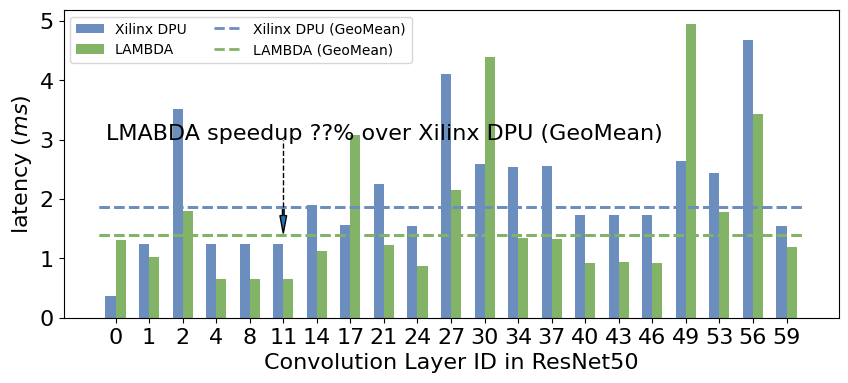

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

##### Default Parameters
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
# Style for the added patch
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")

latency = [[0.364,1.241,3.52,1.242,1.241,1.241,1.891,1.559,2.259,1.545,4.1,2.583,2.547,2.551,1.726,1.726,1.725,2.635,2.433,4.673,1.549],
[1.314488649,1.030504704,1.804955006,0.650472641,0.6486463547,0.649600029,1.11974597,3.076827526,1.22366786,0.8738791943,2.147263288,4.394212961,1.337183714,1.330988407,0.9275352955,0.9316790104,0.9204244614,4.940673113,1.776784658,3.425372839,1.195193529]]
x = [i for i in range(len(latency[1]))]

# Create figure
fig = plt.figure(figsize=[10,4])
ax = plt.subplot(111)
barWidth=0.3
acu_matrix = []
sum_matrix = [latency[0]]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

plt_handler = []

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[0]))
            else:
                plt_handler.append(plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[0]))

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [latency[1]]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[1]))

print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
plt.xlabel(r"Convolution Layer ID in ResNet50", fontsize=SMALL_SIZE)
plt.ylabel(r"latency $(ms)$", fontsize=SMALL_SIZE)
plt.xticks(x, [f"{i}" for i in [0, 1, 2, 4, 8, 11, 14, 17, 21, 24, 27, 30, 34, 37, 40, 43, 46, 49, 53, 56, 59]], fontsize=SMALL_SIZE)
# plt.yticks([15,30,45,60,75], fontsize=BIGGER_SIZE)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.ylim((min(accuracy_pre_train)*0.5,max(accuracy_post_train)*1.1))
# plt.legend(plt_handler, [r"Xilinx DPU", r"LAMBDA"], fontsize=SMALL_SIZE)
geomean= [np.prod(latency[0])**(1/len(latency[0])), np.prod(latency[1])**(1/len(latency[1]))]
plt.plot([-0.5, 20.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")
plt.plot([-0.5, 20.5], [geomean[1], geomean[1]], linewidth=2, color=color_list[1], linestyle="--")
plt_handler.append(plt.plot([-0.5, 20.5], [geomean[0], geomean[0]], linewidth=2, color=color_list[0], linestyle="--")[0])#, marker = 'o'))
plt_handler.append(plt.plot([-0.5, 20.5], [geomean[1], geomean[1]], linewidth=2, color=color_list[1], linestyle="--")[0])#, marker = 'o'))
ax.arrow(5, np.prod(latency[0])**(1/len(latency[0])), 0, -0.15, head_width = 0.2, width = 0.05)
plt.text(8, 3, 'LMABDA speedup ??% over Xilinx DPU (GeoMean)', horizontalalignment='center')
plt.legend(plt_handler, [r"Xilinx DPU", r"LAMBDA",r"Xilinx DPU (GeoMean)", r"LAMBDA (GeoMean)"], ncol=2, fontsize=10)
plt.plot([5, 5], [geomean[0], 3], linewidth=1, color="k", linestyle="--")
# plt.text(20, np.mean(latency[1]), 'SushiAccel GeoMean', horizontalalignment='center', color=color_list[0])
# plt.text(20, np.mean(latency[0]), 'Xilinx GeoMean', horizontalalignment='center', color=color_list[1])
plt.savefig(r'Latency_Comparison_LAMBDA_DPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Resource Breakdown Comparison

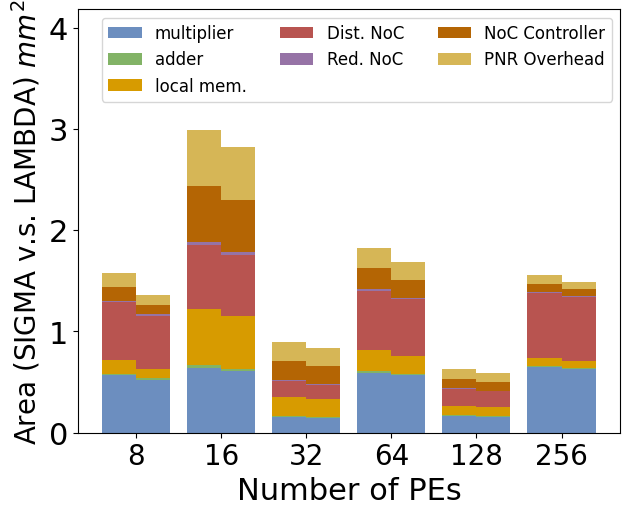

In [55]:
import matplotlib.pyplot as plt
import numpy as np


# multiplier_cost_lambda=[0.56782,0.64078,0.15456,0.15456,0.16603,0.64675,0.2036,0.2036,0.29879,0.2036,1.12808,0.78754]
multiplier_cost_lambda=[0.56782,0.64078,0.15456,0.59204,0.16603,0.64674]
multiplier_cost_sigma=[0.52434,0.60687,0.14251,0.56738,0.15821,0.63368]
adder_cost_lambda=[0.01201,0.02401,0.00801,0.01601,0.00401,0.00851]
adder_cost_sigma=[0.01203, 0.02403, 0.00803, 0.00803, 0.00403, 0.00853]
local_memory_area_lambda=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106]
local_memory_area_sigma=[0.096,0.5184,0.1792,0.1792,0.0896,0.068]
dist_noc_lambda=[0.56782,0.64078,0.15456,0.59204,0.16603,0.64674]
dist_noc_sigma=[0.52434,0.60687,0.14251,0.56738,0.15821,0.63368]
red_noc_lambda=[0.01201,0.02401,0.00801,0.01601,0.00401,0.00851]
red_noc_sigma=[0.01203, 0.02403, 0.00803, 0.00803, 0.00403, 0.00853]
noc_ctrl_lambda=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106]
noc_ctrl_sigma=[0.096,0.5184,0.1792,0.1792,0.0896,0.068]
pnr_overhead_lambda=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106]
pnr_overhead_sigma=[0.096,0.5184,0.1792,0.1792,0.0896,0.068]

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(multiplier_cost_lambda))]
plt_handler = []
barWidth = 0.4

acu_matrix = []
sum_matrix = [multiplier_cost_lambda, adder_cost_lambda, local_memory_area_lambda, dist_noc_lambda, red_noc_lambda, noc_ctrl_lambda, pnr_overhead_lambda]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)
max_range = np.max(acu_matrix)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            if i==0:
                plt_handler.append(plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            if i==0:
                plt_handler.append(plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j]))
            else:
                plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix = []
sum_matrix = [multiplier_cost_sigma, adder_cost_sigma, local_memory_area_sigma, dist_noc_sigma, red_noc_sigma, noc_ctrl_sigma, pnr_overhead_sigma]

for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

max_range_2 = np.max(acu_matrix)
max_range = np.max([max_range_2,max_range])
for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Area (SIGMA v.s. LAMBDA) $mm^2$", fontsize=MEDIUM_SIZE)
plt.xlabel(r"Number of PEs", fontsize=BIGGER_SIZE)
# plt.xlabel(r"$Log_2(N)$ for $N\times N$ PEs", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, max_range*1.4])
plt.xticks(x,["8","16","32","64","128","256"], fontsize=MEDIUM_SIZE)

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["multiplier", "adder", "local mem.", "Dist. NoC", "Red. NoC", "NoC Controller", "PNR Overhead"], loc='best', ncol=3, fontsize=12)
# Conv->BN->ReLU->MaxPooling 

plt.savefig('resource_breakdown.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Reduction NoC Comparison

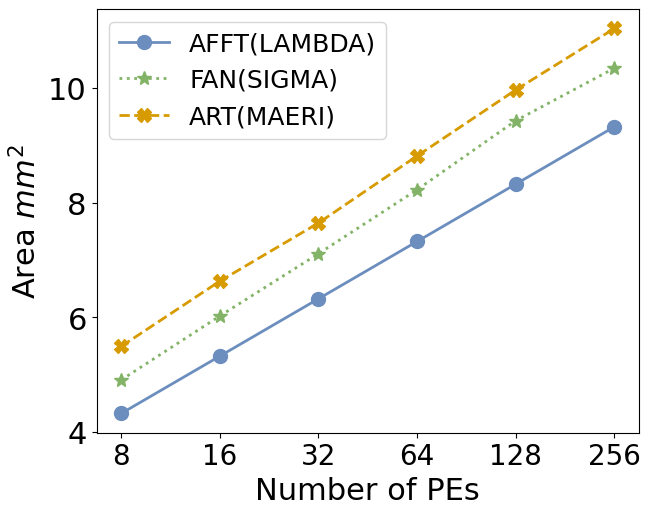

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  21168,  7056,  12544,  50176,  7056,  18816,  21168,  8064,  21168,  21168,  5600,  8,  8,  8820,  14700,  9408,  15,  15,  14700,  14700,  9408,  15,  15,  14700,  29400,  1680,  14700,  12544,  1400,  12544,  11270,  1288,  11270,  11270,  1288,  11270,  30720,  3360,  225,  240,  41160,  57624,  4704,  441,  441,  65856,  57624,  3360,  441,  441,  20580,  29400,  4800,  900,  900,  29400,  29400,  4800,  900,  900,  29400,  29400],
# [3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  1058400,  373968,  163072,  551936,  455112,  18816,  931392,  145152,  931392,  931392,  39200,  12,  8,  35280,  235200,  117600,  15,  15,  441000,  235200,  117600,  15,  15,  441000,  235200,  75600,  14700,  12544,  63000,  12544,  90160,  57960,  22540,  90160,  57960,  22540,  1397760,  35280,  225,  480,  41160,  57624,  211680,  441,  441,  1843968,  57624,  129360,  441,  441,  20580,  29400,  184800,  900,  900,  29400,  29400,  184800,  900,  900,  29400,  29400],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  42336,  373968,  200704,  401408,  21168,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  14112,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  11760,  7056,  1764,  164640,  470400,  16800,  7200,  7200,  235200,  470400,  16800,  7200,  7200,  235200,  470400],
# [691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  148176,  373968,  100352,  301056,  42336,  75264,  127008,  32256,  254016,  127008,  5600,  72,  24,  17640,  117600,  23520,  15,  60,  58800,  117600,  23520,  15,  60,  58800,  117600,  16800,  29400,  18816,  14000,  87808,  45080,  12880,  11270,  45080,  12880,  11270,  215040,  11760,  900,  3600,  164640,  57624,  47040,  1764,  441,  1053696,  57624,  18480,  1764,  441,  41160,  117600,  26400,  1800,  1800,  58800,  117600,  26400,  1800,  1800,  58800,  117600],
# [3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  529200,  52920,  326144,  2207744,  151704,  75264,  232848,  36288,  465696,  232848,  39200,  72,  24,  8820,  58800,  23520,  15,  60,  110250,  58800,  23520,  15,  60,  110250,  117600,  15120,  29400,  18816,  12600,  43904,  180320,  11592,  11270,  180320,  11592,  11270,  199680,  5040,  900,  3600,  329280,  57624,  42336,  1764,  441,  921984,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  84672,  52920,  401408,  2408448,  14112,  301056,  254016,  52096,  508032,  254016,  14000,  288,  96,  17640,  58800,  9408,  60,  240,  117600,  58800,  9408,  60,  240,  117600,  117600,  5040,  117600,  62720,  4200,  156800,  180320,  3864,  22540,  180320,  3864,  22540,  61440,  3360,  3600,  14400,  658560,  230496,  14112,  7056,  1764,  1053696,  230496,  6720,  7056,  1764,  164640,  470400,  9600,  7200,  7200,  235200,  470400,  9600,  7200,  7200,  235200,  470400],
# [1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  84672,  56448,  100352,  602112,  28224,  75264,  127008,  36288,  254016,  127008,  14000,  72,  24,  8820,  58800,  37632,  15,  60,  58800,  58800,  37632,  15,  60,  58800,  58800,  7560,  29400,  18816,  6300,  43904,  45080,  5796,  11270,  45080,  5796,  11270,  245760,  10080,  900,  3600,  164640,  57624,  21168,  1764,  441,  1053696,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  127008,  373968,  200704,  401408,  42336,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  42336,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  23520,  7056,  1764,  164640,  470400,  33600,  7200,  7200,  235200,  470400,  33600,  7200,  7200,  235200,  470400]]

area_overhead = [[20, 40, 80, 160, 320, 640],
[30, 65, 138, 299, 689, 1300],
[45, 99, 200, 450, 999, 2100],
]

area_overhead= np.log2(area_overhead)
max_range = np.max(area_overhead)

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
linestyle_list = ["solid", "dotted", "dashed", "dashdot"]

x = [i for i in range(len(area_overhead[0]))]
# x = [2**(3+i) for i in range(len(area_overhead[0]))]
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

barWidth = 0.5
plt_handler = []
# plt_handler.append(plt.bar(x, area_overhead[0], width=barWidth, color="#666666"))

for case_id in range(len(area_overhead)):
    plt_handler.append(plt.plot(x, area_overhead[case_id], marker=shape_list[case_id], markersize=10, color=color_list[case_id], linewidth=2, linestyle=linestyle_list[case_id])[0])

# for case_id in range(len(area_overhead)-1):
#     plt_handler.append(plt.plot(x, area_overhead[case_id+1], marker=shape_list[case_id], markersize=10, color=color_list[case_id], linewidth=2)[0])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Area $mm^2$", fontsize=BIGGER_SIZE)
plt.xlabel(r"Number of PEs", fontsize=BIGGER_SIZE)
# plt.xlabel(r"$Log_2(N)$ for $N\times N$ PEs", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.xticks(x,["8","16","32","64","128","256"], fontsize=MEDIUM_SIZE)
# plt.ylim([15, max_range*1.18])

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["AFFT(LAMBDA)", "FAN(SIGMA)", "ART(MAERI)"], loc='best', ncol=1, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.ylim([15, max_range*1.18])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")
plt.savefig('scalable_reduction_noc_comparison.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# LAMBDA v.s. SIGMA

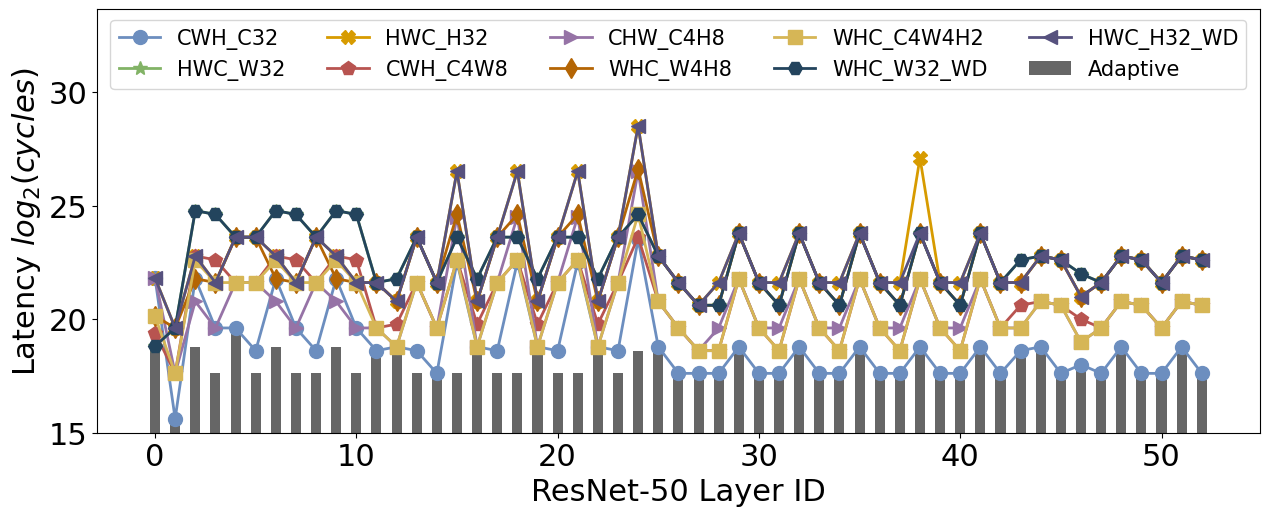

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  21168,  7056,  12544,  50176,  7056,  18816,  21168,  8064,  21168,  21168,  5600,  8,  8,  8820,  14700,  9408,  15,  15,  14700,  14700,  9408,  15,  15,  14700,  29400,  1680,  14700,  12544,  1400,  12544,  11270,  1288,  11270,  11270,  1288,  11270,  30720,  3360,  225,  240,  41160,  57624,  4704,  441,  441,  65856,  57624,  3360,  441,  441,  20580,  29400,  4800,  900,  900,  29400,  29400,  4800,  900,  900,  29400,  29400],
# [3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  1058400,  373968,  163072,  551936,  455112,  18816,  931392,  145152,  931392,  931392,  39200,  12,  8,  35280,  235200,  117600,  15,  15,  441000,  235200,  117600,  15,  15,  441000,  235200,  75600,  14700,  12544,  63000,  12544,  90160,  57960,  22540,  90160,  57960,  22540,  1397760,  35280,  225,  480,  41160,  57624,  211680,  441,  441,  1843968,  57624,  129360,  441,  441,  20580,  29400,  184800,  900,  900,  29400,  29400,  184800,  900,  900,  29400,  29400],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  42336,  373968,  200704,  401408,  21168,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  14112,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  11760,  7056,  1764,  164640,  470400,  16800,  7200,  7200,  235200,  470400,  16800,  7200,  7200,  235200,  470400],
# [691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  148176,  373968,  100352,  301056,  42336,  75264,  127008,  32256,  254016,  127008,  5600,  72,  24,  17640,  117600,  23520,  15,  60,  58800,  117600,  23520,  15,  60,  58800,  117600,  16800,  29400,  18816,  14000,  87808,  45080,  12880,  11270,  45080,  12880,  11270,  215040,  11760,  900,  3600,  164640,  57624,  47040,  1764,  441,  1053696,  57624,  18480,  1764,  441,  41160,  117600,  26400,  1800,  1800,  58800,  117600,  26400,  1800,  1800,  58800,  117600],
# [3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  529200,  52920,  326144,  2207744,  151704,  75264,  232848,  36288,  465696,  232848,  39200,  72,  24,  8820,  58800,  23520,  15,  60,  110250,  58800,  23520,  15,  60,  110250,  117600,  15120,  29400,  18816,  12600,  43904,  180320,  11592,  11270,  180320,  11592,  11270,  199680,  5040,  900,  3600,  329280,  57624,  42336,  1764,  441,  921984,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  84672,  52920,  401408,  2408448,  14112,  301056,  254016,  52096,  508032,  254016,  14000,  288,  96,  17640,  58800,  9408,  60,  240,  117600,  58800,  9408,  60,  240,  117600,  117600,  5040,  117600,  62720,  4200,  156800,  180320,  3864,  22540,  180320,  3864,  22540,  61440,  3360,  3600,  14400,  658560,  230496,  14112,  7056,  1764,  1053696,  230496,  6720,  7056,  1764,  164640,  470400,  9600,  7200,  7200,  235200,  470400,  9600,  7200,  7200,  235200,  470400],
# [1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  84672,  56448,  100352,  602112,  28224,  75264,  127008,  36288,  254016,  127008,  14000,  72,  24,  8820,  58800,  37632,  15,  60,  58800,  58800,  37632,  15,  60,  58800,  58800,  7560,  29400,  18816,  6300,  43904,  45080,  5796,  11270,  45080,  5796,  11270,  245760,  10080,  900,  3600,  164640,  57624,  21168,  1764,  441,  1053696,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  127008,  373968,  200704,  401408,  42336,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  42336,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  23520,  7056,  1764,  164640,  470400,  33600,  7200,  7200,  235200,  470400,  33600,  7200,  7200,  235200,  470400]]

cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704],
[3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704],
[460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528]]

cycle_value= np.log2(cycle_value)
max_range = np.max(cycle_value)

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]

x = [i for i in range(len(cycle_value[0]))]
# create data
fig = plt.figure(figsize=[15,5.5])
ax = plt.subplot(111)

barWidth = 0.5
plt_handler = []

for case_id in range(len(cycle_value)-1):
    plt_handler.append(plt.plot(x, cycle_value[case_id+1], marker=shape_list[case_id], markersize=10, color=color_list[case_id],  linewidth=2)[0])
plt_handler.append(plt.bar(x, cycle_value[0], width=barWidth, color="#666666"))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Latency $log_2(cycles)$", fontsize=BIGGER_SIZE)

plt.xlabel("ResNet-50 Layer ID", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo" "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["CWH_C32", "HWC_W32", "HWC_H32", "CWH_C4W8", "CHW_C4H8", "WHC_W4H8", "WHC_C4W4H2", "WHC_W32_WD", "HWC_H32_WD", "Adaptive"], loc='upper center', ncol=5, fontsize=15)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.ylim([15, max_range*1.18])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")


plt.savefig('ResNet50_global_vs_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()

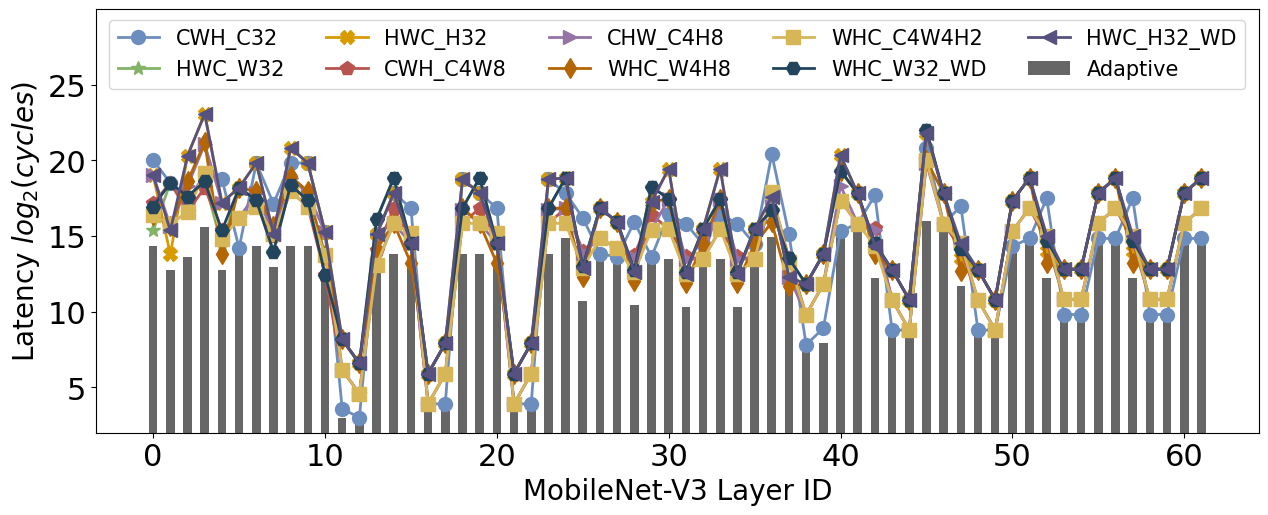

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  21168,  7056,  12544,  50176,  7056,  18816,  21168,  8064,  21168,  21168,  5600,  8,  8,  8820,  14700,  9408,  15,  15,  14700,  14700,  9408,  15,  15,  14700,  29400,  1680,  14700,  12544,  1400,  12544,  11270,  1288,  11270,  11270,  1288,  11270,  30720,  3360,  225,  240,  41160,  57624,  4704,  441,  441,  65856,  57624,  3360,  441,  441,  20580,  29400,  4800,  900,  900,  29400,  29400,  4800,  900,  900,  29400,  29400],
# [3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  1058400,  373968,  163072,  551936,  455112,  18816,  931392,  145152,  931392,  931392,  39200,  12,  8,  35280,  235200,  117600,  15,  15,  441000,  235200,  117600,  15,  15,  441000,  235200,  75600,  14700,  12544,  63000,  12544,  90160,  57960,  22540,  90160,  57960,  22540,  1397760,  35280,  225,  480,  41160,  57624,  211680,  441,  441,  1843968,  57624,  129360,  441,  441,  20580,  29400,  184800,  900,  900,  29400,  29400,  184800,  900,  900,  29400,  29400],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  42336,  373968,  200704,  401408,  21168,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  14112,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  11760,  7056,  1764,  164640,  470400,  16800,  7200,  7200,  235200,  470400,  16800,  7200,  7200,  235200,  470400],
# [691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  148176,  373968,  100352,  301056,  42336,  75264,  127008,  32256,  254016,  127008,  5600,  72,  24,  17640,  117600,  23520,  15,  60,  58800,  117600,  23520,  15,  60,  58800,  117600,  16800,  29400,  18816,  14000,  87808,  45080,  12880,  11270,  45080,  12880,  11270,  215040,  11760,  900,  3600,  164640,  57624,  47040,  1764,  441,  1053696,  57624,  18480,  1764,  441,  41160,  117600,  26400,  1800,  1800,  58800,  117600,  26400,  1800,  1800,  58800,  117600],
# [3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  529200,  52920,  326144,  2207744,  151704,  75264,  232848,  36288,  465696,  232848,  39200,  72,  24,  8820,  58800,  23520,  15,  60,  110250,  58800,  23520,  15,  60,  110250,  117600,  15120,  29400,  18816,  12600,  43904,  180320,  11592,  11270,  180320,  11592,  11270,  199680,  5040,  900,  3600,  329280,  57624,  42336,  1764,  441,  921984,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  84672,  52920,  401408,  2408448,  14112,  301056,  254016,  52096,  508032,  254016,  14000,  288,  96,  17640,  58800,  9408,  60,  240,  117600,  58800,  9408,  60,  240,  117600,  117600,  5040,  117600,  62720,  4200,  156800,  180320,  3864,  22540,  180320,  3864,  22540,  61440,  3360,  3600,  14400,  658560,  230496,  14112,  7056,  1764,  1053696,  230496,  6720,  7056,  1764,  164640,  470400,  9600,  7200,  7200,  235200,  470400,  9600,  7200,  7200,  235200,  470400],
# [1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  84672,  56448,  100352,  602112,  28224,  75264,  127008,  36288,  254016,  127008,  14000,  72,  24,  8820,  58800,  37632,  15,  60,  58800,  58800,  37632,  15,  60,  58800,  58800,  7560,  29400,  18816,  6300,  43904,  45080,  5796,  11270,  45080,  5796,  11270,  245760,  10080,  900,  3600,  164640,  57624,  21168,  1764,  441,  1053696,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  127008,  373968,  200704,  401408,  42336,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  42336,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  23520,  7056,  1764,  164640,  470400,  33600,  7200,  7200,  235200,  470400,  33600,  7200,  7200,  235200,  470400]]

cycle_value = [[21168, 7056, 12544, 50176, 7056, 18816, 21168, 8064, 21168, 21168, 5600, 8, 8, 8820, 14700, 9408, 15, 15, 14700, 14700, 9408, 15, 15, 14700, 29400, 1680, 14700, 12544, 1400, 12544, 11270, 1288, 11270, 11270, 1288, 11270, 30720, 3360, 225, 240, 41160, 57624, 4704, 441, 441, 65856, 57624, 3360, 441, 441, 20580, 29400, 4800, 900, 900, 29400, 29400, 4800, 900, 900, 29400, 29400],
[1058400, 373968, 163072, 551936, 455112, 18816, 931392, 145152, 931392, 931392, 39200, 12, 8, 35280, 235200, 117600, 15, 15, 441000, 235200, 117600, 15, 15, 441000, 235200, 75600, 14700, 12544, 63000, 12544, 90160, 57960, 22540, 90160, 57960, 22540, 1397760, 35280, 225, 480, 41160, 57624, 211680, 441, 441, 1843968, 57624, 129360, 441, 441, 20580, 29400, 184800, 900, 900, 29400, 29400, 184800, 900, 900, 29400, 29400],
[42336, 373968, 200704, 401408, 21168, 301056, 169344, 16128, 338688, 169344, 5600, 288, 96, 70560, 470400, 23520, 60, 240, 117600, 470400, 23520, 60, 240, 117600, 470400, 8400, 117600, 62720, 7000, 313600, 180320, 6440, 45080, 180320, 6440, 45080, 107520, 11760, 3600, 14400, 658560, 230496, 23520, 7056, 1764, 4214784, 230496, 18480, 7056, 1764, 164640, 470400, 26400, 7200, 7200, 235200, 470400, 26400, 7200, 7200, 235200, 470400],
[529200, 14112, 1304576, 8830976, 151704, 301056, 931392, 36288, 1862784, 931392, 39200, 288, 96, 35280, 235200, 23520, 60, 240, 441000, 235200, 23520, 60, 240, 441000, 470400, 7560, 117600, 62720, 6300, 156800, 721280, 5796, 45080, 721280, 5796, 45080, 199680, 5040, 3600, 14400, 1317120, 230496, 21168, 7056, 1764, 3687936, 230496, 11760, 7056, 1764, 164640, 470400, 16800, 7200, 7200, 235200, 470400, 16800, 7200, 7200, 235200, 470400],
[148176, 373968, 100352, 301056, 42336, 75264, 127008, 32256, 254016, 127008, 5600, 72, 24, 17640, 117600, 23520, 15, 60, 58800, 117600, 23520, 15, 60, 58800, 117600, 16800, 29400, 18816, 14000, 87808, 45080, 12880, 11270, 45080, 12880, 11270, 215040, 11760, 900, 3600, 164640, 57624, 47040, 1764, 441, 1053696, 57624, 18480, 1764, 441, 41160, 117600, 26400, 1800, 1800, 58800, 117600, 26400, 1800, 1800, 58800, 117600],
[529200, 52920, 326144, 2207744, 151704, 75264, 232848, 36288, 465696, 232848, 39200, 72, 24, 8820, 58800, 23520, 15, 60, 110250, 58800, 23520, 15, 60, 110250, 117600, 15120, 29400, 18816, 12600, 43904, 180320, 11592, 11270, 180320, 11592, 11270, 199680, 5040, 900, 3600, 329280, 57624, 42336, 1764, 441, 921984, 57624, 23520, 1764, 441, 41160, 117600, 33600, 1800, 1800, 58800, 117600, 33600, 1800, 1800, 58800, 117600],
[84672, 52920, 401408, 2408448, 14112, 301056, 254016, 52096, 508032, 254016, 14000, 288, 96, 17640, 58800, 9408, 60, 240, 117600, 58800, 9408, 60, 240, 117600, 117600, 5040, 117600, 62720, 4200, 156800, 180320, 3864, 22540, 180320, 3864, 22540, 61440, 3360, 3600, 14400, 658560, 230496, 14112, 7056, 1764, 1053696, 230496, 6720, 7056, 1764, 164640, 470400, 9600, 7200, 7200, 235200, 470400, 9600, 7200, 7200, 235200, 470400],
[84672, 56448, 100352, 602112, 28224, 75264, 127008, 36288, 254016, 127008, 14000, 72, 24, 8820, 58800, 37632, 15, 60, 58800, 58800, 37632, 15, 60, 58800, 58800, 7560, 29400, 18816, 6300, 43904, 45080, 5796, 11270, 45080, 5796, 11270, 245760, 10080, 900, 3600, 164640, 57624, 21168, 1764, 441, 1053696, 57624, 23520, 1764, 441, 41160, 117600, 33600, 1800, 1800, 58800, 117600, 33600, 1800, 1800, 58800, 117600],
[127008, 373968, 200704, 401408, 42336, 301056, 169344, 16128, 338688, 169344, 5600, 288, 96, 70560, 470400, 23520, 60, 240, 117600, 470400, 23520, 60, 240, 117600, 470400, 8400, 117600, 62720, 7000, 313600, 180320, 6440, 45080, 180320, 6440, 45080, 107520, 11760, 3600, 14400, 658560, 230496, 23520, 7056, 1764, 4214784, 230496, 18480, 7056, 1764, 164640, 470400, 26400, 7200, 7200, 235200, 470400, 26400, 7200, 7200, 235200, 470400],
[529200, 42336, 1304576, 8830976, 151704, 301056, 931392, 36288, 1862784, 931392, 39200, 288, 96, 35280, 235200, 23520, 60, 240, 441000, 235200, 23520, 60, 240, 441000, 470400, 7560, 117600, 62720, 6300, 156800, 721280, 5796, 45080, 721280, 5796, 45080, 199680, 5040, 3600, 14400, 1317120, 230496, 21168, 7056, 1764, 3687936, 230496, 23520, 7056, 1764, 164640, 470400, 33600, 7200, 7200, 235200, 470400, 33600, 7200, 7200, 235200, 470400]]
cycle_value= np.log2(cycle_value)
max_range = np.max(cycle_value)

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]

x = [i for i in range(len(cycle_value[0]))]
# create data
fig = plt.figure(figsize=[15,5.5])
ax = plt.subplot(111)

barWidth = 0.5
plt_handler = []

for case_id in range(len(cycle_value)-1):
    plt_handler.append(plt.plot(x, cycle_value[case_id+1], marker=shape_list[case_id], markersize=10, color=color_list[case_id], linewidth=2)[0])
plt_handler.append(plt.bar(x, cycle_value[0], width=barWidth, color="#666666"))

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel(r"Latency $log_2(cycles)$", fontsize=BIGGER_SIZE)

plt.xlabel("MobileNet-V3 Layer ID", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo" "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["CWH_C32", "HWC_W32", "HWC_H32", "CWH_C4W8", "CHW_C4H8", "WHC_W4H8", "WHC_C4W4H2", "WHC_W32_WD", "HWC_H32_WD", "Adaptive"], loc='upper center', ncol=5, fontsize=15)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.ylim([2, max_range*1.3])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

plt.savefig('MobV3_global_vs_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Performance of Different Workload using the optimal dataflow searched without layout consideration on Different Layout

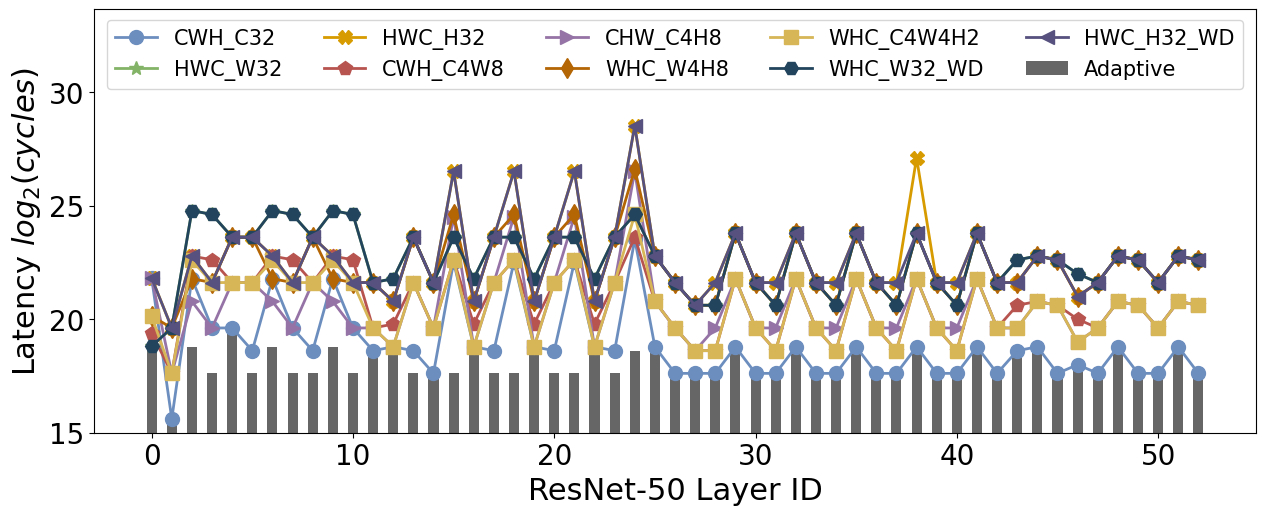

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  21168,  7056,  12544,  50176,  7056,  18816,  21168,  8064,  21168,  21168,  5600,  8,  8,  8820,  14700,  9408,  15,  15,  14700,  14700,  9408,  15,  15,  14700,  29400,  1680,  14700,  12544,  1400,  12544,  11270,  1288,  11270,  11270,  1288,  11270,  30720,  3360,  225,  240,  41160,  57624,  4704,  441,  441,  65856,  57624,  3360,  441,  441,  20580,  29400,  4800,  900,  900,  29400,  29400,  4800,  900,  900,  29400,  29400],
# [3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  1058400,  373968,  163072,  551936,  455112,  18816,  931392,  145152,  931392,  931392,  39200,  12,  8,  35280,  235200,  117600,  15,  15,  441000,  235200,  117600,  15,  15,  441000,  235200,  75600,  14700,  12544,  63000,  12544,  90160,  57960,  22540,  90160,  57960,  22540,  1397760,  35280,  225,  480,  41160,  57624,  211680,  441,  441,  1843968,  57624,  129360,  441,  441,  20580,  29400,  184800,  900,  900,  29400,  29400,  184800,  900,  900,  29400,  29400],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  42336,  373968,  200704,  401408,  21168,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  14112,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  11760,  7056,  1764,  164640,  470400,  16800,  7200,  7200,  235200,  470400,  16800,  7200,  7200,  235200,  470400],
# [691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  148176,  373968,  100352,  301056,  42336,  75264,  127008,  32256,  254016,  127008,  5600,  72,  24,  17640,  117600,  23520,  15,  60,  58800,  117600,  23520,  15,  60,  58800,  117600,  16800,  29400,  18816,  14000,  87808,  45080,  12880,  11270,  45080,  12880,  11270,  215040,  11760,  900,  3600,  164640,  57624,  47040,  1764,  441,  1053696,  57624,  18480,  1764,  441,  41160,  117600,  26400,  1800,  1800,  58800,  117600,  26400,  1800,  1800,  58800,  117600],
# [3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  529200,  52920,  326144,  2207744,  151704,  75264,  232848,  36288,  465696,  232848,  39200,  72,  24,  8820,  58800,  23520,  15,  60,  110250,  58800,  23520,  15,  60,  110250,  117600,  15120,  29400,  18816,  12600,  43904,  180320,  11592,  11270,  180320,  11592,  11270,  199680,  5040,  900,  3600,  329280,  57624,  42336,  1764,  441,  921984,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  84672,  52920,  401408,  2408448,  14112,  301056,  254016,  52096,  508032,  254016,  14000,  288,  96,  17640,  58800,  9408,  60,  240,  117600,  58800,  9408,  60,  240,  117600,  117600,  5040,  117600,  62720,  4200,  156800,  180320,  3864,  22540,  180320,  3864,  22540,  61440,  3360,  3600,  14400,  658560,  230496,  14112,  7056,  1764,  1053696,  230496,  6720,  7056,  1764,  164640,  470400,  9600,  7200,  7200,  235200,  470400,  9600,  7200,  7200,  235200,  470400],
# [1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  84672,  56448,  100352,  602112,  28224,  75264,  127008,  36288,  254016,  127008,  14000,  72,  24,  8820,  58800,  37632,  15,  60,  58800,  58800,  37632,  15,  60,  58800,  58800,  7560,  29400,  18816,  6300,  43904,  45080,  5796,  11270,  45080,  5796,  11270,  245760,  10080,  900,  3600,  164640,  57624,  21168,  1764,  441,  1053696,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  127008,  373968,  200704,  401408,  42336,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  42336,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  23520,  7056,  1764,  164640,  470400,  33600,  7200,  7200,  235200,  470400,  33600,  7200,  7200,  235200,  470400]]

cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704],
[3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704],
[460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528]]

cycle_value= np.log2(cycle_value)
max_range = np.max(cycle_value)

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]

x = [i for i in range(len(cycle_value[0]))]
# create data
fig = plt.figure(figsize=[15,5.5])
ax = plt.subplot(111)

barWidth = 0.5
plt_handler = []

for case_id in range(len(cycle_value)-1):
    plt_handler.append(plt.plot(x, cycle_value[case_id+1], marker=shape_list[case_id], markersize=10, color=color_list[case_id],  linewidth=2)[0])
plt_handler.append(plt.bar(x, cycle_value[0], width=barWidth, color="#666666"))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel(r"Latency $log_2(cycles)$", fontsize=BIGGER_SIZE)

plt.xlabel("ResNet-50 Layer ID", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo" "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["CWH_C32", "HWC_W32", "HWC_H32", "CWH_C4W8", "CHW_C4H8", "WHC_W4H8", "WHC_C4W4H2", "WHC_W32_WD", "HWC_H32_WD", "Adaptive"], loc='upper center', ncol=5, fontsize=15)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.ylim([15, max_range*1.18])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")


plt.savefig('ResNet50_global_vs_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [31]:
cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704],
[3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704],
[460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632],
[460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528],
[3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528]]

print(f"LAMBDA speedup design with best layout by {1/(np.array(cycle_value[0])/np.array(cycle_value[1]))}")

LAMBDA speedup design with best layout by [ 8.  1.  8.  4.  1.  2.  8.  4.  2.  8.  4.  1.  1.  2.  1. 30.  1.  2.
 30.  1.  2. 30.  1.  2. 30.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


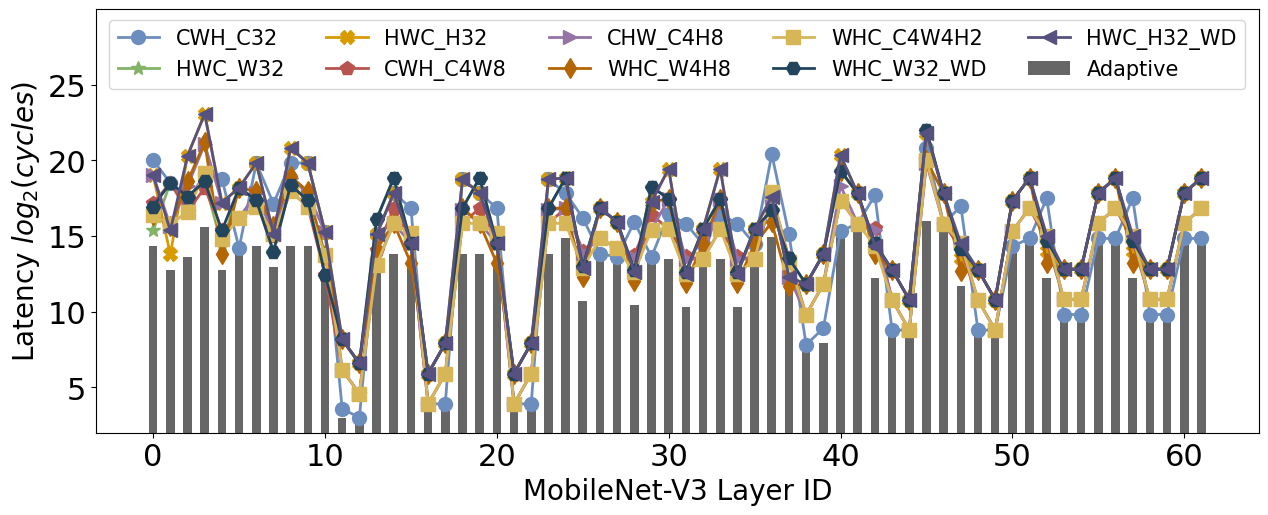

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# cycle_value = [[460992,  50176,  451584,  200704,  802816,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  21168,  7056,  12544,  50176,  7056,  18816,  21168,  8064,  21168,  21168,  5600,  8,  8,  8820,  14700,  9408,  15,  15,  14700,  14700,  9408,  15,  15,  14700,  29400,  1680,  14700,  12544,  1400,  12544,  11270,  1288,  11270,  11270,  1288,  11270,  30720,  3360,  225,  240,  41160,  57624,  4704,  441,  441,  65856,  57624,  3360,  441,  441,  20580,  29400,  4800,  900,  900,  29400,  29400,  4800,  900,  900,  29400,  29400],
# [3687936,  50176,  3612672,  802816,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  451584,  401408,  200704,  6021120,  451584,  401408,  6021120,  451584,  401408,  6021120,  451584,  401408,  12042240,  451584,  200704,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  200704,  451584,  200704,  401408,  451584,  200704,  262144,  200704,  451584,  200704,  200704,  451584,  200704,  1058400,  373968,  163072,  551936,  455112,  18816,  931392,  145152,  931392,  931392,  39200,  12,  8,  35280,  235200,  117600,  15,  15,  441000,  235200,  117600,  15,  15,  441000,  235200,  75600,  14700,  12544,  63000,  12544,  90160,  57960,  22540,  90160,  57960,  22540,  1397760,  35280,  225,  480,  41160,  57624,  211680,  441,  441,  1843968,  57624,  129360,  441,  441,  20580,  29400,  184800,  900,  900,  29400,  29400,  184800,  900,  900,  29400,  29400],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  42336,  373968,  200704,  401408,  21168,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  144506888,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  14112,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  11760,  7056,  1764,  164640,  470400,  16800,  7200,  7200,  235200,  470400,  16800,  7200,  7200,  235200,  470400],
# [691488,  200704,  7225344,  6422528,  3211264,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  802816,  903168,  3211264,  802816,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  6422528,  903168,  3211264,  12845056,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  1605632,  1806336,  1605632,  1048576,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  148176,  373968,  100352,  301056,  42336,  75264,  127008,  32256,  254016,  127008,  5600,  72,  24,  17640,  117600,  23520,  15,  60,  58800,  117600,  23520,  15,  60,  58800,  117600,  16800,  29400,  18816,  14000,  87808,  45080,  12880,  11270,  45080,  12880,  11270,  215040,  11760,  900,  3600,  164640,  57624,  47040,  1764,  441,  1053696,  57624,  18480,  1764,  441,  41160,  117600,  26400,  1800,  1800,  58800,  117600,  26400,  1800,  1800,  58800,  117600],
# [3687936,  200704,  1806336,  802816,  3211264,  3211264,  1806336,  802816,  3211264,  1806336,  802816,  802816,  451584,  3211264,  802816,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  24084480,  451584,  3211264,  96337920,  1806336,  802816,  401408,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  529200,  52920,  326144,  2207744,  151704,  75264,  232848,  36288,  465696,  232848,  39200,  72,  24,  8820,  58800,  23520,  15,  60,  110250,  58800,  23520,  15,  60,  110250,  117600,  15120,  29400,  18816,  12600,  43904,  180320,  11592,  11270,  180320,  11592,  11270,  199680,  5040,  900,  3600,  329280,  57624,  42336,  1764,  441,  921984,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [1152480,  802816,  3612672,  3211264,  12845056,  12845056,  3612672,  3211264,  12845056,  3612672,  3211264,  3211264,  1806336,  12845056,  3211264,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  25690112,  1806336,  12845056,  102760448,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  84672,  52920,  401408,  2408448,  14112,  301056,  254016,  52096,  508032,  254016,  14000,  288,  96,  17640,  58800,  9408,  60,  240,  117600,  58800,  9408,  60,  240,  117600,  117600,  5040,  117600,  62720,  4200,  156800,  180320,  3864,  22540,  180320,  3864,  22540,  61440,  3360,  3600,  14400,  658560,  230496,  14112,  7056,  1764,  1053696,  230496,  6720,  7056,  1764,  164640,  470400,  9600,  7200,  7200,  235200,  470400,  9600,  7200,  7200,  235200,  470400],
# [1152480,  200704,  6322176,  3211264,  3211264,  3211264,  6322176,  3211264,  3211264,  6322176,  3211264,  802816,  451584,  3211264,  802816,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  6422528,  451584,  3211264,  25690112,  1806336,  802816,  401408,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  401408,  3612672,  802816,  802816,  1806336,  1605632,  524288,  802816,  1806336,  1605632,  802816,  1806336,  1605632,  84672,  56448,  100352,  602112,  28224,  75264,  127008,  36288,  254016,  127008,  14000,  72,  24,  8820,  58800,  37632,  15,  60,  58800,  58800,  37632,  15,  60,  58800,  58800,  7560,  29400,  18816,  6300,  43904,  45080,  5796,  11270,  45080,  5796,  11270,  245760,  10080,  900,  3600,  164640,  57624,  21168,  1764,  441,  1053696,  57624,  23520,  1764,  441,  41160,  117600,  33600,  1800,  1800,  58800,  117600,  33600,  1800,  1800,  58800,  117600],
# [460992,  802816,  28901376,  25690112,  12845056,  12845056,  28901376,  25690112,  12845056,  28901376,  25690112,  3211264,  3612672,  12845056,  3211264,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  12845056,  3612672,  12845056,  25690112,  7225344,  3211264,  1605632,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  1605632,  14450688,  3211264,  6422528,  7225344,  6422528,  4194304,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  127008,  373968,  200704,  401408,  42336,  301056,  169344,  16128,  338688,  169344,  5600,  288,  96,  70560,  470400,  23520,  60,  240,  117600,  470400,  23520,  60,  240,  117600,  470400,  8400,  117600,  62720,  7000,  313600,  180320,  6440,  45080,  180320,  6440,  45080,  107520,  11760,  3600,  14400,  658560,  230496,  23520,  7056,  1764,  4214784,  230496,  18480,  7056,  1764,  164640,  470400,  26400,  7200,  7200,  235200,  470400,  26400,  7200,  7200,  235200,  470400],
# [3687936,  802816,  7225344,  3211264,  12845056,  12845056,  7225344,  3211264,  12845056,  7225344,  3211264,  3211264,  1806336,  12845056,  3211264,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  96337920,  1806336,  12845056,  385351680,  7225344,  3211264,  1605632,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  14450688,  3211264,  3211264,  7225344,  6422528,  2097152,  3211264,  7225344,  6422528,  3211264,  7225344,  6422528,  529200,  42336,  1304576,  8830976,  151704,  301056,  931392,  36288,  1862784,  931392,  39200,  288,  96,  35280,  235200,  23520,  60,  240,  441000,  235200,  23520,  60,  240,  441000,  470400,  7560,  117600,  62720,  6300,  156800,  721280,  5796,  45080,  721280,  5796,  45080,  199680,  5040,  3600,  14400,  1317120,  230496,  21168,  7056,  1764,  3687936,  230496,  23520,  7056,  1764,  164640,  470400,  33600,  7200,  7200,  235200,  470400,  33600,  7200,  7200,  235200,  470400]]

cycle_value = [[21168, 7056, 12544, 50176, 7056, 18816, 21168, 8064, 21168, 21168, 5600, 8, 8, 8820, 14700, 9408, 15, 15, 14700, 14700, 9408, 15, 15, 14700, 29400, 1680, 14700, 12544, 1400, 12544, 11270, 1288, 11270, 11270, 1288, 11270, 30720, 3360, 225, 240, 41160, 57624, 4704, 441, 441, 65856, 57624, 3360, 441, 441, 20580, 29400, 4800, 900, 900, 29400, 29400, 4800, 900, 900, 29400, 29400],
[1058400, 373968, 163072, 551936, 455112, 18816, 931392, 145152, 931392, 931392, 39200, 12, 8, 35280, 235200, 117600, 15, 15, 441000, 235200, 117600, 15, 15, 441000, 235200, 75600, 14700, 12544, 63000, 12544, 90160, 57960, 22540, 90160, 57960, 22540, 1397760, 35280, 225, 480, 41160, 57624, 211680, 441, 441, 1843968, 57624, 129360, 441, 441, 20580, 29400, 184800, 900, 900, 29400, 29400, 184800, 900, 900, 29400, 29400],
[42336, 373968, 200704, 401408, 21168, 301056, 169344, 16128, 338688, 169344, 5600, 288, 96, 70560, 470400, 23520, 60, 240, 117600, 470400, 23520, 60, 240, 117600, 470400, 8400, 117600, 62720, 7000, 313600, 180320, 6440, 45080, 180320, 6440, 45080, 107520, 11760, 3600, 14400, 658560, 230496, 23520, 7056, 1764, 4214784, 230496, 18480, 7056, 1764, 164640, 470400, 26400, 7200, 7200, 235200, 470400, 26400, 7200, 7200, 235200, 470400],
[529200, 14112, 1304576, 8830976, 151704, 301056, 931392, 36288, 1862784, 931392, 39200, 288, 96, 35280, 235200, 23520, 60, 240, 441000, 235200, 23520, 60, 240, 441000, 470400, 7560, 117600, 62720, 6300, 156800, 721280, 5796, 45080, 721280, 5796, 45080, 199680, 5040, 3600, 14400, 1317120, 230496, 21168, 7056, 1764, 3687936, 230496, 11760, 7056, 1764, 164640, 470400, 16800, 7200, 7200, 235200, 470400, 16800, 7200, 7200, 235200, 470400],
[148176, 373968, 100352, 301056, 42336, 75264, 127008, 32256, 254016, 127008, 5600, 72, 24, 17640, 117600, 23520, 15, 60, 58800, 117600, 23520, 15, 60, 58800, 117600, 16800, 29400, 18816, 14000, 87808, 45080, 12880, 11270, 45080, 12880, 11270, 215040, 11760, 900, 3600, 164640, 57624, 47040, 1764, 441, 1053696, 57624, 18480, 1764, 441, 41160, 117600, 26400, 1800, 1800, 58800, 117600, 26400, 1800, 1800, 58800, 117600],
[529200, 52920, 326144, 2207744, 151704, 75264, 232848, 36288, 465696, 232848, 39200, 72, 24, 8820, 58800, 23520, 15, 60, 110250, 58800, 23520, 15, 60, 110250, 117600, 15120, 29400, 18816, 12600, 43904, 180320, 11592, 11270, 180320, 11592, 11270, 199680, 5040, 900, 3600, 329280, 57624, 42336, 1764, 441, 921984, 57624, 23520, 1764, 441, 41160, 117600, 33600, 1800, 1800, 58800, 117600, 33600, 1800, 1800, 58800, 117600],
[84672, 52920, 401408, 2408448, 14112, 301056, 254016, 52096, 508032, 254016, 14000, 288, 96, 17640, 58800, 9408, 60, 240, 117600, 58800, 9408, 60, 240, 117600, 117600, 5040, 117600, 62720, 4200, 156800, 180320, 3864, 22540, 180320, 3864, 22540, 61440, 3360, 3600, 14400, 658560, 230496, 14112, 7056, 1764, 1053696, 230496, 6720, 7056, 1764, 164640, 470400, 9600, 7200, 7200, 235200, 470400, 9600, 7200, 7200, 235200, 470400],
[84672, 56448, 100352, 602112, 28224, 75264, 127008, 36288, 254016, 127008, 14000, 72, 24, 8820, 58800, 37632, 15, 60, 58800, 58800, 37632, 15, 60, 58800, 58800, 7560, 29400, 18816, 6300, 43904, 45080, 5796, 11270, 45080, 5796, 11270, 245760, 10080, 900, 3600, 164640, 57624, 21168, 1764, 441, 1053696, 57624, 23520, 1764, 441, 41160, 117600, 33600, 1800, 1800, 58800, 117600, 33600, 1800, 1800, 58800, 117600],
[127008, 373968, 200704, 401408, 42336, 301056, 169344, 16128, 338688, 169344, 5600, 288, 96, 70560, 470400, 23520, 60, 240, 117600, 470400, 23520, 60, 240, 117600, 470400, 8400, 117600, 62720, 7000, 313600, 180320, 6440, 45080, 180320, 6440, 45080, 107520, 11760, 3600, 14400, 658560, 230496, 23520, 7056, 1764, 4214784, 230496, 18480, 7056, 1764, 164640, 470400, 26400, 7200, 7200, 235200, 470400, 26400, 7200, 7200, 235200, 470400],
[529200, 42336, 1304576, 8830976, 151704, 301056, 931392, 36288, 1862784, 931392, 39200, 288, 96, 35280, 235200, 23520, 60, 240, 441000, 235200, 23520, 60, 240, 441000, 470400, 7560, 117600, 62720, 6300, 156800, 721280, 5796, 45080, 721280, 5796, 45080, 199680, 5040, 3600, 14400, 1317120, 230496, 21168, 7056, 1764, 3687936, 230496, 23520, 7056, 1764, 164640, 470400, 33600, 7200, 7200, 235200, 470400, 33600, 7200, 7200, 235200, 470400]]
cycle_value= np.log2(cycle_value)
max_range = np.max(cycle_value)

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656", "#23445D", "#56517E"]
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]

x = [i for i in range(len(cycle_value[0]))]
# create data
fig = plt.figure(figsize=[15,5.5])
ax = plt.subplot(111)

barWidth = 0.5
plt_handler = []

for case_id in range(len(cycle_value)-1):
    plt_handler.append(plt.plot(x, cycle_value[case_id+1], marker=shape_list[case_id], markersize=10, color=color_list[case_id], linewidth=2)[0])
plt_handler.append(plt.bar(x, cycle_value[0], width=barWidth, color="#666666"))

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel(r"Latency $log_2(cycles)$", fontsize=BIGGER_SIZE)

plt.xlabel("MobileNet-V3 Layer ID", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo" "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["no layout constraints", "CX32", "WX32", "HX32", "CX4WX8", "CX4HX8", "WX4HX8", "WX4HX8", "WX32D", "HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.legend(plt_handler, ["CWH_C32", "HWC_W32", "HWC_H32", "CWH_C4W8", "CHW_C4H8", "WHC_W4H8", "WHC_C4W4H2", "WHC_W32_WD", "HWC_H32_WD", "Adaptive"], loc='upper center', ncol=5, fontsize=15)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='upper center', ncol=5, fontsize=SMALL_SIZE)
plt.ylim([2, max_range*1.3])

# print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

plt.savefig('MobV3_global_vs_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [60]:

cycle_value = [[21168, 7056, 12544, 50176, 7056, 18816, 21168, 8064, 21168, 21168, 5600, 8, 8, 8820, 14700, 9408, 15, 15, 14700, 14700, 9408, 15, 15, 14700, 29400, 1680, 14700, 12544, 1400, 12544, 11270, 1288, 11270, 11270, 1288, 11270, 30720, 3360, 225, 240, 41160, 57624, 4704, 441, 441, 65856, 57624, 3360, 441, 441, 20580, 29400, 4800, 900, 900, 29400, 29400, 4800, 900, 900, 29400, 29400],
[1058400, 373968, 163072, 551936, 455112, 18816, 931392, 145152, 931392, 931392, 39200, 12, 8, 35280, 235200, 117600, 15, 15, 441000, 235200, 117600, 15, 15, 441000, 235200, 75600, 14700, 12544, 63000, 12544, 90160, 57960, 22540, 90160, 57960, 22540, 1397760, 35280, 225, 480, 41160, 57624, 211680, 441, 441, 1843968, 57624, 129360, 441, 441, 20580, 29400, 184800, 900, 900, 29400, 29400, 184800, 900, 900, 29400, 29400],
[42336, 373968, 200704, 401408, 21168, 301056, 169344, 16128, 338688, 169344, 5600, 288, 96, 70560, 470400, 23520, 60, 240, 117600, 470400, 23520, 60, 240, 117600, 470400, 8400, 117600, 62720, 7000, 313600, 180320, 6440, 45080, 180320, 6440, 45080, 107520, 11760, 3600, 14400, 658560, 230496, 23520, 7056, 1764, 4214784, 230496, 18480, 7056, 1764, 164640, 470400, 26400, 7200, 7200, 235200, 470400, 26400, 7200, 7200, 235200, 470400],
[529200, 14112, 1304576, 8830976, 151704, 301056, 931392, 36288, 1862784, 931392, 39200, 288, 96, 35280, 235200, 23520, 60, 240, 441000, 235200, 23520, 60, 240, 441000, 470400, 7560, 117600, 62720, 6300, 156800, 721280, 5796, 45080, 721280, 5796, 45080, 199680, 5040, 3600, 14400, 1317120, 230496, 21168, 7056, 1764, 3687936, 230496, 11760, 7056, 1764, 164640, 470400, 16800, 7200, 7200, 235200, 470400, 16800, 7200, 7200, 235200, 470400],
[148176, 373968, 100352, 301056, 42336, 75264, 127008, 32256, 254016, 127008, 5600, 72, 24, 17640, 117600, 23520, 15, 60, 58800, 117600, 23520, 15, 60, 58800, 117600, 16800, 29400, 18816, 14000, 87808, 45080, 12880, 11270, 45080, 12880, 11270, 215040, 11760, 900, 3600, 164640, 57624, 47040, 1764, 441, 1053696, 57624, 18480, 1764, 441, 41160, 117600, 26400, 1800, 1800, 58800, 117600, 26400, 1800, 1800, 58800, 117600],
[529200, 52920, 326144, 2207744, 151704, 75264, 232848, 36288, 465696, 232848, 39200, 72, 24, 8820, 58800, 23520, 15, 60, 110250, 58800, 23520, 15, 60, 110250, 117600, 15120, 29400, 18816, 12600, 43904, 180320, 11592, 11270, 180320, 11592, 11270, 199680, 5040, 900, 3600, 329280, 57624, 42336, 1764, 441, 921984, 57624, 23520, 1764, 441, 41160, 117600, 33600, 1800, 1800, 58800, 117600, 33600, 1800, 1800, 58800, 117600],
[84672, 52920, 401408, 2408448, 14112, 301056, 254016, 52096, 508032, 254016, 14000, 288, 96, 17640, 58800, 9408, 60, 240, 117600, 58800, 9408, 60, 240, 117600, 117600, 5040, 117600, 62720, 4200, 156800, 180320, 3864, 22540, 180320, 3864, 22540, 61440, 3360, 3600, 14400, 658560, 230496, 14112, 7056, 1764, 1053696, 230496, 6720, 7056, 1764, 164640, 470400, 9600, 7200, 7200, 235200, 470400, 9600, 7200, 7200, 235200, 470400],
[84672, 56448, 100352, 602112, 28224, 75264, 127008, 36288, 254016, 127008, 14000, 72, 24, 8820, 58800, 37632, 15, 60, 58800, 58800, 37632, 15, 60, 58800, 58800, 7560, 29400, 18816, 6300, 43904, 45080, 5796, 11270, 45080, 5796, 11270, 245760, 10080, 900, 3600, 164640, 57624, 21168, 1764, 441, 1053696, 57624, 23520, 1764, 441, 41160, 117600, 33600, 1800, 1800, 58800, 117600, 33600, 1800, 1800, 58800, 117600],
[127008, 373968, 200704, 401408, 42336, 301056, 169344, 16128, 338688, 169344, 5600, 288, 96, 70560, 470400, 23520, 60, 240, 117600, 470400, 23520, 60, 240, 117600, 470400, 8400, 117600, 62720, 7000, 313600, 180320, 6440, 45080, 180320, 6440, 45080, 107520, 11760, 3600, 14400, 658560, 230496, 23520, 7056, 1764, 4214784, 230496, 18480, 7056, 1764, 164640, 470400, 26400, 7200, 7200, 235200, 470400, 26400, 7200, 7200, 235200, 470400],
[529200, 42336, 1304576, 8830976, 151704, 301056, 931392, 36288, 1862784, 931392, 39200, 288, 96, 35280, 235200, 23520, 60, 240, 441000, 235200, 23520, 60, 240, 441000, 470400, 7560, 117600, 62720, 6300, 156800, 721280, 5796, 45080, 721280, 5796, 45080, 199680, 5040, 3600, 14400, 1317120, 230496, 21168, 7056, 1764, 3687936, 230496, 23520, 7056, 1764, 164640, 470400, 33600, 7200, 7200, 235200, 470400, 33600, 7200, 7200, 235200, 470400]]

print(f"LAMBDA speedup design with best layout by {1/(np.array(cycle_value[0])/np.array(cycle_value[1]))}")

LAMBDA speedup design with best layout by [50.  53.  13.  11.  64.5  1.  44.  18.  44.  44.   7.   1.5  1.   4.
 16.  12.5  1.   1.  30.  16.  12.5  1.   1.  30.   8.  45.   1.   1.
 45.   1.   8.  45.   2.   8.  45.   2.  45.5 10.5  1.   2.   1.   1.
 45.   1.   1.  28.   1.  38.5  1.   1.   1.   1.  38.5  1.   1.   1.
  1.  38.5  1.   1.   1.   1. ]


# Performance of LAMBDA v.s. SIGMA

# Latency Breakdown
0.01201,0.02401,0.00801,0.01601,0.00401,0.00851,0.00851,0.00851,0.01051,0.00851,0.00575,0.00205

In [24]:
len(ReLU_latency)

11

In [34]:
[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106, 0.06222, 0.06222, 0.07709, 0.06222, 0.06532, 0.17947]

array([0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106, 0.06222,
       0.06222, 0.07709, 0.06222, 0.06532, 0.17947])

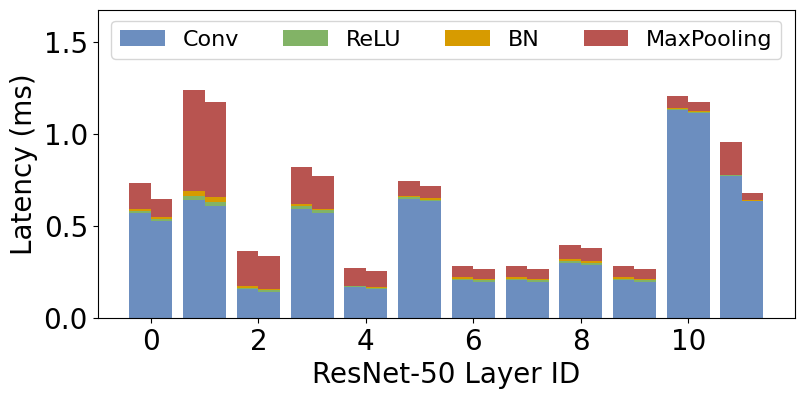

In [46]:
import matplotlib.pyplot as plt
import numpy as np


# qconv_latency=[0.56782,0.64078,0.15456,0.15456,0.16603,0.64675,0.2036,0.2036,0.29879,0.2036,1.12808,0.78754]
qconv_latency=[0.56782,0.64078,0.15456,0.59204,0.16603,0.64674,0.20359,0.20359,0.29878,0.20359,1.12808,0.77289]
qconv_latency_no_dram=[0.52434,0.60687,0.14251,0.56738,0.15821,0.63368,0.19577,0.19577,0.28889,0.19577,1.11196,0.63422]
ReLU_latency=[0.01201,0.02401,0.00801,0.01601,0.00401,0.00851,0.00851,0.00851,0.01051,0.00851,0.00575,0.00205]
BN_latency=[0.01203, 0.02403, 0.00803, 0.00803, 0.00403, 0.00853, 0.00853, 0.00853, 0.01053, 0.00853, 0.00577, 0.00207]
MaxPooling_latency=[0.13948, 0.55231, 0.19125, 0.20386, 0.09742, 0.08106, 0.06222, 0.06222, 0.07709, 0.06222, 0.06532, 0.17947]
MaxPooling_latency_no_dram=[0.096,0.5184,0.1792,0.1792,0.0896,0.068,0.0544,0.0544,0.0672,0.0544,0.0492,0.0408]

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[9,4])
ax = plt.subplot(111)

x = [i for i in range(len(qconv_latency))]
plt_handler = []
barWidth = 0.4

acu_matrix = []
sum_matrix = [qconv_latency, ReLU_latency, BN_latency, MaxPooling_latency]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            if i==0:
                plt_handler.append(plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            if i==0:
                plt_handler.append(plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j]))
            else:
                plt.bar(x[i]-0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix = []
sum_matrix = [qconv_latency_no_dram, ReLU_latency, BN_latency, MaxPooling_latency_no_dram]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+0.5*barWidth, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
plt.xlabel("ResNet-50 Layer ID", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
max_range = np.max(np.array(ReLU_latency) + np.array(qconv_latency) + np.array(BN_latency) + np.array(MaxPooling_latency))
plt.ylim([0, max_range*1.35])

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(plt_handler, ["Conv", "ReLU", "BN", "MaxPooling"], loc='upper center', ncol=4, fontsize=SMALL_SIZE)
# Conv->BN->ReLU->MaxPooling 

plt.savefig('operator_pipeline.pdf', bbox_inches="tight", transparent=True) 
plt.show()

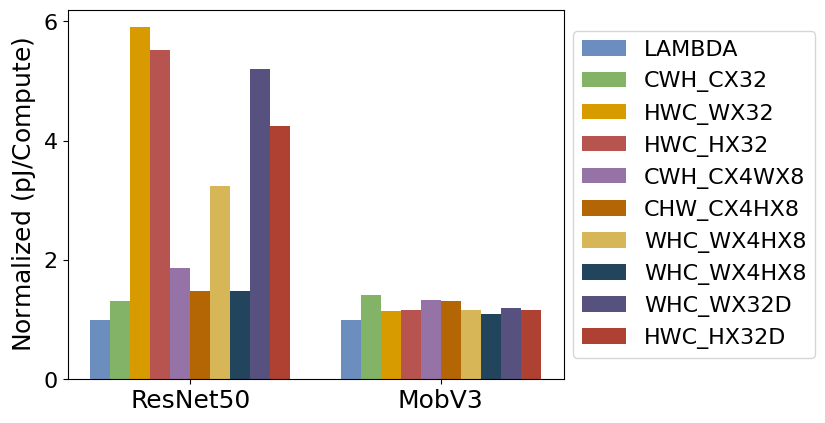

In [18]:
layout_considered_energy = [
    [2.71,3.571132075,15.98698113,14.94169811,5.047358491,4.000943396,8.792264151,4.023207547,14.10886792,11.4809434], # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
[21.5966129,30.33096774,24.57677419,25.02677419,28.87016129,28.25177419,25.07806452,23.71435484,25.93048387,25.08483871]] # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
num_data = len(layout_considered_energy[1])
for i in range(num_data-1,0,-1):
    layout_considered_energy[0][i] = layout_considered_energy[0][i] / layout_considered_energy[0][0]
    layout_considered_energy[1][i] = layout_considered_energy[1][i] / layout_considered_energy[1][0]
layout_considered_energy[0][0] = 1
layout_considered_energy[1][0] = 1

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D", "#56517E", "#AE4132"]
x = [1, 2]
num_column = len(layout_considered_energy[0])
barWidth = 4/num_column
plt_handler = []
for j in range(len(layout_considered_energy)):
    plt.bar(x[j]-barWidth*9/num_column, layout_considered_energy[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*7/num_column, layout_considered_energy[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]-barWidth*5/num_column, layout_considered_energy[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]-barWidth*3/num_column, layout_considered_energy[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]-barWidth*1/num_column, layout_considered_energy[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    plt.bar(x[j]+barWidth*1/num_column, layout_considered_energy[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5])
    plt.bar(x[j]+barWidth*3/num_column, layout_considered_energy[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6])
    plt.bar(x[j]+barWidth*5/num_column, layout_considered_energy[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7])
    plt.bar(x[j]+barWidth*7/num_column, layout_considered_energy[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8])
    plt.bar(x[j]+barWidth*9/num_column, layout_considered_energy[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9])
    if j == len(layout_considered_energy) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*9/num_column, layout_considered_energy[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*7/num_column, layout_considered_energy[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]-barWidth*5/num_column, layout_considered_energy[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, layout_considered_energy[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, layout_considered_energy[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, layout_considered_energy[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, layout_considered_energy[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6]))
        plt_handler.append(plt.bar(x[j]+barWidth*5/num_column, layout_considered_energy[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7]))
        plt_handler.append(plt.bar(x[j]+barWidth*7/num_column, layout_considered_energy[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8]))
        plt_handler.append(plt.bar(x[j]+barWidth*9/num_column, layout_considered_energy[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9]))

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel(r"Normalized $(\rm pJ/Compute)$", fontsize=MEDIUM_SIZE)
# plt.xlabel("Layer ID (ResNet 50)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["ResNet50", "MobV3"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["LAMBDA", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='right', bbox_to_anchor=(1.53, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='right', bbox_to_anchor=(1.53, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["LAMBDA", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='right', bbox_to_anchor=(1.45, 0.5), fontsize=SMALL_SIZE)
plt.savefig('energy_comparison_search_under_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()


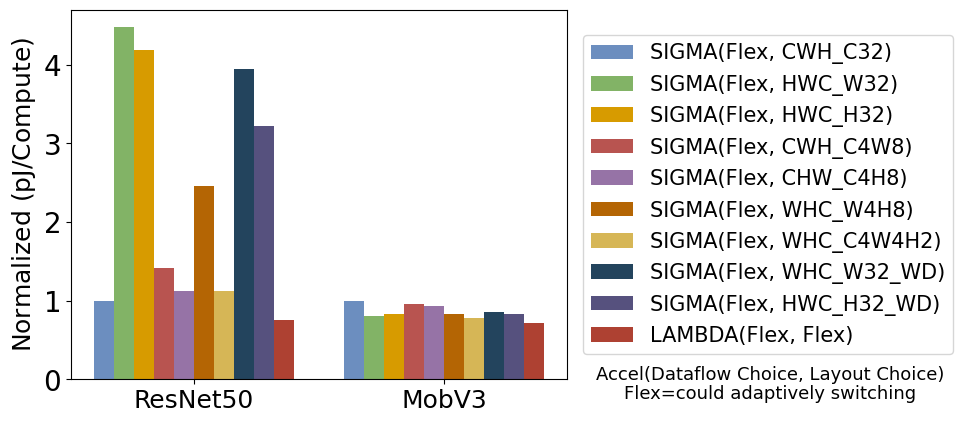

In [49]:
layout_considered_energy = [
    [3.571132075,15.98698113,14.94169811,5.047358491,4.000943396,8.792264151,4.023207547,14.10886792,11.4809434,2.71], # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
[30.33096774,24.57677419,25.02677419,28.87016129,28.25177419,25.07806452,23.71435484,25.93048387,25.08483871,21.5966129]] # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
num_data = len(layout_considered_energy[1])
for i in range(num_data-1,0,-1):
    layout_considered_energy[0][i] = layout_considered_energy[0][i] / layout_considered_energy[0][0]
    layout_considered_energy[1][i] = layout_considered_energy[1][i] / layout_considered_energy[1][0]
layout_considered_energy[0][0] = 1
layout_considered_energy[1][0] = 1

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D", "#56517E", "#AE4132"]
x = [1, 2]
num_column = len(layout_considered_energy[0])
barWidth = 4/num_column
plt_handler = []
for j in range(len(layout_considered_energy)):
    plt.bar(x[j]-barWidth*9/num_column, layout_considered_energy[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*7/num_column, layout_considered_energy[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]-barWidth*5/num_column, layout_considered_energy[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]-barWidth*3/num_column, layout_considered_energy[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]-barWidth*1/num_column, layout_considered_energy[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    plt.bar(x[j]+barWidth*1/num_column, layout_considered_energy[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5])
    plt.bar(x[j]+barWidth*3/num_column, layout_considered_energy[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6])
    plt.bar(x[j]+barWidth*5/num_column, layout_considered_energy[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7])
    plt.bar(x[j]+barWidth*7/num_column, layout_considered_energy[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8])
    plt.bar(x[j]+barWidth*9/num_column, layout_considered_energy[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9])
    if j == len(layout_considered_energy) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*9/num_column, layout_considered_energy[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*7/num_column, layout_considered_energy[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]-barWidth*5/num_column, layout_considered_energy[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, layout_considered_energy[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, layout_considered_energy[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, layout_considered_energy[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, layout_considered_energy[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6]))
        plt_handler.append(plt.bar(x[j]+barWidth*5/num_column, layout_considered_energy[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7]))
        plt_handler.append(plt.bar(x[j]+barWidth*7/num_column, layout_considered_energy[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8]))
        plt_handler.append(plt.bar(x[j]+barWidth*9/num_column, layout_considered_energy[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9]))

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel(r"Normalized $(\rm pJ/Compute)$", fontsize=MEDIUM_SIZE)
# plt.xlabel("Layer ID (ResNet 50)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["ResNet50", "MobV3"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["SIGMA(Flex, CWH_C32)", "SIGMA(Flex, HWC_W32)", "SIGMA(Flex, HWC_H32)", "SIGMA(Flex, CWH_C4W8)", "SIGMA(Flex, CHW_C4H8)", "SIGMA(Flex, WHC_W4H8)", "SIGMA(Flex, WHC_C4W4H2)", "SIGMA(Flex, WHC_W32_WD)", "SIGMA(Flex, HWC_H32_WD)", "LAMBDA(Flex, Flex)"], loc='right', bbox_to_anchor=(1.8, 0.5), ncol=1, fontsize=15)
plt.text(3.3, 0, 'Accel(Dataflow Choice, Layout Choice)', horizontalalignment='center',fontsize=13)
plt.text(3.3, -0.25, 'Flex=could adaptively switching', horizontalalignment='center',fontsize=13)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='right', bbox_to_anchor=(1.53, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["LAMBDA", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='right', bbox_to_anchor=(1.45, 0.5), fontsize=SMALL_SIZE)
plt.savefig('energy_comparison_search_under_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()


In [20]:
layout_considered_energy = [
    [2.71,3.571132075,15.98698113,14.94169811,5.047358491,4.000943396,8.792264151,4.023207547,14.10886792,11.4809434], # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
[21.5966129,30.33096774,24.57677419,25.02677419,28.87016129,28.25177419,25.07806452,23.71435484,25.93048387,25.08483871]] # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
num_data = len(layout_considered_energy[1])
for i in range(num_data-1,0,-1):
    layout_considered_energy[0][i] = layout_considered_energy[0][i] / layout_considered_energy[0][0]
    layout_considered_energy[1][i] = layout_considered_energy[1][i] / layout_considered_energy[1][0]
layout_considered_energy[0][0] = 1
layout_considered_energy[1][0] = 1
print(layout_considered_energy)

[[1, 1.3177609132841328, 5.899255029520296, 5.513541738007381, 1.8624939081180811, 1.4763628767527677, 3.2443779154981547, 1.4845784306273064, 5.206224324723247, 4.236510479704797], [1, 1.4044316986391878, 1.1379920686544323, 1.158828669378984, 1.3367911636736332, 1.3081576412382703, 1.1612035941061851, 1.0980589849809272, 1.2006736422080335, 1.1615172632001012]]


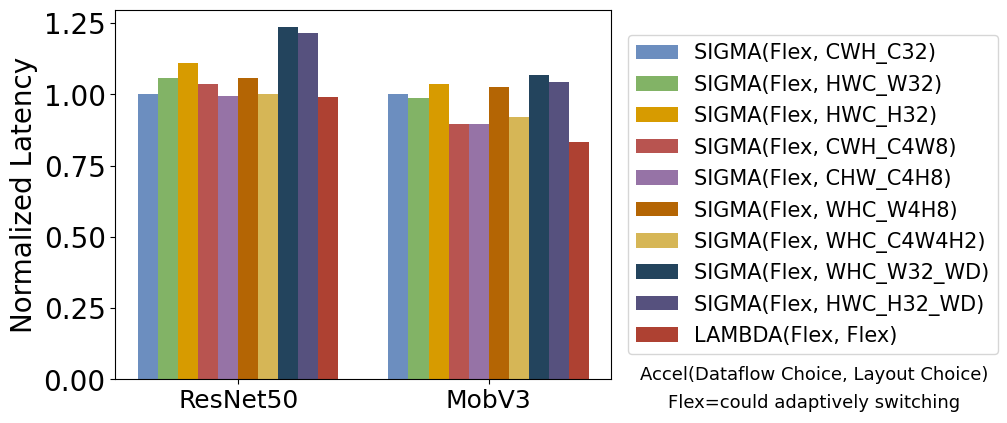

In [45]:
layout_considered_latency = [
    [16180480,17137856,17947840,16770048,16092672,17110528,16180480,19992064,19668160,16026816], # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
[1017608, 1005382, 1053654, 910667, 912711, 1043456, 935209, 1086610, 1063174,847837]] # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
num_data = len(layout_considered_latency[1])
for i in range(num_data-1,0,-1):
    layout_considered_latency[0][i] = layout_considered_latency[0][i] / layout_considered_latency[0][0]
    layout_considered_latency[1][i] = layout_considered_latency[1][i] / layout_considered_latency[1][0]
layout_considered_latency[0][0] = 1
layout_considered_latency[1][0] = 1

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D", "#56517E", "#AE4132"]
x = [1, 2]
num_column = len(layout_considered_latency[0])
barWidth = 4/num_column
plt_handler = []
for j in range(len(layout_considered_latency)):
    plt.bar(x[j]-barWidth*9/num_column, layout_considered_latency[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*7/num_column, layout_considered_latency[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]-barWidth*5/num_column, layout_considered_latency[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]-barWidth*3/num_column, layout_considered_latency[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]-barWidth*1/num_column, layout_considered_latency[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    plt.bar(x[j]+barWidth*1/num_column, layout_considered_latency[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5])
    plt.bar(x[j]+barWidth*3/num_column, layout_considered_latency[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6])
    plt.bar(x[j]+barWidth*5/num_column, layout_considered_latency[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7])
    plt.bar(x[j]+barWidth*7/num_column, layout_considered_latency[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8])
    plt.bar(x[j]+barWidth*9/num_column, layout_considered_latency[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9])
    if j == len(layout_considered_latency) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*9/num_column, layout_considered_latency[j][0], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*7/num_column, layout_considered_latency[j][1], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]-barWidth*5/num_column, layout_considered_latency[j][2], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, layout_considered_latency[j][3], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, layout_considered_latency[j][4], width=barWidth*2/num_column, bottom=0, color=color_list[4]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, layout_considered_latency[j][5], width=barWidth*2/num_column, bottom=0, color=color_list[5]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, layout_considered_latency[j][6], width=barWidth*2/num_column, bottom=0, color=color_list[6]))
        plt_handler.append(plt.bar(x[j]+barWidth*5/num_column, layout_considered_latency[j][7], width=barWidth*2/num_column, bottom=0, color=color_list[7]))
        plt_handler.append(plt.bar(x[j]+barWidth*7/num_column, layout_considered_latency[j][8], width=barWidth*2/num_column, bottom=0, color=color_list[8]))
        plt_handler.append(plt.bar(x[j]+barWidth*9/num_column, layout_considered_latency[j][9], width=barWidth*2/num_column, bottom=0, color=color_list[9]))

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.ylabel("Normalized Latency", fontsize=BIGGER_SIZE)
# plt.xlabel("Layer ID (ResNet 50)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["ResNet50", "MobV3"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["SIGMA(Flex, CWH_C32)", "SIGMA(Flex, HWC_W32)", "SIGMA(Flex, HWC_H32)", "SIGMA(Flex, CWH_C4W8)", "SIGMA(Flex, CHW_C4H8)", "SIGMA(Flex, WHC_W4H8)", "SIGMA(Flex, WHC_C4W4H2)", "SIGMA(Flex, WHC_W32_WD)", "SIGMA(Flex, HWC_H32_WD)", "LAMBDA(Flex, Flex)"], loc='right', bbox_to_anchor=(1.8, 0.5), ncol=1, fontsize=15)
plt.text(3.3, 0, 'Accel(Dataflow Choice, Layout Choice)', horizontalalignment='center',fontsize=13)
plt.text(3.3, -0.1, 'Flex=could adaptively switching', horizontalalignment='center',fontsize=13)

# plt.legend(plt_handler, ["LAMBDA", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='right', bbox_to_anchor=(1.53, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Global Optimal", "CWH_CX32", "HWC_WX32", "HWC_HX32", "CWH_CX4WX8", "CHW_CX4HX8", "WHC_WX4HX8", "WHC_WX4HX8", "WHC_WX32D", "HWC_HX32D"], loc='right', bbox_to_anchor=(1.53, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["LAMBDA", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='right', bbox_to_anchor=(1.45, 0.5), fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_search_under_layout.pdf', bbox_inches="tight", transparent=True) 
plt.show()


In [66]:
layout_considered_energy =[
    [16026816,16180480,17137856,17947840,16770048,16092672,17110528,16180480,19992064,19668160], # ResNet50, "no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"
[847837, 1017608, 1005382, 1053654, 910667, 912711, 1043456, 935209, 1086610, 1063174]]
num_data = len(layout_considered_energy[1])
for i in range(num_data-1,0,-1):
    layout_considered_energy[0][i] = layout_considered_energy[0][i] / layout_considered_energy[0][0]
    layout_considered_energy[1][i] = layout_considered_energy[1][i] / layout_considered_energy[1][0]
layout_considered_energy[0][0] = 1
layout_considered_energy[1][0] = 1
print(layout_considered_energy)

[[1, 1.0095879306282671, 1.0693238132889278, 1.1198631094285976, 1.0463742767122304, 1.0041091131264002, 1.0676186711072242, 1.0095879306282671, 1.2474133352501209, 1.2272032074243568], [1, 1.2002401404987044, 1.1858199158564677, 1.242755388122953, 1.0741062256070448, 1.0765170663700687, 1.2307271326917792, 1.103052827371299, 1.2816260672747237, 1.2539839615397772]]


In [38]:
overall = np.array(ReLU_latency) + np.array(qconv_latency) + np.array(BN_latency) + np.array(MaxPooling_latency)
overall_no_dram = np.array(ReLU_latency) + np.array(qconv_latency_no_dram) + np.array(BN_latency) + np.array(MaxPooling_latency_no_dram)
print(overall/overall_no_dram)
print(min(overall/overall_no_dram), max(overall/overall_no_dram))

[1.13495143 1.05780229 1.07135455 1.06400042 1.06112957 1.03634239
 1.05853074 1.05853074 1.05244876 1.05853074 1.02749258 1.40836941]
1.0274925810962923 1.4083694083694083


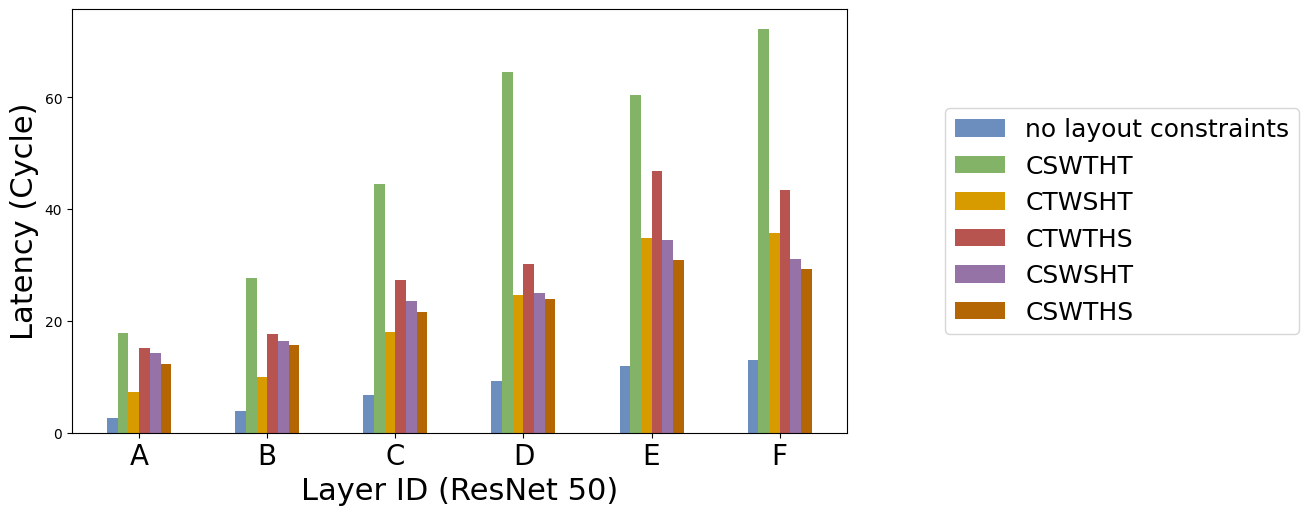

In [2]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212 + 2557, 40899 + 2611]) * 10**(-3)
alevo_k16c32_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-3)
alevo_k16c32_latency_night = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers

roofline_k16c32_latency = np.array([2.56064, 3.86652, 6.78192, 9.30599, 11.87209, 13.06725])
latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
num_column = 6
plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*5/num_column, roofline_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*3/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]-barWidth*1/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]+barWidth*1/num_column, alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]+barWidth*3/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    plt.bar(x[j]+barWidth*5/num_column, alevo_k16c32_latency_night[j], width=barWidth*2/num_column, bottom=0, color=color_list[5])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*5/num_column, roofline_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[4]))
        plt_handler.append(plt.bar(x[j]+barWidth*5/num_column, alevo_k16c32_latency_night[j], width=barWidth*2/num_column, bottom=0, color=color_list[5]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (Cycle)", fontsize=BIGGER_SIZE)
plt.xlabel("Layer ID (ResNet 50)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["no layout constraints", "CSWTHT", "CTWSHT", "CTWTHS", "CSWSHT", "CSWTHS", "CTWSHS", "CSWSHS", "CTWSHTD", "CTWTHSD"], loc='right', bbox_to_anchor=(1.6, 0.5), fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_scale.pdf', bbox_inches="tight", transparent=True) 
plt.show()

the max ratio of latency going into weights from off-chip memory: 0.655099393572358
the max ratio of latency going into oAct access from off-chip memory: 0.2576244351825954
the max ratio of latency going into iAct access from off-chip memory: 0.20135111250075674
latency saving ratio range is [0.4568716063802186,  0.6350830209535345]


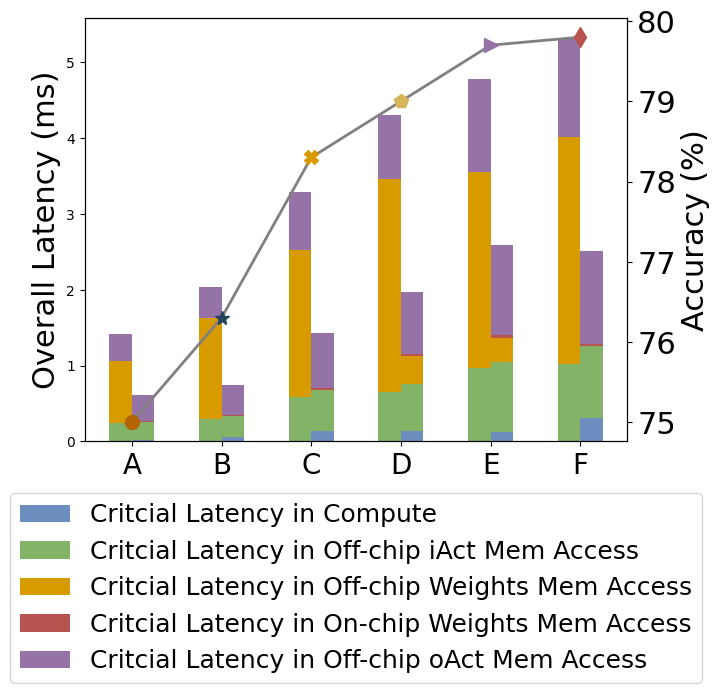

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# user data
accuracy_list_pareto_frontier = [79.8, 79.7, 79.0, 78.3, 76.3, 75]
accuracy_list_pareto_frontier = np.sort(accuracy_list_pareto_frontier)

critical_compute_time_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_on_mem_time=[0.02721307199999999, 0.039101119999999996, 0.06315931200000001, 0.08271092800000002, 0.091700432, 0.10210414400000005]
critical_off_mem_time=[1.4173475, 2.036516666666667, 3.2895474999999994, 4.307860833333334, 4.776064166666668, 5.317924166666668]
critical_off_mem_time_iact=[0.2378958333333334, 0.2892291666666669, 0.5805000000000003, 0.6559800000000005, 0.9616658333333332, 1.0196083333333334]
critical_off_mem_time_weights=[0.8281808333333333, 1.3341208333333334, 1.9415274999999996, 2.798620833333334, 2.583967500000001, 3.0003875000000004]
critical_on_mem_time_weights=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_off_mem_time_oact=[0.3512708333333335, 0.4131666666666665, 0.7675200000000004, 0.8532600000000001, 1.2304308333333336, 1.2979283333333347]


critical_compute_time_list_subnet_reuse = [0.020722222222222222, 0.054911111111111105, 0.1337344, 0.1388832, 0.11757386666666667, 0.3119143999999999]
critical_on_mem_time_subnet_reuse = [0.02210820799999999, 0.028288512, 0.044137487999999996, 0.06546779200000002, 0.08168168, 0.07093841600000003]
critical_off_mem_time_subnet_reuse = [0.5805683333333335, 0.6728791666666666, 1.2817200000000009, 1.8061666666666667, 2.44164, 2.1629416666666663]
critical_off_mem_time_iact_subnet_reuse = [0.23341666666666672, 0.2740208333333336, 0.5469000000000002, 0.6222900000000003, 0.9281008333333334, 0.9423108333333332]
critical_off_mem_time_weights_subnet_reuse = [0.00035999999999999997, 0.0009, 0.0009, 0.3643066666666666, 0.3166733333333333, 0.0]
critical_on_mem_time_weights_subnet_reuse = [0.010961295999999999, 0.015369231999999998, 0.019528464000000002, 0.030789392000000006, 0.034802192, 0.029409936000000008]
critical_off_mem_time_oact_subnet_reuse = [0.3467916666666668, 0.3979583333333332, 0.7339200000000002, 0.81957, 1.1968658333333337, 1.2206308333333342]

print(f"the max ratio of latency going into weights from off-chip memory: {np.max(np.array(critical_off_mem_time_weights)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into oAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_oact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into iAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_iact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
# internal logic

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(accuracy_list_pareto_frontier))]

barWidth = 0.25

acu_matrix = []
sum_matrix = [critical_compute_time_list, critical_off_mem_time_iact, critical_off_mem_time_weights, critical_on_mem_time_weights, critical_off_mem_time_oact]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [critical_compute_time_list_subnet_reuse, critical_off_mem_time_iact_subnet_reuse, critical_off_mem_time_weights_subnet_reuse, critical_on_mem_time_weights_subnet_reuse, critical_off_mem_time_oact_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Overall Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(plt_handler, ["Critcial Latency in Compute", "Critcial Latency in Off-chip iAct Mem Access", "Critcial Latency in Off-chip Weights Mem Access", "Critcial Latency in On-chip Weights Mem Access", "Critcial Latency in Off-chip oAct Mem Access"], loc='lower center', bbox_to_anchor=(0.5, -0.6), fontsize=SMALL_SIZE)

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]

# multiple line plots
ax2.plot(x, accuracy_list_pareto_frontier, markersize=0, color="grey", linewidth=2)

for id in range(len(accuracy_list_pareto_frontier)):
    ax2.plot(x[id], accuracy_list_pareto_frontier[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)
ax2.set_ylabel("Accuracy (%)", fontsize=BIGGER_SIZE)

plt.savefig('latency_accuracy_breakdown_image_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Performance of Convolution-diff-size

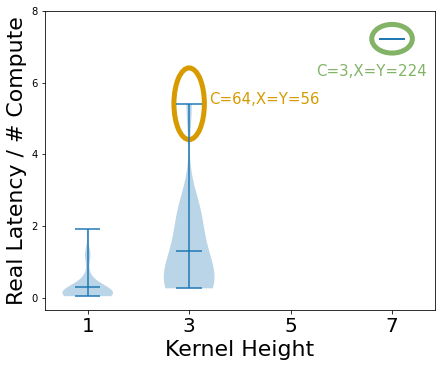

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from matplotlib.patches import Ellipse

def unique(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    return unique_list

ratio_dpu_latency_roofline_latency = np.array([7.22432175,1.899098481,5.409227717,1.171800252,0.1189388855,1.172061864,1.903221389,1.231768296,0.2490153384,2.426366369,0.602694241,0.1246296518,2.328204694,0.2409279799,0.5437382141,0.2408633528,2.474030111,0.1360562979,0.3080405997,1.22988531,0.1370598783,0.3062101902,0.5488139759,0.307718113,0.06851008385,1.14928973,0.1282657952,0.2526265419,0.1281502692,1.257706996,0.07346336331,0.1710885651,0.6225197767,0.07338939107,0.1554970367,0.2942596137,0.07346069556,0.07349283091,0.2910787265,0.07275060255,0.07274554969,0.290877263,0.07336061062,0.03653203752,0.2581964511,0.06456090778,0.05100238565,0.06401453584,0.2582287097,0.06454676792,0.06448985353,0.2566636682,0.06453952044])
conv_size = np.array([7,1,3,1,1,1,3,1,1,3,1,1,3,1,1,1,3,1,1,3,1,1,3,1,1,3,1,1,1,3,1,1,3,1,1,3,1,1,3,1,1,3,1,1,3,1,1,1,3,1,1,3,1])
# groups = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16,1,1,64,1,1,72,1,1,72,1,1,1,1,120,1,1,1,1,120,1,1,1,1,240,1,1,200,1,1,184,1,1,184,1,1,480,1,1,1,1,672,1,1,1,1,672,1,1,1,1,960,1,1,1,1,960,1,1,1,1])

# non_group_conv = np.where(groups == 1)[0]
# ratio_dpu_latency_roofline_latency = ratio_dpu_latency_roofline_latency[non_group_conv]
# conv_size = conv_size[non_group_conv]

pos = unique(conv_size)
# pos.remove(max(pos))
data = []
for i in range(len(pos)):
    data.append(ratio_dpu_latency_roofline_latency[np.where(conv_size == pos[i])])

# Fixing random state for reproducibility
np.random.seed(19680801)
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
ax.violinplot(data, pos, points=60, widths=1, showmeans=True,
                      showextrema=True, showmedians=False, bw_method=0.5)
                    #   quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
circle1 = Ellipse(xy=(3, 5.409227717),width=2, height=0.6,angle=90, lw=5, color=color_list[2], fill=False)
ax.text(3.4, 5.409227717, 'C=64,X=Y=56',color=color_list[2],fontsize=15)
circle2 = plt.Circle((7, 7.22432175), 0.4,lw=5, color=color_list[1], fill=False)
ax.text(5.5, 6.2, 'C=3,X=Y=224', color=color_list[1],fontsize=15)
ax.add_patch(circle1)
ax.add_patch(circle2)
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Real Latency / # Compute", fontsize=BIGGER_SIZE)
plt.xlabel("Kernel Height", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks([1, 3, 5, 7], ["1", "3", "5", "7"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize



# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["CPU", "FastSwitch W/O PB", "FastSwitch W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('convolution_performance.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# group convolution

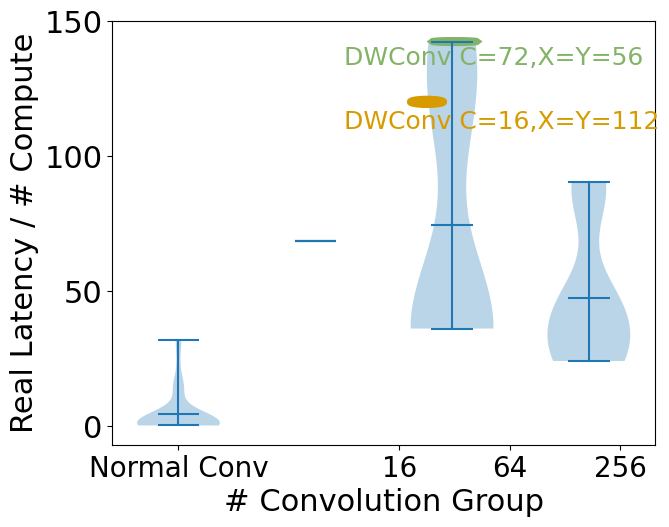

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import csv

def unique(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    return unique_list

ratio_dpu_latency_roofline_latency = np.array([22.89342645,68.71469354,5.442458325,1.914607282,120.1482599,3.258257873,1.535821134,37.00045822,3.22175461,1.540886965,142.5149891,31.85123264,31.35866609,1.967630512,0.9014015383,36.1059565,13.84907682,15.28471094,1.913355165,0.9033930861,36.08923038,13.97930729,14.41454492,1.896614244,0.6047071938,90.38170185,0.9024032847,0.5132688417,41.25091756,0.9174837,0.5450276087,44.02278116,0.9402208001,0.5457913829,43.99640556,0.9246739221,0.3012159352,24.05892917,1.213585764,1.24728928,0.6396877307,0.2163302544,24.67849901,0.7141195658,0.7486957022,0.6319717055,0.2170180113,86.00581031,0.7187445082,0.7517737121,0.4120243138,0.1573481618,25.53263525,0.4374810221])
conv_size = np.array([3,3,1,1,3,1,1,3,1,1,5,1,1,1,1,5,1,1,1,1,5,1,1,1,1,3,1,1,3,1,1,3,1,1,3,1,1,3,1,1,1,1,3,1,1,1,1,5,1,1,1,1,5,1,1,1,1,5,1,1,1,1])
groups = np.array([1,16,1,1,64,1,1,72,1,1,72,1,1,1,1,120,1,1,1,1,120,1,1,1,1,240,1,1,200,1,1,184,1,1,184,1,1,480,1,1,1,1,672,1,1,1,1,672,1,1,1,1,960,1])
log_groups = np.log2(groups)
max_groups = np.max(log_groups)
num_groups = 4
divider = max_groups/num_groups
non_group_conv = np.where(log_groups > 1)[0]

pos = np.array([i*divider for i in range(num_groups)])# unique(groups)
# pos.remove(max(pos))
data = []
for i in range(pos.size):
    temp = ratio_dpu_latency_roofline_latency[np.where(divider*i <= log_groups)]
    temp_groups = log_groups[np.where(divider*i <= log_groups)]
    data.append(temp[np.where(temp_groups <= divider*(i+1))])

# Fixing random state for reproducibility
np.random.seed(19680801)
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
ax.violinplot(data, pos, points=60, widths=1.5, showmeans=True,
                      showextrema=True, showmedians=False, bw_method=0.5)
                    #   quantiles=[[0.1], [], [], [0.175, 0.954], [0.75], [0.25]])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Real Latency / # Compute", fontsize=BIGGER_SIZE)
plt.xlabel("# Convolution Group", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(divider, [ "1", "3", "5"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
circle1 = Ellipse(xy=(4.5, 120.1482599),width=2, height=0.6,angle=90, lw=5, color=color_list[2], fill=False)
ax.text(3, 110, 'DWConv C=16,X=Y=112',color=color_list[2],fontsize=18)
circle2 = plt.Circle((5, 142.5149891), 0.4,lw=5, color=color_list[1], fill=False)
ax.text(3, 134, 'DWConv C=72,X=Y=56', color=color_list[1],fontsize=18)
ax.add_patch(circle1)
ax.add_patch(circle2)
# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.xticks([0, 4, 6, 8], ["Normal Conv", "16", "64", "256"], fontsize=MEDIUM_SIZE)

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["CPU", "FastSwitch W/O PB", "FastSwitch W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('group_conv_performance.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [11]:
log_groups

array([0.        , 4.        , 0.        , 0.        , 6.        ,
       0.        , 0.        , 6.169925  , 0.        , 0.        ,
       6.169925  , 0.        , 0.        , 0.        , 0.        ,
       6.9068906 , 0.        , 0.        , 0.        , 0.        ,
       6.9068906 , 0.        , 0.        , 0.        , 0.        ,
       7.9068906 , 0.        , 0.        , 7.64385619, 0.        ,
       0.        , 7.52356196, 0.        , 0.        , 7.52356196,
       0.        , 0.        , 8.9068906 , 0.        , 0.        ,
       0.        , 0.        , 9.39231742, 0.        , 0.        ,
       0.        , 0.        , 9.39231742, 0.        , 0.        ,
       0.        , 0.        , 9.9068906 , 0.        ])

# Roofline with Padding or not

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

latency_roofline_without_parameter = np.array([4.10,0.11,1.00,0.45,1.78,0.45,1.00,0.45,0.45,1.00,0.45,0.89,4.01,0.45,1.78,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.89,4.01,0.45,1.78,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.89,4.01,0.45,1.78,0.45,1.00,0.45,0.45,1.00,0.45])
latency_roofline_with_parameter = np.array([1.02,0.11,1.00,0.45,1.78,0.45,1.00,0.45,0.45,1.00,0.45,0.89,1.00,0.45,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.89,1.00,0.45,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.45,1.00,0.45,0.89,1.00,0.45,0.74,0.45,1.00,0.45,0.45,1.00,0.45])

x = np.array([i for i in range(len(latency_roofline_without_parameter))])

# create data
fig = plt.figure(figsize=[11,5.5])
ax = plt.subplot(111)

plt_handler = []

barWidth = 0.5
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

for i, j in enumerate(latency_roofline_without_parameter):
    if i==0:
        plt_handler.append( plt.bar(i-barWidth/2, j, width=barWidth, bottom=0, color=color_list[0]))
    else:
        plt.bar(i-barWidth/2, j, width=barWidth, bottom=0, color=color_list[0])


for i, j in enumerate(latency_roofline_with_parameter):
    if i==0:
        plt_handler.append(plt.bar(i+barWidth/2, j, width=barWidth, bottom=0, color=color_list[2]))
    else:
        plt.bar(i+barWidth/2, j, width=barWidth, bottom=0, color=color_list[2])

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("msec", fontsize=MEDIUM_SIZE)
plt.xlabel("# Layer ID", fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F", "G"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
# plt.yticks([0, 200, 400, 600], ["0", "200", "400", "600"], fontsize=BIGGER_SIZE)

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# line3, = ax.plot([-3,len(x)+3], [64, 64], dashes=[3, 3], linewidth=4, color=color_list[1])
plt.xlim([-3, len(x)+3])
# plt.text(len(x)-10, 90, "64 Flops/Byte", bbox=dict(linewidth=3, facecolor=color_list[1], alpha=0.2))
plt.legend(plt_handler, ["Roofline W/O Parameters", "Roofline W Parameters"], loc='best',fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Mobile Net V3", "ResNet 50"], loc='best', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Compute Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('roofline_parameter.pdf', bbox_inches="tight", transparent=True)
# plt.legend(plt_handler, ["Mobile Net V3", "ResNet 50"], loc='best',fontsize=MEDIUM_SIZE)
plt.show()

In [ ]:
latency_roofline_conv = [5.575111111111111e-05, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.0004460088888888889, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.0004460088888888889, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.0004460088888888889, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444, 0.00022300444444444444]
latency_single_conv_cpu = [0.12662196, 0.15214932, 0.15022461, 0.15174609, 0.15033159, 0.15125921, 0.1501075, 0.18646759, 0.11065536, 0.14491085, 0.10975461, 0.11001686, 0.11006837, 0.10792326, 0.10927916, 0.11006062, 0.14026569, 0.10263245, 0.13660395, 0.10202057, 0.10068092, 0.09984119, 0.10096645, 0.09871517, 0.1034885, 0.10244671, 0.10224507, 0.10194219, 0.10434359, 0.13186228, 0.10080476, 0.13654357, 0.10161087, 0.10531154, 0.10465607, 0.10306666]

In [ ]:
import numpy as np
latency_roofline_conv = np.array(latency_roofline_conv)
latency_roofline_conv.reshape(len(latency_roofline_conv), 1)

# Motivation Arithmetic Intensity

# Explore the effect of the PB size -- ResNet 50

# Design Space Exploration ResNet 50

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)
import numpy as np

resnet50 = []
with open('/home/jimmy/MAERI/Fast_Switch/frame/src/ResNetDSE.csv', newline='') as ResNet50DSE:
    spamreader = csv.reader(ResNet50DSE, delimiter=',', quotechar='|')
    for row in spamreader:
        resnet50.append(row)

resnet50_array = np.zeros((len(resnet50), len(resnet50[0])), dtype=float)
for i in range(len(resnet50)):
    for j in range(len(resnet50[0])):
        resnet50_array[i, j] = float(resnet50[i][j])

In [ ]:
# select available memory size
# overall size of common weights in ResNet 50 = 7912840 B demanding 879204.4444444445 PB entry -- 214 PB.
# resnet50_array_select = resnet50_array[:,np.where(resnet50_array[1,:]<7.55859375)[0]]
# select available Throughput
resnet50_array_select = resnet50_array[:,np.where(resnet50_array[0,:]<100)[0]]
resnet50_array_select.shape
# Convert PB size from KB into MB
# resnet50_array_select[1,:]  = np.divide(resnet50_array_select[1,:], 1024)
# Convert off-chip bandwidth from bit/cycle into GB/sec
# resnet50_array_select[2,:]  = np.divide(resnet50_array_select[2,:], 80)
best_idx = np.argmax(resnet50_array_select[3,:])
print(f"best throughput={resnet50_array_select[0, best_idx]} TFlops, PB size={resnet50_array_select[1, best_idx]} MB, best_off-chip bandwidth={resnet50_array_select[2, best_idx]} GB/sec, best ratio={resnet50_array_select[3, best_idx]}")

In [ ]:
import pandas as pd
df = pd.DataFrame({'Throughput (Tflops)': resnet50_array_select[0, :], "PB Size (MB)": resnet50_array_select[1, :], "offchip BW (GB/s)": resnet50_array_select[2, :], "Time Save %": resnet50_array_select[-1, :]})

In [ ]:
import plotly.express as px
# import plotly.graph_objects as go

fig = px.scatter_3d(df, x='Throughput (Tflops)', y="PB Size (MB)", z="offchip BW (GB/s)", color="Time Save %", size_max=5, color_continuous_scale="Bluyl")
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
best_idx = np.argmax(resnet50_array_select[3,:])
# fig.add_scatter3d(x=resnet50_array_select[0, best_idx], y= resnet50_array_select[1, best_idx], z=resnet50_array_select[2, best_idx], color=resnet50_array_select[3, best_idx])
camera = dict(
    eye=dict(x=1.5, y=1.7, z=1)
)
fig.update_layout(
    scene_camera=camera,
    autosize=False,
    width=800,
    height=700,
    margin=dict(l=0, r=0, t=0, b=0),
    font=dict(
        family="Courier New, monospace",
        size=18,
        # color="RebeccaPurple"
    ),
    coloraxis_colorbar_y=0.43,
    coloraxis_colorbar_x=0.91
    # zaxis = dict(size=20),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_coloraxes(colorbar_tickfont=dict(size=22), colorbar_len=0.8)
fig.update_yaxes(automargin=True)
fig.show()
fig.write_image("DSE_ResNet50.pdf",format="pdf", height=700, width=800, scale=3)

# Design Space Exploration MBV3

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)
import numpy as np

mbv3_data = []
with open('/home/jimmy/MAERI/Fast_Switch/frame/src/MBV3_DSE.csv', newline='') as MBV3_file:
    spamreader = csv.reader(MBV3_file, delimiter=',', quotechar='|')
    for row in spamreader:
        mbv3_data.append(row)

mbv3_data_array = np.zeros((len(mbv3_data), len(mbv3_data[0])), dtype=float)
for i in range(len(mbv3_data)):
    for j in range(len(mbv3_data[0])):
        mbv3_data_array[i, j] = float(mbv3_data[i][j])

In [ ]:
wrong_idx = np.where(mbv3_data_array[3,:]<0)[0]
print(f"best throughput={mbv3_data_array[0, wrong_idx]} TFlops, PB size={mbv3_data_array[1, wrong_idx]} MB, best_off-chip bandwidth={mbv3_data_array[2, wrong_idx]} bit, best ratio={mbv3_data_array[1, wrong_idx]}")

In [ ]:
# select available memory size
# overall size of common weights in MobileNet V3 = 4160888 B demand 462320.8888888889 PB entries -- 112.87 PB
mbv3_data_array_select = mbv3_data_array[:,np.where(mbv3_data_array[1,:]<3.97265625)[0]]
# select available Throughput
mbv3_data_array_select = mbv3_data_array_select[:,np.where(mbv3_data_array_select[0,:]<100)[0]]
mbv3_data_array_select = mbv3_data_array_select[:,np.where(mbv3_data_array_select[3,:]>0)[0]]
mbv3_data_array_select.shape
# Convert PB size from KB into MB
# mbv3_data_array_select[1,:]  = np.divide(mbv3_data_array_select[1,:], 1024)
# Convert off-chip bandwidth from bit/cycle into GB/sec
# mbv3_data_array_select[2,:]  = np.divide(mbv3_data_array_select[2,:], 80)
best_idx = np.argmax(mbv3_data_array_select[3,:])
print(f"best throughput={mbv3_data_array_select[0, best_idx]} TFlops, PB size={mbv3_data_array_select[1, best_idx]} MB, best_off-chip bandwidth={mbv3_data_array_select[2, best_idx]} GB/s, best ratio={mbv3_data_array_select[3, best_idx]}")

In [ ]:
import pandas as pd
df = pd.DataFrame({'Throughput (Tflops)': mbv3_data_array_select[0, :], "PB Size (MB)": mbv3_data_array_select[1, :], "offchip BW (GB/s)": mbv3_data_array_select[2, :], "Time Save %": mbv3_data_array_select[-1, :]})

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='Throughput (Tflops)', y="PB Size (MB)", z="offchip BW (GB/s)", color="Time Save %", size_max=5, color_continuous_scale="Bluyl")
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
camera = dict(
    eye=dict(x=1.5, y=1.7, z=1)
)
fig.update_layout(
    scene_camera=camera,
    autosize=False,
    width=800,
    height=700,
    margin=dict(l=0, r=0, t=0, b=0),
    font=dict(
        family="Courier New, monospace",
        size=18,
        # color="RebeccaPurple"
    ),
    coloraxis_colorbar_y=0.43,
    coloraxis_colorbar_x=0.91
    # zaxis = dict(size=20),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_coloraxes(colorbar_tickfont=dict(size=22), colorbar_len=0.8)
fig.update_yaxes(automargin=True)
fig.show()
fig.write_image("DSE_MBV3.pdf",format="pdf", height=700, width=800, scale=3)

# Comparison among small board and larger board

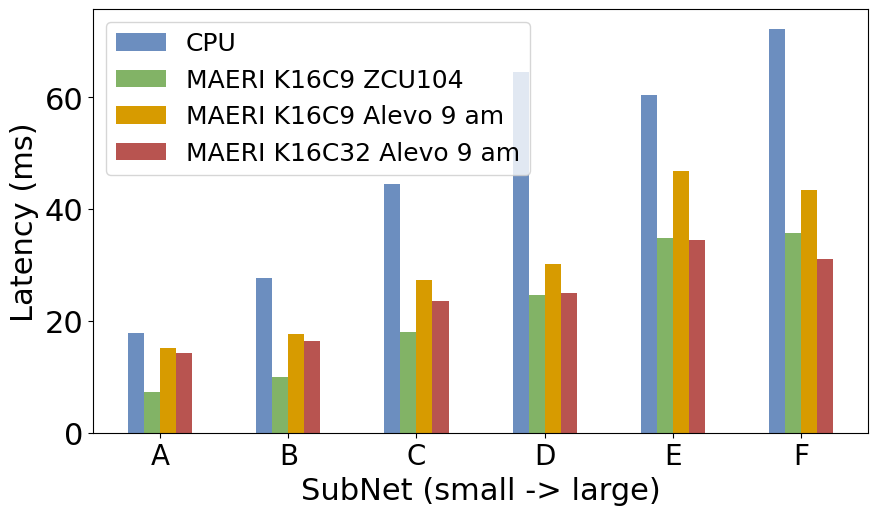

In [6]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 

# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212 + 2557
# network_id = 5accumulated latency = 40899 + 2611

alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212 + 2557, 40899 + 2611]) * 10**(-3)
alevo_k16c32_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-3)
alevo_k16c32_latency_night = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)
# alevo_k16c32_latency_remove_iact_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-6)
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers

latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
num_column = 4
plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*3/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*1/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]+barWidth*1/num_column, alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]+barWidth*3/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "MAERI K16C9 ZCU104", "MAERI K16C9 Alevo 9 am", "MAERI K16C32 Alevo 9 am"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_scale.pdf', bbox_inches="tight", transparent=True) 
plt.show()

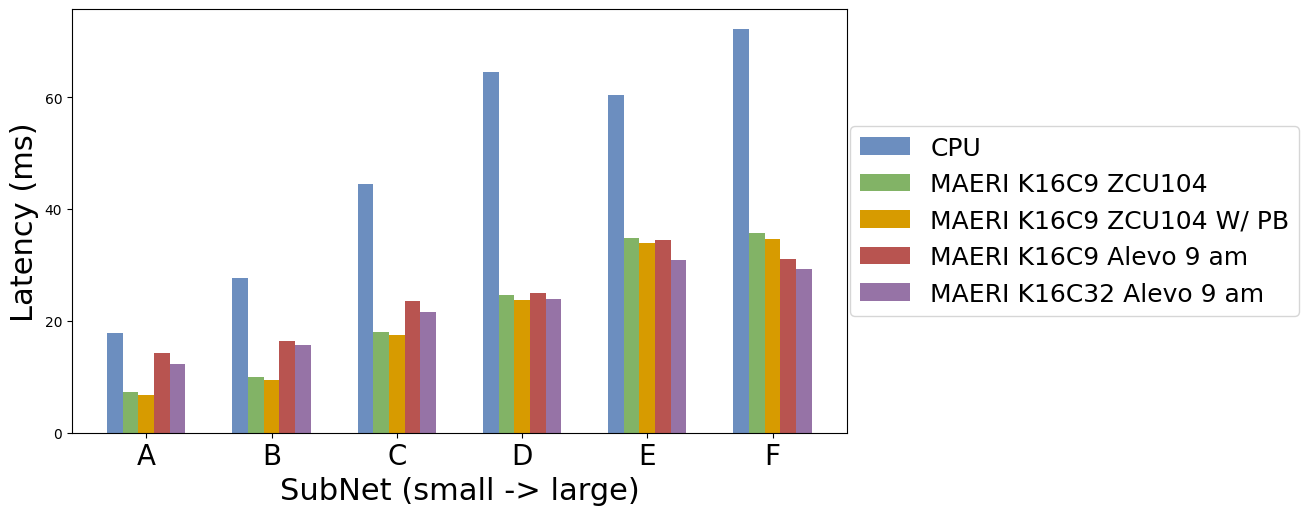

In [2]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 

# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212 + 2557
# network_id = 5accumulated latency = 40899 + 2611

alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212 + 2557, 40899 + 2611]) * 10**(-3)
alevo_k16c32_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-3)
alevo_k16c32_latency_night = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers

roofline_k16c32_latency = np.array([2.56064, 3.86652, 6.78192, 9.30599, 11.87209, 13.06725])
latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
num_column = 4
plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*4/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*2/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]                      , latency_comparison[2][j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    # plt.bar(x[j]                      , alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]+barWidth*2/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]+barWidth*4/num_column, alevo_k16c32_latency_night[j], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*4/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*2/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        # plt_handler.append(plt.bar(x[j]-barWidth*2/num_column, latency_comparison[2][j], width=barWidth*2/num_column, bottom=0, color=color_list[5]))
        plt_handler.append(plt.bar(x[j]                      , latency_comparison[2][j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        # plt_handler.append(plt.bar(x[j]                      , alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]+barWidth*2/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]+barWidth*4/num_column, alevo_k16c32_latency_night[j], width=barWidth*2/num_column, bottom=0, color=color_list[4]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "MAERI K16C9 ZCU104",  "MAERI K16C9 ZCU104 W/ PB",  "MAERI K16C9 Alevo 9 am", "MAERI K16C32 Alevo 9 am", "MAERI K16C32 Alevo 4 am"], loc='right', bbox_to_anchor=(1.6, 0.5), fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_scale.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [7]:
PB_comparison_list_alveo = []
PB_comparison_list_zcu104 = []
for j in range(len(latency_comparison[0])):
    PB_comparison_list_alveo.append((latency_comparison[1][j]/latency_comparison[2][j]-1))
    PB_comparison_list_zcu104.append((alevo_k16c32_latency[j]/alevo_k16c32_latency_night[j]-1))
print(PB_comparison_list_alveo)
print(PB_comparison_list_zcu104)

[0.06483919056600773, 0.04196596044523493, 0.03499882386666253, 0.0336965723692757, 0.030194879512107642, 0.02861408074065408]
[0.1633202742409403, 0.04961319608720682, 0.09391546679052487, 0.04853476025249792, 0.1181956542858067, 0.06090661213360593]


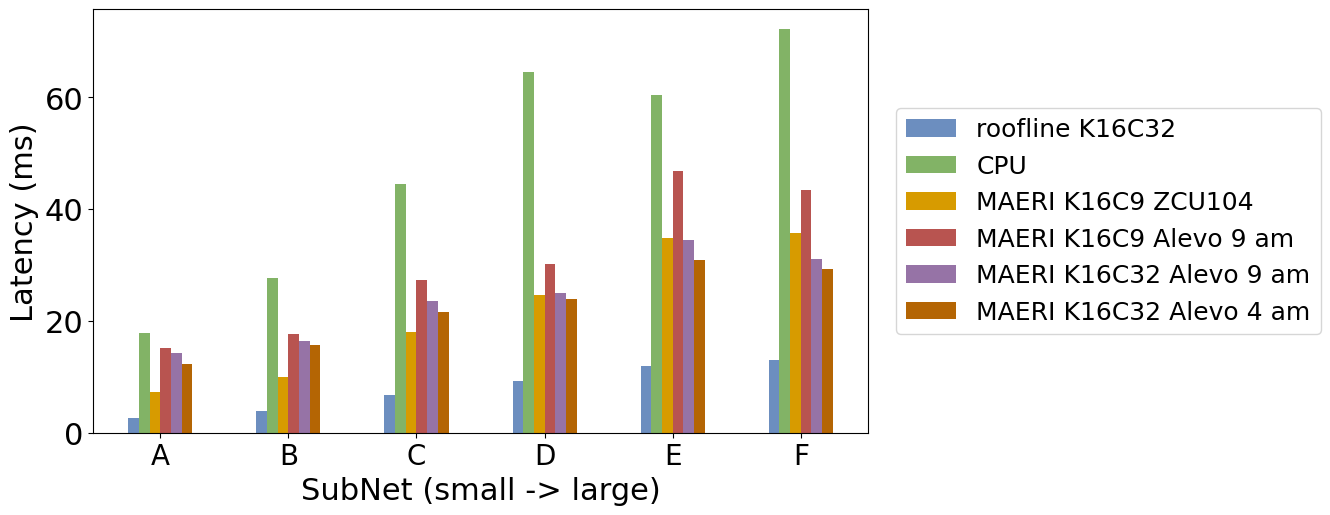

In [4]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 

# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212 + 2557
# network_id = 5accumulated latency = 40899 + 2611

alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212 + 2557, 40899 + 2611]) * 10**(-3)
alevo_k16c32_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-3)
alevo_k16c32_latency_night = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers

roofline_k16c32_latency = np.array([2.56064, 3.86652, 6.78192, 9.30599, 11.87209, 13.06725])
latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
num_column = 6
plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*5/num_column, roofline_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*3/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]-barWidth*1/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]+barWidth*1/num_column, alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]+barWidth*3/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    plt.bar(x[j]+barWidth*5/num_column, alevo_k16c32_latency_night[j], width=barWidth*2/num_column, bottom=0, color=color_list[5])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*5/num_column, roofline_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*3/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]-barWidth*1/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]+barWidth*1/num_column, alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]+barWidth*3/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[4]))
        plt_handler.append(plt.bar(x[j]+barWidth*5/num_column, alevo_k16c32_latency_night[j], width=barWidth*2/num_column, bottom=0, color=color_list[5]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["roofline K16C32", "CPU", "MAERI K16C9 ZCU104", "MAERI K16C9 Alevo 9 am", "MAERI K16C32 Alevo 9 am", "MAERI K16C32 Alevo 4 am"], loc='right', bbox_to_anchor=(1.6, 0.5), fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_scale.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
alevo_k16c9_latency/alevo_k16c32_latency_night

# [Latency Comparison] 3x3 kernel CPU v.s. Baseline v.s. FastSwitch

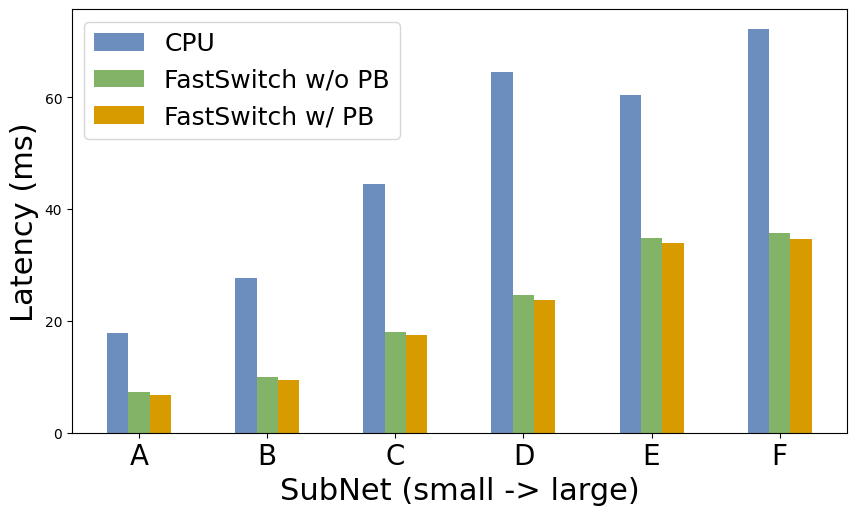

In [1]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 

# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212 + 2557
# network_id = 5accumulated latency = 40899 + 2611

# alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212 + 2557, 40899 + 2611]) * 10**(-6)
alevo_k16c32_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-6)
alevo_k16c32_latency_remove_iact_latency = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-6)

latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0])
    plt.bar(x[j], latency_comparison[1][j], width=barWidth*2/3, bottom=0, color=color_list[1])
    plt.bar(x[j]+barWidth*2/3, latency_comparison[2][j], width=barWidth*2/3, bottom=0, color=color_list[2])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j], latency_comparison[1][j], width=barWidth*2/3, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]+barWidth*2/3, latency_comparison[2][j], width=barWidth*2/3, bottom=0, color=color_list[2]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "FastSwitch w/o PB", "FastSwitch w/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_VS_CPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

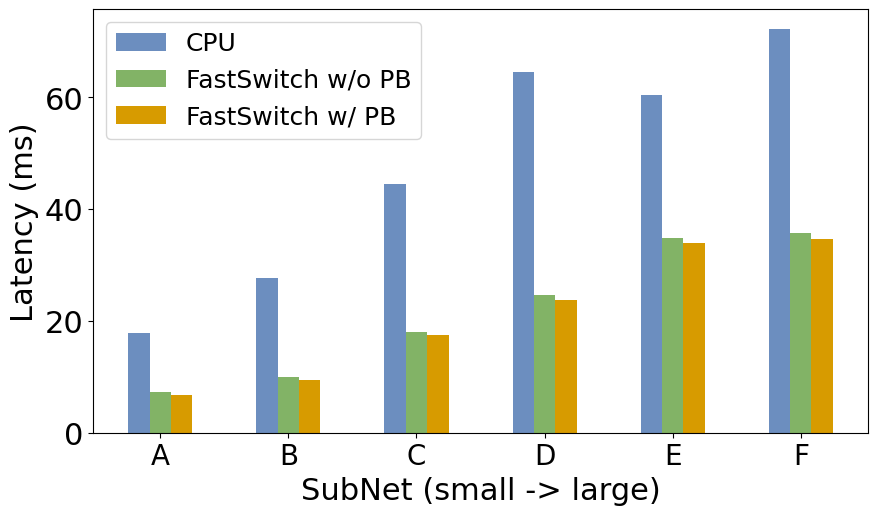

In [3]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 
# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212 + 2557
# network_id = 5accumulated latency = 40899 + 2611

alevo_k16c32_latency_np_pb_few_layers = [12708,13491,13966,15983,21582,21475]

# [15220,17659,27317,30147,44212,40899]
# [16448,20526,25972,29493,37942,35204]

# alevo_k16c32_latency = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3) # all specified layers.
alevo_k16c32_latency = np.array([15220,17659,27317,30147,44212,40899]) * 10**(-3) # selected layers
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers
# alevo_k16c32_latency_remove_iacts = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)

latency_comparison = np.array([[0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768],
# latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0])
    plt.bar(x[j], alevo_k16c32_latency[j], width=barWidth*2/3, bottom=0, color=color_list[1])
    plt.bar(x[j]+barWidth*2/3, alevo_k16c32_latency_pb[j], width=barWidth*2/3, bottom=0, color=color_list[2])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j], alevo_k16c32_latency[j], width=barWidth*2/3, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]+barWidth*2/3, alevo_k16c32_latency_pb[j], width=barWidth*2/3, bottom=0, color=color_list[2]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.3*np.max(latency_comparison)])    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "SushiAccel W/O PB", "SushiAccel W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_VS_CPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

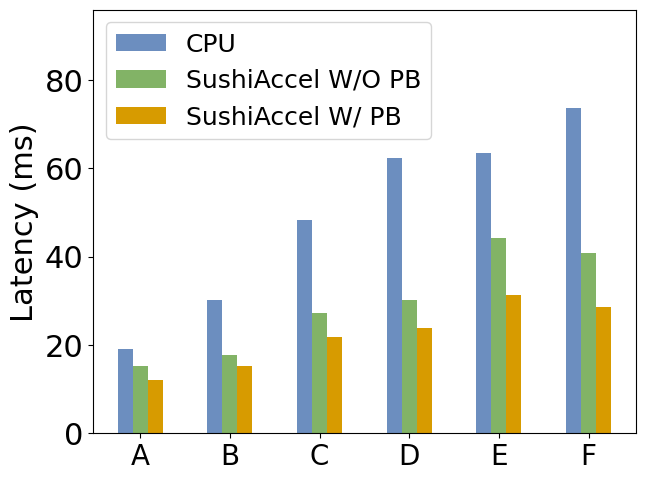

In [2]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 
# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212
# network_id = 5accumulated latency = 40899

alevo_k16c32_latency_np_pb_few_layers = [12708,13491,13966,15983,21582,21475]

# [15220,17659,27317,30147,44212,40899]
# [16448,20526,25972,29493,37942,35204]

# alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212, 40899]) * 10**(-6)
# alevo_k16c32_latency = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3) # all specified layers.
alevo_k16c32_latency = np.array([15220,17659,27317,30147,44212,40899]) * 10**(-3) # selected layers
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers
# alevo_k16c32_latency_remove_iacts = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)

latency_comparison = np.array([[0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768],
# latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0])
    plt.bar(x[j], alevo_k16c32_latency[j], width=barWidth*2/3, bottom=0, color=color_list[1])
    plt.bar(x[j]+barWidth*2/3, alevo_k16c32_latency_pb[j], width=barWidth*2/3, bottom=0, color=color_list[2])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j], alevo_k16c32_latency[j], width=barWidth*2/3, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]+barWidth*2/3, alevo_k16c32_latency_pb[j], width=barWidth*2/3, bottom=0, color=color_list[2]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.3*np.max(latency_comparison)])    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "SushiAccel W/O PB", "SushiAccel W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_VS_CPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

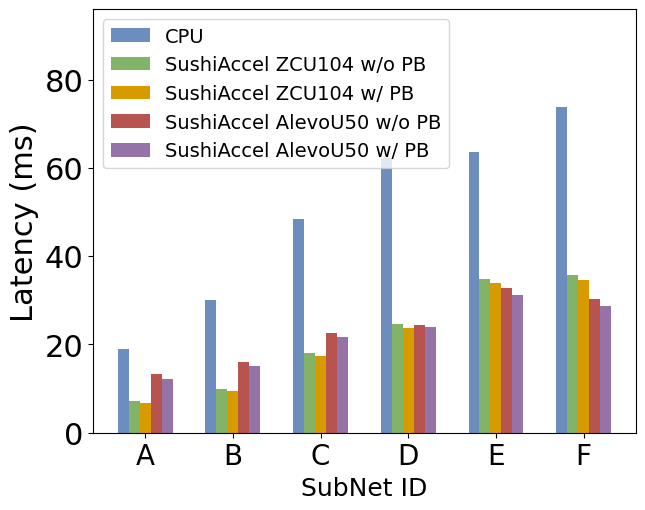

In [2]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 
# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212 + 2557
# network_id = 5accumulated latency = 40899 + 2611

alevo_k16c32_latency_np_pb_few_layers = [12708,13491,13966,15983,21582,21475]

# [15220,17659,27317,30147,44212,40899]
# [16448,20526,25972,29493,37942,35204]

alevo_k16c9_latency = np.array([15220, 17659, 27317, 30147, 44212 + 2557, 40899 + 2611]) * 10**(-3)
alevo_k16c32_latency_daylight = np.array([14253, 16417, 23552, 25082, 34531, 31127]) * 10**(-3)
alevo_k16c32_latency_night = np.array([12252,15641,21530,23921,30881,29340]) * 10**(-3)
alevo_k16c32_latency = (alevo_k16c32_latency_daylight + alevo_k16c32_latency_night)/2
alevo_k16c32_latency_pb = np.array([12081,15198,21750,23878,31292,28624]) * 10**(-3) # selected layers

latency_comparison = np.array([[0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768],
# latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]
num_column = 4
plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*4/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[0])
    plt.bar(x[j]-barWidth*2/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[1])
    plt.bar(x[j]                      , latency_comparison[2][j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    # plt.bar(x[j]                      , alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[2])
    plt.bar(x[j]+barWidth*2/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3])
    plt.bar(x[j]+barWidth*4/num_column, alevo_k16c32_latency_pb[j], width=barWidth*2/num_column, bottom=0, color=color_list[4])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*4/num_column, latency_comparison[0][j], width=barWidth*2/num_column, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j]-barWidth*2/num_column, latency_comparison[1][j], width=barWidth*2/num_column, bottom=0, color=color_list[1]))
        # plt_handler.append(plt.bar(x[j]-barWidth*2/num_column, latency_comparison[2][j], width=barWidth*2/num_column, bottom=0, color=color_list[5]))
        plt_handler.append(plt.bar(x[j]                      , latency_comparison[2][j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        # plt_handler.append(plt.bar(x[j]                      , alevo_k16c9_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[2]))
        plt_handler.append(plt.bar(x[j]+barWidth*2/num_column, alevo_k16c32_latency[j], width=barWidth*2/num_column, bottom=0, color=color_list[3]))
        plt_handler.append(plt.bar(x[j]+barWidth*4/num_column, alevo_k16c32_latency_pb[j], width=barWidth*2/num_column, bottom=0, color=color_list[4]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.3*np.max(latency_comparison)])    # legend fontsize
plt.xlabel(r"SubNet ID", fontsize=SMALL_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "SushiAccel ZCU104 w/o PB",  "SushiAccel ZCU104 w/ PB",  "SushiAccel AlevoU50 w/o PB", "SushiAccel AlevoU50 w/ PB"], loc='upper left', fontsize=14)
plt.savefig('latency_comparison_VS_CPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [28]:
alevo_k16c32_latency_pb

array([12.081, 15.198, 21.75 , 23.878, 31.292, 28.624])

In [16]:
print(latency_comparison[0]/latency_comparison[1])
sushiaccel_wo_pb_k16_c9_over_cpu = latency_comparison[0]/latency_comparison[1]
print(f"(ZCU104) SushiAccel K16C9 w/o PB speedup over CPU = {min(sushiaccel_wo_pb_k16_c9_over_cpu)} ~ {max(sushiaccel_wo_pb_k16_c9_over_cpu)}")

[2.6378768  3.0425807  2.67129606 2.53368437 1.81756612 2.06807572]
(ZCU104) SushiAccel K16C9 w/o PB speedup over CPU = 1.8175661166607975 ~ 3.042580699815244


In [18]:
latency_comparison[0]/latency_comparison[2]
print(latency_comparison[0]/latency_comparison[2])
sushiaccel_w_pb_k16_c9_over_cpu = latency_comparison[0]/latency_comparison[2]
print(f"(ZCU104) SushiAccel K16C9 w/ PB speedup over CPU = {min(sushiaccel_w_pb_k16_c9_over_cpu)} ~ {max(sushiaccel_w_pb_k16_c9_over_cpu)}")

[2.80891459 3.17026552 2.76478828 2.61906085 1.87244731 2.1272518 ]
(ZCU104) SushiAccel K16C9 w/ PB speedup over CPU = 1.8724473065586595 ~ 3.170265521115126


In [30]:
print(latency_comparison[1]/latency_comparison[2])
print(f"(ZCU104) SGS speedup K16C9 = {min(latency_comparison[1]/latency_comparison[2])} ~ {max(latency_comparison[1]/latency_comparison[2])}")

[1.06483919 1.04196596 1.03499882 1.03369657 1.03019488 1.02861408]
(ZCU104) SGS speedup K16C9 = 1.028614080740654 ~ 1.0648391905660077


In [21]:
latency_comparison[0]/alevo_k16c32_latency
print(latency_comparison[0]/alevo_k16c32_latency)
sushiaccel_wo_pb_k16_c32_over_cpu = latency_comparison[0]/alevo_k16c32_latency
print(f"(Alveo U50) SushiAccel K16C32 w/o PB speedup over CPU = {min(sushiaccel_wo_pb_k16_c32_over_cpu)} ~ {max(sushiaccel_wo_pb_k16_c32_over_cpu)}")

[1.43442973 1.88218229 2.14452065 2.54362304 1.94098789 2.44059338]
(Alveo U50) SushiAccel K16C32 w/o PB speedup over CPU = 1.4344297302395772 ~ 2.5436230434871336


In [22]:
latency_comparison[0]/alevo_k16c32_latency_pb
print(latency_comparison[0]/alevo_k16c32_latency_pb)
sushiaccel_w_pb_k16_c32_over_cpu = latency_comparison[0]/alevo_k16c32_latency_pb
print(f"(Alveo U50) SushiAccel K16C32 w/o PB speedup over CPU = {min(sushiaccel_w_pb_k16_c32_over_cpu)} ~ {max(sushiaccel_w_pb_k16_c32_over_cpu)}")

[1.57352703 1.98509672 2.22251218 2.61004188 2.02869583 2.5778256 ]
(Alveo U50) SushiAccel K16C32 w/o PB speedup over CPU = 1.5735270259084513 ~ 2.6100418795544016


In [25]:
print(alevo_k16c32_latency/alevo_k16c32_latency_pb)
print(f"(ZCU104) SGS speedup K16C9 = {min(alevo_k16c32_latency/alevo_k16c32_latency_pb)} ~ {max(alevo_k16c32_latency/alevo_k16c32_latency_pb)}")

[1.09697045 1.05467825 1.03636782 1.0261119  1.04518727 1.05622904]
(ZCU104) SGS speedup K16C9 = 1.026111902169361 ~ 1.096970449466104


In [ ]:
cpu_non3 = np.array([0.04125479936599732, 0.060068049430847176, 0.0896244728565216, 0.12079637050628664, 0.1123160719871521, 0.13066686153411863])
cpu_non3 = cpu_non3 * 1000

In [ ]:
cpu_non3 + alevo_k16c32_latency_pb

In [ ]:
alevo_k16c32_latency_pb

In [ ]:
12.081, 15.198, 21.75 , 23.878, 31.292, 28.624

In [ ]:
alevo_k16c32_latency/alevo_k16c32_latency_pb

In [ ]:
speedup_baseline = latency_comparison[0,:]/latency_comparison[2,:]
speedup_baseline = latency_comparison[0,:]/latency_comparison[1,:]
speedup_baseline = latency_comparison[1,:]/latency_comparison[2,:]
speedup_baseline = latency_comparison[1,:]/alevo_k16c32_latency
speedup_baseline = latency_comparison[0,:]/alevo_k16c32_latency_pb
print(speedup_baseline)

# Jounral Figure IEEE Micro

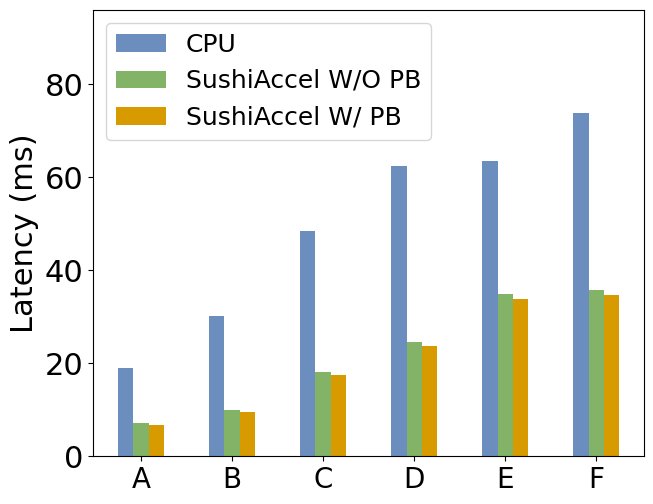

In [139]:
# 3x3 kernel CPU v.s. Baseline v.s. FastSwitch
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

# cpu now :array([0.0198579 , 0.02675981, 0.0423944 , 0.0541081 , 0.06864625, 0.05028334])
# CPU all: array([0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768])
# 2183, 1347, 784, 724, 1063, 734, 1221, 809, 844, 880, 819, 1823, 1989, 
# 1132, 1366, 762, 781, 1083, 800, 772, 1307, 838, 1061, 816, 835, 2408, 1853, 1845, 
# 1431, 1788, 1023, 901, 855, 810, 1847, 884, 996, 818, 1667, 1271, 1330, 1269, 1277, 4251, 2423, 2476, 
# 1418, 1217, 1726, 997, 989, 998, 927, 2823, 951, 964, 872, 2361, 1210, 1445, 1440, 1189, 4132, 2557, 1931, 
# 1751, 1616, 2209, 1171, 1453, 1192, 946, 2954, 1295, 1344, 1238, 3967, 1458, 2915, 1725, 1788, 1519, 6284, 3473, 1967, 1947, 
# 1745, 1660, 2367, 1104, 1145, 1203, 1562, 3004, 1792, 1328, 2298, 4068, 1842, 1864, 1484, 1420, 1398, 4907, 2611, 2097, 
# network_id = 0accumulated latency = 15220
# network_id = 1accumulated latency = 17659
# network_id = 2accumulated latency = 27317
# network_id = 3accumulated latency = 30147
# network_id = 4accumulated latency = 44212
# network_id = 5accumulated latency = 40899

latency_comparison = np.array([[0.01900978, 0.0301695 , 0.04833964, 0.06232258, 0.06348195, 0.07378768],
# latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])

latency_comparison = np.multiply(1000, latency_comparison)
# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(latency_comparison[0]))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

plt_handler = []
for j in range(len(latency_comparison[0])):
    plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0])
    plt.bar(x[j], latency_comparison[1][j], width=barWidth*2/3, bottom=0, color=color_list[1])
    plt.bar(x[j]+barWidth*2/3, latency_comparison[2][j], width=barWidth*2/3, bottom=0, color=color_list[2])
    if j == len(latency_comparison[0]) - 1:
        plt_handler.append(plt.bar(x[j]-barWidth*2/3, latency_comparison[0][j], width=barWidth*2/3, bottom=0, color=color_list[0]))
        plt_handler.append(plt.bar(x[j], latency_comparison[1][j], width=barWidth*2/3, bottom=0, color=color_list[1]))
        plt_handler.append(plt.bar(x[j]+barWidth*2/3, latency_comparison[2][j], width=barWidth*2/3, bottom=0, color=color_list[2]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xlabel("SubNet (small -> large)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.3*np.max(latency_comparison)])    # legend fontsize

# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.legend(plt_handler, ["CPU", "SushiAccel W/O PB", "SushiAccel W/ PB"], loc='upper left', fontsize=SMALL_SIZE)
plt.savefig('latency_comparison_VS_CPU.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Power consumption 3x3 kernel CPU v.s. Baseline v.s. FastSwitch

In [ ]:
# Real workload
import torch
power_granularity = 20 # pJ/bit; 1pJ = 10**(-12) J

k_pb_list = [24, 24, 0, 0, 32, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 64, 0, 0, 0, 64, 0, 0, 0, 0, 0, 0, 0, 0, 136, 0, 0, 0, 16, 0, 0, 136, 0, 0, 80, 0, 0, 136, 0, 0, 0, 0, 0, 328, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0]

layer_idx_target_subnet_to_supernet = [[0, 1, 3, 4, 5, 6, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54],
[0, 1, 3, 4, 5, 6, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]]

# get model sizes
number_workload = len(layer_idx_target_subnet_to_supernet)

max_num_layer = 0
for model_workload in layer_idx_target_subnet_to_supernet:
    # print(f"len(model_workload)={len(model_workload)} max_num_layer={max_num_layer}")
    max_num_layer = len(model_workload) if max_num_layer < len(model_workload) else max_num_layer

model_size = np.zeros((number_workload))

# print(f"n, k, c, r, s, x, y, padding_x, padding_y, stride_x, stride_y, dilation_x, dilation_y, output_zp, output_scale, o_x, o_y")
latency_list = []
for network_idx in range(number_workload):
    number_layer = len(layer_idx_target_subnet_to_supernet[network_idx])
    for layer_idx in range(number_layer):
        path_iacts = f"/home/jimmy/MAERI/Fast_Switch/FastSwitch/RunTime/results/CPU_Kernel/conv_iActs_{network_idx}_{layer_idx}.pth"
        path_weights = f"/home/jimmy/MAERI/Fast_Switch/FastSwitch/RunTime/results/CPU_Kernel/conv_weights_{network_idx}_{layer_idx}.pth"
        path_oacts = f"/home/jimmy/MAERI/Fast_Switch/FastSwitch/RunTime/results/CPU_Kernel/conv_oActs_{network_idx}_{layer_idx}.pth"
        iacts = torch.load(path_iacts)
        weights = torch.load(path_weights)
        oacts = torch.load(path_oacts)
        model_size[network_idx] += weights.shape[0]*weights.shape[1]*weights.shape[2]*weights.shape[3] + iacts.shape[0]*iacts.shape[1]*iacts.shape[2]*iacts.shape[3] + oacts.shape[0]*oacts.shape[1]*oacts.shape[2]*oacts.shape[3]

DRAM_power = np.multiply(model_size, 20*10**(-12))

# Only for testing purpose
# k_pb_list = [16, 16, 0, 0, 16, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 16, 0, 0, 16, 0, 0, 16, 0, 0, 16, 0, 0, 0, 0, 0, 16, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0]
# k_pb_list = [16, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

def generate_pb_data_metadata(k_pb_list):
    # generate three fields: 
    ## (1) address_list (each data 32 bit); 
    ## (2) k_pb_list (each data 12 bit); 
    ## (3) common_weights (each data 8 bit);

    common_weights = []
    init_address = 0
    address_list = np.zeros(len(k_pb_list), dtype=int)

    IFC_UNIT = 16 # Byte (A single 128-bit interface consists of 16 Byte -- 16 weights.)

    network_id = 0
    number_workload = len(layer_idx_target_subnet_to_supernet[network_id])

    for pb_layer_id in range(number_workload):
        mapped_layer_id = layer_idx_target_subnet_to_supernet[network_id][pb_layer_id] 
        k_pb = k_pb_list[mapped_layer_id]

        if k_pb > 0:
            path_weights = f"/home/jimmy/MAERI/Fast_Switch/FastSwitch/RunTime/results/CPU_Kernel/conv_weights_{network_id}_{pb_layer_id}.pth"
            path_parameters = f"/home/jimmy/MAERI/Fast_Switch/FastSwitch/RunTime/results/CPU_Kernel/conv_parameter_{network_id}_{pb_layer_id}.pth"
            weights = torch.load(path_weights)
            c = weights.shape[1]
            r = weights.shape[2]
            s = weights.shape[3]
            # print(f"common weights info pb_layer_id={pb_layer_id}, k_pb={k_pb}, c={c}, r={r}, s={s}")

            # partial_quantized_weights = generate_partial_weights(1, k_pb, c, r, s, weights)
            weight_sizes = k_pb*c*r*s 
            weights_sizes_post_padding = math.ceil(weight_sizes/IFC_UNIT)*IFC_UNIT 
            padding_zero_weight_sizes = weights_sizes_post_padding - weight_sizes
            address_list[mapped_layer_id]= init_address
            # print(f"weights_sizes = {weight_sizes}, weights_sizes_post_padding={weights_sizes_post_padding}, address = {init_address}")
            init_address += int(weights_sizes_post_padding/r/s)
            # common_weights.append(partial_quantized_weights.int_repr().flatten())
            common_weights.append(np.concatenate((weights.int_repr()[0:k_pb, 0:c, 0:r, 0:s].flatten(), np.zeros(padding_zero_weight_sizes, dtype=np.int8))))
    common_weights = np.concatenate(common_weights)
    return address_list, common_weights, init_address

address_list, common_weights, init_address = generate_pb_data_metadata(k_pb_list)

DRAM_power_with_pb = np.multiply(np.subtract(model_size, len(common_weights)), 20*10**(-12))
print(DRAM_power)
print(DRAM_power_with_pb)
off_chip_power = np.concatenate((DRAM_power.reshape(1, len(DRAM_power)), DRAM_power.reshape(1, len(DRAM_power)), DRAM_power_with_pb.reshape(1, len(DRAM_power_with_pb))), axis=0)
# Unit: J;

In [ ]:
static_power_list = np.array([45, 5, 5]).reshape(3,1)

latency_comparison = np.array([[0.01793031, 0.02765668, 0.04447627, 0.06448191, 0.06046943, 0.07217739],
[0.00720647, 0.00991576, 0.01809595, 0.02459761, 0.0349269, 0.03567939],
[0.006767660379, 0.00951639533, 0.01748402953, 0.02379577398, 0.03390319705, 0.03468685746]])
# latency_comparison = np.multiply(1000, latency_comparison)
on_chip_power = np.multiply(latency_comparison, np.concatenate((static_power_list,static_power_list,static_power_list,static_power_list,static_power_list,static_power_list), axis=1))

print(on_chip_power)

In [ ]:
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["Nothing", "SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

off_chip_power = np.multiply(off_chip_power, 1000)
latency_comparison = np.multiply(latency_comparison, 1000)

total_number_model_evaluated = 6
for platform_id in range(3):
    ax.plot(off_chip_power[platform_id, :], latency_comparison[platform_id, :], marker=shape_list[platform_id], markerfacecolor=color_list[platform_id], markersize=10, color=color_list[platform_id], linewidth=4)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("Off_chip Data Access Power (mJ)", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["Intel 10th i7 (45W)", "FastSwitch No PB (5W)", "FastSwitch W/ PB (5W)"], loc='upper left',fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('Latency_Power_Comparison.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# FPGA results compared with CPU results

In [ ]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import math

fpga_latency_no_latency_hidding = [0.0007040917873382569, 0.0007659387588500976, 0.00030655622482299804, 0.0002461183071136475, 0.0009540808200836181, 0.0011727416515350342, 0.000953744649887085, 0.0002469015121459961, 0.0009539961814880371, 0.0016952598094940187, 0.0007332956790924072, 0.001188807487487793, 0.00273357629776001, 0.0011573779582977296, 0.00027571797370910643, 0.001187976598739624, 0.0023846888542175294, 0.0010443329811096191, 0.0021989762783050535, 0.005150539875030518, 0.0022058701515197754, 0.0005195403099060059, 0.0021967434883117675, 0.0022103345394134523, 0.0005224859714508057, 0.002199426889419556, 0.0026829040050506594, 0.0007329154014587403, 0.002620553970336914, 0.002205120325088501, 0.00051857590675354, 0.0022029721736907958, 0.005026214122772217, 0.002543858289718628, 0.008686519861221313, 0.017463444471359252, 0.010749889612197874, 0.0027172791957855223, 0.010751851797103883, 0.0007063043117523193, 0.0009763765335083007, 0.0004253113269805908, 0.0002492713928222656, 0.0009523177146911621, 0.0018308961391448975, 0.001322065591812134, 0.00038825154304504393, 0.0011714410781860352, 0.001693214178085327, 0.0007328367233276367, 0.0011889612674713134, 0.002731502056121826, 0.0016419565677642822, 0.0004615974426269531, 0.0014704370498657227, 0.001155024766921997, 0.000276036262512207, 0.0011873245239257812, 0.0026476895809173584, 0.0012849926948547362, 0.0030150091648101806, 0.006244798898696899, 0.0030169761180877685, 0.0006492805480957032, 0.0030028629302978516, 0.003884580135345459, 0.0010657191276550293, 0.003962941169738769, 0.0030175769329071045, 0.0006468212604522705, 0.0030133163928985594, 0.0030170392990112303, 0.0006448900699615478, 0.0030053603649139405, 0.007618086338043213, 0.003873870372772217, 0.01075443148612976, 0.021341029405593872, 0.010755383968353271, 0.0027219963073730467, 0.010753577947616577, 0.010748376846313476, 0.0027163946628570557, 0.01075698971748352, 0.0009883451461791992, 0.0013630187511444092, 0.0007983636856079101, 0.0005167746543884278, 0.0015938103199005127, 0.002501661777496338, 0.0018005549907684326, 0.000525197982788086, 0.0015947532653808594, 0.0013031136989593505, 0.0003068852424621582, 0.00128737211227417, 0.0012930715084075927, 0.0003064703941345215, 0.0012914252281188965, 0.003320627212524414, 0.001772911548614502, 0.001884700059890747, 0.003511472940444946, 0.002106614112854004, 0.0006040537357330322, 0.001885455846786499, 0.0021083271503448487, 0.0005851435661315918, 0.0018826675415039061, 0.0014711391925811767, 0.0003704535961151123, 0.0015180528163909913, 0.003408318758010864, 0.0016456735134124756, 0.0034874868392944336, 0.007260910272598267, 0.004514229297637939, 0.0012308263778686524, 0.004602128267288208, 0.004522105455398559, 0.0012306308746337891, 0.004605264663696289, 0.004522191286087036, 0.001228489875793457, 0.004602756500244141, 0.004516621828079223, 0.0012313127517700195, 0.004602183103561402, 0.011066290140151978, 0.0068586313724517825, 0.01773388624191284, 0.028458083868026732, 0.018121984004974365, 0.004424228668212891, 0.017743252515792847, 0.01812641739845276, 0.004426084756851197, 0.017738125324249267, 0.0007037913799285889, 0.0007606911659240723, 0.00030701637268066407, 0.00024638652801513674, 0.0009546899795532227, 0.0011730408668518067, 0.0009524989128112793, 0.0002459275722503662, 0.0009645891189575196, 0.0017037200927734375, 0.0007310307025909424, 0.0011846411228179931, 0.0027330350875854493, 0.001152874231338501, 0.00027898192405700683, 0.0011950397491455077, 0.0023844897747039794, 0.0010407304763793946, 0.002204575538635254, 0.005154733657836914, 0.002212057113647461, 0.0005230355262756348, 0.0022027087211608887, 0.002205367088317871, 0.0005198454856872558, 0.002196660041809082, 0.002680426836013794, 0.0007310032844543457, 0.00261890172958374, 0.00220322847366333, 0.0005167794227600098, 0.0021988391876220704, 0.005026210546493531, 0.0025398218631744384, 0.008680750131607056, 0.017460108995437623, 0.010752420425415039, 0.0027188611030578612, 0.010748727321624756, 0.0007077109813690186, 0.000979844331741333, 0.0004341709613800049, 0.0002467143535614014, 0.000954824686050415, 0.0018308031558990478, 0.0013166749477386474, 0.00039402961730957033, 0.0011698710918426514, 0.0016944968700408935, 0.0007357454299926758, 0.0011853766441345215, 0.0027367091178894043, 0.0016358613967895508, 0.00046085119247436525, 0.0014790570735931396, 0.001152123212814331, 0.000277174711227417, 0.0011898446083068847, 0.002649374008178711, 0.0012985289096832276, 0.003008127212524414, 0.00624875545501709, 0.00301643967628479, 0.0006374704837799072, 0.0030074989795684814, 0.0038847565650939942, 0.0010644042491912843, 0.003961044549942017, 0.00301957368850708, 0.0006461966037750244, 0.003007349967956543, 0.003016136884689331, 0.0006518042087554931, 0.003006103038787842, 0.007618528604507446, 0.003868612051010132, 0.010756371021270753, 0.021327065229415895, 0.01075408935546875, 0.0027175331115722656, 0.010754600763320923, 0.01075425386428833, 0.0027188384532928467, 0.010754979848861694, 0.000982753038406372, 0.0013664352893829345, 0.0007953166961669922, 0.0005204236507415772, 0.0015836918354034423, 0.002500702142715454, 0.0018048584461212158, 0.0005227220058441162, 0.0015877258777618408, 0.0013035106658935546, 0.00030763506889343263, 0.0012900543212890625, 0.001300739049911499, 0.00030782341957092286, 0.0012925255298614502, 0.0033196926116943358, 0.0017712712287902832, 0.001882658004760742, 0.0035171926021575926, 0.00210740327835083, 0.0005882632732391357, 0.0018869626522064209, 0.002105693817138672, 0.0005858242511749268, 0.0018826794624328613, 0.001475982666015625, 0.00034104466438293456, 0.0015122568607330322, 0.0034078013896942138, 0.001649935245513916, 0.0034971415996551515, 0.007263087034225464, 0.004519199132919312, 0.001230766773223877, 0.004602164030075073, 0.004521603584289551, 0.0012322306632995606, 0.004600527286529541, 0.004520684480667114, 0.001229228973388672, 0.004603903293609619, 0.004520282745361328, 0.001232743263244629, 0.004602038860321045, 0.01106830358505249, 0.0068613624572753905, 0.017738323211669925, 0.028453067541122434, 0.018122806549072265, 0.004421213865280152, 0.017751262187957764, 0.01812412142753601]
fpga_latency_no_latency_hidding = np.array(fpga_latency_no_latency_hidding) * 1000
fpga_latency_fit_size_weights_kernel = [0.0007132673263549804, 0.0007733607292175293, 0, 0.0002458178997039795, 0, 0, 0, 0.0002461719512939453, 0, 0, 0.0007003474235534667, 0, 0, 0, 0.00024688124656677243, 0, 0, 0.0008949351310729981, 0, 0, 0, 0.00037114143371582033, 0, 0, 0.0003716897964477539, 0, 0, 0.0005243289470672608, 0, 0, 0.0003683209419250488, 0, 0, 0.0015583610534667968, 0, 0, 0, 0.001144411563873291, 0, 0.0007046663761138916, 0.0009602940082550049, 0, 0.0002470993995666504, 0, 0, 0, 0.0003663539886474609, 0, 0, 0.0007053422927856445, 0, 0, 0, 0.00040324807167053223, 0, 0, 0.0002487242221832275, 0, 0, 0.001103377342224121, 0, 0, 0, 0.00046223998069763186, 0, 0, 0.0006833195686340332, 0, 0, 0.0004635751247406006, 0, 0, 0.00045984506607055664, 0, 0, 0.0023046457767486573, 0, 0, 0, 0.00114241361618042, 0, 0, 0.001142735481262207, 0, 0.0009806644916534424, 0.0013513636589050292, 0, 0.000491943359375, 0, 0, 0, 0.0004911410808563232, 0, 0, 0.0003097105026245117, 0, 0, 0.0003110241889953613, 0, 0, 0.001717900037765503, 0, 0, 0, 0.0005450820922851562, 0, 0, 0.000549306869506836, 0, 0, 0.0003105461597442627, 0, 0, 0.001461397409439087, 0, 0, 0, 0.0008708262443542481, 0, 0, 0.0008677303791046143, 0, 0, 0.0008667445182800293, 0, 0, 0.0008670580387115478, 0, 0, 0.003935047388076782, 0, 0, 0, 0.001650325059890747, 0, 0, 0.0016472554206848145, 0, 0.0007080841064453125, 0.0007715308666229248, 0, 0.00024851799011230466, 0, 0, 0, 0.0002487993240356445, 0, 0, 0.0007079911231994629, 0, 0, 0, 0.0002477264404296875, 0, 0, 0.0008910596370697021, 0, 0, 0, 0.0003733646869659424, 0, 0, 0.0003707754611968994, 0, 0, 0.0005235540866851807, 0, 0, 0.00037236809730529786, 0, 0, 0.0015650081634521484, 0, 0, 0, 0.001143505573272705, 0, 0.0007057607173919678, 0.0009751856327056885, 0, 0.00024968624114990234, 0, 0, 0, 0.0003683900833129883, 0, 0, 0.0007295322418212891, 0, 0, 0, 0.00040865421295166015, 0, 0, 0.000250321626663208, 0, 0, 0.0011020183563232421, 0, 0, 0, 0.0004619371891021729, 0, 0, 0.0006853044033050537, 0, 0, 0.000463186502456665, 0, 0, 0.00045738697052001955, 0, 0, 0.002306939363479614, 0, 0, 0, 0.0011426806449890137, 0, 0, 0.0011448609828948976, 0, 0.0009823870658874512, 0.0013498318195343017, 0, 0.0004909896850585938, 0, 0, 0, 0.0004962325096130371, 0, 0, 0.0003073227405548096, 0, 0, 0.0003116297721862793, 0, 0, 0.0017149019241333007, 0, 0, 0, 0.0005276203155517578, 0, 0, 0.000541088581085205, 0, 0, 0.00030904293060302735, 0, 0, 0.0014617800712585448, 0, 0, 0, 0.00087310791015625, 0, 0, 0.0008669304847717285, 0, 0, 0.0008663356304168702, 0, 0, 0.0008690214157104492, 0, 0, 0.003935197591781616, 0, 0, 0, 0.0016518664360046387, 0, 0]
fpga_latency_fit_size_weights_kernel = np.array(fpga_latency_fit_size_weights_kernel) * 1000
fpga_latency = [0.0007058620452880859, 0.0007647383213043213, 0, 0.0002447962760925293, 0, 0, 0, 0.00024753689765930173, 0, 0, 0.0006944429874420166, 0, 0, 0, 0.00024603605270385743, 0, 0, 0.0008038520812988281, 0, 0, 0, 0.00031055331230163576, 0, 0, 0.000306168794631958, 0, 0, 0.0004015815258026123, 0, 0, 0.0003078913688659668, 0, 0, 0.0012763071060180665, 0, 0, 0, 0.0009144413471221924, 0, 0.0007034695148468018, 0.0009686183929443359, 0, 0.0002443885803222656, 0, 0, 0, 0.00036743760108947753, 0, 0, 0.000700305700302124, 0, 0, 0, 0.000371021032333374, 0, 0, 0.0002499699592590332, 0, 0, 0.0009897255897521973, 0, 0, 0, 0.0003413093090057373, 0, 0, 0.0005502724647521973, 0, 0, 0.00034308910369873046, 0, 0, 0.0003596067428588867, 0, 0, 0.001915886402130127, 0, 0, 0, 0.0009050250053405761, 0, 0, 0.0009043359756469726, 0, 0.0009892308712005616, 0.0013448107242584229, 0, 0.0004937744140625, 0, 0, 0, 0.0004894125461578369, 0, 0, 0.00030882954597473146, 0, 0, 0.0003084838390350342, 0, 0, 0.0016806387901306152, 0, 0, 0, 0.0004950189590454102, 0, 0, 0.0004986131191253662, 0, 0, 0.0003072834014892578, 0, 0, 0.0013607275485992432, 0, 0, 0, 0.0007404804229736329, 0, 0, 0.0007329654693603516, 0, 0, 0.0007669365406036377, 0, 0, 0.0007339513301849365, 0, 0, 0.00384552001953125, 0, 0, 0, 0.0015415906906127929, 0, 0, 0.0015365946292877197, 0, 0.0007101380825042724, 0.000769878625869751, 0, 0.0002458131313323975, 0, 0, 0, 0.000244450569152832, 0, 0, 0.0007021677494049072, 0, 0, 0, 0.00024657487869262696, 0, 0, 0.0008047521114349365, 0, 0, 0, 0.00030605435371398924, 0, 0, 0.0003069508075714111, 0, 0, 0.0003986215591430664, 0, 0, 0.0003078758716583252, 0, 0, 0.001273212432861328, 0, 0, 0, 0.0009130334854125976, 0, 0.0007084584236145019, 0.0009679067134857178, 0, 0.0002478229999542236, 0, 0, 0, 0.00036948561668395994, 0, 0, 0.0007047832012176513, 0, 0, 0, 0.0003696119785308838, 0, 0, 0.0002460265159606934, 0, 0, 0.0009936606884002686, 0, 0, 0, 0.00035047054290771485, 0, 0, 0.0005627048015594483, 0, 0, 0.00036209821701049805, 0, 0, 0.00036011338233947753, 0, 0, 0.0019035470485687257, 0, 0, 0, 0.0009146392345428467, 0, 0, 0.0009063959121704101, 0, 0.000988314151763916, 0.0013450109958648682, 0, 0.000493767261505127, 0, 0, 0, 0.0004943549633026123, 0, 0, 0.0003103780746459961, 0, 0, 0.0003076326847076416, 0, 0, 0.001686185598373413, 0, 0, 0, 0.0004941415786743164, 0, 0, 0.0004958474636077881, 0, 0, 0.00030870795249938966, 0, 0, 0.0013509321212768555, 0, 0, 0, 0.000740267038345337, 0, 0, 0.000738232135772705, 0, 0, 0.0007337629795074463, 0, 0, 0.0007368242740631104, 0, 0, 0.00381402850151062, 0, 0, 0, 0.001539890766143799, 0, 0]
fpga_latency = np.array(fpga_latency) * 1000
cpu_latency = [0.00031764626502990724, 0.0005731642246246338, 0.0002144336700439453, 0.000271528959274292, 0.0004369711875915527, 0.00042360305786132813, 0.0002083754539489746, 0.00023932576179504393, 0.0004000687599182129, 0.00029268622398376465, 0.0003394973278045654, 0.0006505942344665527, 0.0008064782619476318, 0.0002804279327392578, 0.0004260993003845215, 0.0008176577091217041, 0.000469205379486084, 0.0007589983940124511, 0.0012582504749298095, 0.0016461551189422608, 0.0005328893661499023, 0.0007510018348693847, 0.001256890296936035, 0.0006770503520965576, 0.0008266186714172364, 0.001245640516281128, 0.0006519997119903564, 0.0011380815505981445, 0.0015515303611755371, 0.0005372226238250733, 0.000748283863067627, 0.0012460458278656006, 0.0011348426342010498, 0.002978085279464722, 0.004098939895629883, 0.005587234497070313, 0.0023255848884582517, 0.004535330533981323, 0.004582270383834839, 0.00021041274070739745, 0.0005198132991790772, 0.0001823258399963379, 0.00023980855941772462, 0.0004068446159362793, 0.0004981732368469238, 0.00022997498512268067, 0.0002813422679901123, 0.00041646361351013186, 0.000287933349609375, 0.0003437364101409912, 0.000663766860961914, 0.0007841300964355469, 0.00033481597900390623, 0.0004778385162353516, 0.000703890323638916, 0.0002765786647796631, 0.00033169150352478025, 0.0006604230403900146, 0.0005156993865966797, 0.0009776031970977783, 0.0015936923027038575, 0.001999392509460449, 0.0006950151920318604, 0.0009589540958404541, 0.0015883958339691162, 0.0008703327178955078, 0.0014680945873260499, 0.001749732494354248, 0.0006808972358703613, 0.0009538650512695313, 0.0015820062160491943, 0.0006925022602081299, 0.0009587013721466065, 0.0015770626068115235, 0.0015500378608703613, 0.004444748163223267, 0.004363394975662231, 0.005846800804138183, 0.0023209261894226074, 0.00447198748588562, 0.004298298358917236, 0.00256780743598938, 0.004403482675552368, 0.004366463422775269, 0.00022980928421020507, 0.0006405591964721679, 0.00020522952079772948, 0.00031297087669372557, 0.0004465460777282715, 0.0004727828502655029, 0.0002639102935791016, 0.00031023859977722166, 0.0004390621185302734, 0.0002497875690460205, 0.00027612924575805666, 0.0004271996021270752, 0.00023753046989440917, 0.0002553880214691162, 0.0004220092296600342, 0.00039117217063903807, 0.0005149281024932861, 0.0007335317134857178, 0.0008311367034912109, 0.0003529107570648193, 0.0005072319507598877, 0.0007310199737548828, 0.00035089731216430664, 0.0005029690265655518, 0.0007213413715362549, 0.0002886843681335449, 0.00035389184951782225, 0.0006847536563873291, 0.0005422782897949219, 0.0009983396530151368, 0.0016057562828063964, 0.0020503103733062744, 0.0009009015560150147, 0.0015189933776855468, 0.0017766034603118896, 0.0009080278873443604, 0.0014994502067565917, 0.001742774248123169, 0.0009024739265441895, 0.00150665283203125, 0.0017354142665863036, 0.0008986043930053711, 0.0015472161769866943, 0.0017720425128936767, 0.002004070281982422, 0.008541213274002075, 0.006462030410766602, 0.007882242202758788, 0.004434887170791626, 0.008772324323654174, 0.00643580436706543, 0.00439073920249939, 0.008706775903701782, 0.006449141502380371, 0.0002093672752380371, 0.00040848731994628905, 0.00018293261528015136, 0.00023399710655212403, 0.0004147303104400635, 0.0004300570487976074, 0.00020679593086242676, 0.00024123430252075194, 0.0004090631008148193, 0.00028766870498657225, 0.00034135937690734866, 0.0006847286224365234, 0.0008072149753570556, 0.0002854335308074951, 0.0003377032279968262, 0.0006945848464965821, 0.00047014832496643065, 0.0007958054542541504, 0.0012902247905731202, 0.00164564847946167, 0.0005475056171417237, 0.0007680976390838624, 0.001275869607925415, 0.0005595922470092773, 0.0007781505584716797, 0.0012936902046203614, 0.0006573808193206787, 0.0010666584968566895, 0.001361098289489746, 0.0005556750297546387, 0.0007711923122406005, 0.0012789595127105713, 0.0011688029766082763, 0.0029860520362854004, 0.003856201171875, 0.005241879224777222, 0.0023265063762664797, 0.0046416974067687985, 0.006220484972000122, 0.00025586962699890135, 0.0007432854175567627, 0.0001905810832977295, 0.0002570199966430664, 0.00043369531631469725, 0.0004960751533508301, 0.0002774453163146973, 0.00035459280014038086, 0.00046187639236450195, 0.0003450286388397217, 0.0003779518604278564, 0.0006982553005218506, 0.0008266234397888184, 0.00037087202072143554, 0.0006736326217651367, 0.0013258004188537599, 0.0004973423480987549, 0.0006001698970794678, 0.00126381516456604, 0.0009505975246429443, 0.0017417025566101073, 0.00167280912399292, 0.002039855718612671, 0.0007128262519836426, 0.0009756755828857422, 0.0016192245483398439, 0.0008844757080078126, 0.0014713883399963378, 0.0016959238052368165, 0.0007567787170410156, 0.0009659957885742187, 0.0016078591346740724, 0.0007110726833343506, 0.0009732985496520996, 0.001590191125869751, 0.0016138041019439697, 0.004375545978546142, 0.004244257211685181, 0.006195825338363647, 0.0023387563228607178, 0.004394868612289429, 0.004292221069335938, 0.002331521511077881, 0.005262341499328613, 0.004805784225463867, 0.00027037858963012694, 0.0006767237186431885, 0.0002053666114807129, 0.0003123307228088379, 0.00043676257133483886, 0.0004578542709350586, 0.0002607452869415283, 0.0003102421760559082, 0.0005084156990051269, 0.00023462891578674317, 0.00025641798973083493, 0.000429617166519165, 0.00023475170135498047, 0.0002540361881256104, 0.00042113661766052246, 0.00042641878128051757, 0.0005861473083496094, 0.0007919061183929443, 0.0008115077018737793, 0.0003490531444549561, 0.0005086672306060791, 0.0007345199584960938, 0.000352250337600708, 0.0005124473571777344, 0.0007366466522216796, 0.0002915346622467041, 0.00034743309020996094, 0.0006862103939056397, 0.0005442321300506592, 0.0010056757926940917, 0.0016702437400817872, 0.002005177736282349, 0.0009015834331512451, 0.0015063524246215821, 0.001754380464553833, 0.0009506630897521972, 0.0015286087989807128, 0.001737593412399292, 0.000894392728805542, 0.0015019059181213378, 0.001741722822189331, 0.0009382617473602295, 0.0015265512466430663, 0.0017699980735778808, 0.0019987428188323973, 0.008658649921417237, 0.006415307521820068, 0.007866458892822266, 0.00439737319946289, 0.008591617345809937, 0.006401389837265015, 0.004426069259643554]
cpu_latency = np.array(cpu_latency) * 1000

iacts_sizes = [230400, 172800, 72000, 57600, 57600, 72000, 273600, 57600, 57600, 273600, 115200, 28800, 68400, 136800, 28800, 28800, 136800, 57600, 14400, 34200, 66600, 14400, 14400, 66600, 14400, 14400, 66600, 17100, 17100, 66600, 14400, 14400, 66600, 33300, 8325, 16650, 41175, 10350, 10350, 230400, 172800, 115200, 57600, 57600, 115200, 273600, 72000, 72000, 273600, 115200, 28800, 68400, 136800, 36000, 36000, 136800, 28800, 28800, 136800, 64800, 16200, 34200, 81900, 16200, 16200, 81900, 21600, 21600, 81900, 16200, 16200, 81900, 16200, 16200, 81900, 41400, 10350, 20475, 41175, 10350, 10350, 41175, 10350, 10350, 331776, 248832, 165888, 103680, 103680, 165888, 393984, 103680, 103680, 393984, 82944, 82944, 393984, 82944, 82944, 393984, 207360, 51840, 98496, 196992, 51840, 51840, 196992, 51840, 51840, 196992, 41472, 41472, 196992, 93312, 23328, 49248, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 73872, 18468, 29484, 73872, 18468, 18468, 73872, 18468, 18468, 230400, 172800, 72000, 57600, 57600, 72000, 273600, 57600, 57600, 273600, 115200, 28800, 68400, 136800, 28800, 28800, 136800, 57600, 14400, 34200, 66600, 14400, 14400, 66600, 14400, 14400, 66600, 17100, 17100, 66600, 14400, 14400, 66600, 33300, 8325, 16650, 41175, 10350, 10350, 230400, 172800, 115200, 57600, 57600, 115200, 273600, 72000, 72000, 273600, 115200, 28800, 68400, 136800, 36000, 36000, 136800, 28800, 28800, 136800, 64800, 16200, 34200, 81900, 16200, 16200, 81900, 21600, 21600, 81900, 16200, 16200, 81900, 16200, 16200, 81900, 41400, 10350, 20475, 41175, 10350, 10350, 41175, 10350, 10350, 331776, 248832, 165888, 103680, 103680, 165888, 393984, 103680, 103680, 393984, 82944, 82944, 393984, 82944, 82944, 393984, 207360, 51840, 98496, 196992, 51840, 51840, 196992, 51840, 51840, 196992, 41472, 41472, 196992, 93312, 23328, 49248, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 73872, 18468, 29484, 73872, 18468, 18468, 73872]

fpga_latency[np.where(fpga_latency == 0)] = cpu_latency[np.where(fpga_latency == 0)]
print(fpga_latency)
frequency = 100*10**6  # 100 MHz
num_data_per_cycle = 96
fpga_latency_subtract_iacts = np.subtract(np.copy(fpga_latency), np.divide(np.ceil(np.divide(iacts_sizes, num_data_per_cycle)), frequency))
print(fpga_latency_subtract_iacts)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

fig = plt.figure(figsize=[10,5.5])

x = [i for i in range(274)]
plt.scatter(x, fpga_latency, color=color_list[1], s=8)
plt.scatter(x, cpu_latency, color=color_list[0], s=8)
plt.scatter(x, fpga_latency_subtract_iacts, color=color_list[5], s=8)
# plt.bar(x, cpu_latency, color=color_list[0])
plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("Convolution layer ID in ResNet 50", fontsize=SMALL_SIZE)
plt.legend(["FPGA latency", "CPU latency", "FPGA_Latency - iActs"], loc='best', fontsize=MEDIUM_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.savefig('fpga_cpu_latency_comparison.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
fig = plt.figure(figsize=[10,5.5])
plt.plot(x, fpga_latency, color=color_list[1])
plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("layer ID", fontsize=SMALL_SIZE)
plt.legend(["FPGA latency", "CPU latency"], loc='best', fontsize=MEDIUM_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.savefig('fpga_latency_zoom_in.pdf', bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
index_list = [0, 1, 3, 7, 10, 14, 17, 21, 24, 27, 30, 33, 37, 39, 40, 42, 46, 49, 53, 56, 59, 63, 66, 69, 72, 75, 79, 82, 84, 85, 87, 91, 94, 97, 100, 104, 107, 110, 113, 117, 120, 123, 126, 129, 133, 136, 138, 139, 141, 145, 148, 152, 155, 159, 162, 165, 168, 171, 175, 177, 178, 180, 184, 187, 191, 194, 197, 201, 204, 207, 210, 213, 217, 220, 222, 223, 225, 229, 232, 235, 238, 242, 245, 248, 251, 255, 258, 261, 264, 267, 271]

In [ ]:
if(2 in index_list):
    print("true")

In [ ]:
cpu_latency_3x3 = []
fpga_latency_3x3 = []
fpga_latency_3x3_subtract_iacts = []

for _idx in range(len(cpu_latency)):
    if(_idx in index_list):
        cpu_latency_3x3.append(cpu_latency[_idx])
        fpga_latency_3x3.append(fpga_latency[_idx])
        fpga_latency_3x3_subtract_iacts.append(fpga_latency_subtract_iacts[_idx])

In [ ]:
sum(fpga_latency)

In [ ]:
print(f"overall cpu latency = {sum(cpu_latency):.2f} ms, overall fpga K_P={16}, C_P={9}, latency = {sum(fpga_latency_subtract_iacts):.2f} ms, fpga outperform CPU by {(sum(cpu_latency)/sum(fpga_latency)):.2f} X in latency for resnet 50 convolution layer")
print(f"[3x3 kernel only] overall cpu latency = {sum(cpu_latency_3x3):.2f} ms, overall fpga K_P={16}, C_P={9}, latency = {sum(fpga_latency_3x3):.2f} ms, fpga outperform CPU by {(sum(cpu_latency_3x3)/sum(fpga_latency_3x3)):.2f} X in latency for resnet 50 convolution layer")
print(f"maximal benefit is ranging from {np.min(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3)))} to {np.max(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3)))}")
print(f"[3x3 kernel only remove iActs Access latency] overall cpu latency = {sum(cpu_latency_3x3):.2f} ms, overall fpga K_P={16}, C_P={9}, latency = {sum(fpga_latency_3x3_subtract_iacts):.2f} ms, fpga outperform CPU by {(sum(cpu_latency_3x3)/sum(fpga_latency_3x3_subtract_iacts)):.2f} X in latency for resnet 50 convolution layer")
print(f"maximal benefit is ranging from {np.min(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3_subtract_iacts)))} to {np.max(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3_subtract_iacts)))}")

In [ ]:
print(f"overall cpu latency = {sum(cpu_latency):.2f} ms, overall fpga K_P={16}, C_P={9}, latency = {sum(fpga_latency_subtract_iacts):.2f} ms, fpga outperform CPU by {(sum(cpu_latency)/sum(fpga_latency)):.2f} X in latency for resnet 50 convolution layer")
print(f"[3x3 kernel only] overall cpu latency = {sum(cpu_latency_3x3):.2f} ms, overall fpga K_P={16}, C_P={9}, latency = {sum(fpga_latency_3x3):.2f} ms, fpga outperform CPU by {(sum(cpu_latency_3x3)/sum(fpga_latency_3x3)):.2f} X in latency for resnet 50 convolution layer")
print(f"maximal benefit is ranging from {np.min(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3)))} to {np.max(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3)))}")
print(f"[3x3 kernel only remove iActs Access latency] overall cpu latency = {sum(cpu_latency_3x3):.2f} ms, overall fpga K_P={16}, C_P={9}, latency = {sum(fpga_latency_3x3_subtract_iacts):.2f} ms, fpga outperform CPU by {(sum(cpu_latency_3x3)/sum(fpga_latency_3x3_subtract_iacts)):.2f} X in latency for resnet 50 convolution layer")
print(f"maximal benefit is ranging from {np.min(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3_subtract_iacts)))} to {np.max(np.divide(np.array(cpu_latency_3x3), np.array(fpga_latency_3x3_subtract_iacts)))}")

In [ ]:
fig = plt.figure(figsize=[10,5.5])
plt.plot(index_list, fpga_latency_3x3, color=color_list[1])
plt.plot(index_list, cpu_latency_3x3, color=color_list[0])
plt.plot(index_list, fpga_latency_3x3_subtract_iacts, color=color_list[5])
# plt.bar(x, cpu_latency, color=color_list[0])
plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("3x3 Convolution layer ID in ResNet 50", fontsize=SMALL_SIZE)
plt.legend(["FPGA latency", "CPU latency", "FPGA_Latency - iActs"], loc='best', fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.savefig('fpga_cpu_latency_3x3_comparison_old.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Boundess shifting across compute capability for ResNet 50

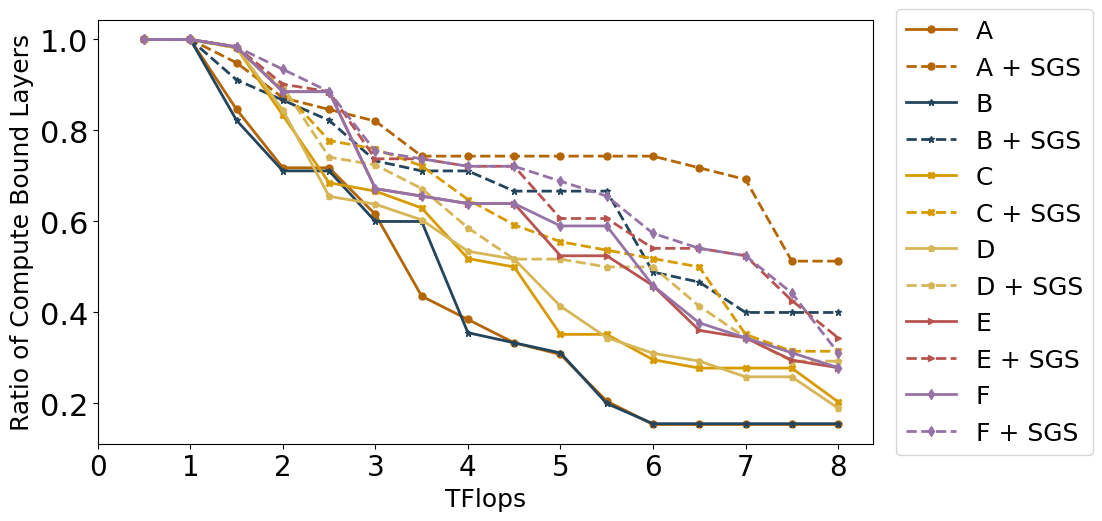

In [14]:
import matplotlib.pyplot as plt
import numpy as np

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list=[[0, 0, 6, 11, 11, 15, 22, 24, 26, 27, 31, 33, 33, 33, 33, 33], [0, 0, 8, 13, 13, 18, 18, 29, 30, 31, 36, 38, 38, 38, 38, 38], [0, 0, 1, 9, 17, 18, 20, 26, 27, 35, 35, 38, 39, 39, 39, 43], [0, 0, 1, 9, 20, 21, 23, 27, 28, 34, 38, 40, 41, 43, 43, 47], [0, 0, 1, 7, 7, 20, 21, 22, 22, 29, 29, 33, 39, 40, 43, 44], [0, 0, 1, 7, 7, 20, 21, 22, 22, 25, 25, 33, 38, 40, 42, 44]]
compute_bound_list=[[39, 39, 33, 28, 28, 24, 17, 15, 13, 12, 8, 6, 6, 6, 6, 6], [45, 45, 37, 32, 32, 27, 27, 16, 15, 14, 9, 7, 7, 7, 7, 7], [54, 54, 53, 45, 37, 36, 34, 28, 27, 19, 19, 16, 15, 15, 15, 11], [58, 58, 57, 49, 38, 37, 35, 31, 30, 24, 20, 18, 17, 15, 15, 11], [61, 61, 60, 54, 54, 41, 40, 39, 39, 32, 32, 28, 22, 21, 18, 17], [61, 61, 60, 54, 54, 41, 40, 39, 39, 36, 36, 28, 23, 21, 19, 17]]

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list_subnet_reused=[[0, 0, 2, 5, 6, 7, 10, 10, 10, 10, 10, 10, 11, 12, 19, 19], [0, 0, 4, 6, 8, 12, 13, 13, 15, 15, 15, 23, 24, 27, 27, 27], [0, 0, 1, 6, 12, 13, 15, 19, 22, 24, 25, 26, 27, 35, 37, 37], [0, 0, 1, 6, 15, 16, 19, 24, 28, 28, 29, 29, 34, 38, 41, 41], [0, 0, 1, 6, 7, 16, 16, 17, 17, 24, 24, 28, 28, 29, 35, 40], [0, 0, 1, 4, 7, 15, 16, 17, 17, 19, 21, 26, 28, 29, 34, 42]]
compute_bound_list_subnet_reused=[[39, 39, 37, 34, 33, 32, 29, 29, 29, 29, 29, 29, 28, 27, 20, 20], [45, 45, 41, 39, 37, 33, 32, 32, 30, 30, 30, 22, 21, 18, 18, 18], [54, 54, 53, 48, 42, 41, 39, 35, 32, 30, 29, 28, 27, 19, 17, 17], [58, 58, 57, 52, 43, 42, 39, 34, 30, 30, 29, 29, 24, 20, 17, 17], [61, 61, 60, 55, 54, 45, 45, 44, 44, 37, 37, 33, 33, 32, 26, 21], [61, 61, 60, 57, 54, 46, 45, 44, 44, 42, 40, 35, 33, 32, 27, 19]]

total_number_model_evaluated = 6
total_number_layer = []
for model_id in range(total_number_model_evaluated):
    total_number_layer.append(memory_bound_list_subnet_reused[model_id][0] + compute_bound_list_subnet_reused[model_id][0])

memory_bound_ratio = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)
memory_bound_ratio_subnet_reuse = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)

for model_id in range(len(memory_bound_list)):
    memory_bound_ratio_model = []
    for data_entry in compute_bound_list[model_id]:
        memory_bound_ratio_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio.append(memory_bound_ratio_model)

for model_id in range(len(memory_bound_list_subnet_reused)):
    memory_bound_ratio_subnet_reuse_model = []
    for data_entry in compute_bound_list_subnet_reused[model_id]:
        memory_bound_ratio_subnet_reuse_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio_subnet_reuse.append(memory_bound_ratio_subnet_reuse_model)

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

for id in range(total_number_model_evaluated):
    ax.plot(tflop_list, memory_bound_ratio[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)
    ax.plot(tflop_list, memory_bound_ratio_subnet_reuse[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2, linestyle='--')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Ratio of Compute Bound Layers", fontsize=SMALL_SIZE)
plt.xlabel("TFlops", fontsize=SMALL_SIZE)
plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["A", "A + SGS", "B", "B + SGS", "C", "C + SGS", "D", "D + SGS", "E", "E + SGS", "F", "F + SGS"], loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('compute_boundness_shifting_across_compute_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

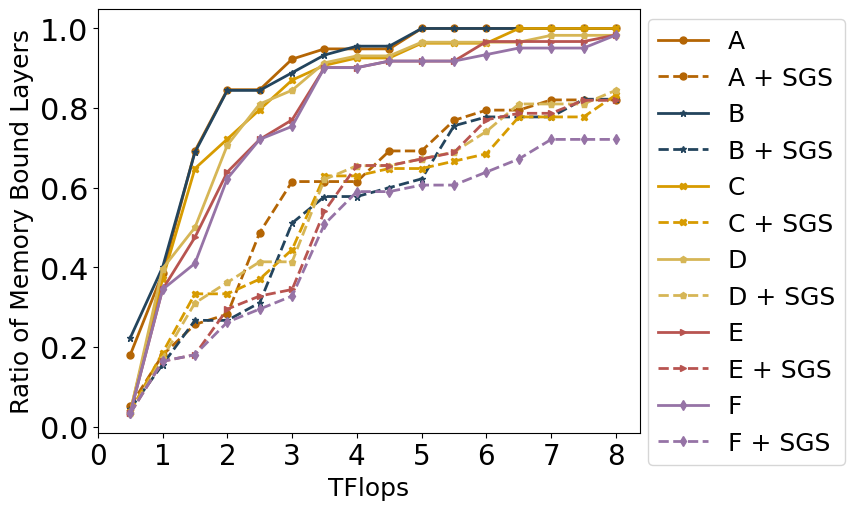

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
# memory_bound_list=[[0, 0, 6, 11, 11, 15, 22, 24, 26, 27, 31, 33, 33, 33, 33, 33], [0, 0, 8, 13, 13, 18, 18, 29, 30, 31, 36, 38, 38, 38, 38, 38], [0, 0, 1, 9, 17, 18, 20, 26, 27, 35, 35, 38, 39, 39, 39, 43], [0, 0, 1, 9, 20, 21, 23, 27, 28, 34, 38, 40, 41, 43, 43, 47], [0, 0, 1, 7, 7, 20, 21, 22, 22, 29, 29, 33, 39, 40, 43, 44], [0, 0, 1, 7, 7, 20, 21, 22, 22, 25, 25, 33, 38, 40, 42, 44]]
# compute_bound_list=[[39, 39, 33, 28, 28, 24, 17, 15, 13, 12, 8, 6, 6, 6, 6, 6], [45, 45, 37, 32, 32, 27, 27, 16, 15, 14, 9, 7, 7, 7, 7, 7], [54, 54, 53, 45, 37, 36, 34, 28, 27, 19, 19, 16, 15, 15, 15, 11], [58, 58, 57, 49, 38, 37, 35, 31, 30, 24, 20, 18, 17, 15, 15, 11], [61, 61, 60, 54, 54, 41, 40, 39, 39, 32, 32, 28, 22, 21, 18, 17], [61, 61, 60, 54, 54, 41, 40, 39, 39, 36, 36, 28, 23, 21, 19, 17]]

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list=[[7, 15, 27, 33, 33, 36, 37, 37, 37, 39, 39, 39, 39, 39, 39, 39], [10, 18, 31, 38, 38, 40, 42, 43, 43, 45, 45, 45, 45, 45, 45, 45], [2, 20, 35, 39, 43, 47, 49, 50, 50, 52, 52, 52, 54, 54, 54, 54], [2, 23, 29, 41, 47, 49, 53, 54, 54, 56, 56, 56, 56, 57, 57, 57], [2, 21, 29, 39, 44, 47, 55, 55, 56, 56, 56, 59, 59, 59, 59, 60], [2, 21, 25, 38, 44, 46, 55, 55, 56, 56, 56, 57, 58, 58, 58, 60]]
compute_bound_list=[[32, 24, 12, 6, 6, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], [35, 27, 14, 7, 7, 5, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0], [52, 34, 19, 15, 11, 7, 5, 4, 4, 2, 2, 2, 0, 0, 0, 0], [56, 35, 29, 17, 11, 9, 5, 4, 4, 2, 2, 2, 2, 1, 1, 1], [59, 40, 32, 22, 17, 14, 6, 6, 5, 5, 5, 2, 2, 2, 2, 1], [59, 40, 36, 23, 17, 15, 6, 6, 5, 5, 5, 4, 3, 3, 3, 1]]

# tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
# memory_bound_list_subnet_reused=[[0, 0, 2, 5, 6, 7, 10, 10, 10, 10, 10, 10, 11, 12, 19, 19], [0, 0, 4, 6, 8, 12, 13, 13, 15, 15, 15, 23, 24, 27, 27, 27], [0, 0, 1, 6, 12, 13, 15, 19, 22, 24, 25, 26, 27, 35, 37, 37], [0, 0, 1, 6, 15, 16, 19, 24, 28, 28, 29, 29, 34, 38, 41, 41], [0, 0, 1, 6, 7, 16, 16, 17, 17, 24, 24, 28, 28, 29, 35, 40], [0, 0, 1, 4, 7, 15, 16, 17, 17, 19, 21, 26, 28, 29, 34, 42]]
# compute_bound_list_subnet_reused=[[39, 39, 37, 34, 33, 32, 29, 29, 29, 29, 29, 29, 28, 27, 20, 20], [45, 45, 41, 39, 37, 33, 32, 32, 30, 30, 30, 22, 21, 18, 18, 18], [54, 54, 53, 48, 42, 41, 39, 35, 32, 30, 29, 28, 27, 19, 17, 17], [58, 58, 57, 52, 43, 42, 39, 34, 30, 30, 29, 29, 24, 20, 17, 17], [61, 61, 60, 55, 54, 45, 45, 44, 44, 37, 37, 33, 33, 32, 26, 21], [61, 61, 60, 57, 54, 46, 45, 44, 44, 42, 40, 35, 33, 32, 27, 19]]

tflop_list = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list_subnet_reused = [[2, 7, 10, 11, 19, 24, 24, 24, 27, 27, 30, 31, 31, 32, 32, 32], [2, 7, 12, 12, 14, 23, 26, 26, 27, 28, 34, 35, 35, 35, 37, 37], [2, 10, 18, 18, 20, 24, 34, 34, 35, 35, 36, 37, 42, 42, 42, 45], [2, 10, 18, 21, 24, 24, 36, 38, 38, 39, 40, 43, 47, 47, 47, 49], [2, 10, 11, 18, 20, 21, 33, 40, 40, 41, 42, 47, 48, 48, 50, 50], [2, 10, 11, 16, 18, 20, 31, 36, 36, 37, 37, 39, 41, 44, 44, 44]]
compute_bound_list_subnet_reused = [[37, 32, 29, 28, 20, 15, 15, 15, 12, 12, 9, 8, 8, 7, 7, 7], [43, 38, 33, 33, 31, 22, 19, 19, 18, 17, 11, 10, 10, 10, 8, 8], [52, 44, 36, 36, 34, 30, 20, 20, 19, 19, 18, 17, 12, 12, 12, 9], [56, 48, 40, 37, 34, 34, 22, 20, 20, 19, 18, 15, 11, 11, 11, 9], [59, 51, 50, 43, 41, 40, 28, 21, 21, 20, 19, 14, 13, 13, 11, 11], [59, 51, 50, 45, 43, 41, 30, 25, 25, 24, 24, 22, 20, 17, 17, 17]]

total_number_model_evaluated = 6
total_number_layer = []
for model_id in range(total_number_model_evaluated):
    total_number_layer.append(memory_bound_list_subnet_reused[model_id][0] + compute_bound_list_subnet_reused[model_id][0])

memory_bound_ratio = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)
memory_bound_ratio_subnet_reuse = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)

for model_id in range(len(memory_bound_list)):
    memory_bound_ratio_model= []
    for data_entry in memory_bound_list[model_id]:
        memory_bound_ratio_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio.append(memory_bound_ratio_model)

for model_id in range(len(memory_bound_list_subnet_reused)):
    memory_bound_ratio_subnet_reuse_model = []
    for data_entry in memory_bound_list_subnet_reused[model_id]:
        memory_bound_ratio_subnet_reuse_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio_subnet_reuse.append(memory_bound_ratio_subnet_reuse_model)

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[7, 5.5])
ax = plt.subplot(111)

for id in range(total_number_model_evaluated):
    ax.plot(tflop_list, memory_bound_ratio[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)
    ax.plot(tflop_list, memory_bound_ratio_subnet_reuse[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2, linestyle='--')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Ratio of Memory Bound Layers", fontsize=SMALL_SIZE)
plt.xlabel("TFlops", fontsize=SMALL_SIZE)
plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["A", "A + SGS", "B", "B + SGS", "C", "C + SGS", "D", "D + SGS", "E", "E + SGS", "F", "F + SGS"], loc='center right', bbox_to_anchor=(1.4, 0.45), fontsize=SMALL_SIZE)
# plt.legend(["model A SR", "model A + SR", "model B SR", "model B + SR", "model C SR", "model C + SR", "model D SR", "model D + SR", "model E w/o SR", "model E + SR", "model F w/o SubNet Reuse", "model F + SubNet Reuse"], loc='center right', bbox_to_anchor=(1.5, 0.5), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('memory_boundness_shifting_across_compute_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Ratio of boundness (Change off-chip bandwidth) for ResNet 50

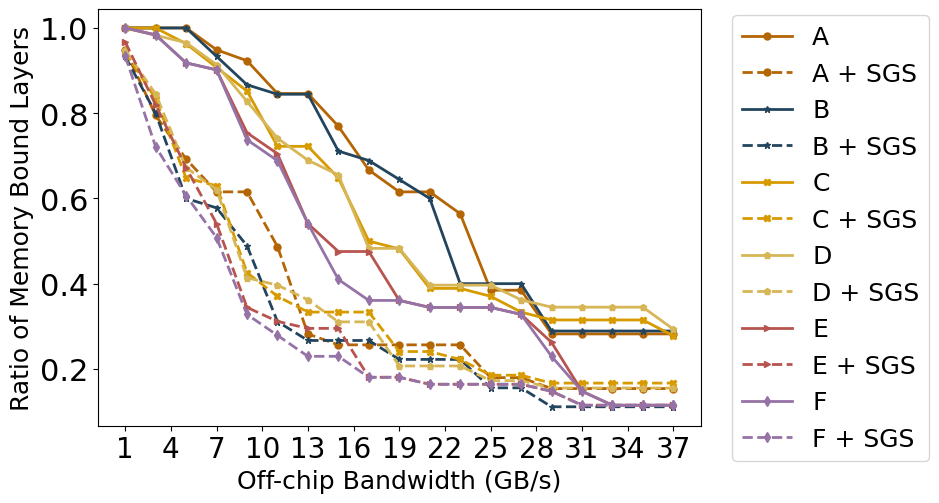

In [143]:
import matplotlib.pyplot as plt
import numpy as np

off_chip_bandwidth_list=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]
memory_bound_list=[[39, 39, 39, 37, 36, 33, 33, 30, 26, 24, 24, 22, 15, 15, 11, 11, 11, 11, 11], [45, 45, 45, 42, 39, 38, 38, 32, 31, 29, 27, 18, 18, 18, 13, 13, 13, 13, 13], [54, 54, 52, 49, 46, 39, 39, 35, 27, 26, 21, 21, 20, 18, 17, 17, 17, 17, 15], [58, 57, 56, 53, 48, 43, 40, 38, 28, 28, 23, 23, 23, 21, 20, 20, 20, 20, 17], [61, 60, 56, 55, 46, 43, 33, 29, 29, 22, 21, 21, 21, 20, 16, 9, 7, 7, 7], [61, 60, 56, 55, 45, 42, 33, 25, 22, 22, 21, 21, 21, 20, 14, 9, 7, 7, 7]]
compute_bound_list=[[0, 0, 0, 2, 3, 6, 6, 9, 13, 15, 15, 17, 24, 24, 28, 28, 28, 28, 28], [0, 0, 0, 3, 6, 7, 7, 13, 14, 16, 18, 27, 27, 27, 32, 32, 32, 32, 32], [0, 0, 2, 5, 8, 15, 15, 19, 27, 28, 33, 33, 34, 36, 37, 37, 37, 37, 39], [0, 1, 2, 5, 10, 15, 18, 20, 30, 30, 35, 35, 35, 37, 38, 38, 38, 38, 41], [0, 1, 5, 6, 15, 18, 28, 32, 32, 39, 40, 40, 40, 41, 45, 52, 54, 54, 54], [0, 1, 5, 6, 16, 19, 28, 36, 39, 39, 40, 40, 40, 41, 47, 52, 54, 54, 54]]

off_chip_bandwidth_list=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]
memory_bound_list_subnet_reused=[[37, 31, 27, 24, 24, 19, 11, 10, 10, 10, 10, 10, 7, 7, 6, 6, 6, 6, 6], [42, 36, 27, 26, 22, 14, 12, 12, 12, 10, 10, 10, 7, 7, 5, 5, 5, 5, 5], [51, 45, 35, 34, 23, 20, 18, 18, 18, 13, 13, 12, 10, 10, 9, 9, 9, 9, 9], [55, 49, 39, 36, 24, 23, 21, 18, 18, 12, 12, 12, 10, 10, 9, 9, 9, 9, 9], [59, 50, 41, 33, 21, 19, 18, 18, 11, 11, 10, 10, 10, 10, 9, 7, 7, 7, 7], [57, 44, 37, 31, 20, 17, 14, 14, 11, 11, 10, 10, 10, 10, 9, 7, 7, 7, 7]]
compute_bound_list_subnet_reused=[[2, 8, 12, 15, 15, 20, 28, 29, 29, 29, 29, 29, 32, 32, 33, 33, 33, 33, 33], [3, 9, 18, 19, 23, 31, 33, 33, 33, 35, 35, 35, 38, 38, 40, 40, 40, 40, 40], [3, 9, 19, 20, 31, 34, 36, 36, 36, 41, 41, 42, 44, 44, 45, 45, 45, 45, 45], [3, 9, 19, 22, 34, 35, 37, 40, 40, 46, 46, 46, 48, 48, 49, 49, 49, 49, 49], [2, 11, 20, 28, 40, 42, 43, 43, 50, 50, 51, 51, 51, 51, 52, 54, 54, 54, 54], [4, 17, 24, 30, 41, 44, 47, 47, 50, 50, 51, 51, 51, 51, 52, 54, 54, 54, 54]]

total_number_model_evaluated = 6
total_number_layer = []
for model_id in range(total_number_model_evaluated):
    total_number_layer.append(memory_bound_list_subnet_reused[model_id][0] + compute_bound_list_subnet_reused[model_id][0])

memory_bound_ratio = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)
memory_bound_ratio_subnet_reuse = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)

for model_id in range(len(memory_bound_list)):
    memory_bound_ratio_model= []
    for data_entry in memory_bound_list[model_id]:
        memory_bound_ratio_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio.append(memory_bound_ratio_model)

for model_id in range(len(memory_bound_list_subnet_reused)):
    memory_bound_ratio_subnet_reuse_model = []
    for data_entry in memory_bound_list_subnet_reused[model_id]:
        memory_bound_ratio_subnet_reuse_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio_subnet_reuse.append(memory_bound_ratio_subnet_reuse_model)

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10, 5.5])
ax = plt.subplot(111)

for id in range(total_number_model_evaluated):
    ax.plot(off_chip_bandwidth_list, memory_bound_ratio[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)
    ax.plot(off_chip_bandwidth_list, memory_bound_ratio_subnet_reuse[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2, linestyle='--')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Ratio of Memory Bound Layers", fontsize=SMALL_SIZE)
plt.xlabel("Off-chip Bandwidth (GB/s)", fontsize=SMALL_SIZE)
plt.xticks([i for i in range(off_chip_bandwidth_list[0],off_chip_bandwidth_list[-1]+1, 3)], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["A", "A + SGS", "B", "B + SGS", "C", "C + SGS", "D", "D + SGS", "E", "E + SGS", "F", "F + SGS"], loc='center right', bbox_to_anchor=(1.4, 0.45), fontsize=SMALL_SIZE)
# plt.legend(["model A SR", "model A + SR", "model B SR", "model B + SR", "model C SR", "model C + SR", "model D SR", "model D + SR", "model E w/o SR", "model E + SR", "model F w/o SubNet Reuse", "model F + SubNet Reuse"], loc='center right', bbox_to_anchor=(1.5, 0.5), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('memory_boundness_shifting_across_off_chip_bandwidth_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Boundess shifting across off-chip memory bandwidth for MobileNet V3

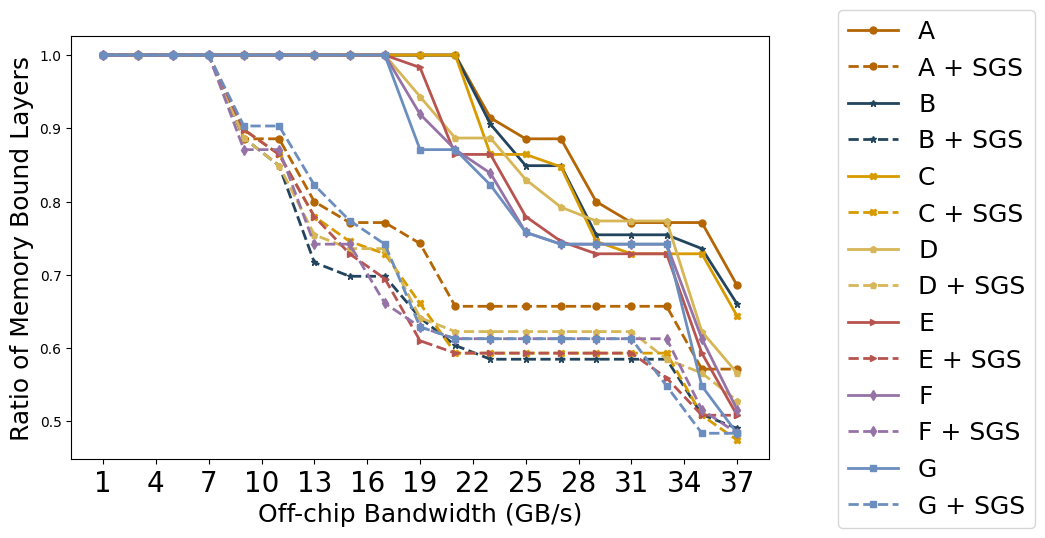

In [1]:
import matplotlib.pyplot as plt
import numpy as np

off_chip_bandwidth_list=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]
memory_bound_list=[[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 32, 31, 31, 28, 27, 27, 27, 24], [53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 48, 45, 45, 40, 40, 40, 39, 35], [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 51, 51, 50, 44, 43, 43, 43, 38], [53, 53, 53, 53, 53, 53, 53, 53, 53, 50, 47, 47, 44, 42, 41, 41, 41, 33, 30], [59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 51, 51, 46, 44, 43, 43, 43, 35, 30], [62, 62, 62, 62, 62, 62, 62, 62, 62, 57, 54, 52, 47, 46, 46, 46, 46, 38, 32], [62, 62, 62, 62, 62, 62, 62, 62, 62, 54, 54, 51, 47, 46, 46, 46, 46, 34, 30]]
compute_bound_list=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 7, 8, 8, 8, 11], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 8, 13, 13, 13, 14, 18], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 9, 15, 16, 16, 16, 21], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 6, 9, 11, 12, 12, 12, 20, 23], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 8, 13, 15, 16, 16, 16, 24, 29], [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 10, 15, 16, 16, 16, 16, 24, 30], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 11, 15, 16, 16, 16, 16, 28, 32]]

off_chip_bandwidth_list=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]
memory_bound_list_subnet_reused=[[35, 35, 35, 35, 31, 31, 28, 27, 27, 26, 23, 23, 23, 23, 23, 23, 23, 20, 20], [53, 53, 53, 53, 47, 45, 38, 37, 37, 34, 32, 31, 31, 31, 31, 31, 31, 27, 26], [59, 59, 59, 59, 53, 51, 46, 44, 43, 39, 35, 35, 35, 35, 35, 35, 35, 30, 28], [53, 53, 53, 53, 47, 45, 40, 39, 39, 34, 33, 33, 33, 33, 33, 33, 31, 30, 28], [59, 59, 59, 59, 53, 51, 46, 43, 41, 36, 35, 35, 35, 35, 35, 35, 33, 30, 30], [62, 62, 62, 62, 54, 54, 46, 46, 41, 39, 38, 38, 38, 38, 38, 38, 38, 32, 30], [62, 62, 62, 62, 56, 56, 51, 48, 46, 39, 38, 38, 38, 38, 38, 38, 34, 30, 30]]
compute_bound_list_subnet_reused=[[0, 0, 0, 0, 4, 4, 7, 8, 8, 9, 12, 12, 12, 12, 12, 12, 12, 15, 15], [0, 0, 0, 0, 6, 8, 15, 16, 16, 19, 21, 22, 22, 22, 22, 22, 22, 26, 27], [0, 0, 0, 0, 6, 8, 13, 15, 16, 20, 24, 24, 24, 24, 24, 24, 24, 29, 31], [0, 0, 0, 0, 6, 8, 13, 14, 14, 19, 20, 20, 20, 20, 20, 20, 22, 23, 25], [0, 0, 0, 0, 6, 8, 13, 16, 18, 23, 24, 24, 24, 24, 24, 24, 26, 29, 29], [0, 0, 0, 0, 8, 8, 16, 16, 21, 23, 24, 24, 24, 24, 24, 24, 24, 30, 32], [0, 0, 0, 0, 6, 6, 11, 14, 16, 23, 24, 24, 24, 24, 24, 24, 28, 32, 32]]

total_number_model_evaluated = 7
total_number_layer = []
for model_id in range(total_number_model_evaluated):
    total_number_layer.append(memory_bound_list_subnet_reused[model_id][0] + compute_bound_list_subnet_reused[model_id][0])

memory_bound_ratio = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)
memory_bound_ratio_subnet_reuse = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)

for model_id in range(len(memory_bound_list)):
    memory_bound_ratio_model = []
    for data_entry in memory_bound_list[model_id]:
        memory_bound_ratio_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio.append(memory_bound_ratio_model)

for model_id in range(len(memory_bound_list_subnet_reused)):
    memory_bound_ratio_subnet_reuse_model = []
    for data_entry in memory_bound_list_subnet_reused[model_id]:
        memory_bound_ratio_subnet_reuse_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio_subnet_reuse.append(memory_bound_ratio_subnet_reuse_model)

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[9, 5.5])
ax = plt.subplot(111)

for id in range(total_number_model_evaluated):
    ax.plot(off_chip_bandwidth_list, memory_bound_ratio[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)
    ax.plot(off_chip_bandwidth_list, memory_bound_ratio_subnet_reuse[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2, linestyle='--')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Ratio of Memory Bound Layers", fontsize=SMALL_SIZE)
plt.xlabel("Off-chip Bandwidth (GB/s)", fontsize=SMALL_SIZE)
plt.xticks([i for i in range(off_chip_bandwidth_list[0], off_chip_bandwidth_list[-1]+1, 3)], fontsize=MEDIUM_SIZE)
# plt.xticks(off_chip_bandwidth_list, [str(i) for i in off_chip_bandwidth_list], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["A", "A + SGS", "B", "B + SGS", "C", "C + SGS", "D", "D + SGS", "E", "E + SGS", "F", "F + SGS", "G", "G + SGS"], loc='center right', bbox_to_anchor=(1.4, 0.45), fontsize=SMALL_SIZE)
# plt.legend(["model A w/o SubNet Reuse", "model A + SubNet Reuse", "model B w/o SubNet Reuse", "model B + SubNet Reuse", "model C w/o SubNet Reuse", "model C + SubNet Reuse", "model D w/o SubNet Reuse", "model D with SubNet Reuse", "model E w/o SubNet Reuse", "model E with SubNet Reuse", "model F w/o SubNet Reuse", "model F with SubNet Reuse", "model G w/o SubNet Reuse", "model G with SubNet Reuse"], loc='center right', bbox_to_anchor=(1.5, 0.5), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('memory_boundness_shifting_across_off_chip_bandwidth_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Boundess shifting across compute capability for MobileNet V3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list=[[13, 14, 20, 25, 29, 33, 34, 37, 37, 37, 37, 37, 37, 38, 42, 42], [23, 24, 29, 38, 48, 53, 56, 61, 61, 61, 61, 61, 61, 63, 69, 69], [25, 26, 31, 40, 51, 58, 59, 67, 67, 67, 67, 67, 67, 69, 76, 76], [21, 22, 30, 31, 44, 45, 53, 53, 59, 59, 59, 59, 59, 60, 60, 60], [23, 24, 31, 32, 46, 47, 57, 59, 65, 65, 65, 65, 65, 66, 66, 66], [25, 26, 31, 34, 50, 50, 59, 61, 66, 69, 69, 69, 69, 70, 70, 70], [25, 26, 33, 34, 50, 50, 58, 61, 64, 69, 69, 69, 69, 70, 70, 70]]
compute_bound_list=[[34, 33, 27, 22, 18, 14, 13, 10, 10, 10, 10, 10, 10, 9, 5, 5], [52, 51, 46, 37, 27, 22, 19, 14, 14, 14, 14, 14, 14, 12, 6, 6], [58, 57, 52, 43, 32, 25, 24, 16, 16, 16, 16, 16, 16, 14, 7, 7], [52, 51, 43, 42, 29, 28, 20, 20, 14, 14, 14, 14, 14, 13, 13, 13], [58, 57, 50, 49, 35, 34, 24, 22, 16, 16, 16, 16, 16, 15, 15, 15], [61, 60, 55, 52, 36, 36, 27, 25, 20, 17, 17, 17, 17, 16, 16, 16], [61, 60, 53, 52, 36, 36, 28, 25, 22, 17, 17, 17, 17, 16, 16, 16]]

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list_subnet_reused=[[0, 1, 9, 10, 15, 15, 17, 18, 19, 21, 23, 24, 24, 29, 30, 30], [14, 15, 20, 25, 35, 37, 39, 41, 43, 45, 48, 48, 48, 54, 57, 57], [6, 7, 14, 15, 27, 29, 29, 30, 33, 35, 42, 44, 44, 51, 53, 53], [4, 5, 12, 13, 17, 19, 19, 20, 22, 22, 31, 33, 33, 39, 40, 40], [6, 7, 14, 15, 19, 21, 25, 26, 30, 32, 37, 37, 37, 41, 42, 44], [10, 11, 16, 19, 29, 29, 29, 30, 32, 34, 38, 41, 43, 47, 48, 50], [10, 11, 16, 19, 27, 31, 31, 32, 34, 39, 42, 45, 45, 52, 57, 57]]
compute_bound_list_subnet_reused=[[47, 46, 38, 37, 32, 32, 30, 29, 28, 26, 24, 23, 23, 18, 17, 17], [61, 60, 55, 50, 40, 38, 36, 34, 32, 30, 27, 27, 27, 21, 18, 18], [77, 76, 69, 68, 56, 54, 54, 53, 50, 48, 41, 39, 39, 32, 30, 30], [69, 68, 61, 60, 56, 54, 54, 53, 51, 51, 42, 40, 40, 34, 33, 33], [75, 74, 67, 66, 62, 60, 56, 55, 51, 49, 44, 44, 44, 40, 39, 37], [76, 75, 70, 67, 57, 57, 57, 56, 54, 52, 48, 45, 43, 39, 38, 36], [76, 75, 70, 67, 59, 55, 55, 54, 52, 47, 44, 41, 41, 34, 29, 29]]

total_number_model_evaluated = 7
total_number_layer = []
for model_id in range(total_number_model_evaluated):
    total_number_layer.append(memory_bound_list_subnet_reused[model_id][0] + compute_bound_list_subnet_reused[model_id][0])

memory_bound_ratio = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)
memory_bound_ratio_subnet_reuse = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)

for model_id in range(len(compute_bound_list)):
    memory_bound_ratio_model = []
    for data_entry in compute_bound_list[model_id]:
        memory_bound_ratio_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio.append(memory_bound_ratio_model)

for model_id in range(len(compute_bound_list_subnet_reused)):
    memory_bound_ratio_subnet_reuse_model = []
    for data_entry in compute_bound_list_subnet_reused[model_id]:
        memory_bound_ratio_subnet_reuse_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio_subnet_reuse.append(memory_bound_ratio_subnet_reuse_model)

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

for id in range(total_number_model_evaluated):
    ax.plot(tflop_list, memory_bound_ratio[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)
    ax.plot(tflop_list, memory_bound_ratio_subnet_reuse[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2, linestyle='--')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Ratio of Compute Bound Layers", fontsize=SMALL_SIZE)
plt.xlabel("TFlops", fontsize=SMALL_SIZE)
plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.xticks(tflop_list, [str(i) for i in tflop_list], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["A", "A + SR", "B", "B + SR", "C", "C + SR", "D", "D + SR", "E", "E + SR", "F", "F + SR", "G", "G + SR"], loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=SMALL_SIZE)
# plt.legend(["model A w/o SubNet Reuse", "model A + SubNet Reuse", "model B w/o SubNet Reuse", "model B + SubNet Reuse", "model C w/o SubNet Reuse", "model C + SubNet Reuse", "model D w/o SubNet Reuse", "model D with SubNet Reuse", "model E w/o SubNet Reuse", "model E with SubNet Reuse", "model F w/o SubNet Reuse", "model F with SubNet Reuse", "model G w/o SubNet Reuse", "model G with SubNet Reuse"], loc='center right', bbox_to_anchor=(1.5, 0.5), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('compute_boundness_shifting_across_compute_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

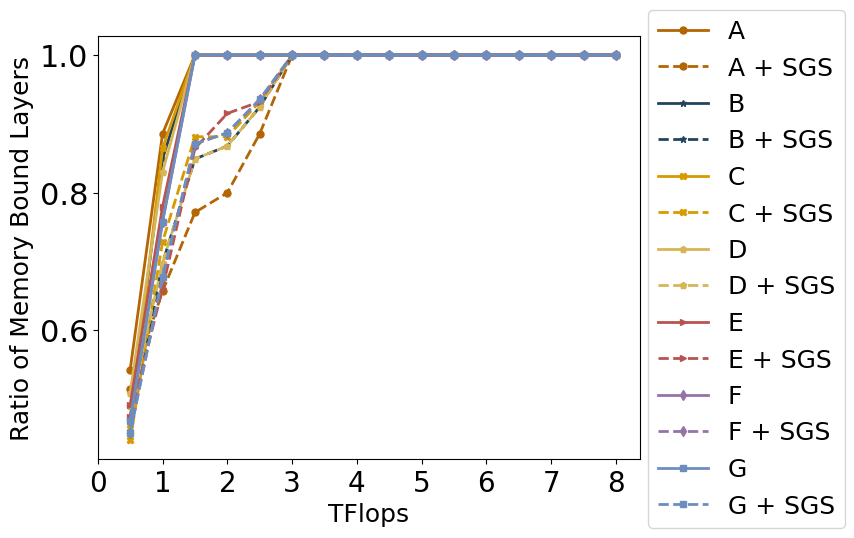

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
# memory_bound_list=[[13, 14, 20, 25, 29, 33, 34, 37, 37, 37, 37, 37, 37, 38, 42, 42], [23, 24, 29, 38, 48, 53, 56, 61, 61, 61, 61, 61, 61, 63, 69, 69], [25, 26, 31, 40, 51, 58, 59, 67, 67, 67, 67, 67, 67, 69, 76, 76], [21, 22, 30, 31, 44, 45, 53, 53, 59, 59, 59, 59, 59, 60, 60, 60], [23, 24, 31, 32, 46, 47, 57, 59, 65, 65, 65, 65, 65, 66, 66, 66], [25, 26, 31, 34, 50, 50, 59, 61, 66, 69, 69, 69, 69, 70, 70, 70], [25, 26, 33, 34, 50, 50, 58, 61, 64, 69, 69, 69, 69, 70, 70, 70]]
# compute_bound_list=[[34, 33, 27, 22, 18, 14, 13, 10, 10, 10, 10, 10, 10, 9, 5, 5], [52, 51, 46, 37, 27, 22, 19, 14, 14, 14, 14, 14, 14, 12, 6, 6], [58, 57, 52, 43, 32, 25, 24, 16, 16, 16, 16, 16, 16, 14, 7, 7], [52, 51, 43, 42, 29, 28, 20, 20, 14, 14, 14, 14, 14, 13, 13, 13], [58, 57, 50, 49, 35, 34, 24, 22, 16, 16, 16, 16, 16, 15, 15, 15], [61, 60, 55, 52, 36, 36, 27, 25, 20, 17, 17, 17, 17, 16, 16, 16], [61, 60, 53, 52, 36, 36, 28, 25, 22, 17, 17, 17, 17, 16, 16, 16]]

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list=[[19, 31, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35], [25, 45, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53], [27, 51, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59], [27, 44, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53], [29, 46, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59], [29, 47, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62], [29, 47, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]]
compute_bound_list=[[16, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [28, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [32, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [26, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [30, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [33, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [33, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
# memory_bound_list_subnet_reused=[[0, 1, 9, 10, 15, 15, 17, 18, 19, 21, 23, 24, 24, 29, 30, 30], [14, 15, 20, 25, 35, 37, 39, 41, 43, 45, 48, 48, 48, 54, 57, 57], [6, 7, 14, 15, 27, 29, 29, 30, 33, 35, 42, 44, 44, 51, 53, 53], [4, 5, 12, 13, 17, 19, 19, 20, 22, 22, 31, 33, 33, 39, 40, 40], [6, 7, 14, 15, 19, 21, 25, 26, 30, 32, 37, 37, 37, 41, 42, 44], [10, 11, 16, 19, 29, 29, 29, 30, 32, 34, 38, 41, 43, 47, 48, 50], [10, 11, 16, 19, 27, 31, 31, 32, 34, 39, 42, 45, 45, 52, 57, 57]]
# compute_bound_list_subnet_reused=[[47, 46, 38, 37, 32, 32, 30, 29, 28, 26, 24, 23, 23, 18, 17, 17], [61, 60, 55, 50, 40, 38, 36, 34, 32, 30, 27, 27, 27, 21, 18, 18], [77, 76, 69, 68, 56, 54, 54, 53, 50, 48, 41, 39, 39, 32, 30, 30], [69, 68, 61, 60, 56, 54, 54, 53, 51, 51, 42, 40, 40, 34, 33, 33], [75, 74, 67, 66, 62, 60, 56, 55, 51, 49, 44, 44, 44, 40, 39, 37], [76, 75, 70, 67, 57, 57, 57, 56, 54, 52, 48, 45, 43, 39, 38, 36], [76, 75, 70, 67, 59, 55, 55, 54, 52, 47, 44, 41, 41, 34, 29, 29]]

tflop_list=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
memory_bound_list_subnet_reused=[[18, 23, 27, 28, 31, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35], [24, 37, 45, 46, 49, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53], [26, 43, 52, 52, 55, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59], [26, 37, 45, 46, 49, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53], [28, 39, 51, 54, 55, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59], [28, 42, 54, 55, 58, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62], [28, 42, 54, 55, 58, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]]
compute_bound_list_subnet_reused=[[17, 12, 8, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [29, 16, 8, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [33, 16, 7, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [27, 16, 8, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [31, 20, 8, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [34, 20, 8, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [34, 20, 8, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

total_number_model_evaluated = 7
total_number_layer = []
for model_id in range(total_number_model_evaluated):
    total_number_layer.append(memory_bound_list_subnet_reused[model_id][0] + compute_bound_list_subnet_reused[model_id][0])

memory_bound_ratio = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)
memory_bound_ratio_subnet_reuse = [] # np.array(memory_bound_list_subnet_reused)/np.array(total_number_layer)

for model_id in range(len(memory_bound_list)):
    memory_bound_ratio_model = []
    for data_entry in memory_bound_list[model_id]:
        memory_bound_ratio_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio.append(memory_bound_ratio_model)

for model_id in range(len(memory_bound_list_subnet_reused)):
    memory_bound_ratio_subnet_reuse_model = []
    for data_entry in memory_bound_list_subnet_reused[model_id]:
        memory_bound_ratio_subnet_reuse_model.append(data_entry/total_number_layer[model_id])
    memory_bound_ratio_subnet_reuse.append(memory_bound_ratio_subnet_reuse_model)

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

for id in range(total_number_model_evaluated):
    ax.plot(tflop_list, memory_bound_ratio[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)
    ax.plot(tflop_list, memory_bound_ratio_subnet_reuse[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2, linestyle='--')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Ratio of Memory Bound Layers", fontsize=SMALL_SIZE)
plt.xlabel("TFlops", fontsize=SMALL_SIZE)
plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.xticks(tflop_list, [str(i) for i in tflop_list], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6 ])
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["A", "A + SGS", "B", "B + SGS", "C", "C + SGS", "D", "D + SGS", "E", "E + SGS", "F", "F + SGS", "G", "G + SGS"], loc='center right', bbox_to_anchor=(1.4, 0.45), fontsize=SMALL_SIZE)
# plt.legend(["model A w/o SubNet Reuse", "model A + SubNet Reuse", "model B w/o SubNet Reuse", "model B + SubNet Reuse", "model C w/o SubNet Reuse", "model C + SubNet Reuse", "model D w/o SubNet Reuse", "model D with SubNet Reuse", "model E w/o SubNet Reuse", "model E with SubNet Reuse", "model F w/o SubNet Reuse", "model F with SubNet Reuse", "model G w/o SubNet Reuse", "model G with SubNet Reuse"], loc='center right', bbox_to_anchor=(1.5, 0.5), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('memory_boundness_shifting_across_compute_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Latency Table

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_id=[0, 1, 2, 3, 4, 5, 6]
latency_table_edge_res50 = [[0.4313648, 0.3109372229, 0.3109372229, 0.3109372229, 0.3109372229, 0.3109372229, 0.3109372229],
[0.6240256, 0.4939870057, 0.4305932137, 0.4305932137, 0.4305932137, 0.4305932137, 0.4305932137],
[1.10021867, 0.9701617166, 0.8878333783, 0.873486608, 0.873486608, 0.8782882354, 0.873486608],
[1.463268507, 1.336667993, 1.249420176, 1.195633863, 1.120699664, 1.130008574, 1.136878023],
[1.901589769, 1.792874948, 1.749145832, 1.746632388, 1.704757563, 1.701936315, 1.702079163],
[2.06457173, 1.956687748, 1.876824379, 1.847865275, 1.800702221, 1.827479492, 1.798846331]]

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["Nothing", "SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

total_number_model_evaluated = 6
for id in range(total_number_model_evaluated):
    ax.plot(model_id, latency_table_edge_res50[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("Model ID ResNet 50 on edge", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F"], loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('resnet_50_on_edge.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_id=[0, 1, 2, 3, 4, 5, 6]
latency_table_cloud_res50 = [[0.06928975125, 0.03796598723, 0.03801645123, 0.03796598723, 0.03798240323, 0.03798240323, 0.03798240323],
[0.09952496125, 0.06606086723, 0.04931471067, 0.04931471067, 0.04935575067, 0.04935575067, 0.04935575067],
[0.16327155, 0.130670311, 0.112944871, 0.099201271, 0.099242311, 0.106629815, 0.099242311],
[0.21708673, 0.184056638, 0.166013806, 0.148779102, 0.1222368126, 0.1374813833, 0.1322077033],
[0.2503580516, 0.2221020768, 0.2069047916, 0.199639051, 0.1862186078, 0.183470487, 0.183496023],
[0.2791199412, 0.2508394377, 0.2333132298, 0.2176967658, 0.2029064802, 0.2096616955, 0.1919871653]]

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["Nothing", "SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

total_number_model_evaluated = 6
for id in range(total_number_model_evaluated):
    ax.plot(model_id, latency_table_cloud_res50[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("Model ID ResNet 50 on cloud", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F"], loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('resnet_50_on_cloud.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_id=[0, 1, 2, 3, 4, 5, 6, 7]
latency_table_edge_res50 = [[0.329896, 0.2196993821, 0.2199455398, 0.2196993821, 0.2203141387, 0.2220359634, 0.2203141387, 0.2196993821],
[0.4540221714, 0.3440463032, 0.2899099482, 0.2899099482, 0.2962894613, 0.2922465295, 0.2905661562, 0.2899099482],
[0.4870422857, 0.375895149, 0.3217620899, 0.3134902766, 0.3247971596, 0.3166792693, 0.319005251, 0.3141050331],
[0.6005586286, 0.493048237, 0.4451505752, 0.4418382872, 0.4350653364, 0.4420723284, 0.4390529638, 0.4350653364],
[0.6306557714, 0.5251784823, 0.4726624625, 0.4652124716, 0.4730745958, 0.4623631642, 0.4680600785, 0.4642074339],
[0.7183369143, 0.6114730964, 0.5580655147, 0.5549381638, 0.5565254941, 0.5558264998, 0.5432489158, 0.5448627581],
[0.8059104, 0.6968425044, 0.6428572975, 0.6351033295, 0.6387002438, 0.6366599901, 0.6287818804, 0.6033661821]]

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["Nothing", "SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F", "SubNet G"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

total_number_model_evaluated = 6
for id in range(total_number_model_evaluated):
    ax.plot(model_id, latency_table_edge_res50[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("Model ID mbv3 on edge", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F", "SubNet G"], loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('mbv3_on_edge.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_id=[0, 1, 2, 3, 4, 5, 6, 7]
latency_table_cloud_res50 = [[0.0577318, 0.037141158, 0.037185162, 0.037141158, 0.037251054, 0.037732324, 0.037251054, 0.037141158],
[0.07945388, 0.058909066, 0.048523894, 0.048523894, 0.049752396, 0.04911506, 0.0486412, 0.048523894],
[0.0852324, 0.064478206, 0.054218206, 0.052469256, 0.054663984, 0.053212802, 0.053725384, 0.052579152],
[0.10509776, 0.084519126, 0.07513058, 0.074414432, 0.072852252, 0.074631982, 0.073689126, 0.072852252],
[0.11036476, 0.090274084, 0.079869988, 0.078238458, 0.07990719, 0.077729106, 0.07904725, 0.078058794],
[0.12570896, 0.105139446, 0.094646696, 0.09408764, 0.094187238, 0.094422154, 0.091371476, 0.091659972],
[0.14103432, 0.120079486, 0.109582974, 0.107897104, 0.108444076, 0.10835109, 0.10671538, 0.101060068]]

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["Nothing", "SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F", "SubNet G"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# create data
fig = plt.figure(figsize=[10,5.5])
ax = plt.subplot(111)

total_number_model_evaluated = 6
for id in range(total_number_model_evaluated):
    ax.plot(model_id, latency_table_cloud_res50[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=5, color=color_list[id], linewidth=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Latency (ms)", fontsize=SMALL_SIZE)
plt.xlabel("Model ID mbv3 on cloud", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(["SubNet A", "SubNet B", "SubNet C", "SubNet D", "SubNet E", "SubNet F", "SubNet G"], loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=SMALL_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('mbv3_on_cloud.pdf', bbox_inches="tight", transparent=True) 
plt.show()

/tmp/ipykernel_44930/1975102497.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


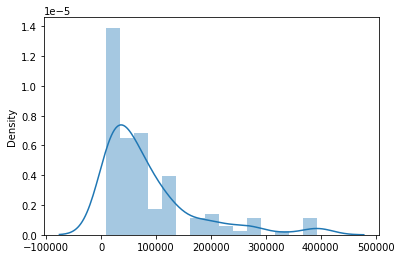

In [1]:
import pandas as pd
import numpy as np

d = np.array([230400, 172800, 72000, 57600, 57600, 72000, 273600, 57600, 57600, 273600, 115200, 28800, 68400, 136800, 28800, 28800, 136800, 57600, 14400, 34200, 66600, 14400, 14400, 66600, 14400, 14400, 66600, 17100, 17100, 66600, 14400, 14400, 66600, 33300, 8325, 16650, 41175, 10350, 10350, 230400, 172800, 115200, 57600, 57600, 115200, 273600, 72000, 72000, 273600, 115200, 28800, 68400, 136800, 36000, 36000, 136800, 28800, 28800, 136800, 64800, 16200, 34200, 81900, 16200, 16200, 81900, 21600, 21600, 81900, 16200, 16200, 81900, 16200, 16200, 81900, 41400, 10350, 20475, 41175, 10350, 10350, 41175, 10350, 10350, 331776, 248832, 165888, 103680, 103680, 165888, 393984, 103680, 103680, 393984, 82944, 82944, 393984, 82944, 82944, 393984, 207360, 51840, 98496, 196992, 51840, 51840, 196992, 51840, 51840, 196992, 41472, 41472, 196992, 93312, 23328, 49248, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 73872, 18468, 29484, 73872, 18468, 18468, 73872, 18468, 18468, 230400, 172800, 72000, 57600, 57600, 72000, 273600, 57600, 57600, 273600, 115200, 28800, 68400, 136800, 28800, 28800, 136800, 57600, 14400, 34200, 66600, 14400, 14400, 66600, 14400, 14400, 66600, 17100, 17100, 66600, 14400, 14400, 66600, 33300, 8325, 16650, 41175, 10350, 10350, 230400, 172800, 115200, 57600, 57600, 115200, 273600, 72000, 72000, 273600, 115200, 28800, 68400, 136800, 36000, 36000, 136800, 28800, 28800, 136800, 64800, 16200, 34200, 81900, 16200, 16200, 81900, 21600, 21600, 81900, 16200, 16200, 81900, 16200, 16200, 81900, 41400, 10350, 20475, 41175, 10350, 10350, 41175, 10350, 10350, 331776, 248832, 165888, 103680, 103680, 165888, 393984, 103680, 103680, 393984, 82944, 82944, 393984, 82944, 82944, 393984, 207360, 51840, 98496, 196992, 51840, 51840, 196992, 51840, 51840, 196992, 41472, 41472, 196992, 93312, 23328, 49248, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 31104, 31104, 117936, 73872, 18468, 29484, 73872, 18468, 18468, 73872])
s = pd.DataFrame(d)

import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

sns.distplot(d)
# in the next version of the distplot function, one would have to write:
# sns.distplot(data=df, x="sepal_length", kind='hist') # note that 'kind' is 'hist' by default
plt.show()

# Latency breakdown in pareto-frontier -- for ResNet 50

ratio of off-chip memory energy/overall energy: 1.0
ratio of off-chip memory energy/overall energy (with SubNet Reuse): 0.9818971883634741
energy saving ratio range is [0.14009954385396983,  0.5258856772950884]


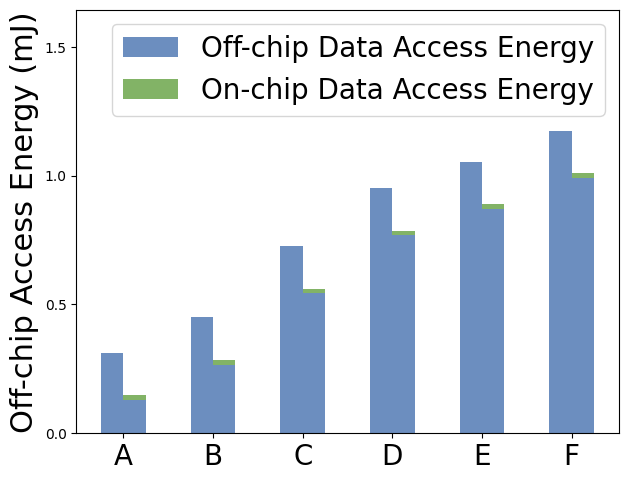

In [1]:
import matplotlib.pyplot as plt
import numpy as np

compute_energy = [1.78829968, 2.60790928, 5.257399910400005, 7.000312089600002, 10.822272652799997, 11.522859129599995]
off_memory_energy = [0.31295032800000006, 0.4496628799999999, 0.7263320879999999, 0.951175672, 1.054554968, 1.1741976560000005]
on_memory_energy = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
overall_evergy = []
for i in range(len(compute_energy)):
    overall_evergy.append(off_memory_energy[i]+on_memory_energy[i])
    # overall_evergy.append(compute_energy[i]+off_memory_energy[i]+on_memory_energy[i])

compute_energy_subnet_reuse = [1.78829968, 2.60790928, 5.257399910400005, 7.000312089600002, 10.822272652799997, 11.522859129599995]
off_memory_energy_subnet_reuse = [0.13008799999999998, 0.266906536, 0.5434697599999999, 0.7683928320000002, 0.8717721279999997, 0.9914148159999998]
on_memory_energy_subnet_reuse = [0.0182862328, 0.0182756344, 0.0182862328, 0.018278284000000002, 0.018278284000000002, 0.018278284000000002]
overall_evergy_subnet_reuse = []
for i in range(len(compute_energy_subnet_reuse)):
    overall_evergy_subnet_reuse.append(off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])
    # overall_evergy_subnet_reuse.append(compute_energy_subnet_reuse[i]+off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])

print(f"ratio of off-chip memory energy/overall energy: {np.max(np.array(off_memory_energy)/np.array(overall_evergy))}")
print(f"ratio of off-chip memory energy/overall energy (with SubNet Reuse): {np.max(np.array(off_memory_energy_subnet_reuse)/np.array(overall_evergy_subnet_reuse))}")

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(compute_energy_subnet_reuse))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

acu_matrix = []
sum_matrix = [off_memory_energy, on_memory_energy]
# sum_matrix = [compute_energy, off_memory_energy, on_memory_energy]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
# sum_matrix_subnet_reuse = [compute_energy_subnet_reuse, off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"energy saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Off-chip Access Energy (mJ)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.4*np.max(sum_matrix)])

plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='best', fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('energy_breakdown_image_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

ratio of off-chip memory energy/overall energy: 1.0
ratio of off-chip memory energy/overall energy (with SubNet Reuse): 0.9818971883634741
energy saving ratio range is [0.14009954385396983,  0.5258856772950884]


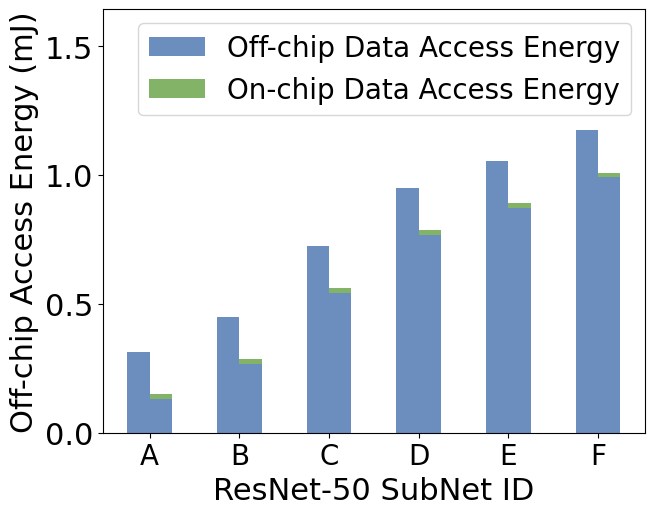

In [4]:
import matplotlib.pyplot as plt
import numpy as np

compute_energy = [1.78829968, 2.60790928, 5.257399910400005, 7.000312089600002, 10.822272652799997, 11.522859129599995]
off_memory_energy = [0.31295032800000006, 0.4496628799999999, 0.7263320879999999, 0.951175672, 1.054554968, 1.1741976560000005]
on_memory_energy = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
overall_evergy = []
for i in range(len(compute_energy)):
    overall_evergy.append(off_memory_energy[i]+on_memory_energy[i])
    # overall_evergy.append(compute_energy[i]+off_memory_energy[i]+on_memory_energy[i])

compute_energy_subnet_reuse = [1.78829968, 2.60790928, 5.257399910400005, 7.000312089600002, 10.822272652799997, 11.522859129599995]
off_memory_energy_subnet_reuse = [0.13008799999999998, 0.266906536, 0.5434697599999999, 0.7683928320000002, 0.8717721279999997, 0.9914148159999998]
on_memory_energy_subnet_reuse = [0.0182862328, 0.0182756344, 0.0182862328, 0.018278284000000002, 0.018278284000000002, 0.018278284000000002]
overall_evergy_subnet_reuse = []
for i in range(len(compute_energy_subnet_reuse)):
    overall_evergy_subnet_reuse.append(off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])
    # overall_evergy_subnet_reuse.append(compute_energy_subnet_reuse[i]+off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])

print(f"ratio of off-chip memory energy/overall energy: {np.max(np.array(off_memory_energy)/np.array(overall_evergy))}")
print(f"ratio of off-chip memory energy/overall energy (with SubNet Reuse): {np.max(np.array(off_memory_energy_subnet_reuse)/np.array(overall_evergy_subnet_reuse))}")

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(compute_energy_subnet_reuse))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

acu_matrix = []
sum_matrix = [off_memory_energy, on_memory_energy]
# sum_matrix = [compute_energy, off_memory_energy, on_memory_energy]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
# sum_matrix_subnet_reuse = [compute_energy_subnet_reuse, off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"energy saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Off-chip Access Energy (mJ)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.4*np.max(sum_matrix)])
plt.xlabel("ResNet-50 SubNet ID", fontsize=BIGGER_SIZE)

plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='best', fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Computer Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('energy_breakdown_image_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

###### Using DSE_config.csv as the underlying hardware

# user data
accuracy_list_pareto_frontier = [79.8, 79.7, 79.0, 78.3, 76.3, 75]
accuracy_list_pareto_frontier = np.sort(accuracy_list_pareto_frontier)

critical_compute_time_list_subnet_reuse =[1.0483333333333333, 1.5797703703703703, 3.204380444444445, 4.407256888888889, 6.821506567901234, 7.278564049382716]
critical_on_mem_time_subnet_reuse =[0.0061008799999999995, 0.006320655999999999, 0.012428815999999997, 0.011377808000000001, 0.015917584000000002, 0.016023311999999998]
critical_off_mem_time_subnet_reuse =[0.3073333333333333, 0.318, 0.63552, 0.5817599999999998, 0.8211466666666667, 0.8258133333333333]
critical_off_mem_time_iact_subnet_reuse =[0.10733333333333334, 0.11666666666666665, 0.26208, 0.2256, 0.3318933333333333, 0.3345066666666667]
critical_off_mem_time_weights_subnet_reuse =[0.0, 0.0, 0.0, 0.0, 0.0005600000000000001, 0.0]
critical_on_mem_time_weights_subnet_reuse =[0.00020008000000000002, 0.000215056, 0.000226832, 0.00020801600000000002, 0.00015156799999999998, 0.000167696]
critical_off_mem_time_oact_subnet_reuse =[0.2, 0.20133333333333334, 0.37344, 0.35616000000000003, 0.4886933333333333, 0.49130666666666667]

# critical_compute_time_list_subnet_reuse =[0.22643999999999997, 0.30413280000000004, 0.524169216, 0.685400064, 1.2877377706666668, 1.3029034666666668]
# critical_on_mem_time_subnet_reuse =[0.00020008000000000002, 0.00127592, 0.009126671999999999, 0.009126671999999999, 0.00127592, 0.003367824]
# critical_off_mem_time_subnet_reuse =[0.08429714285714285, 0.1885782857142857, 0.4368658285714286, 0.6421412571428571, 0.5038612571428571, 0.6504164571428571]
# critical_off_mem_time_iact_subnet_reuse =[0.029439999999999997, 0.03889142857142858, 0.0949741714285714, 0.10014171428571426, 0.13545279999999996, 0.11892159999999996]
# critical_off_mem_time_weights_subnet_reuse =[0.0, 0.08669257142857142, 0.20944457142857142, 0.4030189714285714, 0.18164845714285716, 0.35684205714285705]
# critical_on_mem_time_weights_subnet_reuse =[0.00020008000000000002, 0.00127592, 0.009126671999999999, 0.009126671999999999, 0.00127592, 0.003367824]
# critical_off_mem_time_oact_subnet_reuse =[0.054857142857142854, 0.06299428571428572, 0.1324470857142857, 0.13898057142857143, 0.18675999999999995, 0.17465279999999994]

critical_compute_time_list=[0.7441580246913579, 1.0535407407407409, 2.4267093333333336, 3.2806684444444447, 5.825468444444444, 5.8882465185185175]
critical_on_mem_time=[0.018649936, 0.027476864, 0.039707280000000005, 0.05210318400000001, 0.044250000000000005, 0.055194832]
critical_off_mem_time=[0.9713508333333332, 1.4310866666666666, 2.0680875, 2.7137075, 2.3046875000000004, 2.874730833333333]
critical_off_mem_time_iact=[0.1513958333333333, 0.19314583333333338, 0.34625999999999996, 0.3175799999999999, 0.3793824999999999, 0.3904483333333333]
critical_off_mem_time_weights=[0.5644341666666666, 0.9479408333333332, 1.2389474999999999, 1.9383874999999997, 1.3805475, 1.9239674999999998]
critical_on_mem_time_weights=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_off_mem_time_oact=[0.25552083333333336, 0.29000000000000015, 0.48288000000000003, 0.45774000000000004, 0.5447575, 0.5603149999999999]

print(f"the max ratio of latency going into weights from off-chip memory: {np.max(np.array(critical_off_mem_time_weights)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into oAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_oact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into iAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_iact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
# internal logic

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(accuracy_list_pareto_frontier))]

barWidth = 0.25

acu_matrix = []
sum_matrix = [critical_compute_time_list, critical_off_mem_time_iact, critical_off_mem_time_weights, critical_on_mem_time_weights, critical_off_mem_time_oact]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [critical_compute_time_list_subnet_reuse, critical_off_mem_time_iact_subnet_reuse, critical_off_mem_time_weights_subnet_reuse, critical_on_mem_time_weights_subnet_reuse, critical_off_mem_time_oact_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Overall Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(plt_handler, ["Critcial Latency in Compute", "Critcial Latency in Off-chip iAct Mem Access", "Critcial Latency in Off-chip Weights Mem Access", "Critcial Latency in On-chip Weights Mem Access", "Critcial Latency in Off-chip oAct Mem Access"], loc='lower center', bbox_to_anchor=(0.5, -0.6), fontsize=SMALL_SIZE)

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]

# multiple line plots
ax2.plot(x, accuracy_list_pareto_frontier, markersize=0, color="grey", linewidth=2)

for id in range(len(accuracy_list_pareto_frontier)):
    ax2.plot(x[id], accuracy_list_pareto_frontier[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)
ax2.set_ylabel("Accuracy (%)", fontsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

plt.savefig('latency_accuracy_breakdown_image_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# Latency breakdown in pareto-frontier -- for MobileNet V3

ratio of off-chip memory energy/overall energy: 1.0
ratio of off-chip memory energy/overall energy (with SubNet Reuse): 0.914186024631878
ratio of off-chip memory energy saving: 0.7866677081120347
energy saving ratio range is [0.4357696467340211,  0.7866677081120347]


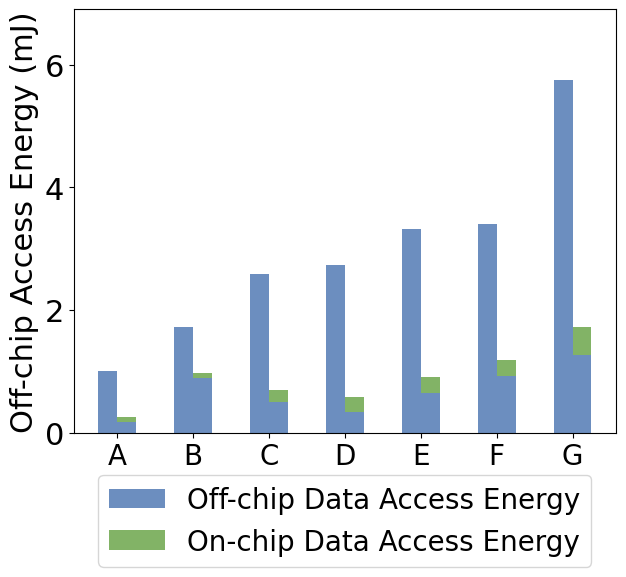

In [10]:
import matplotlib.pyplot as plt
import numpy as np

compute_energy=[12.527418022400004, 18.826696147199986, 23.565699903999977, 33.56781625599999, 36.75029335679999, 60.88016508159998, 74.3852460544]
off_memory_energy=[1.0112310639999995, 1.7174900399999988, 2.581563976000002, 2.729078984000001, 3.3299685200000004, 3.405235560000001, 5.757957815999998]
on_memory_energy=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

overall_evergy = []
for i in range(len(compute_energy)):
    overall_evergy.append(off_memory_energy[i]+on_memory_energy[i])
    # overall_evergy.append(compute_energy[i]+off_memory_energy[i]+on_memory_energy[i])

compute_energy_subnet_reuse =[12.527418022400004, 18.826696147199986, 23.565699903999977, 33.56781625599999, 36.75029335679999, 60.88016508159998, 74.3852460544]
off_memory_energy_subnet_reuse =[0.16586422400000006, 0.8859011199999997, 0.494916944, 0.3436586399999999, 0.642611536, 0.9306870879999997, 1.2683178879999994]
on_memory_energy_subnet_reuse =[0.08453668399999999, 0.08315889199999997, 0.20866470320000002, 0.2385420344000001, 0.2687356984, 0.2474548472000001, 0.44896399280000004]
overall_evergy_subnet_reuse = []
for i in range(len(compute_energy_subnet_reuse)):
    overall_evergy_subnet_reuse.append(off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])
    # overall_evergy_subnet_reuse.append(compute_energy_subnet_reuse[i]+off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])

print(f"ratio of off-chip memory energy/overall energy: {np.max(np.array(off_memory_energy)/np.array(overall_evergy))}")
print(f"ratio of off-chip memory energy/overall energy (with SubNet Reuse): {np.max(np.array(off_memory_energy_subnet_reuse)/np.array(overall_evergy_subnet_reuse))}")
print(f"ratio of off-chip memory energy saving: {np.max((np.array(overall_evergy)-np.array(overall_evergy_subnet_reuse))/np.array(overall_evergy))}")

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(compute_energy_subnet_reuse))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

acu_matrix = []
sum_matrix = [off_memory_energy, on_memory_energy]
# sum_matrix = [compute_energy, off_memory_energy, on_memory_energy]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
# sum_matrix_subnet_reuse = [compute_energy_subnet_reuse, off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"energy saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Off-chip Access Energy (mJ)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F", "G"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.ylim([0, 1.2*np.max(sum_matrix)])

plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Compute Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('energy_breakdown_image_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

ratio of off-chip memory energy/overall energy: 1.0
ratio of off-chip memory energy/overall energy (with SubNet Reuse): 0.914186024631878
ratio of off-chip memory energy saving: 0.7866677081120347
energy saving ratio range is [0.4357696467340211,  0.7866677081120347]


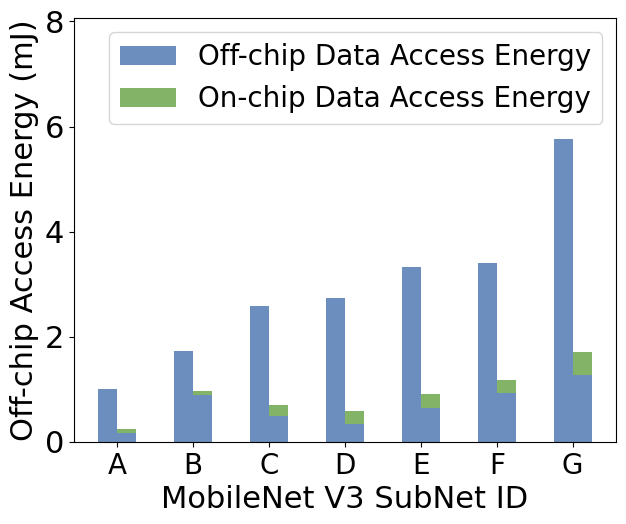

In [14]:
import matplotlib.pyplot as plt
import numpy as np

compute_energy=[12.527418022400004, 18.826696147199986, 23.565699903999977, 33.56781625599999, 36.75029335679999, 60.88016508159998, 74.3852460544]
off_memory_energy=[1.0112310639999995, 1.7174900399999988, 2.581563976000002, 2.729078984000001, 3.3299685200000004, 3.405235560000001, 5.757957815999998]
on_memory_energy=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

overall_evergy = []
for i in range(len(compute_energy)):
    overall_evergy.append(off_memory_energy[i]+on_memory_energy[i])
    # overall_evergy.append(compute_energy[i]+off_memory_energy[i]+on_memory_energy[i])

compute_energy_subnet_reuse =[12.527418022400004, 18.826696147199986, 23.565699903999977, 33.56781625599999, 36.75029335679999, 60.88016508159998, 74.3852460544]
off_memory_energy_subnet_reuse =[0.16586422400000006, 0.8859011199999997, 0.494916944, 0.3436586399999999, 0.642611536, 0.9306870879999997, 1.2683178879999994]
on_memory_energy_subnet_reuse =[0.08453668399999999, 0.08315889199999997, 0.20866470320000002, 0.2385420344000001, 0.2687356984, 0.2474548472000001, 0.44896399280000004]
overall_evergy_subnet_reuse = []
for i in range(len(compute_energy_subnet_reuse)):
    overall_evergy_subnet_reuse.append(off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])
    # overall_evergy_subnet_reuse.append(compute_energy_subnet_reuse[i]+off_memory_energy_subnet_reuse[i]+on_memory_energy_subnet_reuse[i])

print(f"ratio of off-chip memory energy/overall energy: {np.max(np.array(off_memory_energy)/np.array(overall_evergy))}")
print(f"ratio of off-chip memory energy/overall energy (with SubNet Reuse): {np.max(np.array(off_memory_energy_subnet_reuse)/np.array(overall_evergy_subnet_reuse))}")
print(f"ratio of off-chip memory energy saving: {np.max((np.array(overall_evergy)-np.array(overall_evergy_subnet_reuse))/np.array(overall_evergy))}")

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(compute_energy_subnet_reuse))]

barWidth = 0.25
color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

acu_matrix = []
sum_matrix = [off_memory_energy, on_memory_energy]
# sum_matrix = [compute_energy, off_memory_energy, on_memory_energy]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
# sum_matrix_subnet_reuse = [compute_energy_subnet_reuse, off_memory_energy_subnet_reuse, on_memory_energy_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"energy saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Off-chip Access Energy (mJ)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F", "G"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.xlabel("MobileNet V3 SubNet ID", fontsize=BIGGER_SIZE)
plt.ylim([0, 1.4*np.max(sum_matrix)])

plt.legend(plt_handler, ["Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='best', fontsize=MEDIUM_SIZE)#, bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
# plt.legend(plt_handler, ["Compute Energy", "Off-chip Data Access Energy", "On-chip Data Access Energy"], loc='lower center', bbox_to_anchor=(0.5, -0.35), fontsize=MEDIUM_SIZE)
plt.savefig('energy_breakdown_image_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# user data
accuracy_list_pareto_frontier = [75.59999767, 76.29999735, 77.29999743,   79.19999737, 79.29999699,  79.69999708, 79.79999794]

overall_latency = [0.8048738366419752, 1.071080420987654, 1.1603337025185185, 1.6163379419753083, 1.7228962922469142, 2.0238598360493816, 2.2557395089382712]
critical_compute_time_list = [0.10639664197530863, 0.20609698765432097, 0.22476385185185185, 0.3061193086419753, 0.3446095802469135, 0.396220049382716, 0.4544102716049382]
critical_on_mem_time = [0.0172364, 0.020548144, 0.022095232000000006, 0.029082143999999997, 0.030446832, 0.035324064000000016, 0.038759712000000016]
critical_off_mem_time = [0.6945766666666668, 0.8609658333333334, 0.9313566666666668, 1.3062158333333336, 1.3742250000000003, 1.6234866666666672, 1.797073333333334]
critical_off_mem_time_iact = [0.2885883333333334, 0.3629291666666668, 0.3930783333333334, 0.5618166666666666, 0.5923775000000001, 0.7068633333333334, 0.7785666666666669]
critical_off_mem_time_weights = [0.00241, 0.0025724999999999997, 0.0048, 0.0017125, 0.00184, 0.0, 0.006659999999999999]
critical_on_mem_time_weights = [0.003900528, 0.0040176, 0.004213184, 0.0040028, 0.004061712, 0.00415312, 0.004255904]
critical_off_mem_time_oact = [0.4035783333333333, 0.4954641666666667, 0.5334783333333334, 0.7426866666666666, 0.7800075000000001, 0.9166233333333335, 1.011846666666667]

critical_compute_time_list_subnet_reuse = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_on_mem_time_subnet_reuse = [0.020646287999999995, 0.027087023999999998, 0.029062495999999997, 0.03692153599999999, 0.03921953599999997, 0.04490111999999999, 0.049488383999999996]
critical_off_mem_time_subnet_reuse = [0.7528016666666669, 0.9779858333333333, 1.0668483333333332, 1.4871441666666672, 1.5922433333333335, 1.8641583333333342, 2.1034850000000023]
critical_off_mem_time_iact_subnet_reuse = [0.31253333333333344, 0.4162716666666669, 0.45539500000000016, 0.6427658333333334, 0.6899450000000001, 0.8189916666666663, 0.9049049999999998]
critical_off_mem_time_weights_subnet_reuse = [0.00241, 0.0025724999999999997, 0.011373333333333333, 0.0063525, 0.010333333333333332, 0.0, 0.04398]
critical_on_mem_time_weights_subnet_reuse = [0.006192496, 0.008309696, 0.008579008, 0.008368368, 0.008648464, 0.009109279999999999, 0.009101472]
critical_off_mem_time_oact_subnet_reuse = [0.43785833333333335, 0.5591416666666672, 0.6000800000000002, 0.8380258333333332, 0.8919650000000001, 1.0451666666666666, 1.1545999999999998]

print(f"the max ratio of latency going into weights from off-chip memory: {np.max(np.array(critical_off_mem_time_weights)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into oAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_oact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into iAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_iact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
# internal logic

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(accuracy_list_pareto_frontier))]

barWidth = 0.25

acu_matrix = []
sum_matrix = [critical_compute_time_list, critical_off_mem_time_iact, critical_off_mem_time_weights, critical_on_mem_time_weights, critical_off_mem_time_oact]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [critical_compute_time_list_subnet_reuse, critical_off_mem_time_iact_subnet_reuse, critical_off_mem_time_weights_subnet_reuse, critical_on_mem_time_weights_subnet_reuse, critical_off_mem_time_oact_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)


print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")


plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Overall Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F", "G"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(plt_handler, ["Critcial Latency in Compute", "Critcial Latency in Off-chip iAct Mem Access", "Critcial Latency in Off-chip Weights Mem Access", "Critcial Latency in On-chip Weights Mem Access", "Critcial Latency in Off-chip oAct Mem Access"], loc='lower center', bbox_to_anchor=(0.5, -0.6), fontsize=SMALL_SIZE)
# Creating Twin axes for dataset_1
ax2 = ax.twinx()
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# multiple line plots
ax2.plot(x, accuracy_list_pareto_frontier, markersize=0, color="grey", linewidth=2)

for id in range(len(accuracy_list_pareto_frontier)):
    ax2.plot(x[id], accuracy_list_pareto_frontier[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)
ax2.set_ylabel("Accuracy (%)", fontsize=BIGGER_SIZE)

plt.savefig('latency_accuracy_breakdown_image_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

######### Using DSE_config.csv

# user data
accuracy_list_pareto_frontier = [75.59999767, 76.29999735, 77.29999743, 79.19999737, 79.29999699,  79.69999708, 79.79999794]

critical_compute_time_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_on_mem_time=[0.020646287999999995, 0.027087023999999998, 0.029062495999999997, 0.03692153599999999, 0.03921953599999997, 0.04490111999999999, 0.049488383999999996]
critical_off_mem_time=[1.0753274999999998, 1.4107825000000003, 1.5136716666666663, 1.9229966666666667, 2.0426841666666666, 2.3385999999999996, 2.5775200000000003]
critical_off_mem_time_iact=[0.31253333333333344, 0.4162716666666669, 0.45539500000000016, 0.6427658333333334, 0.6899450000000001, 0.8189916666666663, 0.9049049999999998]
critical_off_mem_time_weights=[0.3249358333333333, 0.43536916666666664, 0.45819666666666664, 0.442205, 0.46077416666666665, 0.47444166666666665, 0.5180149999999999]
critical_on_mem_time_weights=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_off_mem_time_oact=[0.43785833333333335, 0.5591416666666672, 0.6000800000000002, 0.8380258333333332, 0.8919650000000001, 1.0451666666666666, 1.1545999999999998]

critical_compute_time_list_subnet_reuse = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_on_mem_time_subnet_reuse = [0.020646287999999995, 0.027087023999999998, 0.029062495999999997, 0.03692153599999999, 0.03921953599999997, 0.04490111999999999, 0.049488383999999996]
critical_off_mem_time_subnet_reuse = [0.7528016666666669, 0.9779858333333333, 1.0668483333333332, 1.4871441666666672, 1.5922433333333335, 1.8641583333333342, 2.1034850000000023]
critical_off_mem_time_iact_subnet_reuse = [0.31253333333333344, 0.4162716666666669, 0.45539500000000016, 0.6427658333333334, 0.6899450000000001, 0.8189916666666663, 0.9049049999999998]
critical_off_mem_time_weights_subnet_reuse = [0.00241, 0.0025724999999999997, 0.011373333333333333, 0.0063525, 0.010333333333333332, 0.0, 0.04398]
critical_on_mem_time_weights_subnet_reuse = [0.006192496, 0.008309696, 0.008579008, 0.008368368, 0.008648464, 0.009109279999999999, 0.009101472]
critical_off_mem_time_oact_subnet_reuse = [0.43785833333333335, 0.5591416666666672, 0.6000800000000002, 0.8380258333333332, 0.8919650000000001, 1.0451666666666666, 1.1545999999999998]

print(f"the max ratio of latency going into weights from off-chip memory: {np.max(np.array(critical_off_mem_time_weights)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into oAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_oact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into iAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_iact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
# internal logic

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(accuracy_list_pareto_frontier))]

barWidth = 0.25

acu_matrix = []
sum_matrix = [critical_compute_time_list, critical_off_mem_time_iact, critical_off_mem_time_weights, critical_on_mem_time_weights, critical_off_mem_time_oact]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [critical_compute_time_list_subnet_reuse, critical_off_mem_time_iact_subnet_reuse, critical_off_mem_time_weights_subnet_reuse, critical_on_mem_time_weights_subnet_reuse, critical_off_mem_time_oact_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)


print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")


plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Overall Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
plt.xticks(x, ["A", "B", "C", "D", "E", "F", "G"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(plt_handler, ["Critcial Latency in Compute", "Critcial Latency in Off-chip iAct Mem Access", "Critcial Latency in Off-chip Weights Mem Access", "Critcial Latency in On-chip Weights Mem Access", "Critcial Latency in Off-chip oAct Mem Access"], loc='lower center', bbox_to_anchor=(0.5, -0.6), fontsize=SMALL_SIZE)
# Creating Twin axes for dataset_1
ax2 = ax.twinx()
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#6C8EBF", "#82B366"]

# multiple line plots
ax2.plot(x, accuracy_list_pareto_frontier, markersize=0, color="grey", linewidth=2)

for id in range(len(accuracy_list_pareto_frontier)):
    ax2.plot(x[id], accuracy_list_pareto_frontier[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)
ax2.set_ylabel("Accuracy (%)", fontsize=BIGGER_SIZE)

plt.savefig('latency_accuracy_breakdown_image_mbv3.pdf', bbox_inches="tight", transparent=True) 
plt.show()

the max ratio of latency going into weights from off-chip memory: 0.655099393572358
the max ratio of latency going into oAct access from off-chip memory: 0.2576244351825954
the max ratio of latency going into iAct access from off-chip memory: 0.20135111250075674
latency saving ratio range is [0.4568716063802186,  0.6350830209535345]


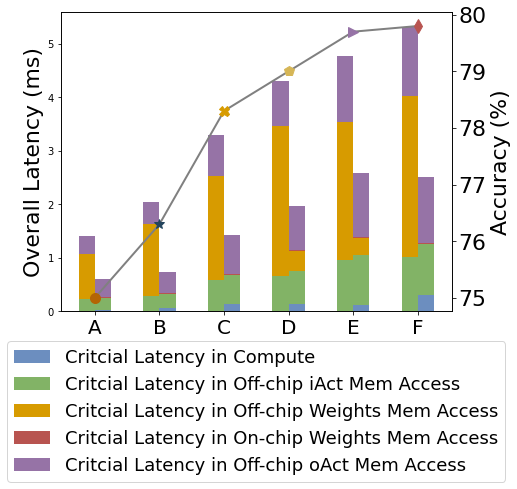

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# user data
accuracy_list_pareto_frontier = [79.8, 79.7, 79.0, 78.3, 76.3, 75]
accuracy_list_pareto_frontier = np.sort(accuracy_list_pareto_frontier)

critical_compute_time_list=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_on_mem_time=[0.02721307199999999, 0.039101119999999996, 0.06315931200000001, 0.08271092800000002, 0.091700432, 0.10210414400000005]
critical_off_mem_time=[1.4173475, 2.036516666666667, 3.2895474999999994, 4.307860833333334, 4.776064166666668, 5.317924166666668]
critical_off_mem_time_iact=[0.2378958333333334, 0.2892291666666669, 0.5805000000000003, 0.6559800000000005, 0.9616658333333332, 1.0196083333333334]
critical_off_mem_time_weights=[0.8281808333333333, 1.3341208333333334, 1.9415274999999996, 2.798620833333334, 2.583967500000001, 3.0003875000000004]
critical_on_mem_time_weights=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
critical_off_mem_time_oact=[0.3512708333333335, 0.4131666666666665, 0.7675200000000004, 0.8532600000000001, 1.2304308333333336, 1.2979283333333347]


critical_compute_time_list_subnet_reuse = [0.020722222222222222, 0.054911111111111105, 0.1337344, 0.1388832, 0.11757386666666667, 0.3119143999999999]
critical_on_mem_time_subnet_reuse = [0.02210820799999999, 0.028288512, 0.044137487999999996, 0.06546779200000002, 0.08168168, 0.07093841600000003]
critical_off_mem_time_subnet_reuse = [0.5805683333333335, 0.6728791666666666, 1.2817200000000009, 1.8061666666666667, 2.44164, 2.1629416666666663]
critical_off_mem_time_iact_subnet_reuse = [0.23341666666666672, 0.2740208333333336, 0.5469000000000002, 0.6222900000000003, 0.9281008333333334, 0.9423108333333332]
critical_off_mem_time_weights_subnet_reuse = [0.00035999999999999997, 0.0009, 0.0009, 0.3643066666666666, 0.3166733333333333, 0.0]
critical_on_mem_time_weights_subnet_reuse = [0.010961295999999999, 0.015369231999999998, 0.019528464000000002, 0.030789392000000006, 0.034802192, 0.029409936000000008]
critical_off_mem_time_oact_subnet_reuse = [0.3467916666666668, 0.3979583333333332, 0.7339200000000002, 0.81957, 1.1968658333333337, 1.2206308333333342]

print(f"the max ratio of latency going into weights from off-chip memory: {np.max(np.array(critical_off_mem_time_weights)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into oAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_oact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
print(f"the max ratio of latency going into iAct access from off-chip memory: {np.max(np.array(critical_off_mem_time_iact)/(np.array(critical_compute_time_list) + np.array(critical_off_mem_time)) )}")
# internal logic

color_list = ["#6C8EBF", "#82B366", "#D79B00",  "#B85450", "#9673A6", "#B46504", "#D6B656","#23445D"]

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

x = [i for i in range(len(accuracy_list_pareto_frontier))]

barWidth = 0.25

acu_matrix = []
sum_matrix = [critical_compute_time_list, critical_off_mem_time_iact, critical_off_mem_time_weights, critical_on_mem_time_weights, critical_off_mem_time_oact]
for i in range(len(sum_matrix)): 
    if i == 0:
        acu_matrix.append(sum_matrix[0])
    else:
        temp = []
        for j in range(len(sum_matrix[i])):
            temp.append(acu_matrix[i-1][j] + sum_matrix[i][j])
        acu_matrix.append(temp)

for i in range(len(x)):
    for j in range(len(acu_matrix)):
        if j==0:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]-barWidth/2, sum_matrix[j][i], width=barWidth, bottom=acu_matrix[j-1][i], color=color_list[j])

acu_matrix_subnet_reuse = []
sum_matrix_subnet_reuse = [critical_compute_time_list_subnet_reuse, critical_off_mem_time_iact_subnet_reuse, critical_off_mem_time_weights_subnet_reuse, critical_on_mem_time_weights_subnet_reuse, critical_off_mem_time_oact_subnet_reuse]
for i in range(len(sum_matrix_subnet_reuse)):
    if i == 0:
        acu_matrix_subnet_reuse.append(sum_matrix_subnet_reuse[0])
    else:
        temp = []
        for j in range(len(sum_matrix_subnet_reuse[i])):
            temp.append(acu_matrix_subnet_reuse[i-1][j] + sum_matrix_subnet_reuse[i][j])
        acu_matrix_subnet_reuse.append(temp)

plt_handler = []
for i in range(len(x)):
    for j in range(len(acu_matrix_subnet_reuse)):
        if j==0:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j])
        else:
            plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j])
        
        if i == len(x) - 1:
            if j==0:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=0, color=color_list[j]))
            else:
                plt_handler.append(plt.bar(x[i]+barWidth/2, sum_matrix_subnet_reuse[j][i], width=barWidth, bottom=acu_matrix_subnet_reuse[j-1][i], color=color_list[j]))

print(f"latency saving ratio range is [{1-np.max(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))},  {1-np.min(np.array(acu_matrix_subnet_reuse[-1])/np.array(acu_matrix[-1]))}]")

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Overall Latency (ms)", fontsize=BIGGER_SIZE)
# plt.xticks(x, ["w/wo", "w/wo", "w/wo", "w/wo", "w/wo", "w/wo",  "w/wo"])
# plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
plt.xticks(x, ["A", "B", "C", "D", "E", "F"], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.legend(plt_handler, ["Critcial Latency in Compute", "Critcial Latency in Off-chip iAct Mem Access", "Critcial Latency in Off-chip Weights Mem Access", "Critcial Latency in On-chip Weights Mem Access", "Critcial Latency in Off-chip oAct Mem Access"], loc='lower center', bbox_to_anchor=(0.5, -0.6), fontsize=SMALL_SIZE)

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#D79B00", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]

# multiple line plots
ax2.plot(x, accuracy_list_pareto_frontier, markersize=0, color="grey", linewidth=2)

for id in range(len(accuracy_list_pareto_frontier)):
    ax2.plot(x[id], accuracy_list_pareto_frontier[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)
ax2.set_ylabel("Accuracy (%)", fontsize=BIGGER_SIZE)

plt.savefig('latency_accuracy_breakdown_image_resnet50.pdf', bbox_inches="tight", transparent=True) 
plt.show()

# The major bottleneck of the workload

In [ ]:
import numpy as np

critical_compute_time_wo_subnet_reuse = [0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564, 0.0005878005760000001, 0.0007679019235555555, 0.0006403634062222222, 0.002570900707555556, 0.0026401158968888884, 0.005218150684444445, 0.0056282196195555564]
critical_on_mem_time_wo_subnet_reuse = [0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716]
critical_off_mem_time_wo_subnet_reuse = [0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716, 0.0011187211428571424, 0.0019591444571428565, 0.003027393600000001, 0.001961510171428571, 0.002583937142857143, 0.0019481716571428567, 0.004317100114285716]

avg_critical_compute_time_wo_subnet_reuse = np.mean(critical_compute_time_wo_subnet_reuse)
avg_critical_on_mem_time_wo_subnet_reuse = np.mean(critical_on_mem_time_wo_subnet_reuse)
avg_critical_off_mem_time_wo_subnet_reuse = np.mean(critical_off_mem_time_wo_subnet_reuse)


critical_compute_time_subnet_reuse = [0.001166144, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555, 0.001167954944, 0.0013261728995555553, 0.0020141495751111113, 0.003164586723555556, 0.0034706180977777776, 0.00572155565511111, 0.006709612771555555]
critical_on_mem_time_subnet_reuse = [0.00012590079999999994, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998]
critical_off_mem_time_subnet_reuse = [0.00012590079999999994, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998, 0.00012254514285714284, 0.0009869888, 0.0003875478857142857, 0.00023658468571428562, 0.0002466285714285713, 0.0003714171428571427, 0.0008729087999999998]

avg_critical_compute_time_subnet_reuse = np.mean(critical_compute_time_subnet_reuse)
avg_critical_on_mem_time_subnet_reuse = np.mean(critical_on_mem_time_subnet_reuse)
avg_critical_off_mem_time_subnet_reuse = np.mean(critical_off_mem_time_subnet_reuse)

import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Critcial Latency in Compute",
    "Critcial Latency in On-chip Mem Access",
    "Critcial Latency in O-chip Mem Access"]
results = {
    'without_subnet_reuse': [avg_critical_compute_time_wo_subnet_reuse, avg_critical_on_mem_time_wo_subnet_reuse, avg_critical_off_mem_time_wo_subnet_reuse],
    'subnet_reuse': [avg_critical_compute_time_subnet_reuse, avg_critical_on_mem_time_subnet_reuse, avg_critical_off_mem_time_subnet_reuse],
}

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)) + "%", ha='center', va='center',
                    color="black")

    fig.legend(ncol=3, bbox_to_anchor=(0.05, -0.25),
              loc='lower left')
    return fig, ax

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.tight_layout(pad=0)
fig.savefig("175_queries_layout.pdf", bbox_inches="tight", transparent=True)

# MobileNetV3 select pareto frontier

In [ ]:
def dominates(row, candidateRow):
    return sum([row[0] >= candidateRow[0], row[2] <= candidateRow[2]])# for x in range(len(row))]) == len(row) 

def simple_cull(inputPoints, dominates):
    paretoPoints = []
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow, row) == 2:
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(row))
            elif dominates(row, candidateRow) == 2:
                nonDominated = False
                dominatedPoints.add(tuple(candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            paretoPoints.append(tuple(candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

In [ ]:
accuracy_list = np.array([75.59999767303466, 73.7999974155426, 74.39999801635742, 75.89999778747558, 75.699997215271, 75.59999771118164, 76.1999973487854, 76.49999742507934, 76.2999973487854, 75.99999744415283, 77.19999731063842, 77.29999742507934, 77.69999723434448, 76.0999976158142, 75.89999761581421, 77.59999807357788, 79.09999753952026, 78.19999738693237, 77.79999763488769, 79.29999698638916, 78.89999773025512, 78.5999976158142, 79.09999771118164, 79.19999736785888, 78.8999979019165, 78.19999729156494, 78.69999784469604, 78.59999786376953, 78.69999755859375, 78.79999732971191, 78.29999769210815, 78.99999763488769, 78.49999761581421, 78.89999746322631, 79.69999708175659, 79.39999767303466, 78.29999725341797, 79.39999713897706, 78.79999773025513, 79.39999765396118, 79.69999761581421, 79.79999794006348, 79.09999744415283, 79.49999757766723, 79.29999742507934])
latency_list = np.array([8.234865310541311, 8.681644729344727, 8.330928854700856, 12.98954904843305, 14.801484227920229, 12.754703509971506, 21.71619622792024, 17.431396820512827, 12.435612113960113, 19.62241042735043, 22.560394039886056, 15.656653549857543, 24.686463897435903, 30.143682358974374, 24.967357002849017, 27.24910246153847, 21.284856717948735, 22.760919282051294, 22.723365641025655, 28.83950793162394, 21.26557733333335, 31.420993789173806, 38.541742803418806, 23.23234038746441, 38.430358256410265, 41.83269423361825, 32.59299996581199, 37.12758323646725, 46.68349339031341, 42.762852478632475, 38.60711887179489, 43.30773815384616, 41.46416422792024, 44.98424933333334, 40.98765042735044, 49.31035490598293, 53.67264969800571, 38.22289776638176, 60.599475589743584, 49.16514743019943, 49.157492159544155, 46.64368406837608, 43.3267491851852, 71.5195305641026, 48.84535005128207])

pareto_points = []
for id in range(len(accuracy_list)):
    pareto_points.append([accuracy_list[id], 0, latency_list[id]])

pareto_data,_ = simple_cull(pareto_points, dominates)
print(pareto_data)

In [ ]:
accuracy_list_pareto_frontier = [] 
latency_list_pareto_frontier = []
for i in range(len(pareto_data)):
  latency_list_pareto_frontier.append(pareto_data[i][2])
  accuracy_list_pareto_frontier.append(pareto_data[i][0])
print(latency_list_pareto_frontier)
print(accuracy_list_pareto_frontier)

In [ ]:
accuracy_list = np.array([75.59999767303466, 73.7999974155426, 74.39999801635742, 75.89999778747558, 75.699997215271, 75.59999771118164, 76.1999973487854, 76.49999742507934, 76.2999973487854, 75.99999744415283, 77.19999731063842, 77.29999742507934, 77.69999723434448, 76.0999976158142, 75.89999761581421, 77.59999807357788, 79.09999753952026, 78.19999738693237, 77.79999763488769, 79.29999698638916, 78.89999773025512, 78.5999976158142, 79.09999771118164, 79.19999736785888, 78.8999979019165, 78.19999729156494, 78.69999784469604, 78.59999786376953, 78.69999755859375, 78.79999732971191, 78.29999769210815, 78.99999763488769, 78.49999761581421, 78.89999746322631, 79.69999708175659, 79.39999767303466, 78.29999725341797, 79.39999713897706, 78.79999773025513, 79.39999765396118, 79.69999761581421, 79.79999794006348, 79.09999744415283, 79.49999757766723, 79.29999742507934])
latency_list = np.array([8.234865310541311, 8.681644729344727, 8.330928854700856, 12.98954904843305, 14.801484227920229, 12.754703509971506, 21.71619622792024, 17.431396820512827, 12.435612113960113, 19.62241042735043, 22.560394039886056, 15.656653549857543, 24.686463897435903, 30.143682358974374, 24.967357002849017, 27.24910246153847, 21.284856717948735, 22.760919282051294, 22.723365641025655, 28.83950793162394, 21.26557733333335, 31.420993789173806, 38.541742803418806, 23.23234038746441, 38.430358256410265, 41.83269423361825, 32.59299996581199, 37.12758323646725, 46.68349339031341, 42.762852478632475, 38.60711887179489, 43.30773815384616, 41.46416422792024, 44.98424933333334, 40.98765042735044, 49.31035490598293, 53.67264969800571, 38.22289776638176, 60.599475589743584, 49.16514743019943, 49.157492159544155, 46.64368406837608, 43.3267491851852, 71.5195305641026, 48.84535005128207])
idx_data_point = []
for latency_pareto_point in latency_list_pareto_frontier:
    idx_data_point.append(np.where(latency_list == latency_pareto_point)[0][0])
print(idx_data_point)


In [ ]:
configuration_list = np.array([[[5, 3, 7, 7, 5, 3, 7, 5, 7, 7, 5, 5, 5, 3, 3, 3, 3, 3, 3, 5], [3, 3, 3, 3, 3, 4, 6, 6, 4, 4, 3, 4, 3, 4, 6, 4, 6, 6, 4, 6], [2, 2, 2, 2, 2], [176]],
[[5, 3, 7, 5, 7, 5, 5, 7, 7, 7, 7, 5, 5, 3, 3, 7, 3, 3, 3, 5], [3, 4, 4, 3, 3, 3, 4, 6, 4, 3, 6, 4, 4, 4, 3, 6, 6, 6, 4, 6], [2, 3, 2, 3, 3], [160]],
[[3, 3, 5, 3, 7, 5, 3, 3, 7, 7, 7, 7, 5, 3, 3, 5, 3, 3, 3, 3], [3, 4, 4, 6, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 6, 4, 6, 4, 3], [2, 2, 2, 3, 3], [176]],
[[5, 3, 3, 7, 7, 5, 3, 5, 7, 3, 5, 7, 7, 7, 5, 7, 3, 3, 3, 3], [3, 3, 6, 4, 4, 3, 3, 6, 4, 4, 6, 6, 4, 4, 3, 4, 6, 6, 4, 6], [2, 2, 2, 3, 3], [176]],
[[5, 3, 5, 3, 7, 5, 7, 5, 7, 3, 3, 7, 5, 7, 7, 7, 3, 3, 7, 5], [3, 4, 6, 4, 4, 3, 6, 4, 4, 3, 3, 3, 4, 4, 3, 6, 6, 6, 4, 6], [2, 2, 3, 3, 3], [176]],
[[3, 3, 7, 3, 5, 7, 7, 7, 5, 3, 3, 7, 3, 7, 5, 7, 5, 3, 3, 5], [4, 4, 3, 3, 4, 4, 4, 6, 4, 4, 4, 3, 3, 3, 4, 6, 6, 6, 6, 4], [2, 2, 3, 3, 3], [176]],
[[5, 3, 7, 5, 5, 3, 5, 5, 5, 5, 3, 3, 5, 7, 5, 3, 7, 7, 5, 7], [3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 6, 6, 6, 4, 3], [2, 3, 3, 3, 4], [176]],
[[3, 3, 5, 3, 7, 5, 7, 5, 7, 7, 3, 5, 5, 7, 3, 3, 3, 7, 3, 3], [3, 4, 4, 3, 3, 6, 4, 3, 4, 3, 6, 6, 4, 4, 3, 4, 6, 6, 6, 4], [2, 3, 3, 3, 3], [176]],
[[3, 3, 5, 5, 7, 5, 3, 5, 7, 7, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3], [4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 6, 6, 6, 3], [2, 3, 3, 4, 4], [176]],
[[5, 5, 3, 5, 7, 3, 3, 5, 5, 5, 5, 7, 5, 5, 7, 3, 3, 3, 5, 7], [3, 3, 3, 3, 6, 4, 3, 6, 3, 3, 4, 3, 4, 4, 3, 4, 6, 6, 6, 4], [3, 3, 4, 3, 4], [176]],
[[5, 5, 7, 7, 3, 5, 7, 3, 7, 7, 5, 5, 7, 7, 5, 5, 5, 3, 5, 5], [4, 4, 6, 4, 4, 3, 4, 4, 4, 3, 4, 4, 6, 4, 3, 3, 6, 6, 6, 4], [2, 3, 3, 4, 4], [176]],
[[3, 3, 7, 7, 5, 3, 3, 3, 7, 7, 3, 7, 3, 7, 3, 3, 3, 5, 3, 3], [4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 6, 4, 4, 4, 6, 6, 6, 3], [2, 4, 4, 4, 4], [176]],
[[3, 3, 3, 7, 5, 3, 5, 7, 5, 5, 3, 3, 5, 7, 7, 3, 7, 3, 3, 7], [3, 3, 6, 3, 4, 4, 3, 3, 4, 4, 3, 4, 4, 3, 6, 6, 6, 6, 6, 4], [2, 3, 3, 3, 4], [192]],
[[5, 5, 3, 3, 5, 3, 3, 7, 5, 5, 7, 5, 7, 5, 5, 7, 7, 7, 5, 7], [3, 3, 3, 4, 6, 4, 6, 3, 6, 4, 3, 3, 6, 4, 4, 3, 6, 6, 6, 4], [3, 3, 4, 4, 4], [176]],
[[3, 3, 3, 7, 5, 5, 3, 3, 7, 7, 7, 3, 5, 7, 3, 7, 3, 7, 3, 3], [4, 3, 3, 4, 6, 6, 4, 3, 4, 4, 6, 3, 6, 4, 4, 4, 6, 6, 6, 3], [3, 3, 4, 4, 4], [176]],
[[3, 3, 5, 5, 3, 7, 5, 5, 5, 5, 3, 5, 5, 7, 7, 5, 7, 3, 7, 5], [3, 3, 3, 6, 4, 3, 3, 6, 6, 6, 4, 6, 6, 4, 3, 4, 6, 6, 6, 3], [2, 3, 3, 4, 4], [192]],
[[3, 3, 7, 3, 5, 7, 3, 7, 7, 5, 3, 7, 7, 7, 3, 5, 3, 5, 3, 3], [3, 3, 3, 3, 4, 6, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 6, 6, 6, 3], [2, 3, 3, 3, 4], [208]],
[[5, 3, 5, 5, 5, 7, 7, 5, 7, 5, 3, 3, 3, 7, 5, 3, 5, 5, 3, 3], [4, 3, 6, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 6, 6, 6, 4], [2, 4, 4, 4, 4], [192]],
[[3, 3, 7, 3, 5, 5, 7, 3, 5, 7, 3, 3, 5, 7, 5, 5, 3, 3, 5, 5], [4, 6, 6, 4, 6, 6, 3, 6, 4, 3, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6], [2, 4, 3, 3, 4], [192]],
[[3, 3, 3, 3, 7, 3, 7, 7, 7, 7, 7, 5, 7, 5, 3, 5, 3, 3, 7, 5], [3, 4, 3, 6, 6, 3, 4, 3, 6, 3, 3, 3, 3, 4, 3, 4, 6, 6, 6, 4], [3, 3, 4, 3, 4], [208]],
[[3, 3, 5, 7, 5, 3, 7, 5, 7, 7, 3, 7, 5, 7, 3, 5, 3, 3, 5, 5], [4, 3, 3, 4, 3, 6, 3, 6, 4, 3, 4, 6, 6, 4, 6, 4, 6, 6, 6, 3], [3, 3, 3, 3, 4], [208]],
[[5, 5, 7, 3, 7, 3, 5, 5, 5, 5, 3, 7, 7, 5, 5, 3, 5, 7, 5, 5], [3, 4, 6, 6, 4, 3, 4, 3, 6, 3, 3, 3, 4, 6, 3, 3, 6, 6, 6, 4], [2, 3, 4, 4, 4], [208]],
[[5, 5, 3, 7, 7, 3, 5, 3, 5, 5, 3, 5, 7, 5, 5, 3, 7, 7, 7, 7], [3, 3, 3, 4, 4, 4, 4, 3, 6, 4, 3, 6, 6, 4, 4, 4, 6, 6, 6, 4], [2, 4, 3, 4, 4], [208]],
[[3, 3, 5, 7, 5, 3, 3, 7, 5, 7, 3, 7, 5, 5, 3, 3, 3, 5, 5, 5], [4, 3, 3, 3, 4, 6, 4, 6, 4, 3, 4, 6, 6, 3, 4, 4, 6, 6, 6, 3], [3, 3, 4, 4, 4], [208]],
[[5, 5, 3, 3, 5, 5, 5, 5, 5, 7, 3, 5, 5, 7, 5, 5, 7, 3, 5, 5], [6, 3, 3, 3, 6, 4, 6, 3, 6, 3, 3, 3, 3, 4, 3, 3, 6, 6, 6, 4], [3, 3, 4, 4, 4], [208]],
[[5, 5, 3, 3, 5, 7, 5, 7, 5, 7, 3, 5, 7, 5, 5, 5, 7, 5, 5, 7], [4, 4, 4, 3, 4, 4, 4, 4, 4, 6, 3, 6, 6, 6, 3, 3, 6, 6, 6, 4], [2, 3, 4, 4, 4], [208]],
[[5, 3, 7, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 7, 3, 3, 3, 5], [3, 3, 3, 6, 6, 6, 6, 3, 4, 4, 6, 6, 4, 6, 3, 6, 6, 6, 6, 6], [3, 3, 4, 3, 4], [208]],
[[5, 5, 5, 7, 5, 7, 5, 5, 5, 3, 3, 7, 7, 5, 5, 3, 5, 3, 5, 7], [4, 4, 3, 4, 4, 6, 4, 3, 4, 3, 3, 3, 6, 6, 6, 4, 6, 6, 6, 4], [2, 4, 4, 4, 4], [208]],
[[5, 5, 7, 5, 5, 7, 7, 5, 7, 7, 3, 7, 7, 5, 7, 7, 5, 5, 5, 7], [6, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 6, 6, 4, 4, 6, 6, 6, 4], [2, 4, 4, 4, 4], [208]],
[[5, 3, 7, 3, 7, 7, 7, 3, 7, 7, 7, 5, 7, 7, 3, 5, 3, 7, 3, 3], [3, 3, 4, 3, 3, 6, 4, 3, 4, 6, 6, 3, 6, 4, 4, 6, 6, 6, 6, 3], [3, 4, 3, 4, 4], [208]],
[[3, 5, 3, 3, 7, 3, 3, 5, 7, 7, 5, 5, 3, 5, 7, 3, 5, 3, 5, 7], [4, 3, 3, 4, 6, 4, 4, 3, 4, 3, 3, 4, 6, 6, 6, 3, 6, 6, 6, 4], [4, 4, 4, 4, 4], [208]],
[[5, 5, 3, 3, 5, 5, 7, 3, 5, 7, 3, 7, 5, 7, 7, 5, 3, 5, 5, 5], [4, 3, 3, 4, 6, 6, 3, 6, 6, 3, 4, 6, 4, 4, 6, 6, 6, 6, 6, 3], [3, 4, 4, 4, 4], [208]],
[[5, 5, 5, 3, 7, 3, 3, 7, 5, 7, 7, 5, 5, 5, 7, 3, 3, 5, 5, 3], [3, 3, 3, 3, 4, 6, 6, 6, 4, 3, 6, 6, 3, 6, 6, 6, 6, 6, 6, 4], [3, 4, 4, 4, 4], [208]],
[[7, 3, 3, 3, 5, 7, 3, 7, 5, 5, 5, 5, 7, 5, 3, 7, 3, 5, 5, 7], [4, 6, 6, 6, 4, 3, 4, 3, 4, 6, 4, 4, 6, 6, 4, 6, 6, 6, 6, 3], [2, 3, 3, 4, 4], [224]],
[[5, 5, 3, 7, 3, 5, 7, 3, 7, 7, 3, 7, 7, 7, 5, 5, 3, 5, 5, 5], [4, 3, 4, 4, 6, 6, 4, 3, 4, 3, 4, 6, 4, 4, 6, 3, 6, 6, 6, 6], [2, 4, 4, 4, 4], [224]],
[[7, 7, 3, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 7, 5, 3, 5, 3, 7, 5], [3, 4, 3, 3, 3, 3, 4, 4, 6, 6, 3, 3, 6, 6, 4, 4, 6, 6, 6, 4], [3, 3, 4, 4, 4], [224]],
[[5, 5, 3, 5, 5, 3, 7, 3, 7, 7, 3, 7, 7, 7, 7, 3, 5, 3, 5, 7], [4, 3, 4, 4, 6, 6, 4, 6, 4, 3, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6], [4, 4, 4, 4, 4], [208]],
[[5, 5, 7, 5, 5, 3, 7, 7, 5, 7, 3, 3, 5, 7, 7, 3, 3, 3, 5, 3], [3, 4, 3, 3, 6, 4, 4, 3, 4, 3, 4, 6, 4, 4, 6, 3, 6, 6, 6, 4], [3, 4, 4, 4, 4], [224]],
[[7, 7, 5, 5, 7, 3, 7, 3, 5, 5, 7, 7, 7, 5, 7, 7, 7, 3, 5, 7], [3, 3, 3, 4, 6, 4, 4, 4, 6, 3, 4, 3, 6, 6, 6, 3, 6, 6, 6, 4], [3, 4, 4, 4, 4], [224]],
[[3, 5, 5, 3, 5, 7, 7, 7, 7, 7, 5, 7, 7, 7, 3, 3, 5, 3, 3, 5], [4, 6, 4, 4, 6, 4, 4, 3, 4, 3, 6, 6, 6, 6, 6, 4, 6, 6, 6, 3], [2, 4, 4, 4, 4], [224]],
[[5, 5, 7, 3, 5, 3, 7, 3, 7, 7, 7, 7, 7, 7, 5, 5, 3, 7, 3, 5], [4, 4, 3, 3, 6, 6, 4, 3, 4, 3, 4, 6, 4, 4, 6, 6, 6, 6, 6, 3], [3, 4, 4, 4, 4], [224]],
[[3, 3, 3, 3, 5, 5, 5, 3, 7, 7, 3, 7, 7, 7, 5, 5, 3, 7, 5, 5], [4, 3, 3, 3, 6, 6, 4, 6, 4, 4, 6, 3, 6, 4, 6, 6, 6, 6, 6, 6], [3, 4, 4, 4, 4], [224]],
[[3, 5, 3, 7, 7, 3, 7, 3, 7, 5, 5, 7, 5, 5, 5, 3, 5, 7, 5, 3], [4, 4, 3, 6, 4, 6, 4, 6, 6, 6, 6, 3, 6, 6, 3, 4, 6, 6, 6, 4], [3, 4, 4, 4, 4], [224]],
[[7, 7, 3, 3, 7, 7, 7, 3, 7, 7, 7, 7, 7, 5, 7, 7, 5, 7, 7, 5], [4, 3, 3, 6, 6, 4, 6, 6, 6, 3, 6, 4, 6, 6, 4, 4, 6, 6, 6, 4], [3, 4, 4, 4, 4], [224]],
[[5, 5, 3, 3, 5, 5, 5, 5, 7, 7, 3, 7, 5, 5, 3, 3, 5, 3, 5, 7], [4, 4, 3, 4, 6, 4, 4, 3, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6], [4, 4, 4, 4, 4], [224]]])
configuration_list = configuration_list[idx_data_point]
print(configuration_list)

In [ ]:
latency_list_pareto_frontier

In [ ]:
accuracy_list_pareto_frontier

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
x = [i for i in range(9)]

"""
Searched Pareto Frontier Model
"""

latency_list_pareto_frontier = [1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265]
accuracy_list_pareto_frontier = [75.59999767, 76.29999735, 77.29999743,   79.19999737, 79.29999699,  79.69999708, 79.79999794]

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

# multiple line plots
fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.plot(latency_list_pareto_frontier, accuracy_list_pareto_frontier, markersize=0, color="grey", linewidth=2)

for id in range(len(latency_list_pareto_frontier)):
    plt.plot(latency_list_pareto_frontier[id], accuracy_list_pareto_frontier[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)

# plt.plot( 'x_values', 'SubNet_Reuse', data=df, marker='o', markerfacecolor='black', markersize=5, color='skyblue', linewidth=2)
# plt.plot( 'x_values', 'NO_SubNet_Reuse', data=df, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)

# show legend

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.ylabel("Top-1 Accruacy %", fontsize=BIGGER_SIZE)
plt.xlabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
# plt.xticks([6,10,15,20])
plt.yticks([74,76,78,80,82])

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for i,j,legend in zip(latency_list_pareto_frontier, accuracy_list_pareto_frontier, legend_list):
    plt.annotate(f"{legend}", xy=(i*0.99,j*1.005), fontsize=MEDIUM_SIZE)

# plt.legend(legend_list,loc="best")
fig1.show()
fig1.savefig("pareto_curve_mbv3.pdf", bbox_inches="tight", transparent=True)

# MobileNet V3

/tmp/ipykernel_17938/2223423643.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


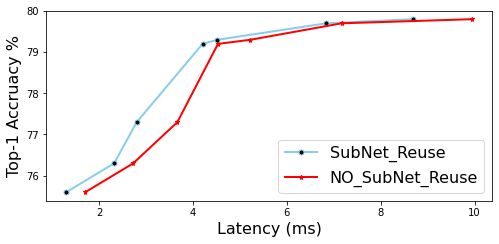

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
x = [i for i in range(9)]

"""
Searched Pareto Frontier Model
"""
accuracy_list = np.array([75.59999767, 76.29999735, 77.29999743,   79.19999737, 79.29999699,  79.69999708, 79.79999794])

with_subnet_reuse_bf16 = np.array([1.300594832, 2.3217117315555544, 2.801579917968254, 4.204646314412697, 4.522320005841269, 6.838557777015871, 8.678892403555551])
without_subnet_reuse_bf16 = np.array( [1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265])
# accuracy_list = np.array([79.0, 78.5, 76.0, 73.5])
# with_subnet_reuse_bf16 = np.array([29.151817413105412, 20.51699425641025, 14.006419145299143, 7.6721716011396])
# without_subnet_reuse_bf16 = np.array([29.372191555555574, 26.093473629629646, 15.012274655270657, 8.416883133903132])

sort_index = np.argsort(accuracy_list)
accuracy_list = np.sort(accuracy_list)
without_subnet_reuse_bf16 = without_subnet_reuse_bf16[sort_index]
with_subnet_reuse_bf16 = with_subnet_reuse_bf16[sort_index]

df=pd.DataFrame({'x_values': accuracy_list, 'SubNet_Reuse': with_subnet_reuse_bf16,  "NO_SubNet_Reuse":without_subnet_reuse_bf16})

# multiple line plots
fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.plot( 'SubNet_Reuse', 'x_values', data=df, marker='o', markerfacecolor='black', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'NO_SubNet_Reuse', 'x_values', data=df, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)

# show legend
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.ylabel("Top-1 Accruacy %", fontsize=BIGGER_SIZE)
plt.xlabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
# plt.xticks([6,10,15,20])
# plt.yticks([5, 10, 15])

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# for i,j in zip(x,with_subnet_reuse_bf16):
#     # if i % 2 == 0:
#     plt.annotate(f"{j:.2f}",xy=(i*0.98,j*1.02), fontsize=SMALL_SIZE)

# show graph
plt.legend(['SubNet_Reuse', 'NO_SubNet_Reuse'],loc="best")
fig1.show()
# fig1.savefig("latency_comparison_with_subnet_reuse_mbv3.pdf", bbox_inches="tight", transparent=True)

# ResNet 50 Comparsion with and without SubNet reuse

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
x = [i for i in range(27)]
"""
First tentative implementation
"""
# with_subnet_reuse_int8 = [1.7977812421652413, 2.485615042735042, 3.980888433048433, 2.615057686609687, 3.7034105071225074, 5.98372923076923, 4.218737504273506, 5.660882051282053, 9.262046450142448, 2.165814518518518, 3.0202896410256406, 4.8683674985754966, 3.1708667806267816, 4.538529094017094, 7.34555733333333, 5.097679680911684, 6.905132490028494, 11.350318678062672, 2.62648041025641, 3.647596854700855, 5.8484791794871755, 3.8193084900284915, 5.466280296296298, 8.800018051282052, 6.141302062678065, 8.31406313390314, 13.6032711111111]
# without_subnet_reuse_int8 = [1.7993411282051273, 2.4865597720797714, 3.980888433048433, 2.6153872592592595, 3.7034105071225074, 5.98372923076923, 4.218737504273506, 5.660882051282053, 9.262046450142448, 2.1673744045584042, 3.02123437037037, 4.8683674985754966, 3.171196353276354, 4.538529094017094, 7.34555733333333, 5.097679680911684, 6.905132490028494, 11.350318678062672, 2.6280402962962963, 3.648541584045584, 5.8484791794871755, 3.8196380626780644, 5.466280296296298, 8.800018051282052, 6.141302062678065, 8.31406313390314, 13.6032711111111]

# with_subnet_reuse_bf16=np.array([1.8124609230769222, 2.4924230883190877, 3.9815486495726495, 2.62351837037037, 3.70474913960114, 5.98372923076923, 4.220409162393164, 5.661340079772081, 9.262046450142448, 2.1927688660968654, 3.0329097207977207, 4.869687931623931, 3.1865929344729347, 4.541206358974359, 7.34555733333333, 5.101022997151, 6.906048547008551, 11.350318678062672, 2.665709424501424, 3.666028968660969, 5.850459829059827, 3.8423001139601145, 5.470296193732196, 8.800018051282052, 6.14631703703704, 8.315437219373225, 13.6032711111111])
# without_subnet_reuse_bf16=np.array([1.9192542792022786, 2.5934024615384605, 4.061517059829059, 2.7214632250712256, 3.7738503019943033, 6.045527965811965, 4.308478461538463, 5.725651464387466, 9.319555487179489, 2.3263609914529915, 3.1578939487179483, 4.96044154985755, 3.3099458233618244, 4.6177753618233615, 7.410511965811963, 5.207339202279203, 6.974034370370374, 11.40841233048433, 2.8261003190883196, 3.815018051282051, 5.951998655270654, 3.9910610370370385, 5.554333037037038, 8.868128581196578, 6.270880148148149, 8.387097481481486, 13.661949378917376])
# accuracy_list = np.array([4.3, 10.9, 23.3, 7.9, 20.2, 30.6, 25.4, 29.8, 36.3, 13.3, 34.2, 49.9, 34.3, 50.6, 56.7, 60.6, 61.2, 61.8, 32.1, 58.9, 71.4, 63.2, 75.4, 77.2, 79.0, 81.0, 81.3])

"""
After applying the pareto frontier -> put minimal SubNet on-chip
"""
# with_subnet_reuse_bf16 = np.array([1.8124609230769222, 2.7890610142450143, 3.4128680113960117, 3.5030228831908827, 6.682543589743592, 13.6032711111111])
# without_subnet_reuse_bf16 = np.array([1.9192542792022786, 2.8874036239316245, 3.5092012877492884, 3.598035350427351, 6.788234336182338, 13.661949378917376])
# accuracy_list = np.array([74.9, 77.7, 78.9, 78.7, 80.3, 80.1])

# with_subnet_reuse_bf16 = np.array([1.8124609230769222, 2.7890610142450143, 3.4128680113960117, 3.5030228831908827])#, 6.682543589743592, 13.6032711111111])
# without_subnet_reuse_bf16 = np.array([1.9192542792022786, 2.8874036239316245, 3.5092012877492884, 3.598035350427351])#, 6.788234336182338, 13.661949378917376])
# accuracy_list = np.array([74.9, 77.7, 78.9, 78.7])#, 80.3, 80.1])
# with_subnet_reuse_bf16 = np.array([1.8124609230769222, 2.7890610142450143, 3.4128680113960117, 3.5030228831908827, 6.682543589743592])#, 13.6032711111111])
# without_subnet_reuse_bf16 = np.array([1.9192542792022786, 2.8874036239316245, 3.5092012877492884, 3.598035350427351, 6.788234336182338])#, 13.661949378917376])
# accuracy_list = np.array([74.9, 77.7, 78.9, 78.7, 80.3])#, 80.1])

"""
After putting largest SubNet on-chip
"""
# with_subnet_reuse_bf16 = [1.8124609230769222, 2.7890610142450143, 3.4128680113960117, 3.5030228831908827, 6.682543589743592, 13.6032711111111]
# without_subnet_reuse_bf16 = np.array([1.9192542792022786, 2.8874036239316245, 3.5092012877492884, 3.598035350427351, 6.788234336182338])#, 13.661949378917376])

"""
Official released models
"""
# accuracy_list = np.array([81.2, 80.1, 80.3, 80.3, 79.6, 79.8, 78.6, 77.4])
# with_subnet_reuse_bf16 = np.array([7.260532900284904, 6.8392346438746445, 5.368463407407409, 6.045931737891738, 4.587985230769231, 4.3725446153846175, 3.2617154188034183, 2.2805018803418795])
# without_subnet_reuse_bf16 = np.array([7.267889037037039, 6.845125925925926, 5.372271692307694, 6.049740022792024, 4.595341367521368, 4.379900752136754, 3.270822427350428, 2.291478917378917])

accuracy_list = np.array([79.8, 79.7, 79.0, 78.3, 76.3, 75])
with_subnet_reuse_bf16 = np.array([1.9566877478095248, 1.7928749478095238, 1.6705232860952386, 1.2582706872380949, 0.8870021279999997, 0.6092448799999998])
without_subnet_reuse_bf16 = np.array([2.0645717302857154, 1.9015897691428565, 1.791777642666667, 1.3634897097142853, 0.9667830857142854, 0.6886213699047617] )

sort_index = np.argsort(accuracy_list)
accuracy_list = np.sort(accuracy_list)
without_subnet_reuse_bf16 = without_subnet_reuse_bf16[sort_index]
with_subnet_reuse_bf16 = with_subnet_reuse_bf16[sort_index]

df=pd.DataFrame({'x_values': accuracy_list, 'SubNet_Reuse': with_subnet_reuse_bf16,  "NO_SubNet_Reuse":without_subnet_reuse_bf16})

# multiple line plots
fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.plot( 'SubNet_Reuse', 'x_values', data=df, marker='o', markerfacecolor='black', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'NO_SubNet_Reuse', 'x_values', data=df, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)

# plt.plot( 'x_values', 'SubNet_Reuse', data=df, marker='o', markerfacecolor='black', markersize=5, color='skyblue', linewidth=2)
# plt.plot( 'x_values', 'NO_SubNet_Reuse', data=df, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)

# show legend
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.ylabel("Top-1 Accruacy %", fontsize=BIGGER_SIZE)
plt.xlabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
# plt.xticks([6,10,15,20])
# plt.yticks([5, 10, 15])

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# for i,j in zip(x,with_subnet_reuse_bf16):
#     # if i % 2 == 0:
#     plt.annotate(f"{j:.2f}",xy=(i*0.98,j*1.02), fontsize=SMALL_SIZE)
# show graph

plt.legend(['SubNet_Reuse', 'NO_SubNet_Reuse'],loc="upper left")
fig1.show()
fig1.savefig("latency_comparison_with_subnet_reuse_resnet50.pdf", bbox_inches="tight", transparent=True)


# ResNet 50 Pareto Frontier

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[1.9566877478095248, 1.7928749478095238, 1.6705232860952386, 1.2582706872380949, 0.8870021279999997, 0.6092448799999998]
latency_list = [2.0645717302857154, 1.9015897691428565, 1.791777642666667, 1.3634897097142853, 0.9667830857142854, 0.6886213699047617] 
accuracy_list = [79.8, 79.7, 79.0, 78.3, 76.3, 75]

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

df=pd.DataFrame({'accuracy': accuracy_list, 'latency': latency_list})

# multiple line plots
fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.plot(latency_list, accuracy_list, markersize=0, color="grey", linewidth=2)

for id in range(len(latency_list)):
    plt.plot(latency_list[id], accuracy_list[id], marker=shape_list[id], markerfacecolor=color_list[id], markersize=10, color=color_list[id], linewidth=2)

# plt.plot( 'x_values', 'SubNet_Reuse', data=df, marker='o', markerfacecolor='black', markersize=5, color='skyblue', linewidth=2)
# plt.plot( 'x_values', 'NO_SubNet_Reuse', data=df, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)

# show legend

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.ylabel("Top-1 Accruacy %", fontsize=BIGGER_SIZE)
plt.xlabel("Latency (ms)", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
# plt.xticks([6,10,15,20])
plt.yticks([74,76,78,80,82])

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for i,j,legend in zip(latency_list, accuracy_list, legend_list):
    plt.annotate(f"{legend}", xy=(i*0.99,j*1.005), fontsize=MEDIUM_SIZE)

# plt.legend(legend_list,loc="best")
fig1.show()
fig1.savefig("pareto_curve_resnet50.pdf", bbox_inches="tight", transparent=True)

# 150 Queries of MobileNet V3 figure latency

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


latency_list_without_subnet_reuse = [5.22405303974603, 9.945319733841265, 1.706521718857143, 9.945319733841265, 7.166322341587298, 7.166322341587298, 2.7270463806984124, 3.667757006222222, 2.7270463806984124, 7.166322341587298, 5.22405303974603, 3.667757006222222, 1.706521718857143, 7.166322341587298, 1.706521718857143, 2.7270463806984124, 7.166322341587298, 1.706521718857143, 2.7270463806984124, 4.532410878984124, 2.7270463806984124, 2.7270463806984124, 9.945319733841265, 7.166322341587298, 5.22405303974603, 5.22405303974603, 4.532410878984124, 9.945319733841265, 7.166322341587298, 1.706521718857143, 4.532410878984124, 1.706521718857143, 4.532410878984124, 2.7270463806984124, 3.667757006222222, 7.166322341587298, 7.166322341587298, 5.22405303974603, 7.166322341587298, 1.706521718857143, 7.166322341587298, 1.706521718857143, 7.166322341587298, 4.532410878984124, 2.7270463806984124, 2.7270463806984124, 7.166322341587298, 1.706521718857143, 9.945319733841265, 7.166322341587298, 1.706521718857143, 5.22405303974603, 3.667757006222222, 7.166322341587298, 4.532410878984124, 5.22405303974603, 3.667757006222222, 9.945319733841265, 9.945319733841265, 1.706521718857143, 7.166322341587298, 4.532410878984124, 4.532410878984124, 7.166322341587298, 7.166322341587298, 2.7270463806984124, 3.667757006222222, 5.22405303974603, 4.532410878984124, 1.706521718857143, 9.945319733841265, 1.706521718857143, 7.166322341587298, 5.22405303974603, 3.667757006222222, 5.22405303974603, 9.945319733841265, 3.667757006222222, 1.706521718857143, 7.166322341587298, 4.532410878984124, 1.706521718857143, 1.706521718857143, 5.22405303974603, 7.166322341587298, 3.667757006222222, 2.7270463806984124, 1.706521718857143, 5.22405303974603, 4.532410878984124, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 5.22405303974603, 5.22405303974603, 9.945319733841265, 4.532410878984124, 9.945319733841265, 4.532410878984124, 4.532410878984124, 4.532410878984124, 3.667757006222222, 4.532410878984124, 9.945319733841265, 4.532410878984124, 7.166322341587298, 9.945319733841265, 5.22405303974603, 4.532410878984124, 3.667757006222222, 5.22405303974603, 5.22405303974603, 1.706521718857143, 4.532410878984124, 4.532410878984124, 1.706521718857143, 4.532410878984124, 7.166322341587298, 9.945319733841265, 9.945319733841265, 7.166322341587298, 2.7270463806984124, 1.706521718857143, 3.667757006222222, 3.667757006222222, 3.667757006222222, 1.706521718857143, 3.667757006222222, 9.945319733841265, 2.7270463806984124, 5.22405303974603, 1.706521718857143, 5.22405303974603, 5.22405303974603, 9.945319733841265, 2.7270463806984124, 4.532410878984124, 2.7270463806984124, 5.22405303974603, 9.945319733841265, 9.945319733841265, 2.7270463806984124, 3.667757006222222, 7.166322341587298, 9.945319733841265, 2.7270463806984124, 9.945319733841265, 1.706521718857143, 1.706521718857143, 3.667757006222222, 9.945319733841265, 5.22405303974603, 2.7270463806984124, 9.945319733841265, 1.706521718857143, 9.945319733841265, 1.706521718857143, 4.532410878984124, 2.7270463806984124, 1.706521718857143, 5.22405303974603, 4.532410878984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 9.945319733841265, 7.166322341587298, 9.945319733841265, 5.22405303974603, 4.532410878984124, 1.706521718857143, 1.706521718857143, 1.706521718857143, 9.945319733841265, 9.945319733841265]

latency_list_with_subnet_reuse = [3.7183974946031753, 7.804351329269842, 1.298823942857143, 8.678892403555551, 6.075021905015876, 6.079341941587302, 1.9240691746031746, 2.414511556825396, 1.9238480972698406, 6.112843911873017, 3.7220771227936513, 2.392653508825396, 1.2992513531428576, 6.838557777015871, 1.3001249622857145, 2.3217117315555544, 6.112843911873017, 1.3001249622857145, 2.3217117315555544, 3.415432051555555, 1.9456170897777778, 1.9263409978412693, 7.812126341841269, 6.075021905015876, 3.7220771227936513, 3.7183974946031753, 3.413255320126984, 7.805909052698415, 6.075021905015876, 1.3001249622857145, 4.204646314412697, 1.2995328251428573, 4.204646314412697, 1.9456170897777778, 2.414511556825396, 6.107522610539685, 6.079341941587302, 3.7220771227936513, 6.109421581968255, 1.3001249622857145, 6.838557777015871, 1.3001249622857145, 6.838557777015871, 3.407356037841269, 1.9456170897777778, 1.9263409978412693, 6.112843911873017, 1.3001249622857145, 8.678892403555551, 6.075021905015876, 1.3001249622857145, 4.522320005841269, 2.392653508825396, 6.107522610539685, 3.407356037841269, 3.7268981412063495, 2.392653508825396, 7.803018081269839, 7.3969113109841285, 1.298823942857143, 6.838557777015871, 3.407356037841269, 3.4037781635555553, 6.109482668444446, 6.079341941587302, 1.9240691746031746, 2.414511556825396, 3.7192343098412697, 3.413255320126984, 1.2995328251428573, 8.678892403555551, 1.298823942857143, 6.838557777015871, 3.7220771227936513, 2.392653508825396, 3.7192343098412697, 7.804351329269842, 2.385722213333334, 1.2992513531428576, 6.838557777015871, 3.407356037841269, 1.2995328251428573, 1.300594832, 4.522320005841269, 6.109421581968255, 2.39381570615873, 1.9238480972698406, 1.2999736114285718, 4.522320005841269, 3.413255320126984, 1.2995328251428573, 2.3217117315555544, 2.414511556825396, 3.7192343098412697, 3.7183974946031753, 7.804351329269842, 3.401415941841269, 7.805909052698415, 3.401415941841269, 3.4037781635555553, 3.4037781635555553, 2.4229990377142854, 3.411615969269841, 7.805909052698415, 3.401415941841269, 6.109482668444446, 7.623881587555557, 3.7133389427301595, 3.413255320126984, 2.4229990377142854, 3.7192343098412697, 3.7183974946031753, 1.3021094468571428, 4.204646314412697, 3.4037781635555553, 1.2995328251428573, 4.204646314412697, 6.109482668444446, 7.623881587555557, 7.3969113109841285, 6.075021905015876, 1.9240691746031746, 1.2999736114285718, 2.801579917968254, 2.390591282539682, 2.390591282539682, 1.2992513531428576, 2.801579917968254, 7.803018081269839, 1.9201920759365074, 3.7276691441269847, 1.3021094468571428, 4.522320005841269, 3.7183974946031753, 7.804351329269842, 1.9201920759365074, 3.415432051555555, 1.9456170897777778, 3.7276691441269847, 7.804351329269842, 7.3969113109841285, 1.9201920759365074, 2.414511556825396, 6.107522610539685, 7.623881587555557, 1.9201920759365074, 7.812126341841269, 1.298823942857143, 1.300594832, 2.801579917968254, 7.803018081269839, 3.7133389427301595, 1.926216426412698, 7.812126341841269, 1.298823942857143, 8.678892403555551, 1.298823942857143, 4.204646314412697, 1.9456170897777778, 1.2999736114285718, 4.522320005841269, 3.413255320126984, 2.4229990377142854, 3.411615969269841, 3.7268981412063495, 7.804351329269842, 6.075021905015876, 7.623881587555557, 3.7133389427301595, 3.413255320126984, 1.2995328251428573, 1.300594832, 1.300594832, 8.678892403555551, 7.3969113109841285]

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(latency_list_without_subnet_reuse))], latency_list_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(latency_list_with_subnet_reuse))], latency_list_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (Random distribution)")
plt.ylabel("Individual Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'], loc="upper left")
plt.show()
fig1.savefig("mbv3_individual_latency_curve_number_query_random_distribution.pdf", bbox_inches="tight", transparent=True)
print(f"average improvement for mbv3-random distributino is {np.mean(latency_list_with_subnet_reuse)/np.mean(latency_list_without_subnet_reuse)}")
print(f"average improvement for mbv3-random distribution is {np.mean(latency_list_without_subnet_reuse)/np.mean(latency_list_with_subnet_reuse)}")


In [ ]:
latency_list_without_subnet_reuse = [5.22405303974603, 9.945319733841265, 1.706521718857143, 9.945319733841265, 7.166322341587298, 7.166322341587298, 2.7270463806984124, 3.667757006222222, 2.7270463806984124, 7.166322341587298, 5.22405303974603, 3.667757006222222, 1.706521718857143, 7.166322341587298, 1.706521718857143, 2.7270463806984124, 7.166322341587298, 1.706521718857143, 2.7270463806984124, 4.532410878984124, 2.7270463806984124, 2.7270463806984124, 9.945319733841265, 7.166322341587298, 5.22405303974603, 5.22405303974603, 4.532410878984124, 9.945319733841265, 7.166322341587298, 1.706521718857143, 4.532410878984124, 1.706521718857143, 4.532410878984124, 2.7270463806984124, 3.667757006222222, 7.166322341587298, 7.166322341587298, 5.22405303974603, 7.166322341587298, 1.706521718857143, 7.166322341587298, 1.706521718857143, 7.166322341587298, 4.532410878984124, 2.7270463806984124, 2.7270463806984124, 7.166322341587298, 1.706521718857143, 9.945319733841265, 7.166322341587298, 1.706521718857143, 5.22405303974603, 3.667757006222222, 7.166322341587298, 4.532410878984124, 5.22405303974603, 3.667757006222222, 9.945319733841265, 9.945319733841265, 1.706521718857143, 7.166322341587298, 4.532410878984124, 4.532410878984124, 7.166322341587298, 7.166322341587298, 2.7270463806984124, 3.667757006222222, 5.22405303974603, 4.532410878984124, 1.706521718857143, 9.945319733841265, 1.706521718857143, 7.166322341587298, 5.22405303974603, 3.667757006222222, 5.22405303974603, 9.945319733841265, 3.667757006222222, 1.706521718857143, 7.166322341587298, 4.532410878984124, 1.706521718857143, 1.706521718857143, 5.22405303974603, 7.166322341587298, 3.667757006222222, 2.7270463806984124, 1.706521718857143, 5.22405303974603, 4.532410878984124, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 5.22405303974603, 5.22405303974603, 9.945319733841265, 4.532410878984124, 9.945319733841265, 4.532410878984124, 4.532410878984124, 4.532410878984124, 3.667757006222222, 4.532410878984124, 9.945319733841265, 4.532410878984124, 7.166322341587298, 9.945319733841265, 5.22405303974603, 4.532410878984124, 3.667757006222222, 5.22405303974603, 5.22405303974603, 1.706521718857143, 4.532410878984124, 4.532410878984124, 1.706521718857143, 4.532410878984124, 7.166322341587298, 9.945319733841265, 9.945319733841265, 7.166322341587298, 2.7270463806984124, 1.706521718857143, 3.667757006222222, 3.667757006222222, 3.667757006222222, 1.706521718857143, 3.667757006222222, 9.945319733841265, 2.7270463806984124, 5.22405303974603, 1.706521718857143, 5.22405303974603, 5.22405303974603, 9.945319733841265, 2.7270463806984124, 4.532410878984124, 2.7270463806984124, 5.22405303974603, 9.945319733841265, 9.945319733841265, 2.7270463806984124, 3.667757006222222, 7.166322341587298, 9.945319733841265, 2.7270463806984124, 9.945319733841265, 1.706521718857143, 1.706521718857143, 3.667757006222222, 9.945319733841265, 5.22405303974603, 2.7270463806984124, 9.945319733841265, 1.706521718857143, 9.945319733841265, 1.706521718857143, 4.532410878984124, 2.7270463806984124, 1.706521718857143, 5.22405303974603, 4.532410878984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 9.945319733841265, 7.166322341587298, 9.945319733841265, 5.22405303974603, 4.532410878984124, 1.706521718857143, 1.706521718857143, 1.706521718857143, 9.945319733841265, 9.945319733841265]

latency_list_with_subnet_reuse = [3.7183974946031753, 7.804351329269842, 1.298823942857143, 8.678892403555551, 6.075021905015876, 6.079341941587302, 1.9240691746031746, 2.414511556825396, 1.9238480972698406, 6.112843911873017, 3.7220771227936513, 2.392653508825396, 1.2992513531428576, 6.838557777015871, 1.3001249622857145, 2.3217117315555544, 6.112843911873017, 1.3001249622857145, 2.3217117315555544, 3.415432051555555, 1.9456170897777778, 1.9263409978412693, 7.812126341841269, 6.075021905015876, 3.7220771227936513, 3.7183974946031753, 3.413255320126984, 7.805909052698415, 6.075021905015876, 1.3001249622857145, 4.204646314412697, 1.2995328251428573, 4.204646314412697, 1.9456170897777778, 2.414511556825396, 6.107522610539685, 6.079341941587302, 3.7220771227936513, 6.109421581968255, 1.3001249622857145, 6.838557777015871, 1.3001249622857145, 6.838557777015871, 3.407356037841269, 1.9456170897777778, 1.9263409978412693, 6.112843911873017, 1.3001249622857145, 8.678892403555551, 6.075021905015876, 1.3001249622857145, 4.522320005841269, 2.392653508825396, 6.107522610539685, 3.407356037841269, 3.7268981412063495, 2.392653508825396, 7.803018081269839, 7.3969113109841285, 1.298823942857143, 6.838557777015871, 3.407356037841269, 3.4037781635555553, 6.109482668444446, 6.079341941587302, 1.9240691746031746, 2.414511556825396, 3.7192343098412697, 3.413255320126984, 1.2995328251428573, 8.678892403555551, 1.298823942857143, 6.838557777015871, 3.7220771227936513, 2.392653508825396, 3.7192343098412697, 7.804351329269842, 2.385722213333334, 1.2992513531428576, 6.838557777015871, 3.407356037841269, 1.2995328251428573, 1.300594832, 4.522320005841269, 6.109421581968255, 2.39381570615873, 1.9238480972698406, 1.2999736114285718, 4.522320005841269, 3.413255320126984, 1.2995328251428573, 2.3217117315555544, 2.414511556825396, 3.7192343098412697, 3.7183974946031753, 7.804351329269842, 3.401415941841269, 7.805909052698415, 3.401415941841269, 3.4037781635555553, 3.4037781635555553, 2.4229990377142854, 3.411615969269841, 7.805909052698415, 3.401415941841269, 6.109482668444446, 7.623881587555557, 3.7133389427301595, 3.413255320126984, 2.4229990377142854, 3.7192343098412697, 3.7183974946031753, 1.3021094468571428, 4.204646314412697, 3.4037781635555553, 1.2995328251428573, 4.204646314412697, 6.109482668444446, 7.623881587555557, 7.3969113109841285, 6.075021905015876, 1.9240691746031746, 1.2999736114285718, 2.801579917968254, 2.390591282539682, 2.390591282539682, 1.2992513531428576, 2.801579917968254, 7.803018081269839, 1.9201920759365074, 3.7276691441269847, 1.3021094468571428, 4.522320005841269, 3.7183974946031753, 7.804351329269842, 1.9201920759365074, 3.415432051555555, 1.9456170897777778, 3.7276691441269847, 7.804351329269842, 7.3969113109841285, 1.9201920759365074, 2.414511556825396, 6.107522610539685, 7.623881587555557, 1.9201920759365074, 7.812126341841269, 1.298823942857143, 1.300594832, 2.801579917968254, 7.803018081269839, 3.7133389427301595, 1.926216426412698, 7.812126341841269, 1.298823942857143, 8.678892403555551, 1.298823942857143, 4.204646314412697, 1.9456170897777778, 1.2999736114285718, 4.522320005841269, 3.413255320126984, 2.4229990377142854, 3.411615969269841, 3.7268981412063495, 7.804351329269842, 6.075021905015876, 7.623881587555557, 3.7133389427301595, 3.413255320126984, 1.2995328251428573, 1.300594832, 1.300594832, 8.678892403555551, 7.3969113109841285]

sum_without_subnet_reuse = np.cumsum(latency_list_without_subnet_reuse)
sum_with_subnet_reuse = np.cumsum(latency_list_with_subnet_reuse)

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(sum_without_subnet_reuse))], sum_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(sum_with_subnet_reuse))], sum_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (Random distribution)")
plt.ylabel("Overall Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'],loc="upper left")
plt.show()
fig1.savefig("mbv3_accumulated_latency_curve_number_query_random_distribution.pdf", bbox_inches="tight", transparent=True)


In [ ]:
latency_list_with_subnet_reuse= [1.300594832, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557]
latency_list_without_subnet_reuse = [1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265]

sum_without_subnet_reuse = np.cumsum(latency_list_without_subnet_reuse)
sum_with_subnet_reuse = np.cumsum(latency_list_with_subnet_reuse)

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(latency_list_without_subnet_reuse))], latency_list_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(latency_list_with_subnet_reuse))], latency_list_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (seesaw distribution)")
plt.ylabel("Individual Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'], loc="upper left")
plt.show()
fig1.savefig("mbv3_individual_latency_curve_number_query_seesaw_distribution.pdf", bbox_inches="tight", transparent=True)
print(f"average improvement for mbv3-seesaw distributino is {np.mean(latency_list_with_subnet_reuse)/np.mean(latency_list_without_subnet_reuse)}")
print(f"average improvement for mbv3-seesaw distribution is {np.mean(latency_list_without_subnet_reuse)/np.mean(latency_list_with_subnet_reuse)}")


In [ ]:
latency_list_with_subnet_reuse= [1.300594832, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557, 1.298823942857143, 2.3217117315555544, 2.414511556825396, 3.411615969269841, 3.7268981412063495, 6.109421581968255, 7.623881587555557]
latency_list_without_subnet_reuse = [1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265, 1.706521718857143, 2.7270463806984124, 3.667757006222222, 4.532410878984124, 5.22405303974603, 7.166322341587298, 9.945319733841265]

sum_without_subnet_reuse = np.cumsum(latency_list_without_subnet_reuse)
sum_with_subnet_reuse = np.cumsum(latency_list_with_subnet_reuse)

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(sum_without_subnet_reuse))], sum_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(sum_with_subnet_reuse))], sum_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (seesaw distribution)")
plt.ylabel("Overall Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'],loc="upper left")
plt.show()
fig1.savefig("mbv3_accumulated_latency_curve_number_query_seesaw_distribution.pdf", bbox_inches="tight", transparent=True)


# 150 Queries of ResNet 50 figure latency

In [ ]:
latency_list_without_subnet_reuse = [2.0645717302857154, 1.463268507428571, 1.9015897691428565, 0.43136479999999994, 0.6240256000000002, 1.463268507428571, 2.0645717302857154, 0.43136479999999994, 0.43136479999999994, 0.6240256000000002, 1.9015897691428565, 2.0645717302857154, 1.9015897691428565, 0.6240256000000002, 1.1002186697142857, 1.9015897691428565, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 1.463268507428571, 1.9015897691428565, 1.1002186697142857, 1.9015897691428565, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 0.6240256000000002, 0.6240256000000002, 0.43136479999999994, 2.0645717302857154, 0.6240256000000002, 0.6240256000000002, 2.0645717302857154, 0.6240256000000002, 0.6240256000000002, 0.43136479999999994, 1.9015897691428565, 0.6240256000000002, 0.43136479999999994, 0.43136479999999994, 2.0645717302857154, 1.463268507428571, 1.1002186697142857, 0.6240256000000002, 0.43136479999999994, 1.463268507428571, 2.0645717302857154, 0.6240256000000002, 0.6240256000000002, 1.463268507428571, 1.9015897691428565, 0.43136479999999994, 0.6240256000000002, 1.463268507428571, 1.9015897691428565, 1.1002186697142857, 1.9015897691428565, 0.43136479999999994, 2.0645717302857154, 1.463268507428571, 0.6240256000000002, 1.1002186697142857, 0.43136479999999994, 1.9015897691428565, 0.6240256000000002, 1.1002186697142857, 1.1002186697142857, 0.6240256000000002, 0.43136479999999994, 0.6240256000000002, 1.463268507428571, 2.0645717302857154, 1.9015897691428565, 1.463268507428571, 2.0645717302857154, 0.6240256000000002, 1.463268507428571, 0.43136479999999994, 0.43136479999999994, 1.1002186697142857, 1.1002186697142857, 0.6240256000000002, 1.463268507428571, 1.9015897691428565, 1.1002186697142857, 0.43136479999999994, 0.43136479999999994, 0.6240256000000002, 0.6240256000000002, 2.0645717302857154, 1.463268507428571, 0.43136479999999994, 0.43136479999999994, 2.0645717302857154, 2.0645717302857154, 1.9015897691428565, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 1.463268507428571, 2.0645717302857154, 1.463268507428571, 2.0645717302857154, 0.43136479999999994, 1.463268507428571, 1.9015897691428565, 1.463268507428571, 1.9015897691428565, 1.9015897691428565, 2.0645717302857154, 1.9015897691428565, 0.6240256000000002, 0.43136479999999994, 1.9015897691428565, 1.1002186697142857, 0.43136479999999994, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 0.6240256000000002, 0.6240256000000002, 0.43136479999999994, 1.1002186697142857, 1.9015897691428565, 1.9015897691428565, 0.43136479999999994, 1.9015897691428565, 0.6240256000000002, 1.9015897691428565, 0.6240256000000002, 0.43136479999999994, 1.1002186697142857, 1.463268507428571, 0.6240256000000002, 1.1002186697142857, 1.9015897691428565, 1.9015897691428565, 1.1002186697142857, 1.1002186697142857, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.1002186697142857, 0.43136479999999994, 2.0645717302857154, 0.6240256000000002, 1.1002186697142857, 1.9015897691428565, 0.43136479999999994, 2.0645717302857154]

latency_list_with_subnet_reuse = [1.7988463306666673, 1.1368780228571422, 1.7046147146666668, 0.310937222857143, 0.493987005714286, 1.2494201759999994, 1.8005593729523817, 0.310937222857143, 0.310937222857143, 0.493987005714286, 1.7491458323809523, 1.8274794918095247, 1.7020791626666674, 0.430593213714286, 0.8878333782857141, 1.7466323878095238, 1.8274794918095247, 0.8734866079999997, 1.7466323878095238, 1.1300085737142849, 1.7046147146666668, 0.8782882354285712, 1.7466323878095238, 1.8274794918095247, 0.8734866079999997, 1.7466323878095238, 0.430593213714286, 0.430593213714286, 0.310937222857143, 1.9566877478095248, 0.430593213714286, 0.430593213714286, 1.8768243786666676, 0.430593213714286, 0.430593213714286, 0.310937222857143, 1.7928749478095238, 0.430593213714286, 0.310937222857143, 0.310937222857143, 1.9566877478095248, 1.1368780228571422, 0.8734866079999997, 0.430593213714286, 0.310937222857143, 1.3366679931428564, 1.8005593729523817, 0.430593213714286, 0.430593213714286, 1.2494201759999994, 1.7046147146666668, 0.310937222857143, 0.493987005714286, 1.2494201759999994, 1.7046147146666668, 0.8782882354285712, 1.7466323878095238, 0.310937222857143, 1.9566877478095248, 1.1368780228571422, 0.430593213714286, 0.8878333782857141, 0.310937222857143, 1.7928749478095238, 0.430593213714286, 0.8878333782857141, 0.8734866079999997, 0.430593213714286, 0.310937222857143, 0.493987005714286, 1.2494201759999994, 1.8005593729523817, 1.7020791626666674, 1.1300085737142849, 1.8005593729523817, 0.430593213714286, 1.2494201759999994, 0.310937222857143, 0.310937222857143, 0.9701617165714286, 0.8734866079999997, 0.430593213714286, 1.2494201759999994, 1.7046147146666668, 0.8782882354285712, 0.310937222857143, 0.310937222857143, 0.493987005714286, 0.430593213714286, 1.8768243786666676, 1.1368780228571422, 0.310937222857143, 0.310937222857143, 1.9566877478095248, 1.7988463306666673, 1.7020791626666674, 1.8274794918095247, 0.8734866079999997, 1.7466323878095238, 1.1300085737142849, 1.8005593729523817, 1.1368780228571422, 1.8005593729523817, 0.310937222857143, 1.3366679931428564, 1.7046147146666668, 1.1300085737142849, 1.7046147146666668, 1.701936314666667, 1.8274794918095247, 1.7020791626666674, 0.430593213714286, 0.310937222857143, 1.7928749478095238, 0.8782882354285712, 0.310937222857143, 1.9566877478095248, 0.8734866079999997, 1.7466323878095238, 0.430593213714286, 0.430593213714286, 0.310937222857143, 0.9701617165714286, 1.7466323878095238, 1.701936314666667, 0.310937222857143, 1.7928749478095238, 0.430593213714286, 1.7491458323809523, 0.430593213714286, 0.310937222857143, 0.9701617165714286, 1.1956338628571421, 0.430593213714286, 0.8878333782857141, 1.7466323878095238, 1.701936314666667, 0.8782882354285712, 0.8734866079999997, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 0.8734866079999997, 0.310937222857143, 1.9566877478095248, 0.430593213714286, 0.8878333782857141, 1.7466323878095238, 0.310937222857143, 1.9566877478095248]

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(latency_list_without_subnet_reuse))], latency_list_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(latency_list_with_subnet_reuse))], latency_list_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (Random distribution)")
plt.ylabel("Individual Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'], loc="upper left")
plt.show()
fig1.savefig("individual_latency_curve_number_query_random_distribution.pdf", bbox_inches="tight", transparent=True)
print(f"average improvement for resnet50-random distribution is {np.mean(latency_list_with_subnet_reuse)/np.mean(latency_list_without_subnet_reuse)}")
print(f"average improvement for resnet50-random distribution is {np.mean(latency_list_without_subnet_reuse)/np.mean(latency_list_with_subnet_reuse)}")


In [ ]:
latency_list_without_subnet_reuse = [2.0645717302857154, 1.463268507428571, 1.9015897691428565, 0.43136479999999994, 0.6240256000000002, 1.463268507428571, 2.0645717302857154, 0.43136479999999994, 0.43136479999999994, 0.6240256000000002, 1.9015897691428565, 2.0645717302857154, 1.9015897691428565, 0.6240256000000002, 1.1002186697142857, 1.9015897691428565, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 1.463268507428571, 1.9015897691428565, 1.1002186697142857, 1.9015897691428565, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 0.6240256000000002, 0.6240256000000002, 0.43136479999999994, 2.0645717302857154, 0.6240256000000002, 0.6240256000000002, 2.0645717302857154, 0.6240256000000002, 0.6240256000000002, 0.43136479999999994, 1.9015897691428565, 0.6240256000000002, 0.43136479999999994, 0.43136479999999994, 2.0645717302857154, 1.463268507428571, 1.1002186697142857, 0.6240256000000002, 0.43136479999999994, 1.463268507428571, 2.0645717302857154, 0.6240256000000002, 0.6240256000000002, 1.463268507428571, 1.9015897691428565, 0.43136479999999994, 0.6240256000000002, 1.463268507428571, 1.9015897691428565, 1.1002186697142857, 1.9015897691428565, 0.43136479999999994, 2.0645717302857154, 1.463268507428571, 0.6240256000000002, 1.1002186697142857, 0.43136479999999994, 1.9015897691428565, 0.6240256000000002, 1.1002186697142857, 1.1002186697142857, 0.6240256000000002, 0.43136479999999994, 0.6240256000000002, 1.463268507428571, 2.0645717302857154, 1.9015897691428565, 1.463268507428571, 2.0645717302857154, 0.6240256000000002, 1.463268507428571, 0.43136479999999994, 0.43136479999999994, 1.1002186697142857, 1.1002186697142857, 0.6240256000000002, 1.463268507428571, 1.9015897691428565, 1.1002186697142857, 0.43136479999999994, 0.43136479999999994, 0.6240256000000002, 0.6240256000000002, 2.0645717302857154, 1.463268507428571, 0.43136479999999994, 0.43136479999999994, 2.0645717302857154, 2.0645717302857154, 1.9015897691428565, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 1.463268507428571, 2.0645717302857154, 1.463268507428571, 2.0645717302857154, 0.43136479999999994, 1.463268507428571, 1.9015897691428565, 1.463268507428571, 1.9015897691428565, 1.9015897691428565, 2.0645717302857154, 1.9015897691428565, 0.6240256000000002, 0.43136479999999994, 1.9015897691428565, 1.1002186697142857, 0.43136479999999994, 2.0645717302857154, 1.1002186697142857, 1.9015897691428565, 0.6240256000000002, 0.6240256000000002, 0.43136479999999994, 1.1002186697142857, 1.9015897691428565, 1.9015897691428565, 0.43136479999999994, 1.9015897691428565, 0.6240256000000002, 1.9015897691428565, 0.6240256000000002, 0.43136479999999994, 1.1002186697142857, 1.463268507428571, 0.6240256000000002, 1.1002186697142857, 1.9015897691428565, 1.9015897691428565, 1.1002186697142857, 1.1002186697142857, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.1002186697142857, 0.43136479999999994, 2.0645717302857154, 0.6240256000000002, 1.1002186697142857, 1.9015897691428565, 0.43136479999999994, 2.0645717302857154]

latency_list_with_subnet_reuse = [1.7988463306666673, 1.1368780228571422, 1.7046147146666668, 0.310937222857143, 0.493987005714286, 1.2494201759999994, 1.8005593729523817, 0.310937222857143, 0.310937222857143, 0.493987005714286, 1.7491458323809523, 1.8274794918095247, 1.7020791626666674, 0.430593213714286, 0.8878333782857141, 1.7466323878095238, 1.8274794918095247, 0.8734866079999997, 1.7466323878095238, 1.1300085737142849, 1.7046147146666668, 0.8782882354285712, 1.7466323878095238, 1.8274794918095247, 0.8734866079999997, 1.7466323878095238, 0.430593213714286, 0.430593213714286, 0.310937222857143, 1.9566877478095248, 0.430593213714286, 0.430593213714286, 1.8768243786666676, 0.430593213714286, 0.430593213714286, 0.310937222857143, 1.7928749478095238, 0.430593213714286, 0.310937222857143, 0.310937222857143, 1.9566877478095248, 1.1368780228571422, 0.8734866079999997, 0.430593213714286, 0.310937222857143, 1.3366679931428564, 1.8005593729523817, 0.430593213714286, 0.430593213714286, 1.2494201759999994, 1.7046147146666668, 0.310937222857143, 0.493987005714286, 1.2494201759999994, 1.7046147146666668, 0.8782882354285712, 1.7466323878095238, 0.310937222857143, 1.9566877478095248, 1.1368780228571422, 0.430593213714286, 0.8878333782857141, 0.310937222857143, 1.7928749478095238, 0.430593213714286, 0.8878333782857141, 0.8734866079999997, 0.430593213714286, 0.310937222857143, 0.493987005714286, 1.2494201759999994, 1.8005593729523817, 1.7020791626666674, 1.1300085737142849, 1.8005593729523817, 0.430593213714286, 1.2494201759999994, 0.310937222857143, 0.310937222857143, 0.9701617165714286, 0.8734866079999997, 0.430593213714286, 1.2494201759999994, 1.7046147146666668, 0.8782882354285712, 0.310937222857143, 0.310937222857143, 0.493987005714286, 0.430593213714286, 1.8768243786666676, 1.1368780228571422, 0.310937222857143, 0.310937222857143, 1.9566877478095248, 1.7988463306666673, 1.7020791626666674, 1.8274794918095247, 0.8734866079999997, 1.7466323878095238, 1.1300085737142849, 1.8005593729523817, 1.1368780228571422, 1.8005593729523817, 0.310937222857143, 1.3366679931428564, 1.7046147146666668, 1.1300085737142849, 1.7046147146666668, 1.701936314666667, 1.8274794918095247, 1.7020791626666674, 0.430593213714286, 0.310937222857143, 1.7928749478095238, 0.8782882354285712, 0.310937222857143, 1.9566877478095248, 0.8734866079999997, 1.7466323878095238, 0.430593213714286, 0.430593213714286, 0.310937222857143, 0.9701617165714286, 1.7466323878095238, 1.701936314666667, 0.310937222857143, 1.7928749478095238, 0.430593213714286, 1.7491458323809523, 0.430593213714286, 0.310937222857143, 0.9701617165714286, 1.1956338628571421, 0.430593213714286, 0.8878333782857141, 1.7466323878095238, 1.701936314666667, 0.8782882354285712, 0.8734866079999997, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 0.8734866079999997, 0.310937222857143, 1.9566877478095248, 0.430593213714286, 0.8878333782857141, 1.7466323878095238, 0.310937222857143, 1.9566877478095248]

sum_without_subnet_reuse = np.cumsum(latency_list_without_subnet_reuse)
sum_with_subnet_reuse = np.cumsum(latency_list_with_subnet_reuse)

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(sum_without_subnet_reuse))], sum_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(sum_with_subnet_reuse))], sum_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (Random distribution)")
plt.ylabel("Overall Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'],loc="upper left")
plt.show()
fig1.savefig("accumulated_latency_curve_number_query_random_distribution.pdf", bbox_inches="tight", transparent=True)


# ResNet 50 Random Distribution

In [ ]:
latency_list_with_subnet_reuse= [0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247]
latency_list_without_subnet_reuse = [0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154]

sum_without_subnet_reuse = np.cumsum(latency_list_without_subnet_reuse)
sum_with_subnet_reuse = np.cumsum(latency_list_with_subnet_reuse)

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(latency_list_without_subnet_reuse))], latency_list_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(latency_list_with_subnet_reuse))], latency_list_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (seesaw distribution)")
plt.ylabel("Individual Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'], loc="upper left")
plt.show()
fig1.savefig("individual_latency_curve_number_query_seesaw_distribution.pdf", bbox_inches="tight", transparent=True)
print(f"average improvement for resnet50-seesaw distribution is {np.mean(latency_list_with_subnet_reuse)/np.mean(latency_list_without_subnet_reuse)}")
print(f"average improvement for resnet50-seesaw distribution is {np.mean(latency_list_without_subnet_reuse)/np.mean(latency_list_with_subnet_reuse)}")

In [ ]:
latency_list_with_subnet_reuse= [0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247, 0.310937222857143, 0.493987005714286, 0.8878333782857141, 1.1956338628571421, 1.7046147146666668, 1.8274794918095247]
latency_list_without_subnet_reuse = [0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154, 0.43136479999999994, 0.6240256000000002, 1.1002186697142857, 1.463268507428571, 1.9015897691428565, 2.0645717302857154]


sum_without_subnet_reuse = np.cumsum(latency_list_without_subnet_reuse)
sum_with_subnet_reuse = np.cumsum(latency_list_with_subnet_reuse)

fig1, ax1 = plt.subplots(figsize=(8, 3.5))
plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#6C8EBF", "#82B366", "#D79B00", "#D6B656", "#B85450", "#9673A6", "#B46504", "#23445D"]

plt.plot([i for i in range(len(sum_without_subnet_reuse))], sum_without_subnet_reuse, marker=shape_list[0], markerfacecolor=color_list[0], markersize=0, color=color_list[0], linewidth=2)
plt.plot([i for i in range(len(sum_with_subnet_reuse))], sum_with_subnet_reuse, marker=shape_list[1], markerfacecolor=color_list[1], markersize=0, linestyle='dashed', color=color_list[1], linewidth=2)
plt.xlabel("Number of Query (seesaw distribution)")
plt.ylabel("Overall Latency (ms)")
plt.legend(['NO SubNet Reuse', 'SubNet Reuse'],loc="upper left")
plt.show()
fig1.savefig("accumulated_latency_curve_number_query_seesaw_distribution.pdf", bbox_inches="tight", transparent=True)


## MAERI-like Pie Chart

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)

resource_name = [
    "Persistent Buffer",
    "Dynamic Buffer",
    "Streaming Buffer",
    "Line Buffer",
    "Execution Unit"]
value = np.array([
    10,
    40,
    10,
    20,
    20])

theme = plt.get_cmap('jet') # jet, bwr
ax1.set_prop_cycle("color", [theme(1. * i / len(resource_name))
                             for i in range(len(resource_name))])
wedges, texts, val_texts = plt.pie(value, labels=resource_name,
    autopct = "%.0f%%", textprops={'fontsize': 12})

val_texts[0].set_color("white")
val_texts[1].set_color("white")
plt.tight_layout()

## FastSwitch Pie Chart

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots(figsize=(5, 3.5))
fig1.subplots_adjust(left=0, right=0.1, top=0.1, bottom=0)

resource_name = [
    "Persistent Buffer",
    "Dynamic Buffer",
    "Streaming Buffer",
    "Line Buffer",
    "Execution Unit"]
value = np.array([
    10,
    40,
    10,
    20,
    20])

theme = plt.get_cmap('jet') # jet, bwr
ax1.set_prop_cycle("color", [theme(1. * i / len(resource_name))
                             for i in range(len(resource_name))])
wedges, texts, val_texts = plt.pie(value, labels=resource_name,
    autopct = "%.0f%%", textprops={'fontsize': 10}, radius=0.6)

val_texts[0].set_color("white")
val_texts[1].set_color("white")
fig1.tight_layout(pad=0)
fig1.savefig("fastswitch_area_pie.pdf", bbox_inches="tight", transparent=True)

Heatmap


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
data = [[195429008600,111856968322,85804824604,66773199302],
[97736103560,55946345536,42920440933,33654618100],
[65776734168,37678895213,28751736734,22550681984],
[48889651040,28426975187,21700018027,17017312448],
[39776361920,22789861743,17381149846,13634981333],
[33012456516,18906281229,14421191373,11313951995],
[28602887720,16376738355,12490031909,9799256730],
[24466424780,14289327654,10907089766,8557577598]]

cmap = sns.cm.rocket_r
ax = sns.heatmap(data, annot = True,
xticklabels=[1, 2, 3, 4],
yticklabels=[1, 2, 3, 4, 5, 6, 7, 8],
cmap=cmap)
ax.set_xlabel('XY Parallelism', fontsize=16)
ax.set_ylabel('K Parallelism', fontsize=16)
ax.invert_yaxis()
plt.ylim(0, 8)
plt.xlim(0, 4)
plt.show()

# CDF

In [ ]:
input = [1,1.001849453,1.016257813,1.022983746,1.034288279,1.045125561,1.066623557,1.069484588,1.076042992,1.079853989,1.08999222,1.096837228,1.108243566,1.122037326,1.120222124,1.003001005,1.021708443,1.044532843,1.060446826,1.079428788,1.096371897,1.128648577,1.140427636,1.155672879,1.165995189,1.179896407,1.193440787,1.208587267,1.216844335,1.226397042,1.23539365,1.014629731,1.044532843,1.070572908,1.096371897,1.124575629,1.147934813,1.188886028,1.2089244,1.224794992,1.237613209,1.253368572,1.271167904,1.28939405,1.306609274,1.313653168,1.323063107,1.021708443,1.060446826,1.096371897,1.130742896,1.165995189,1.194067506,1.241723562,1.264728821,1.28265913,1.303281517,1.327513584,1.340706801,1.356050427,1.37354303,1.377649584,1.38435843,1.032978398,1.07873236,1.121693885,1.162295502,1.206179275,1.255591865,1.286014595,1.316322959,1.332893772,1.354050722,1.3804077,1.384508645,1.399607637,1.416433937,1.423487673,1.435225653,1.044532843,1.096371897,1.147934813,1.2089244,1.237613209,1.294478883,1.329053269,1.357281536,1.378594176,1.392666716,1.409383875,1.421816289,1.441204275,1.460813823,1.474362099,1.475251314,1.054924103,1.113209999,1.171921852,1.239863726,1.270395842,1.331816572,1.364314877,1.395041257,1.421093776,1.424627382,1.441982224,1.460813833,1.478260051,1.493726581,1.566388228,1.56621741,1.060446826,1.130742896,1.202243375,1.264728821,1.303281517,1.364583866,1.400096629,1.423637644,1.448617962,1.461237764,1.479450408,1.494589577,1.515787565,1.590316192,1.070572908,1.147934813,1.224794992,1.291099206,1.349405695,1.395326596,1.421093772,1.449741049,1.468408395,1.486599309,1.506220815,1.525530916,2.296639428,1.07873236,1.162295506,1.244224399,1.316322959,1.375566262,1.41376525,1.444742945,1.47754045,1.492542162,1.51106995,1.53423294,1.088862126,1.182586574,1.261986022,1.337916337,1.399106957,1.435490039,1.466363059,1.500064998,1.514810826,1.538142375,1.096371897,1.196634617,1.28265913,1.357281536,1.414912597,1.452753691,1.492951415,1.518502996,1.538747251,1.105497765,1.211963585,1.301665679,1.376895942,1.430607298,1.472468501,1.507808683,1.539720091,2.01618617,1.113675333,1.226669602,1.318987123,1.395041257,1.4480399,1.492951415,1.523554918,1.558978275,1.122159217,1.237613209,1.332893772,1.407847782,1.464618959,1.509319889,1.544614188,1.26267462,1.373430155,1.445891808,1.498618408,1.538459742,1.148550513,1.275762054,1.395326596,1.457163999,1.509374524,1.555284027,1.155395856,1.286821076,1.404538554,1.468798395,1.522293063,1.569108427,1.16291485,1.306807555,1.41376525,1.484760131,1.535092967,1.172387184,1.328179205,1.424413338,1.497928952,1.547371887,1.179896407,1.337916337,1.435490039,1.507853054,1.559883701,1.189358097,1.34839549,1.444090433,1.51809569,1.571465959,1.196634617,1.357281536,1.452753691,1.5271105,1.206179275,1.367781826,1.462087544,1.536496004,1.211963585,1.376895942,1.472468501,1.548669566,1.21888061,1.388045543,1.482535731,1.55872067,1.226669602,1.395041257,1.499397818,1.568434063,1.230638404,1.399522096,1.508170967,2.011822751,1.237613209,1.407847782,1.513299996,1.243083017,1.419671541,1.521279911,1.251148028,1.426987556,1.528738687,1.257074685,1.435490039,1.535902032,1.268169207,1.441691974,1.543163224,1.277025452,1.447983429,1.551341637,1.28265913,1.452753691,1.559445961,1.288331185,1.459038801,1.567793769,1.29347155,1.464147171,1.573289115,1.301665679,1.472468501,1.575820232,1.307379763,1.479985904,1.304005247,1.311925927,1.490944039,1.318987123,1.497928952,1.323698645,1.502799778,1.328362068,1.507853054,1.340190856,1.511731011,1.34839549,1.51809569,1.353420627,1.523364158,1.357281536,1.5271105,1.363887213,1.532634351,1.367781826,1.536496004,1.3729743,1.544828477,1.376895942,1.55162914,1.382892822,1.555542625,1.388045543,1.561458235,1.390456681,1.565763951,1.39682165,1.571269381,1.401906198,1.575343574,1.404327811,2.011218698,1.40845721,1.57965526,1.410982647,2.231627095,1.413964389,1.416290794,1.421093772,1.423637636,1.427113596,1.432093878,1.438566075,1.441691974,1.444090433,1.447983429,1.450036211,1.452753691,1.456977877,1.459038801,1.462087544,1.464147171,1.46880852,1.474776321,1.477526585,1.482429123,1.485024968,1.488603017,1.490654431,1.495582844,1.498618408,1.500234354,1.505589887,1.506965693,1.510393799,1.511731011,1.515696236,1.51809569,1.519670742,1.523364158,1.524649542,1.5271105,1.52813994,1.532634351,1.535902032,1.537523797,1.541448837,1.543163224,1.545530542,1.549817982,1.551341637,1.553623261,1.555531453,1.559445961,1.562830555,1.565763951,1.569820757,1.571269381,1.573999888,1.575343574,1.578997415,1.580156477,1.582300842,1.58518762,2.017232889,2.276200667]

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

count, bins_count = np.histogram(input, bins=30)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color="black", marker="h")
plt.xlabel("Normalized Latency")
plt.ylabel("Probability")
plt.show()

## Stacked Bar Chart (Area)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Dynamic Buffer",
    "Streaming Buffer",
    "Line Buffer",
    "Persistent Buffer",
    "Execution Buffer"]
results = {
    'MAERI-like': [10, 15, 17, 32, 26],
    'FastSwitch': [26, 22, 29, 10, 13],
}

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)) + "%", ha='center', va='center',
                    color="black")

    fig.legend(ncol=3, bbox_to_anchor=(0.05, -0.25),
              loc='lower left')
    return fig, ax

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.tight_layout(pad=0)
fig.savefig("area_stacked.pdf", bbox_inches="tight", transparent=True)

# For the first layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Stage A",
    "Stage B",
    "Stage C",
    "Stage D",
    "Stage E",
    "Stage I"]
results = {
    'ZCU104': [23950, 720, 32, 87, 6554, 12882],
    'U96': [7740+16320, 720+720, 32, 87, 4466+2117, 8778+4161],
    'Alveo U280': [23950, 720, 32, 87, 6554, 12882]
}

accumulation = [np.sum(results["ZCU104"]), np.sum(results["U96"]), np.sum(results["Alveo U280"])]

"""
    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119

    stage_a_latency_next_tile=7740, stage_b_latency_next_tile=720, stage_e_latency=4466.0, execution_latency=13398.0, a+b-e=-4938.0
        t_k=24, t_c=3, t_x=154, t_y=226, stage_a_latency=16320, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=4466.0, stage_i_latency=8778, repeat_k=1, repeat_c=3, compute_latency=13398.0, data_transfer_latency=17159, a+b=17040, c+d=119

        stage_a_latency_next_tile=15820, stage_b_latency_next_tile=9600, stage_e_latency=2117.0, execution_latency=6351.0, a+b-e=19069.0
        t_k=24, t_c=3, t_x=73, t_y=226, stage_a_latency=7740, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=2117.0, stage_i_latency=4161, repeat_k=1, repeat_c=3, compute_latency=6351.0, data_transfer_latency=27648.0, a+b=8460, c+d=119

    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119
"""

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        idx = 0
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(int(c)/accumulation[idx]*100)) + "%", ha='center', va='center',
                    color="black")
            idx += 1

    fig.legend(ncol=3, bbox_to_anchor=(0.05, -0.25),
              loc='lower left')
    return fig, ax

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.tight_layout(pad=0)
fig.savefig("area_stacked.pdf", bbox_inches="tight", transparent=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Compute Latency",
    "Transfer Latency"]
results = {
    'ZCU104': [19662, 63467],
   
    'U96': [13398+6351, 17159+27648],
    
    'Alveo U280': [19662, 63467]
}

accumulation = [np.sum(results["ZCU104"]), np.sum(results["U96"]), np.sum(results["Alveo U280"])]

"""
    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119

    stage_a_latency_next_tile=7740, stage_b_latency_next_tile=720, stage_e_latency=4466.0, execution_latency=13398.0, a+b-e=-4938.0
        t_k=24, t_c=3, t_x=154, t_y=226, stage_a_latency=16320, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=4466.0, stage_i_latency=8778, repeat_k=1, repeat_c=3, compute_latency=13398.0, data_transfer_latency=17159, a+b=17040, c+d=119

        stage_a_latency_next_tile=15820, stage_b_latency_next_tile=9600, stage_e_latency=2117.0, execution_latency=6351.0, a+b-e=19069.0
        t_k=24, t_c=3, t_x=73, t_y=226, stage_a_latency=7740, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=2117.0, stage_i_latency=4161, repeat_k=1, repeat_c=3, compute_latency=6351.0, data_transfer_latency=27648.0, a+b=8460, c+d=119

    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119
"""

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        idx = 0
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(int(c)/accumulation[idx]*100)) + "%", ha='center', va='center',
                    color="black")
            idx += 1

    fig.legend(ncol=3, bbox_to_anchor=(0.05, -0.25),
              loc='lower left')
    return fig, ax

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.tight_layout(pad=0)
fig.savefig("area_stacked.pdf", bbox_inches="tight", transparent=True)

# For the second layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Stage A",
    "Stage B",
    "Stage C",
    "Stage D",
    "Stage E",
    "Stage I"]
results = {
    'ZCU104': [2030*6, 636240*5 + 324720, 32*6, 3*6, 29568*5 + 14784, 14],
   
    'U96': [2030*42, 84480*41+42240, 32*42, 3*42, 3696*42, 14],
    
    'Alveo U280': [2030, 3505920, 32, 3, 155232, 14]
}

accumulation = [np.sum(results["ZCU104"]), np.sum(results["U96"]), np.sum(results["Alveo U280"])]

"""
    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119

    stage_a_latency_next_tile=7740, stage_b_latency_next_tile=720, stage_e_latency=4466.0, execution_latency=13398.0, a+b-e=-4938.0
        t_k=24, t_c=3, t_x=154, t_y=226, stage_a_latency=16320, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=4466.0, stage_i_latency=8778, repeat_k=1, repeat_c=3, compute_latency=13398.0, data_transfer_latency=17159, a+b=17040, c+d=119

        stage_a_latency_next_tile=15820, stage_b_latency_next_tile=9600, stage_e_latency=2117.0, execution_latency=6351.0, a+b-e=19069.0
        t_k=24, t_c=3, t_x=73, t_y=226, stage_a_latency=7740, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=2117.0, stage_i_latency=4161, repeat_k=1, repeat_c=3, compute_latency=6351.0, data_transfer_latency=27648.0, a+b=8460, c+d=119

    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119
"""

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        idx = 0
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(int(c)/accumulation[idx]*100)) + "%", ha='center', va='center',
                    color="black")
            idx += 1

    fig.legend(ncol=6, bbox_to_anchor=(0.05, -0.25),
              loc='lower left')
    return fig, ax

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.tight_layout(pad=0)
fig.savefig("area_stacked.pdf", bbox_inches="tight", transparent=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Compute Latency",
    "Transfer Latency"]
results = {
    'ZCU104': [29568*5+14784, 608702*4+297182 +14],
   
    'U96': [3696*42, 82814*42 + 40574 + 14],
    
    'Alveo U280': [155232, 3507950]
}

accumulation = [np.sum(results["ZCU104"]), np.sum(results["U96"]), np.sum(results["Alveo U280"])]

"""
    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119

    stage_a_latency_next_tile=7740, stage_b_latency_next_tile=720, stage_e_latency=4466.0, execution_latency=13398.0, a+b-e=-4938.0
        t_k=24, t_c=3, t_x=154, t_y=226, stage_a_latency=16320, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=4466.0, stage_i_latency=8778, repeat_k=1, repeat_c=3, compute_latency=13398.0, data_transfer_latency=17159, a+b=17040, c+d=119

        stage_a_latency_next_tile=15820, stage_b_latency_next_tile=9600, stage_e_latency=2117.0, execution_latency=6351.0, a+b-e=19069.0
        t_k=24, t_c=3, t_x=73, t_y=226, stage_a_latency=7740, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=2117.0, stage_i_latency=4161, repeat_k=1, repeat_c=3, compute_latency=6351.0, data_transfer_latency=27648.0, a+b=8460, c+d=119

    stage_a_latency_next_tile=48740, stage_b_latency_next_tile=9600, stage_e_latency=6554.0, execution_latency=19662.0, a+b-e=38678.0
    t_k=24, t_c=3, t_x=226, t_y=226, stage_a_latency=23950, stage_b_latency=720, stage_c_latency=32, stage_d_latency=87, stage_e_latency=6554.0, stage_i_latency=12882, repeat_k=1, repeat_c=3, compute_latency=19662.0, data_transfer_latency=63467.0, a+b=24670, c+d=119
"""

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
ax.set_xlabel('XY Parallelism', fontsize=13)
ax.set_ylabel('K Parallelism', fontsize=13)
ax.invert_yaxis()
plt.ylim(0, 8)
plt.xlim(0, 4)

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.tight_layout(pad=0)
fig.savefig("area_stacked.pdf", bbox_inches="tight", transparent=True)

In [ ]:
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
import matplotlib.pyplot as plt
import numpy as np
  
# create data
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
x = [0, 0.6]
y1 = np.array([144921061, 345895563])
y2 = np.array([214034553, 502124535])
y3 = np.array([187084899, 444833447])
y4 = np.array([247410913, 589769501])
y5 = np.array([277009971, 667612857])
y6 = np.array([349591547, 767252377])
y7 = np.array([415766234, 1008967708])
y8 = np.array([474110110, 1127278894])
y9 = np.array([584007122, 1311829726])
barWidth = 0.25
r2 = [r1 + barWidth for r1 in x]
								
k1 = np.array([125130315, 281122239])
k2 = np.array([207971734, 441892411])
k3 = np.array([169856435, 367132723])
k4 = np.array([209081460, 500261859])
k5 = np.array([253941722, 562173355])
k6 = np.array([323940914, 662340995])
k7 = np.array([361960769, 799916506])
k8 = np.array([471761438, 892182306])
k9 = np.array([568431323, 1047020544])

pal = ["#666666", "#82B366","#6C8EBF", "#B85450", "#9673A6", "#D6B656", "#D79B00", "#e74c3c", "#34495e", "#2ecc71"]
# plot bars in stack manner

plt.bar(x, y1, width=barWidth, color=pal[0], alpha=0.5)
plt.bar(x, y2, width=barWidth, bottom=y1, color=pal[1], alpha=0.5)
plt.bar(x, y3, width=barWidth, bottom=y1+y2, color=pal[2], alpha=0.5)
plt.bar(x, y4, width=barWidth, bottom=y1+y2+y3, color=pal[3], alpha=0.5)
plt.bar(x, y5, width=barWidth, bottom=y1+y2+y3+y4, color=pal[4], alpha=0.5)
plt.bar(x, y6, width=barWidth, bottom=y1+y2+y3+y4+y5, color=pal[5], alpha=0.5)
plt.bar(x, y7, width=barWidth, bottom=y1+y2+y3+y4+y5+y6, color=pal[6], alpha=0.5)
plt.bar(x, y8, width=barWidth, bottom=y1+y2+y3+y4+y5+y6+y7, color=pal[7], alpha=0.5)
plt.bar(x, y9, width=barWidth, bottom=y1+y2+y3+y4+y5+y6+y7+y8, color=pal[8], alpha=0.5)

plt.bar(r2, k1, width=barWidth,  color=pal[0], alpha=0.5)
plt.bar(r2, k2, width=barWidth,  bottom=k1, color=pal[1], alpha=0.5)
plt.bar(r2, k3, width=barWidth,  bottom=k1+k2, color=pal[2], alpha=0.5)
plt.bar(r2, k4, width=barWidth,  bottom=k1+k2+k3, color=pal[3], alpha=0.5)
plt.bar(r2, k5, width=barWidth,  bottom=k1+k2+k3+k4, color=pal[4], alpha=0.5)
plt.bar(r2, k6, width=barWidth,  bottom=k1+k2+k3+k4+k5, color=pal[5], alpha=0.5)
plt.bar(r2, k7, width=barWidth,  bottom=k1+k2+k3+k4+k5+k6, color=pal[6], alpha=0.5)
plt.bar(r2, k8, width=barWidth,  bottom=k1+k2+k3+k4+k5+k6+k7, color=pal[7], alpha=0.5)
plt.bar(r2, k9, width=barWidth,  bottom=k1+k2+k3+k4+k5+k6+k7+k8, color=pal[8], alpha=0.5)
# plt.bar(r2, k1, width=barWidth, color=pal[0], alpha=0.5)
# plt.bar(r2, k2, width=barWidth, bottom=k1, color=pal[1], alpha=0.5)
# plt.bar(r2, k3, width=barWidth, bottom=k1+k2, color=pal[2], alpha=0.5)
# plt.bar(r2, k4, width=barWidth, bottom=k1+k2+k3, color=pal[3], alpha=0.5)
# plt.xlabel("Teams")

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.ylabel("Overall Latency (cycle)", fontsize=BIGGER_SIZE)
plt.xticks([0.125, 0.725], ["Ultra96","ZCU 104"])
# plt.title("Scores by Teams in 4 Rounds")

# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# Shrink current axis by 20%
# plt.text(0, 1, 'w/o PB', fontsize = SMALL_SIZE)#horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(x[0], y1[0]+y2[0]+y3[0]+y4[0]+y5[0]+y6[0]+y7[0]+y8[0]+y9[0], 'w/o PB', fontsize = SMALL_SIZE,horizontalalignment='center',verticalalignment='center')
plt.text(r2[0], k1[0]+k2[0]+k3[0]+k4[0]+k5[0]+k6[0]+k7[0]+k8[0]+k9[0], 'PB 12%', fontsize = SMALL_SIZE,horizontalalignment='center',verticalalignment='center')
plt.text(x[1], y1[1]+y2[1]+y3[1]+y4[1]+y5[1]+y6[1]+y7[1]+y8[1]+y9[1], 'w/o PB', fontsize = SMALL_SIZE,horizontalalignment='center',verticalalignment='center')
plt.text(r2[1], k1[1]+k2[1]+k3[1]+k4[1]+k5[1]+k6[1]+k7[1]+k8[1]+k9[1], 'PB 8%', fontsize = SMALL_SIZE,horizontalalignment='center',verticalalignment='center')
plt.subplots_adjust(right=0.7)
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width, box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(["SubNet 1", "SubNet 2", "SubNet 3", "SubNet 4", "SubNet 5", "SubNet 6", "SubNet 7", "SubNet 8", "SubNet 9"], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=BIGGER_SIZE)

plt.savefig('evaluation.pdf')  
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = [
    "Data Transfer Latency",
    "Computation Latency"]
results = {
    'BaseLine': [926985962,	197384366],
    'FastSwitch': [892131992,	197438798],
}


overall = [1089570790, 1124370328]
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

y_list = [0, 0.25]

def plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9, 2.6))
    fig.tight_layout()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        print(starts)
        ax.barh(y_list, widths, left=starts, height=0.2,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        idx = 0
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y_list[idx], str(int(c)) + " (" + str(int(c/overall[idx]*100)) + "%)", ha='center', va='center',
                    color="black",fontsize = SMALL_SIZE)
            idx += 1

    fig.legend(ncol=3, bbox_to_anchor=(0.18, -0.2),
              loc='lower left',fontsize = MEDIUM_SIZE)

    return fig, ax

fig, ax = plot(results, category_names)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.yticks(y_list, ["Baseline","FastSwitch"])

plt.show()
fig.tight_layout(pad=0)
fig.savefig("area_stacked.pdf", bbox_inches="tight", transparent=True)

## Heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
data = [[4379915796,2383443531,1778399082,1353263383],
[2275786449,1266945584,961277884,746553134],
[1561480483,888520332,684777315,541322605],
[1203362377,698334877,545664632,437881735],
[1020970367,601735739,474971375,385523389],
[872827034,522774320,417029527,342371352],
[787405068,477878363,384455976,318351998],
[686437627,423926224,344845724,288677527]]

plt.figure(figsize = (7, 3.5))
cmap = sns.cm.rocket_r
ax = sns.heatmap(data, annot = True,
xticklabels=[1, 2, 3, 4],
yticklabels=[1, 2, 3, 4, 5, 6, 7, 8],
cmap=cmap,
annot_kws={"fontsize": 13})
ax.set_xlabel('XY Parallelism', fontsize=13)
ax.set_ylabel('K Parallelism', fontsize=13)
ax.invert_yaxis()
plt.ylim(0, 8)
plt.xlim(0, 4)
plt.savefig("xy_k_parallelism_heatmap.pdf", bbox_inches="tight")
plt.show()

## Stacked Bar Chart (Resource Usage)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

df = pd.read_csv("/home/jimmy/Downloads/dse.csv")
ax = df.plot(x='Normalized Latency', kind='bar', stacked=True, figsize=(7, 3), legend=False)
labels = ["%.1f" % (float(item.get_text())) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.xaxis.set_major_locator(ticker.MultipleLocator(40))
ax.set_xlabel('Normalized Latency', fontsize=18)
ax.set_ylabel('Buffer Size (BIT)', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.23)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
fig = ax.get_figure()
fig.legend(ncol=4, bbox_to_anchor=(0.055, -0.30), fontsize=15, loc='lower left')
fig.savefig('dse_stacked.pdf', bbox_inches='tight')
fig.tight_layout()

In [ ]:
import pandas as pd

df = pd.read_csv("/home/jimmy/Downloads/dse.csv")

In [ ]:
df

In [ ]:
import pandas as pd

df = pd.read_csv("/home/jimmy/Downloads/dse.csv")

In [ ]:
df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Your x and y axis
x = [1,1.000316769,1.000746447,1.000749492,1.000749492,1.001049263,1.001066262,1.001066262,1.001290725,1.001607495,1.001888746,1.002060606,1.002297933,1.002727728,1.002816618,1.002840156,1.002865799,1.002977138,1.003125781,1.003166793,1.003483562,1.003650335,1.003678731,1.003720035,1.003747478,1.003857099,1.003874009,1.003936698,1.003995501,1.003997302,1.004190778,1.004220607,1.004368767,1.004519326,1.004540743,1.00454124,1.004685537,1.004707708,1.004733972,1.004749813,1.004861984,1.004861984,1.004963699,1.005021185,1.005050741,1.005076047,1.005076047,1.005085702,1.005085702,1.005123146,1.005132438,1.005132451,1.005176903,1.005200539,1.005224889,1.005226094,1.005226642,1.005302559,1.005337413,1.005343454,1.005344159,1.00544837,1.005460422,1.005470381,1.00547936,1.00547936,1.005548587,1.005568655,1.005568655,1.005593269,1.00559967,1.005605188,1.00567741,1.005697814,1.005715871,1.005760052,1.005854047,1.005886246,1.005887294,1.005978562,1.00605825,1.00605825,1.006156322,1.006171129,1.006239459,1.006249164,1.006249164,1.00625471,1.00630237,1.006339124,1.006351006,1.006361066,1.006381224,1.0063977,1.006439199,1.006449853,1.006465758,1.006483614,1.006526362,1.006564175,1.00656529,1.006601657,1.006619139,1.006638993,1.006638993,1.00665447,1.006667775,1.006842037,1.006842037,1.006842424,1.006934311,1.006936035,1.007073068,1.007074177,1.007075943,1.007080375,1.007134209,1.007134209,1.007139351,1.007148845,1.007167338,1.007172814,1.007180267,1.007215941,1.007215941,1.007293028,1.007298276,1.007346084,1.007372463,1.00737821,1.00737821,1.007382217,1.007384325,1.007410116,1.007478384,1.007508324,1.007509565,1.007545326,1.007557533,1.007560734,1.007560734,1.007617071,1.007617071,1.007640297,1.007640297,1.007648576,1.007657134,1.007658963,1.007674996,1.007705796,1.007737558,1.007755343,1.0077867,1.007901787,1.007943676,1.007976059,1.008137774,1.008162258,1.008286283,1.008315474,1.008324139,1.008326009,1.008472993,1.008473643,1.008475892,1.008533846,1.008587991,1.008660537,1.00867178,1.008710216,1.008730822,1.008748793,1.0087808,1.008789973,1.008829567,1.008842346,1.008889798,1.008938433,1.009000065,1.009120084,1.009134978,1.009213162,1.00930368,1.009378562,1.009400216,1.009476221,1.009476221,1.009542176,1.009625099,1.009645918,1.00964859,1.009657616,1.009657616,1.009664578,1.009716986,1.009813108,1.009813108,1.009823382,1.009873532,1.010007416,1.010010451,1.010035826,1.010135027,1.01016706,1.010171533,1.010221403,1.010242822,1.010254183,1.010293379,1.010308408,1.01031971,1.010435896,1.010452876,1.010462989,1.010471547,1.010473476,1.01051867,1.010523385,1.010559072,1.010559072,1.010572014,1.010580119,1.010771057,1.010800902,1.010836974,1.01089366,1.010952871,1.011057806,1.011080499,1.011080499,1.011111044,1.011161763,1.011173994,1.011180965,1.011187197,1.011241707,1.01138635,1.01138635,1.01140475,1.011413939,1.011416993,1.011444868,1.011444868,1.011471921,1.011531721,1.011536917,1.011559517,1.011574076,1.011599736,1.011674539,1.011692753,1.011708804,1.011719059,1.011730708,1.011770273,1.011770273,1.011800169,1.01180623,1.011817853,1.011818425,1.011886448,1.011913375,1.011916817,1.011979094,1.012055063,1.012087601,1.012116939,1.012129538,1.012133559,1.01215474,1.012175881,1.01219673,1.012230795,1.012267943,1.012289216,1.012339857,1.01236306,1.01238456,1.012393458,1.012404823,1.012515341,1.012522291,1.012522291,1.012627915,1.012627915,1.012635065,1.012644003,1.012656626,1.01270133,1.012768671,1.012782607,1.0130453,1.013072689,1.013109404,1.013109404,1.013112707,1.013212164,1.013236816,1.013274816,1.013299177,1.013314346,1.013346515,1.013357455,1.013358342,1.01336542,1.013367007,1.013367007,1.013474005,1.01349521,1.013525392,1.01354905,1.013611835,1.01364952,1.013710871,1.013824247,1.013825088,1.013898865,1.013958698,1.013979005,1.01402079,1.01403603,1.014141826,1.014218067,1.014267341,1.014305417,1.014407718,1.014416441,1.01445965,1.014528298,1.014548329,1.014632774,1.014669018,1.014700211,1.014704958,1.014704958,1.014719469,1.01474353,1.014771083,1.01479939,1.014855771,1.014856533,1.014861976,1.014861976,1.014919174,1.014919174,1.014921159,1.014921388,1.015032019,1.015178745,1.015178745,1.015242058,1.015262264,1.015301194,1.015301194,1.015345863,1.015348688,1.015424053,1.015432214,1.015432214,1.015452632,1.015452632,1.015488667,1.015602699,1.015617376,1.015657104,1.01566328,1.015678906,1.01569529,1.01569529,1.015708051,1.015708088,1.015730133,1.015730145,1.015750229,1.015769088,1.015771495,1.015794915,1.015820696,1.015820696,1.01587608,1.01587608,1.015984368,1.016094073,1.016094967,1.016158004,1.016228081,1.016323642,1.016408971,1.016410464,1.016453381,1.016712506,1.016735633,1.016756992,1.016771026,1.016836976,1.016862277,1.016961438,1.017006815,1.017082318,1.017106875,1.01711058,1.017111826,1.017134126,1.017163094,1.017211695,1.017257252,1.017257257,1.017341392,1.017482854,1.017510734,1.017510734,1.017595633,1.01769695,1.017713784,1.017722023,1.017770884,1.017916092,1.018045399,1.018061127,1.018061127,1.018139481,1.018162937,1.018169525,1.018290511,1.018367136,1.018401577,1.018407674,1.018562358,1.018563717,1.018563717,1.018624235,1.018710086,1.018752631,1.018762482,1.018773578,1.018783063,1.018801834,1.018805831,1.018807345,1.018912554,1.019030274,1.019033658,1.019074728,1.019087456,1.019158359,1.019367727,1.019377689,1.019388203,1.01941564,1.019462555,1.019462555,1.019571222,1.019652834,1.019664931,1.01972478,1.019756824,1.019784324,1.019858676,1.019858676,1.019932587,1.019943849,1.019943849,1.019964846,1.019964846,1.019970946,1.019984258,1.019991411,1.020034613,1.020150941,1.020168566,1.020171343,1.020198074,1.020486636,1.020536398,1.020536398,1.020537633,1.020540718,1.020540718,1.020577441,1.020590448,1.020671388,1.020714757,1.020820521,1.020820521,1.020820521,1.020883328,1.020910545,1.020987309,1.021034417,1.021231933,1.021231933,1.021245707,1.021274535,1.021323367,1.02132896,1.021365743,1.021415573,1.021437959,1.021437959,1.021475107,1.021610926,1.021696801,1.021737181,1.021744071,1.021744071,1.021744071,1.021848615,1.021848615,1.021848633,1.021870987,1.021906047,1.021906047,1.021906047,1.021912836,1.021973471,1.021973471,1.021973471,1.022039941,1.022074083,1.022074083,1.022127872,1.022150235,1.022186223,1.022186223,1.022205827,1.022206126,1.022384959,1.02250753,1.02250753,1.022590117,1.022597727,1.022670613,1.022702276,1.022703276,1.02271185,1.02271185,1.022949166,1.023019471,1.023069076,1.023077485,1.023077485,1.023166161,1.023183514,1.02322704,1.023333866,1.023541043,1.023541043,1.023593776,1.023641613,1.023669292,1.023669292,1.023711881,1.023865443,1.023865443,1.023949295,1.023951123,1.023951123,1.023951973,1.023951973,1.024043927,1.024050394,1.024050394,1.024070585,1.024070585,1.024132629,1.024132629,1.024274529,1.024348091,1.024348091,1.024348091,1.024373214,1.024676518,1.024840967,1.024840967,1.024883453,1.025002629,1.025269941,1.025269941,1.025350819,1.025445076,1.025468057,1.025486475,1.025486475,1.025494224,1.025504769,1.025586699,1.025586699,1.025696336,1.025761749,1.025796211,1.025806097,1.025814422,1.025903692,1.026000623,1.026052617,1.026126171,1.026331836,1.026646064,1.026646064,1.0267685,1.0267685,1.026788945,1.026788945,1.026912687,1.026961768,1.026961768,1.027085527,1.027110954,1.027315628,1.027478827,1.027478827,1.027522947,1.027615478,1.02763137,1.02763137,1.027654073,1.027699627,1.027699627,1.027754994,1.027821587,1.02785883,1.027917437,1.027917437,1.028231339,1.028426405,1.028426405,1.028451097,1.028521248,1.028521248,1.028521248,1.028641167,1.028837935,1.029006456,1.02919567,1.029237226,1.029240825,1.029240825,1.029334874,1.029349688,1.029456074,1.029668242,1.029893549,1.029893549,1.029928803,1.030115861,1.030175412,1.030175412,1.030175412,1.030201195,1.030210392,1.030348982,1.030423285,1.030561527,1.030613341,1.030620047,1.030642195,1.030678531,1.030695649,1.030696148,1.030741849,1.030752322,1.030805027,1.030826798,1.030853319,1.030988747,1.030990869,1.031031822,1.031082189,1.031117484,1.031121512,1.031121512,1.031121512,1.031125734,1.031292961,1.031323722,1.031355113,1.031355113,1.031355113,1.031391617,1.031391617,1.031416523,1.031435946,1.031497142,1.031663108,1.031663108,1.031713829,1.031736806,1.031886526,1.031894068,1.031896555,1.031896555,1.031969123,1.032013118,1.032025639,1.032088066,1.032275394,1.032316425,1.032316425,1.032358267,1.032386775,1.032454853,1.032514952,1.032703544,1.032721447,1.032757422,1.032757422,1.032782833,1.032784346,1.032815575,1.032815575,1.032862621,1.032999122,1.033111467,1.033226026,1.033265273,1.033294725,1.033314694,1.033422088,1.033424625,1.03350449,1.033534087,1.033578857,1.03359279,1.033596676,1.033735484,1.033745575,1.033758712,1.033758712,1.033808793,1.033826128,1.033826128,1.03391254,1.033951187,1.033954084,1.033967472,1.033968796,1.033982086,1.034004534,1.034182719,1.034257956,1.034320688,1.034332186,1.034494966,1.034494966,1.034520728,1.034609386,1.034634311,1.034634311,1.034637849,1.034790062,1.034819863,1.034819863,1.034983962,1.034985993,1.035109983,1.035109983,1.035122029,1.035161008,1.03521771,1.03521771,1.03526584,1.035282164,1.035300529,1.0354097,1.035514689,1.035585615,1.035663206,1.035699535,1.035808376,1.035834869,1.035937706,1.036003256,1.036015234,1.036041708,1.036041708,1.036073418,1.036109031,1.03613909,1.036168936,1.036236552,1.036241987,1.03627129,1.036283067,1.036283067,1.036332003,1.036347129,1.036404473,1.036466667,1.036537213,1.0366951,1.036709563,1.036721242,1.03673648,1.036769566,1.036776883,1.036782834,1.037045734,1.037119124,1.037331241,1.037357737,1.037447309,1.037447309,1.037543536,1.037717904,1.037717904,1.037753411,1.037753411,1.03778797,1.03778797,1.037882486,1.038013939,1.038039711,1.03806054,1.038114473,1.038157074,1.038163655,1.038176841,1.038259796,1.038274035,1.038480624,1.038526694,1.038546244,1.038609687,1.038613541,1.038680489,1.038701008,1.038701008,1.038716947,1.038717076,1.038803904,1.038820345,1.038841023,1.038867868,1.038890251,1.038917457,1.038942488,1.038979014,1.038979014,1.038979721,1.03902668,1.0390534,1.039078622,1.039116779,1.039405875,1.039408632,1.039449153,1.039449153,1.039449153,1.039601135,1.039601135,1.039691361,1.039758314,1.039758314,1.039758314,1.039766863,1.039790418,1.039811391,1.039971082,1.039971082,1.04014013,1.040257585,1.040419237,1.040464046,1.040464046,1.040466769,1.040471667,1.040631466,1.040631466,1.040680807,1.040801415,1.040840405,1.040923358,1.041020786,1.041146908,1.041324641,1.04138398,1.041432278,1.041449313,1.041452552,1.0415433,1.041591339,1.041651095,1.041664594,1.041700749,1.041725105,1.041880366,1.042135084,1.042148557,1.042553259,1.042664393,1.042757384,1.042857743,1.042884932,1.043205154,1.043571983,1.043577079,1.04360978,1.04360978,1.043638418,1.043676343,1.043766496,1.043766496,1.043820857,1.043846578,1.044052181,1.044141709,1.044249014,1.044318015,1.044454494,1.044454494,1.044454494,1.044599063,1.044818024,1.044852988,1.0449349,1.045066885,1.045084598,1.0451653,1.045232439,1.04539432,1.04539432,1.045451253,1.0455782,1.04564095,1.04570707,1.04573012,1.04573012,1.045876908,1.046023839,1.046077284,1.046202349,1.046204656,1.046290352,1.046526034,1.046622945,1.046624623,1.046671096,1.046731648,1.046875019,1.046903742,1.04700639,1.047150683,1.047169459,1.047219892,1.04730402,1.04766225,1.047776164,1.047913664,1.047913807,1.047979648,1.048077552,1.048106169,1.048232241,1.048323397,1.048388322,1.04851947,1.04878997,1.04878997,1.04896582,1.049007272,1.049007272,1.049042174,1.049092245,1.049342353,1.049437141,1.049525176,1.049535843,1.049668525,1.049740773,1.049900699,1.049900699,1.05004017,1.050082456,1.050082456,1.050082456,1.050198001,1.050310329,1.050310329,1.051079698,1.0512441,1.0512441,1.0512441,1.051271959,1.051918341,1.051918341,1.052022371,1.052111334,1.052190787,1.052193492,1.052522542,1.052651735,1.052891356,1.052896623,1.052997977,1.053274468,1.053504884,1.053510335,1.053510335,1.05359408,1.053662149,1.054015605,1.054018061,1.054098177,1.054111155,1.054518635,1.054518635,1.054612532,1.054684429,1.054762449,1.054791428,1.054817927,1.055008096,1.055080591,1.055231121,1.055231121,1.055442763,1.05546748,1.05548256,1.055656259,1.055658155,1.055658155,1.055700825,1.055753677,1.055781929,1.055996526,1.056648846,1.056907178,1.057211094,1.057410556,1.057452454,1.057452454,1.057732841,1.057930612,1.057993352,1.057993352,1.058128117,1.058128117,1.058128117,1.058353983,1.058431607,1.058604264,1.058604264,1.059117643,1.059212507,1.059272868,1.059309206,1.059309206,1.059538273,1.059764295,1.059992844,1.059995439,1.06030016,1.060792098,1.060792098,1.060812016,1.061055828,1.061306217,1.061431091,1.061639653,1.061667906,1.062045924,1.062045924,1.062045924,1.062434581,1.062465243,1.062488616,1.063282157,1.063648302,1.063935046,1.064933699,1.064969102,1.064969102,1.064969102,1.065239158,1.065239158,1.065455009,1.065708875,1.06616521,1.066888953,1.066921206,1.066921291,1.067190967,1.067444797,1.06841405,1.068825582,1.068825582,1.068915741,1.068938128,1.069002126,1.069006404,1.069398897,1.069565903,1.069891005,1.070343532,1.070605445,1.070890225,1.071672259,1.071727769,1.07214123,1.072229375,1.072229375,1.07240231,1.073845958,1.073845958,1.074386236,1.074386236,1.074402315,1.074511004,1.074511004,1.074511004,1.074737792,1.075002448,1.075359894,1.075359894,1.075805864,1.075805864,1.075890945,1.076125563,1.076125563,1.076301447,1.076450841,1.076503349,1.077643389,1.078269625,1.078360961,1.079797487,1.08009416,1.08009416,1.080207277,1.080920963,1.081240936,1.081240936,1.081286192,1.082089386,1.082269793,1.082806935,1.083621077,1.08402414,1.08402414,1.085047663,1.085047663,1.085414214,1.085642112,1.085908045,1.086141155,1.086356596,1.087117539,1.08798681,1.08798681,1.08798681,1.088195184,1.088367873,1.088504928,1.088978439,1.08952551,1.090632888,1.090632888,1.090632888,1.092177741,1.092201146,1.092201146,1.092690771,1.093030058,1.093051895,1.093051895,1.093234968,1.093304907,1.094159035,1.094159035,1.094159035,1.095129482,1.095799291,1.096209258,1.096229693,1.096515276,1.097611638,1.098403304,1.098405201,1.098548555,1.098843835,1.099950666,1.100418611,1.100766937,1.101034459,1.101034459,1.10166607,1.102420296,1.102509462,1.103950184,1.103950184,1.104328287,1.104448917,1.104948738,1.104948738,1.105025276,1.105146528,1.105380658,1.105388924,1.105388924,1.105388924,1.106670491,1.107245597,1.107507677,1.107690966,1.107763574,1.107763574,1.108747525,1.108911359,1.110218128,1.112967081,1.112967081,1.113373821,1.114823005,1.114823005,1.11528993,1.115548849,1.115839812,1.115839812,1.115839812,1.118294555,1.118648996,1.118648996,1.118887177,1.118915135,1.11905129,1.121567423,1.121567423,1.121567423,1.122105544,1.122305336,1.122305336,1.122305336,1.123002783,1.125935095,1.125936005,1.126502537,1.128140273,1.128766171,1.129312437,1.129312437,1.129811079,1.13204608,1.13204608,1.133144661,1.135650486,1.135650486,1.138846071,1.140980428,1.141775213,1.14262173,1.143216219,1.143216219,1.146665901,1.146665901,1.148353584,1.149129751,1.149788144,1.150056231,1.1504975,1.150699902,1.150699902,1.152523539,1.155932869,1.156388297,1.157170423,1.157170423,1.157170423,1.157627196,1.157735383,1.157735383,1.157855508,1.157855508,1.158479482,1.159782126,1.16030275,1.160838004,1.162559573,1.164025584,1.164332561,1.1644133,1.164859934,1.16543642,1.16543642,1.167247578,1.168343568,1.168343568,1.172870441,1.172870441,1.173653068,1.176257108,1.176257108,1.176257108,1.17874728,1.180536013,1.181538398,1.182439337,1.184901224,1.186421189,1.190961937,1.191646067,1.191646067,1.191646067,1.193585037,1.193585037,1.194309543,1.194896996,1.195724084,1.195724084,1.195724084,1.20098256,1.207464182,1.207464182,1.20860298,1.210791936,1.212571911,1.212571911,1.213182788,1.216982276,1.221768993,1.221768993,1.221768993,1.228808628,1.228808628,1.229042285,1.234296619,1.237595556,1.238400847,1.238400847,1.24834438,1.24834438,1.24834438,1.24840605,1.24840605,1.252367946,1.252367946,1.252367946,1.253277991,1.257552286,1.257552286,1.269282286,1.276584703,1.280249258,1.280249258,1.280249258,1.280729439,1.291132435,1.294003054,1.295447568,1.304169591,1.304169591,1.306583672,1.306583672,1.308742052,1.309003491,1.309846797,1.311907804,1.311907804,1.311907804,1.314131351,1.320520384,1.331387826,1.332927863,1.339848649,1.343020685,1.351479023,1.362969669,1.377863341,1.382355748,1.391613613,1.401191483,1.416579266,1.417788757,1.425376993,1.446233085,1.450324272,1.45037968,1.471003735,1.472234137,1.472905726,1.48922016,1.517635827,1.523174777,1.525694962,1.528135304]
y = [[0,0,552960,0,0,0,0,552960,552960,276480,276480,1142784,1142784,1142784,866304,866304,866304,1437696,276480,276480,276480,1437696,552960,0,276480,276480,1714176,1714176,1714176,1714176,1990656,1990656,1990656,1714176,552960,552960,866304,866304,0,1142784,0,0,0,1142784,1142784,552960,0,0,1142784,1142784,276480,1437696,1437696,1142784,552960,552960,552960,276480,276480,866304,866304,552960,276480,1437696,1437696,0,0,0,1437696,1990656,1990656,276480,866304,0,0,0,866304,276480,276480,276480,276480,276480,276480,276480,552960,276480,552960,552960,552960,0,0,552960,276480,0,0,1142784,276480,276480,276480,866304,1437696,0,0,276480,276480,1437696,0,866304,866304,866304,1142784,1142784,1142784,552960,276480,276480,1142784,866304,0,276480,552960,552960,866304,0,1142784,1142784,866304,866304,1437696,1437696,0,866304,552960,276480,1437696,1437696,1714176,552960,1437696,1437696,552960,1142784,0,866304,866304,1714176,1714176,1714176,552960,552960,2285568,2285568,2285568,866304,0,552960,1714176,1714176,1142784,552960,1142784,0,276480,1142784,866304,552960,1990656,1142784,0,0,0,1714176,866304,552960,552960,552960,552960,1142784,0,1437696,0,0,276480,276480,866304,552960,276480,552960,552960,1990656,1990656,1990656,1142784,1142784,1142784,1714176,1437696,1142784,1990656,866304,2562048,2562048,0,2285568,2285568,2285568,276480,2285568,0,1990656,1437696,1437696,1714176,1990656,276480,0,0,0,276480,276480,1714176,0,276480,276480,866304,552960,0,1714176,2562048,1714176,0,866304,866304,866304,866304,0,1714176,1714176,1714176,866304,0,552960,276480,1990656,276480,1437696,276480,552960,552960,866304,552960,552960,0,0,1142784,1142784,1142784,0,552960,276480,552960,552960,866304,276480,276480,276480,0,2285568,866304,866304,1437696,276480,1142784,1714176,1437696,1437696,1437696,1990656,276480,0,0,0,0,1990656,1990656,276480,552960,552960,552960,1437696,0,0,0,1437696,0,866304,276480,1142784,1142784,1142784,1714176,1437696,276480,276480,1142784,1714176,1714176,1990656,2562048,2562048,2562048,1142784,0,0,0,552960,866304,866304,866304,1142784,1142784,276480,866304,0,1437696,552960,552960,552960,1437696,1437696,866304,866304,276480,552960,2285568,2285568,2285568,276480,276480,276480,0,552960,276480,866304,1714176,0,0,0,0,552960,1142784,1142784,1142784,552960,276480,0,276480,866304,866304,866304,1990656,1990656,1990656,1437696,0,1142784,552960,552960,552960,276480,276480,276480,1714176,1714176,1714176,866304,0,0,0,2562048,1142784,1142784,866304,866304,552960,1437696,1437696,1437696,2285568,276480,1142784,0,866304,1990656,552960,276480,1714176,0,1437696,1142784,866304,589824,0,0,589824,589824,589824,0,0,589824,0,0,0,589824,589824,0,1769472,4128768,589824,589824,589824,0,589824,589824,0,0,4128768,589824,2949120,0,0,0,4128768,589824,2949120,589824,1769472,0,589824,589824,0,2949120,2949120,589824,2949120,0,4128768,4128768,2949120,2949120,0,4128768,4128768,589824,4128768,2949120,589824,589824,589824,2949120,589824,1769472,4128768,1769472,2949120,1769472,1769472,5308416,6488064,6488064,1769472,4128768,4128768,5308416,2949120,589824,2949120,2949120,1769472,2949120,0,0,0,2949120,0,1769472,1769472,1769472,589824,589824,589824,589824,5308416,6488064,1769472,589824,0,1769472,0,1769472,6488064,0,6488064,0,0,0,589824,0,589824,589824,0,2949120,4128768,2949120,2949120,1769472,2949120,2949120,2949120,589824,4128768,589824,6488064,5308416,5308416,5308416,0,589824,5308416,4128768,5308416,5308416,1769472,6488064,4128768,5308416,0,8847360,0,8847360,589824,589824,4128768,4128768,1769472,1769472,4128768,2949120,6488064,4128768,4128768,1769472,1769472,2949120,1769472,5308416,0,5308416,5308416,1769472,4128768,6488064,8847360,6488064,6488064,0,2949120,1769472,5308416,0,0,0,8847360,589824,1769472,1769472,1769472,1769472,6488064,1769472,1769472,0,589824,1769472,1769472,589824,589824,589824,0,589824,2949120,1769472,4128768,4128768,4128768,0,0,0,5308416,1769472,4128768,589824,2949120,7667712,4128768,0,0,589824,1769472,2949120,7667712,8847360,2949120,589824,6488064,4128768,0,0,6488064,6488064,6488064,0,1769472,5308416,6488064,5308416,5308416,2949120,4128768,5308416,5308416,1769472,2949120,1769472,6488064,6488064,4128768,6488064,6488064,6488064,589824,589824,7667712,7667712,7667712,7667712,4128768,1769472,7667712,1769472,5308416,5308416,0,0,0,2949120,2949120,589824,2949120,589824,10027008,589824,5308416,2949120,5308416,4128768,7667712,0,5308416,8847360,0,4128768,1769472,5308416,2949120,6488064,589824,2949120,589824,7667712,2949120,7667712,10027008,10027008,8847360,8847360,7667712,8847360,0,0,1769472,7667712,2949120,7667712,1769472,1769472,0,589824,4128768,8847360,7667712,2949120,1769472,6488064,4128768,1769472,7667712,7667712,4128768,2949120,5308416,0,6488064,8847360,6488064,1769472,1769472,2949120,1769472,8847360,6488064,6488064,8847360,0,5308416,2949120,5308416,1769472,589824,1769472,7667712,0,589824,7667712,8847360,8847360,6488064,0,589824,10027008,0,8847360,589824,589824,1769472,1769472,7667712,1769472,1769472,0,0,589824,0,589824,589824,589824,10027008,2949120,5308416,5308416,4128768,4128768,1769472,0,5308416,0,6488064,8847360,0,0,6488064,6488064,2949120,7667712,5308416,0,589824,8847360,1769472,1769472,6488064,6488064,589824,7667712,589824,1769472,0,5308416,2949120,0,7667712,6488064,2949120,5308416,0,6488064,1769472,7667712,4128768,6488064,0,5308416,4128768,4128768,5308416,2949120,589824,5308416,0,8847360,8847360,4128768,1769472,4128768,2949120,6488064,2949120,4128768,2949120,2949120,5308416,1769472,7667712,8847360,10027008,2949120,4128768,4128768,4128768,2949120,4128768,4128768,7667712,8847360,4128768,5308416,5308416,8847360,1769472,7667712,6488064,2949120,589824,5308416,6488064,4128768,589824,5308416,589824,589824,10027008,1769472,7667712,8847360,10027008,0,0,0,6488064,7667712,7667712,7667712,7667712,2949120,1769472,1769472,10027008,1769472,10027008,5308416,10027008,10027008,10027008,10027008,10027008,4128768,7667712,4128768,589824,10027008,4128768,10027008,4128768,4128768,4128768,10027008,8847360,6488064,6488064,7667712,7667712,10027008,10027008,8847360,8847360,5308416,6488064,5308416,6488064,6488064,2949120,589824,2949120,2949120,6488064,2949120,5308416,5308416,8847360,2949120,6488064,2949120,6488064,6488064,6488064,7667712,1769472,1769472,5308416,589824,6488064,8847360,589824,589824,10027008,2949120,7667712,5308416,5308416,2949120,0,0,7667712,10027008,10027008,2949120,2949120,589824,0,7667712,1769472,589824,10027008,589824,0,2949120,1769472,4128768,10027008,10027008,2949120,10027008,4128768,4128768,2949120,1769472,1769472,10027008,4128768,6488064,1769472,1769472,1769472,1769472,4128768,10027008,7667712,7667712,7667712,589824,10027008,4128768,0,589824,8847360,589824,2949120,589824,1769472,10027008,2949120,589824,589824,1769472,2949120,5308416,4128768,1769472,8847360,0,5308416,5308416,2949120,7667712,1769472,2949120,2949120,589824,5308416,10027008,589824,589824,8847360,2949120,5308416,1769472,0,0,589824,589824,589824,0,0,1769472,8847360,10027008,1769472,7667712,6488064,5308416,1769472,0,5308416,0,8847360,6488064,4128768,8847360,4128768,4128768,10027008,0,2949120,589824,4128768,5308416,8847360,8847360,8847360,8847360,589824,589824,6488064,6488064,0,10027008,6488064,0,1769472,4128768,2949120,0,6488064,589824,1769472,1769472,8847360,7667712,1769472,2949120,1769472,589824,7667712,0,589824,589824,0,5308416,4128768,0,6488064,1769472,5308416,10027008,4128768,7667712,5308416,589824,589824,8847360,8847360,1769472,7667712,5308416,2949120,5308416,7667712,6488064,7667712,6488064,8847360,4128768,6488064,4128768,6488064,4128768,7667712,6488064,589824,6488064,4128768,1769472,8847360,4128768,4128768,10027008,589824,2949120,10027008,10027008,1769472,10027008,8847360,4128768,589824,589824,10027008,2949120,5308416,6488064,6488064,5308416,0,7667712,2949120,2949120,6488064,2949120,4128768,589824,0,0,0,7667712,2949120,2949120,5308416,0,2949120,2949120,7667712,7667712,7667712,2949120,2949120,1769472,5308416,5308416,0,0,1769472,589824,7667712,7667712,0,7667712,8847360,4128768,1769472,0,5308416,2949120,589824,2949120,4128768,0,5308416,4128768,8847360,1769472,0,5308416,2949120,4128768,1769472,8847360,8847360,589824,1769472,4128768,589824,4128768,6488064,7667712,1769472,1769472,1769472,8847360,5308416,4128768,4128768,7667712,5308416,8847360,2949120,8847360,4128768,5308416,589824,589824,1769472,0,7667712,589824,2949120,6488064,6488064,4128768,6488064,6488064,5308416,589824,589824,0,0,589824,589824,0,1769472,0,0,7667712,0,0,6488064,1769472,8847360,8847360,7667712,589824,1769472,1769472,5308416,1769472,2949120,2949120,2949120,6488064,7667712,7667712,10027008,5308416,5308416,5308416,5308416,0,8847360,5308416,4128768,10027008,7667712,7667712,10027008,589824,0,589824,589824,1769472,1769472,1769472,10027008,10027008,5308416,10027008,4128768,0,0,0,6488064,2949120,4128768,4128768,4128768,4128768,1769472,2949120,1769472,4128768,2949120,2949120,2949120,2949120,5308416,1769472,7667712,7667712,8847360,6488064,6488064,6488064,8847360,7667712,8847360,8847360,5308416,589824,5308416,5308416,4128768,0,8847360,2949120,6488064,1769472,1769472,8847360,1769472,1769472,10027008,589824,589824,589824,7667712,0,2949120,4128768,7667712,0,0,5308416,4128768,4128768,1769472,7667712,7667712,8847360,589824,2949120,2949120,2949120,4128768,6488064,6488064,6488064,0,1769472,1769472,1769472,10027008,10027008,10027008,7667712,589824,5308416,5308416,2949120,5308416,0,0,0,589824,589824,1769472,4128768,4128768,4128768,589824,6488064,2949120,2949120,8847360,8847360,8847360,7667712,7667712,0,2949120,1769472,5308416,0,589824,7667712,4128768,6488064,10027008,2949120,1769472,589824,5308416,0,4128768,8847360,7667712,2949120],[1953792,2580480,2727936,2912256,3354624,3354624,3354624,2580480,2580480,2912256,1880064,2064384,2064384,2064384,2322432,2322432,2322432,1695744,3096576,3096576,3096576,1032192,2064384,3391488,3354624,3354624,1806336,1806336,1548288,1548288,1032192,1032192,1032192,1437696,3096576,3096576,2580480,2580480,2691072,1548288,3612672,3612672,3096576,2322432,2322432,2138112,4128768,4128768,2580480,2580480,2433024,2064384,2064384,1622016,2580480,3354624,3354624,3870720,3870720,3096576,3096576,2691072,3096576,1806336,1806336,2322432,2322432,2322432,1069056,1290240,1290240,2691072,1953792,2838528,2838528,2838528,2138112,1069056,1069056,1953792,2580480,2580480,2580480,2580480,2433024,2064384,2322432,2322432,2322432,2433024,2138112,1622016,1953792,3096576,3096576,1474560,2138112,2838528,2838528,2064384,1179648,2580480,2580480,2064384,2064384,1437696,3870720,1953792,2064384,2064384,1695744,1806336,1806336,2912256,2322432,2322432,1953792,2433024,2912256,3391488,2064384,2064384,1474560,2064384,1548288,1548288,1548288,1548288,1290240,1290240,1880064,1695744,1548288,2211840,1474560,1548288,1179648,1953792,1548288,1548288,3096576,2064384,3207168,1806336,1806336,1032192,1032192,1032192,1806336,1806336,774144,774144,774144,1548288,1953792,1953792,1290240,1290240,1032192,1880064,1069056,2101248,1622016,1437696,1622016,1474560,921600,995328,2064384,2064384,2064384,1069056,958464,995328,1069056,958464,1069056,958464,2138112,995328,1069056,1069056,1806336,1806336,995328,1695744,1806336,1548288,1548288,774144,774144,774144,1290240,1290240,1290240,995328,1032192,995328,516096,1437696,516096,516096,1622016,663552,516096,516096,1474560,516096,3612672,552960,1032192,1032192,552960,516096,1695744,1806336,1806336,1806336,1548288,3207168,1032192,1474560,1548288,1548288,1032192,1437696,1548288,516096,405504,516096,3760128,1069056,1290240,1290240,1290240,2838528,774144,774144,774144,995328,1695744,1953792,995328,663552,1437696,921600,958464,1290240,1069056,1179648,1290240,1290240,1548288,1548288,1032192,1032192,1032192,1437696,1032192,1290240,1179648,995328,1032192,1290240,1290240,1069056,995328,405504,1032192,1032192,552960,1032192,921600,663552,774144,774144,774144,516096,995328,958464,1290240,1290240,1290240,516096,516096,1179648,1032192,1032192,1032192,516096,1032192,1069056,1179648,516096,995328,921600,1032192,774144,774144,774144,516096,663552,1032192,1032192,552960,516096,516096,405504,258048,258048,258048,516096,1032192,1032192,1032192,921600,774144,774144,774144,516096,663552,921600,552960,921600,516096,774144,774144,774144,516096,516096,663552,516096,774144,552960,258048,258048,258048,552960,774144,774144,552960,516096,516096,516096,405504,516096,774144,774144,774144,663552,516096,516096,516096,516096,516096,516096,663552,516096,516096,516096,258048,258048,258048,405504,663552,405504,516096,516096,516096,516096,516096,516096,258048,258048,258048,405504,516096,516096,516096,147456,258048,258048,258048,258048,405504,258048,258048,258048,147456,405504,258048,405504,258048,147456,258048,258048,147456,258048,147456,147456,147456,8257536,8257536,8847360,8257536,8257536,8847360,8257536,8257536,8847360,8847360,8847360,8847360,8257536,13565952,8847360,7667712,7077888,12976128,11796480,13565952,13565952,8847360,7667712,8847360,9437184,8847360,7667712,7077888,7667712,8847360,7667712,7077888,13565952,8847360,8257536,7077888,13565952,11796480,11796480,7667712,6488064,6488064,11796480,7077888,11796480,5898240,5898240,8257536,8257536,12976128,8847360,8847360,8847360,5898240,6488064,8847360,8847360,10027008,6488064,8847360,10027008,8257536,8257536,7077888,7077888,7077888,8257536,4718592,4718592,8257536,7077888,7077888,5898240,7077888,8847360,11206656,11206656,8847360,8847360,8257536,10027008,10027008,7667712,8257536,7667712,8847360,8847360,8257536,14155776,7667712,14155776,8257536,4718592,8847360,10027008,10027008,7077888,11206656,6488064,4718592,8257536,7077888,14155776,12976128,12976128,10027008,14155776,9437184,9437184,12976128,8257536,5308416,8847360,8847360,8847360,9437184,10027008,10027008,11796480,8847360,12386304,7077888,7077888,8257536,8257536,12976128,9437184,5308416,6488064,4718592,4718592,8847360,5898240,5898240,5898240,14745600,4718592,10027008,4718592,12386304,12386304,8847360,8847360,11206656,11206656,8257536,8257536,4718592,10027008,8257536,8847360,8257536,8257536,7077888,7077888,12976128,5898240,7077888,8847360,5898240,5898240,4718592,4718592,4718592,7077888,7667712,7077888,8847360,7077888,15335424,12976128,4718592,7077888,11796480,12976128,11796480,12976128,4128768,11796480,10616832,16515072,12976128,7667712,9437184,10027008,7077888,7077888,11796480,12976128,7667712,11206656,7077888,7077888,6488064,10027008,7077888,7077888,5308416,8847360,10027008,10616832,10027008,4718592,10027008,15335424,15335424,15335424,8847360,10027008,5308416,4128768,6488064,7077888,5308416,8847360,11796480,11796480,5308416,5308416,5308416,11796480,11206656,8847360,4718592,5308416,7667712,11206656,7667712,5898240,5898240,11206656,8847360,12976128,6488064,7077888,8847360,7077888,7077888,4718592,11206656,15925248,5898240,5898240,5898240,4718592,5898240,10027008,4718592,12976128,8847360,7667712,7077888,13565952,11206656,5898240,5898240,15925248,5308416,6488064,3538944,13565952,7667712,10027008,6488064,7667712,5308416,15925248,6488064,4718592,6488064,8847360,10027008,8847360,5898240,4718592,11206656,8847360,11206656,4718592,11796480,4128768,3538944,3538944,4718592,4718592,4718592,4718592,11206656,11206656,12976128,5898240,8847360,4718592,5898240,5898240,15335424,7077888,10616832,2949120,4128768,5898240,6488064,7077888,7667712,5898240,4718592,4718592,8257536,11796480,8257536,7077888,5898240,3538944,7077888,10027008,5898240,5898240,12976128,5308416,4128768,8257536,5898240,15335424,4718592,8847360,4718592,5898240,5898240,14745600,5898240,17104896,14155776,6488064,2949120,2949120,8847360,6488064,7077888,2359296,5898240,4718592,16515072,16515072,5308416,5308416,5898240,5308416,7077888,16515072,16515072,6488064,5898240,5898240,5898240,5898240,4128768,13565952,4718592,4718592,4718592,4718592,13565952,17694720,7077888,6488064,4128768,4718592,5898240,5898240,8847360,8847360,5308416,4128768,9437184,17104896,5898240,3538944,15335424,15335424,4128768,4128768,5898240,4128768,15925248,5898240,5898240,10027008,4718592,17694720,4718592,6488064,11206656,4128768,17694720,7667712,13565952,6488064,11796480,8847360,17104896,4718592,4718592,4718592,4718592,11796480,16515072,8847360,17694720,3538944,3538944,5308416,14155776,4718592,4718592,4128768,4718592,11796480,4718592,4718592,4128768,5308416,7077888,5308416,4128768,11796480,11796480,4718592,4718592,12976128,4718592,4718592,3538944,3538944,11796480,8847360,10027008,4128768,15335424,7077888,9437184,12976128,16515072,8847360,7667712,10027008,5308416,10027008,5308416,5308416,4128768,15335424,3538944,4128768,3538944,5308416,5308416,5308416,7667712,3538944,3538944,8257536,8257536,4718592,15335424,15335424,4718592,14745600,4718592,10616832,4718592,4718592,2359296,2949120,2949120,4128768,7077888,12386304,15335424,2359296,4128768,2359296,4128768,12386304,12386304,3538944,5898240,3538944,3538944,3538944,7077888,4128768,2359296,5898240,5898240,4128768,8847360,4128768,3538944,3538944,12976128,15335424,14155776,14155776,8847360,14155776,4128768,4128768,5898240,13565952,3538944,4718592,9437184,9437184,8847360,8257536,4718592,4718592,10027008,15335424,8257536,4128768,4718592,4718592,4718592,13565952,7667712,10616832,10616832,12976128,4718592,4718592,7667712,2359296,2359296,4718592,4718592,5308416,5308416,3538944,4718592,4718592,4718592,4718592,4718592,4128768,13565952,11796480,3538944,4718592,4128768,4718592,4128768,4128768,4128768,4718592,4718592,5898240,11206656,3538944,4718592,4718592,4718592,4718592,11206656,4718592,2949120,2949120,2949120,4718592,5898240,12976128,20643840,4718592,8257536,4718592,15925248,17104896,17104896,2359296,15335424,17694720,19464192,4128768,15925248,3538944,12976128,17694720,2359296,21233664,3538944,3538944,4128768,7667712,4128768,4128768,4128768,19464192,3538944,2359296,4718592,4718592,2359296,13565952,12976128,18874368,4718592,4718592,19464192,20054016,17104896,20054016,4718592,4128768,2359296,5308416,18874368,8847360,11206656,3538944,15335424,4718592,11796480,20643840,2359296,10027008,13565952,7077888,3538944,14745600,2359296,21233664,16515072,20054016,14155776,11796480,2359296,2359296,2359296,7667712,4128768,4128768,2949120,2949120,21233664,5898240,11796480,4128768,17104896,15335424,14155776,4128768,11796480,17694720,4128768,4128768,2359296,10027008,17694720,15925248,19464192,19464192,8257536,17694720,19464192,20643840,21233664,12976128,14745600,20643840,11796480,15925248,11796480,6488064,3538944,9437184,2949120,4128768,4128768,7667712,8257536,18284544,10027008,12976128,16515072,12976128,8847360,10027008,8847360,11796480,6488064,15335424,11206656,15335424,11206656,15335424,8847360,11206656,20643840,2359296,3538944,16515072,7667712,3538944,3538944,1769472,21233664,17104896,1769472,1769472,21233664,7077888,2359296,15335424,21233664,21823488,7077888,17694720,13565952,12976128,12976128,13565952,21823488,2359296,17104896,3538944,12976128,3538944,15925248,21823488,23003136,4128768,4128768,2359296,3538944,3538944,14155776,23003136,17694720,15335424,2359296,2359296,2359296,17104896,3538944,3538944,2949120,2949120,23592960,19464192,20054016,23592960,2359296,2359296,23592960,2359296,2359296,16515072,21233664,24182784,15335424,17694720,17104896,15335424,12976128,19464192,15335424,13565952,7077888,19464192,19464192,11206656,15335424,3538944,20643840,8847360,8847360,21823488,21233664,2949120,17694720,13565952,13565952,11796480,3538944,3538944,3538944,8847360,11206656,2949120,2949120,2359296,15335424,7077888,3538944,1769472,17104896,2359296,3538944,3538944,3538944,3538944,2359296,3538944,19464192,2359296,2359296,17694720,2359296,2359296,12976128,23003136,24772608,24772608,3538944,3538944,3538944,3538944,21823488,3538944,3538944,8847360,25952256,25952256,2359296,3538944,1769472,1769472,2359296,3538944,17104896,17694720,12976128,2949120,2949120,2949120,2949120,2359296,8847360,8847360,1179648,2359296,2359296,2359296,2359296,3538944,1769472,2359296,2359296,1179648,1769472,1769472,1179648,2949120,2949120,2949120,2949120,2949120,2949120,2949120,1179648,1179648,2359296,1179648,2359296,2949120,2949120,2949120,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,2359296,1769472,1179648,1179648,1769472,1769472,1769472,1179648,1179648,1179648,1179648,1769472,2359296,1769472,1769472,2359296,2359296,1179648,2359296,1769472,2359296,2359296,1179648,2359296,2359296,1179648,2359296,2359296,2359296,1179648,2359296,2359296,1769472,1179648,2359296,2359296,1769472,1769472,1769472,2359296,1179648,1179648,1179648,2359296,1769472,1769472,1769472,1769472,1179648,1179648,1179648,2359296,1769472,1769472,1769472,589824,589824,589824,1179648,1769472,1179648,1179648,1769472,1179648,1769472,1769472,1769472,1769472,1769472,1769472,1179648,1179648,1179648,1769472,1179648,1179648,1179648,589824,589824,589824,589824,589824,1769472,1179648,1179648,1179648,1179648,1179648,589824,1179648,589824,589824,1179648,1179648,1179648,589824,1179648,589824,589824,589824,589824],[1585152,2101248,1953792,1658880,2396160,2396160,2396160,1843200,1843200,1105920,1105920,1474560,1474560,1474560,1658880,1658880,1658880,1216512,2211840,2211840,2211840,847872,1474560,1290240,1806336,1806336,663552,663552,847872,847872,737280,737280,737280,1032192,1658880,1658880,1400832,1400832,1843200,847872,1953792,1953792,1658880,1253376,1253376,1474560,1474560,1474560,921600,921600,1622016,737280,737280,847872,921600,1216512,1216512,1400832,1400832,1105920,1105920,921600,1105920,995328,995328,3317760,3317760,3317760,737280,479232,479232,1400832,921600,3059712,3059712,3059712,737280,737280,737280,1032192,1622016,2764800,2764800,2764800,1179648,2027520,2506752,2506752,2506752,2322432,2580480,1953792,2211840,2764800,2764800,995328,2027520,2543616,2543616,921600,1658880,3244032,3244032,3317760,3317760,1548288,737280,2101248,1843200,1843200,1806336,1622016,1622016,552960,2912256,2912256,368640,479232,552960,663552,2580480,2580480,1548288,2580480,1953792,1953792,2506752,2506752,1622016,1622016,1658880,2396160,2101248,3133440,294912,294912,1253376,2764800,1400832,1400832,552960,368640,1400832,2285568,2285568,1474560,1474560,1474560,2912256,2912256,552960,552960,552960,1400832,2764800,1658880,1179648,1179648,1400832,552960,1400832,294912,2506752,2027520,1400832,2101248,995328,1474560,3686400,3686400,3686400,184320,884736,1474560,184320,1474560,184320,331776,184320,847872,1290240,1290240,3575808,3575808,847872,3022848,3244032,3059712,3059712,1105920,1105920,1105920,2322432,2322432,2322432,294912,1843200,294912,184320,2543616,294912,294912,3059712,700416,847872,847872,2654208,737280,995328,184320,2027520,2027520,737280,184320,3612672,3870720,3870720,3870720,2654208,847872,294912,3207168,3612672,3612672,1953792,3059712,3207168,811008,294912,811008,995328,1953792,2764800,2764800,2764800,700416,1658880,1658880,1658880,2027520,4202496,479232,2027520,1179648,3575808,1953792,2027520,3244032,2580480,2912256,3465216,3465216,4165632,4165632,2580480,2580480,2580480,4055040,2580480,3686400,3317760,2580480,2949120,3944448,3944448,3133440,2580480,847872,3133440,3133440,1290240,3133440,2580480,1843200,2211840,2211840,2211840,1290240,3133440,2580480,4608000,4608000,4608000,1400832,1400832,4165632,3686400,3686400,3686400,1363968,3686400,3686400,4571136,1363968,3686400,3244032,4055040,2764800,2764800,2764800,1843200,2322432,4239360,4239360,1916928,1953792,1953792,1400832,552960,552960,552960,1953792,4792320,4792320,4792320,3870720,3317760,3317760,3317760,1953792,2764800,4202496,2469888,4866048,2396160,3870720,4018176,4018176,2506752,2506752,3465216,2506752,4423680,2912256,1105920,1105920,1105920,2912256,4571136,4571136,2912256,2912256,2912256,2506752,2101248,2912256,4976640,5124096,5124096,4165632,3133440,3133440,3133440,2912256,2912256,2912256,4608000,3686400,3686400,3686400,1658880,1658880,1658880,2654208,5087232,3207168,4239360,4239360,4239360,4792320,4792320,4792320,2211840,2211840,2211840,3760128,5345280,5345280,5345280,663552,2912256,2912256,2912256,2912256,4423680,2764800,2764800,2764800,1216512,4976640,3317760,5529600,3870720,1769472,4534272,5087232,2359296,5640192,2912256,2912256,2912256,18874368,18874368,18874368,18874368,18874368,17694720,18874368,18874368,17694720,17694720,18874368,18874368,18874368,12976128,18874368,15335424,12976128,12976128,15335424,12976128,12976128,17694720,18874368,18874368,18874368,10616832,18874368,15335424,18874368,18874368,18874368,12976128,12976128,12976128,17694720,16515072,12976128,15335424,15335424,20054016,15335424,15335424,15335424,15335424,15335424,14155776,14155776,14155776,14155776,15335424,10616832,10616832,16515072,14155776,15335424,17694720,17694720,15335424,15335424,17694720,12976128,10616832,15335424,15335424,16515072,16515072,9437184,10616832,10616832,16515072,12976128,12976128,10616832,15335424,17694720,10616832,10616832,14155776,11796480,20054016,17694720,17694720,14155776,20054016,16515072,15335424,15335424,18874368,12976128,18874368,12976128,9437184,10616832,15335424,15335424,17694720,17694720,16515072,16515072,10616832,20054016,8257536,12976128,15335424,15335424,15335424,12976128,16515072,16515072,15335424,14155776,14155776,12976128,12976128,15335424,11796480,11796480,11796480,14155776,10616832,14155776,8257536,10616832,9437184,9437184,15335424,16515072,11796480,12976128,11796480,11796480,15335424,9437184,12976128,11796480,12976128,5898240,17694720,5898240,14155776,14155776,10616832,10616832,12976128,12976128,9437184,12976128,10616832,9437184,11796480,15335424,16515072,14155776,17694720,10616832,15335424,11796480,10616832,15335424,14155776,9437184,5898240,10616832,10616832,21233664,12976128,16515072,8257536,21233664,12976128,15335424,5898240,20054016,12976128,11796480,12976128,11796480,10616832,12976128,12976128,11796480,14155776,15335424,14155776,16515072,20054016,20054016,16515072,14155776,12976128,12976128,11796480,11796480,12976128,16515072,20054016,20054016,10616832,15335424,9437184,15335424,11796480,8257536,9437184,12976128,12976128,10616832,15335424,10616832,7077888,5898240,15335424,18874368,9437184,10616832,16515072,16515072,9437184,9437184,9437184,16515072,12976128,8257536,10616832,10616832,9437184,10616832,11796480,10616832,10616832,12976128,12976128,11796480,8257536,8257536,10616832,8257536,8257536,10616832,15335424,10616832,7077888,7077888,7077888,8257536,14155776,14155776,8257536,11796480,8257536,9437184,21233664,14155776,15335424,16515072,16515072,10616832,15335424,20054016,4718592,11796480,9437184,10616832,9437184,10616832,7077888,10616832,10616832,5898240,20054016,10616832,14155776,8257536,16515072,10616832,15335424,12976128,15335424,8257536,10616832,8257536,4718592,4718592,5898240,5898240,8257536,5898240,15335424,15335424,11796480,5898240,12976128,8257536,16515072,16515072,12976128,20054016,9437184,7077888,8257536,15335424,17694720,7077888,10616832,18874368,8257536,8257536,11796480,10616832,9437184,20054016,9437184,7077888,8257536,14155776,18874368,16515072,11796480,4718592,10616832,7077888,4718592,12976128,12976128,12976128,12976128,18874368,21233664,9437184,7077888,10616832,11796480,5898240,7077888,7077888,5898240,21233664,20054016,5898240,21233664,5898240,9437184,9437184,18874368,18874368,7077888,18874368,17694720,9437184,9437184,20054016,22413312,20054016,20054016,20054016,3538944,8257536,12976128,12976128,14155776,14155776,10616832,10616832,9437184,21233664,10616832,5898240,20054016,20054016,5898240,5898240,15335424,8257536,8257536,10616832,21233664,7077888,9437184,9437184,10616832,10616832,20054016,8257536,9437184,18874368,22413312,7077888,17694720,10616832,8257536,8257536,9437184,12976128,10616832,7077888,10616832,5898240,8257536,5898240,10616832,12976128,15335424,15335424,12976128,9437184,10616832,8257536,10616832,5898240,5898240,14155776,10616832,15335424,16515072,10616832,17694720,8257536,16515072,16515072,12976128,18874368,4718592,4718592,3538944,9437184,7077888,15335424,15335424,8257536,15335424,15335424,9437184,7077888,8257536,8257536,7077888,5898240,9437184,5898240,5898240,9437184,9437184,8257536,7077888,8257536,21233664,7077888,21233664,21233664,3538944,9437184,8257536,5898240,4718592,21233664,21233664,21233664,7077888,9437184,9437184,4718592,4718592,17694720,9437184,9437184,3538944,9437184,3538944,7077888,3538944,3538944,5898240,4718592,4718592,15335424,5898240,7077888,11796480,5898240,15335424,5898240,15335424,7077888,7077888,4718592,4718592,11796480,11796480,9437184,5898240,3538944,5898240,3538944,3538944,12976128,5898240,12976128,11796480,11796480,9437184,10616832,8257536,8257536,5898240,8257536,12976128,12976128,4718592,8257536,11796480,17694720,5898240,5898240,5898240,4718592,18874368,18874368,5898240,10616832,7077888,5898240,22413312,22413312,3538944,8257536,4718592,7077888,7077888,9437184,22413312,22413312,4718592,5898240,5898240,17694720,17694720,21233664,21233664,9437184,20054016,22413312,3538944,20054016,22413312,17694720,9437184,8257536,4718592,3538944,17694720,3538944,15335424,15335424,17694720,20054016,20054016,2359296,8257536,11796480,20054016,20054016,20054016,20054016,8257536,3538944,9437184,9437184,9437184,20054016,2359296,7077888,7077888,22413312,2359296,22413312,5898240,9437184,5898240,5898240,5898240,9437184,7077888,20054016,5898240,14155776,7077888,5898240,8257536,7077888,12976128,12976128,17694720,4718592,20054016,17694720,17694720,7077888,14155776,5898240,22413312,22413312,8257536,7077888,4718592,5898240,22413312,22413312,7077888,7077888,8257536,7077888,23592960,20054016,8257536,2359296,5898240,3538944,3538944,14155776,8257536,23592960,5898240,7077888,8257536,4718592,4718592,2359296,16515072,4718592,5898240,7077888,5898240,5898240,4718592,5898240,8257536,8257536,8257536,2359296,22413312,22413312,10616832,10616832,7077888,2359296,3538944,22413312,5898240,4718592,7077888,23592960,3538944,8257536,18874368,18874368,8257536,2359296,5898240,4718592,4718592,5898240,4718592,8257536,5898240,5898240,7077888,4718592,4718592,5898240,2359296,8257536,5898240,1179648,16515072,3538944,14155776,21233664,21233664,2359296,2359296,5898240,2359296,4718592,4718592,4718592,3538944,4718592,3538944,2359296,3538944,4718592,3538944,4718592,3538944,4718592,3538944,3538944,4718592,11796480,16515072,8257536,2359296,16515072,16515072,5898240,4718592,4718592,5898240,5898240,3538944,1179648,8257536,3538944,3538944,4718592,1179648,4718592,3538944,2359296,2359296,2359296,4718592,10616832,3538944,18874368,2359296,18874368,3538944,3538944,4718592,23592960,23592960,10616832,18874368,18874368,2359296,4718592,3538944,7077888,10616832,10616832,10616832,3538944,18874368,20054016,14155776,14155776,4718592,8257536,3538944,3538944,10616832,10616832,3538944,10616832,8257536,3538944,3538944,3538944,2359296,3538944,8257536,7077888,5898240,8257536,2359296,5898240,3538944,3538944,8257536,4718592,7077888,16515072,3538944,1179648,1179648,3538944,3538944,16515072,8257536,5898240,1179648,1179648,21233664,20054016,20054016,1179648,4718592,15335424,15335424,10616832,2359296,3538944,18874368,8257536,2359296,14155776,23592960,23592960,21233664,23592960,10616832,23592960,2359296,12976128,12976128,2359296,12976128,12976128,4718592,2359296,2359296,2359296,24772608,23592960,23592960,24772608,2359296,23592960,23592960,3538944,2359296,2359296,12976128,21233664,8257536,8257536,10616832,23592960,7077888,7077888,4718592,20054016,18874368,18874368,18874368,12976128,3538944,3538944,7077888,15335424,15335424,15335424,15335424,24772608,8257536,15335424,16515072,7077888,10616832,10616832,7077888,23592960,23592960,23592960,23592960,21233664,21233664,21233664,7077888,7077888,15335424,7077888,17694720,24772608,24772608,24772608,12976128,18874368,17694720,17694720,17694720,17694720,22413312,20054016,20054016,17694720,20054016,20054016,20054016,20054016,15335424,20054016,10616832,10616832,9437184,12976128,12976128,12976128,9437184,10616832,9437184,9437184,15335424,24772608,15335424,15335424,17694720,24772608,9437184,20054016,12976128,22413312,22413312,9437184,22413312,20054016,7077888,24772608,24772608,24772608,10616832,24772608,18874368,16515072,11796480,25952256,25952256,15335424,17694720,17694720,21233664,11796480,11796480,9437184,23592960,20054016,20054016,20054016,17694720,14155776,14155776,14155776,25952256,22413312,22413312,22413312,7077888,7077888,7077888,11796480,23592960,16515072,16515072,20054016,16515072,25952256,25952256,25952256,24772608,24772608,21233664,18874368,18874368,18874368,24772608,14155776,20054016,20054016,9437184,9437184,9437184,10616832,10616832,25952256,21233664,23592960,16515072,27131904,25952256,11796480,18874368,14155776,7077888,21233664,23592960,25952256,16515072,27131904,18874368,9437184,10616832,20054016],[3538944,2359296,1179648,2359296,1179648,1179648,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,2359296,4718592,4718592,3538944,2359296,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,3538944,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,3538944,1179648,2359296,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,2359296,3538944,2359296,4718592,2359296,1179648,2359296,2359296,1179648,2359296,1179648,1179648,1179648,2359296,3538944,3538944,4718592,3538944,4718592,3538944,4718592,2359296,4718592,4718592,1179648,1179648,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,3538944,2359296,1179648,1179648,1179648,2359296,1179648,1179648,1179648,2359296,1179648,2359296,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,2359296,1179648,2359296,2359296,1179648,2359296,2359296,2359296,1179648,1179648,1179648,3538944,1179648,1179648,1179648,2359296,1179648,3538944,3538944,1179648,1179648,1179648,3538944,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,2359296,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,2359296,2359296,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,8257536,1179648,1179648,4718592,1179648,1179648,2359296,2359296,2359296,8257536,3538944,8257536,4718592,2359296,4718592,4718592,3538944,4718592,4718592,8257536,2359296,8257536,2359296,8257536,2359296,4718592,2359296,4718592,2359296,4718592,3538944,8257536,2359296,1179648,3538944,7077888,2359296,3538944,1179648,1179648,3538944,4718592,2359296,1179648,1179648,1179648,1179648,8257536,8257536,8257536,2359296,1179648,1179648,8257536,8257536,3538944,2359296,2359296,2359296,2359296,2359296,2359296,1179648,1179648,7077888,1179648,1179648,7077888,2359296,2359296,2359296,2359296,4718592,4718592,4718592,2359296,2359296,2359296,1179648,1179648,3538944,7077888,3538944,1179648,1179648,7077888,3538944,3538944,2359296,1179648,1179648,8257536,3538944,3538944,4718592,2359296,2359296,8257536,3538944,4718592,3538944,1179648,1179648,2359296,2359296,1179648,1179648,2359296,3538944,2359296,8257536,8257536,2359296,2359296,1179648,1179648,2359296,2359296,2359296,4718592,2359296,1179648,1179648,8257536,2359296,1179648,3538944,1179648,1179648,8257536,3538944,2359296,2359296,2359296,8257536,3538944,8257536,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,3538944,7077888,8257536,3538944,7077888,2359296,4718592,4718592,3538944,4718592,4718592,2359296,2359296,4718592,8257536,8257536,2359296,2359296,2359296,8257536,4718592,4718592,2359296,4718592,4718592,7077888,8257536,3538944,2359296,3538944,3538944,2359296,8257536,8257536,2359296,2359296,2359296,1179648,1179648,2359296,8257536,2359296,4718592,1179648,1179648,2359296,2359296,1179648,1179648,2359296,4718592,2359296,2359296,2359296,8257536,3538944,4718592,2359296,3538944,2359296,3538944,2359296,2359296,3538944,2359296,2359296,2359296,3538944,3538944,2359296,1179648,1179648,7077888,4718592,8257536,4718592,2359296,2359296,2359296,3538944,1179648,1179648,2359296,2359296,2359296,2359296,1179648,4718592,1179648,1179648,4718592,4718592,2359296,1179648,1179648,1179648,4718592,3538944,2359296,4718592,8257536,8257536,3538944,4718592,8257536,4718592,1179648,1179648,3538944,2359296,2359296,1179648,2359296,2359296,3538944,2359296,2359296,2359296,3538944,3538944,2359296,2359296,4718592,3538944,2359296,3538944,2359296,4718592,4718592,2359296,8257536,7077888,2359296,1179648,1179648,1179648,1179648,8257536,1179648,4718592,2359296,4718592,2359296,4718592,2359296,1179648,1179648,7077888,2359296,2359296,1179648,3538944,2359296,3538944,2359296,2359296,2359296,1179648,1179648,3538944,2359296,3538944,2359296,2359296,2359296,2359296,3538944,1179648,2359296,2359296,2359296,7077888,7077888,2359296,3538944,4718592,2359296,2359296,3538944,2359296,2359296,3538944,2359296,2359296,3538944,1179648,1179648,8257536,3538944,4718592,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,4718592,1179648,1179648,3538944,2359296,1179648,1179648,1179648,2359296,8257536,1179648,1179648,1179648,1179648,3538944,2359296,2359296,1179648,2359296,8257536,1179648,1179648,8257536,8257536,2359296,3538944,2359296,4718592,3538944,2359296,1179648,1179648,1179648,1179648,2359296,7077888,2359296,2359296,3538944,3538944,4718592,2359296,2359296,3538944,2359296,2359296,4718592,2359296,8257536,2359296,3538944,2359296,8257536,2359296,2359296,1179648,4718592,3538944,8257536,4718592,8257536,1179648,1179648,2359296,3538944,4718592,1179648,3538944,2359296,3538944,1179648,1179648,3538944,2359296,2359296,2359296,3538944,3538944,2359296,1179648,1179648,2359296,4718592,2359296,2359296,2359296,2359296,4718592,2359296,7077888,4718592,4718592,2359296,8257536,2359296,2359296,2359296,2359296,2359296,3538944,1179648,1179648,7077888,7077888,1179648,3538944,2359296,2359296,1179648,1179648,3538944,1179648,1179648,1179648,1179648,4718592,4718592,2359296,2359296,2359296,2359296,2359296,1179648,1179648,4718592,1179648,1179648,3538944,2359296,2359296,7077888,4718592,2359296,2359296,3538944,1179648,1179648,2359296,3538944,2359296,1179648,2359296,4718592,3538944,2359296,1179648,1179648,3538944,4718592,1179648,1179648,1179648,8257536,4718592,1179648,1179648,2359296,2359296,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,4718592,7077888,1179648,1179648,2359296,4718592,3538944,3538944,1179648,1179648,8257536,4718592,2359296,1179648,1179648,4718592,1179648,1179648,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,4718592,1179648,4718592,4718592,1179648,3538944,4718592,7077888,2359296,8257536,2359296,8257536,1179648,1179648,3538944,1179648,2359296,3538944,4718592,2359296,1179648,1179648,2359296,4718592,4718592,4718592,1179648,1179648,1179648,4718592,2359296,8257536,2359296,2359296,7077888,2359296,2359296,8257536,3538944,3538944,3538944,8257536,7077888,3538944,3538944,2359296,8257536,3538944,4718592,3538944,1179648,1179648,1179648,3538944,2359296,1179648,1179648,3538944,2359296,3538944,1179648,1179648,1179648,3538944,2359296,2359296,1179648,1179648,2359296,3538944,3538944,3538944,2359296,3538944,2359296,2359296,2359296,2359296,2359296,2359296,3538944,2359296,3538944,8257536,4718592,3538944,3538944,2359296,1179648,2359296,2359296,2359296,8257536,2359296,3538944,7077888,1179648,1179648,2359296,3538944,1179648,2359296,1179648,1179648,8257536,2359296,2359296,1179648,4718592,7077888,3538944,2359296,7077888,3538944,1179648,1179648,3538944,3538944,4718592,2359296,7077888,4718592,3538944,3538944,4718592,2359296,4718592,2359296,2359296,2359296,3538944,3538944,3538944,3538944,2359296,2359296,1179648,1179648,1179648,2359296,3538944,2359296,3538944,4718592,2359296,2359296,4718592,3538944,4718592,3538944,3538944,4718592,2359296,4718592,4718592,2359296,2359296,4718592,8257536,1179648,2359296,8257536,2359296,1179648,1179648,1179648,8257536,8257536,1179648,1179648,3538944,4718592,3538944,3538944,3538944,8257536,4718592,8257536,8257536,8257536,4718592,3538944,8257536,4718592,3538944,2359296,8257536,2359296,3538944,3538944,7077888,1179648,1179648,1179648,1179648,1179648,3538944,3538944,3538944,4718592,4718592,3538944,2359296,4718592,1179648,1179648,1179648,1179648,3538944,4718592,3538944,4718592,1179648,1179648,4718592,2359296,2359296,8257536,4718592,4718592,4718592,4718592,4718592,4718592,4718592,7077888,4718592,8257536,4718592,4718592,4718592,4718592,7077888,2359296,8257536,8257536,8257536,4718592,8257536,1179648,4718592,4718592,8257536,7077888,2359296,1179648,1179648,8257536,4718592,1179648,1179648,3538944,7077888,4718592,2359296,1179648,8257536,1179648,2359296,1179648,2359296,1179648,2359296,2359296,7077888,1179648,1179648,8257536,1179648,2359296,8257536,7077888,8257536,8257536,2359296,1179648,1179648,2359296,8257536,1179648,1179648,8257536,8257536,8257536,2359296,2359296,1179648,1179648,1179648,2359296,8257536,8257536,8257536,1179648,1179648,1179648,1179648,2359296,8257536,8257536,2359296,1179648,1179648,2359296,1179648,2359296,1179648,2359296,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,1179648,1179648,2359296,1179648,2359296,2359296,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,2359296,1179648,2359296,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648]]
# use a known color palette
plt.figure(figsize = (18, 7))
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=["PB Size", "SB Size", "DB Size", "OB Size"], colors=pal, alpha=0.4 )
plt.xlabel('Normalized Latency', fontsize=16)
plt.ylabel('Buffer Size (BIT)', fontsize=16)
plt.rc('font', size=14)          # controls default text sizes
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.legend(["PB Size", "SB Size", "DB Size", "OB Size"], ncol=4, bbox_to_anchor=(0.8, -0.3), fontsize=14, loc='best')
# plt.legend(loc='upper right')
plt.savefig("dse_stack.pdf", bbox_inches="tight")
plt.show()
 
# # create your palette
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
# plt.legend(loc='upper right')
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x = [1,1.002366123,1.003772452,1.003949523,1.004588379,1.004588379,1.004588379,1.005195998,1.005195998,1.005232555,1.005366215,1.005497243,1.005497243,1.005497243,1.005656644,1.005656644,1.005656644,1.005663324,1.005722995,1.005722995,1.005722995,1.005951657,1.006329836,1.006752363,1.007391851,1.007391851,1.007669201,1.007669201,1.00784782,1.00784782,1.008059856,1.008059856,1.008059856,1.00808458,1.008544895,1.008544895,1.008967048,1.008967048,1.009139398,1.009162013,1.009180139,1.009180139,1.009198142,1.009278769,1.009278769,1.010012058,1.010441778,1.010441778,1.010461898,1.010461898,1.010583672,1.010631973,1.010631973,1.010753764,1.010980206,1.011140811,1.011140811,1.011290927,1.011290927,1.011358099,1.011358099,1.01147812,1.011881356,1.012073321,1.012073321,1.012166655,1.012166655,1.012166655,1.012644149,1.013517135,1.013517135,1.013551829,1.013735913,1.013794517,1.013794517,1.013794517,1.013819889,1.014174492,1.014461644,1.014597007,1.014686875,1.014725573,1.014725573,1.014725573,1.014894295,1.014924567,1.01495546,1.01495546,1.01495546,1.015331083,1.015559705,1.016096856,1.016300066,1.01633547,1.01633547,1.016360477,1.016361965,1.016392699,1.016392699,1.016835246,1.017099785,1.017320838,1.017320838,1.017387182,1.017387182,1.017510253,1.017527581,1.018157986,1.018182514,1.018182514,1.018335789,1.018365116,1.018365116,1.018700836,1.018756637,1.018756637,1.018820065,1.01933791,1.019363982,1.019465184,1.019805053,1.019805053,1.020055158,1.02083656,1.021217075,1.021217075,1.021252017,1.021252017,1.021286027,1.021286027,1.021508403,1.021533765,1.021554262,1.021649262,1.021655738,1.021764363,1.022013004,1.022164354,1.022184547,1.022184547,1.022285807,1.022348753,1.022397554,1.022458132,1.022458132,1.022920795,1.022920795,1.022920795,1.02307036,1.02307036,1.02322504,1.02322504,1.02322504,1.023256634,1.023277273,1.023600785,1.02391955,1.02391955,1.02392705,1.024251555,1.024467438,1.024872386,1.025313349,1.025564017,1.026301942,1.026617072,1.027080768,1.027248296,1.027846546,1.027846546,1.027846546,1.028238703,1.028546049,1.02861212,1.029246342,1.029566608,1.030027902,1.03051834,1.030650761,1.031250712,1.031250852,1.031846885,1.03232693,1.03232693,1.032361276,1.032656683,1.032836599,1.033206151,1.033206151,1.033385017,1.033385017,1.033385017,1.03452819,1.03452819,1.03452819,1.035294086,1.035913442,1.036149253,1.036526272,1.036753024,1.03675839,1.03675839,1.036840803,1.036907789,1.037750656,1.037750656,1.037913814,1.038019112,1.038303676,1.038660089,1.038872057,1.038872057,1.038993862,1.039205047,1.039846995,1.041302743,1.041302743,1.041302743,1.041525019,1.042276535,1.04236989,1.042429292,1.042465052,1.042465052,1.042690477,1.042912905,1.043440249,1.043943965,1.044183901,1.044430308,1.044553197,1.044786246,1.045158253,1.045158253,1.045158253,1.04554073,1.048034949,1.048034949,1.048034949,1.04851313,1.048762959,1.049924273,1.050221485,1.050471278,1.052008054,1.052394306,1.05332392,1.05386192,1.054686147,1.055093033,1.056770654,1.056770654,1.057302341,1.057302341,1.057425125,1.057425125,1.057425125,1.057648307,1.059187098,1.059334116,1.061123979,1.063030821,1.063733159,1.064048044,1.064048044,1.064883003,1.065060541,1.065589142,1.066786992,1.066786992,1.068154962,1.068640941,1.069082359,1.069831203,1.070686651,1.070686651,1.070686651,1.070891711,1.071061655,1.072200884,1.073290654,1.073290654,1.073290654,1.074833975,1.074833975,1.075920185,1.076760732,1.076760732,1.076760732,1.077715747,1.078778353,1.079079505,1.080939379,1.081371038,1.082920774,1.083263561,1.084890629,1.087812053,1.087812053,1.087812053,1.089639203,1.09007749,1.095269709,1.095269709,1.095669982,1.097096122,1.097096122,1.097810425,1.098096761,1.098096761,1.098096761,1.101123183,1.103733297,1.103733297,1.103733297,1.104262861,1.104459476,1.104459476,1.104459476,1.108032414,1.110201631,1.110817576,1.120737195,1.122837614,1.123619761,1.124452817,1.125037854,1.125037854,1.128432682,1.128432682,1.130093529,1.131769102,1.134197177,1.137552295,1.138770171,1.138770171,1.138770171,1.139219681,1.139444362,1.139444362,1.141340345,1.142379433,1.144073627,1.145818423,1.145897878,1.14633741,1.148687088,1.154220541,1.154220541,1.154990724,1.157553357,1.157553357,1.157553357,1.161764223,1.163637282,1.166060022,1.167555818,1.172697615,1.172697615,1.172697615,1.176710787,1.176710787,1.176710787,1.181885647,1.189384895,1.197630951,1.202341554,1.202341554,1.202341554,1.228494364,1.228494364,1.228494364,1.23245395,1.23245395,1.23245395,1.256285635,1.25989192,1.25989192,1.25989192,1.274848561,1.283431894,1.283431894,1.285807588,1.285807588,1.289018826,1.291047061,1.291047061,1.291047061,1.310217329,1.321665213,1.329989055,1.355953834,1.369485462,1.402711968,1.423236426,1.449484943,1.46553996,1.493503787,1.498954662,1.501434774,1.503836311]

y = [[0,0,552960,0,0,0,0,552960,552960,276480,276480,1142784,1142784,1142784,866304,866304,866304,1437696,276480,276480,276480,1437696,552960,0,276480,276480,1714176,1714176,1714176,1714176,1990656,1990656,1990656,1714176,552960,552960,866304,866304,0,1142784,0,0,0,1142784,1142784,552960,0,0,1142784,1142784,276480,1437696,1437696,1142784,552960,552960,552960,276480,276480,866304,866304,552960,276480,1437696,1437696,0,0,0,1437696,1990656,1990656,276480,866304,0,0,0,866304,276480,276480,276480,276480,276480,276480,276480,552960,276480,552960,552960,552960,0,0,552960,276480,0,0,1142784,276480,276480,276480,866304,1437696,0,0,276480,276480,1437696,0,866304,866304,866304,1142784,1142784,1142784,552960,276480,276480,1142784,866304,0,276480,552960,552960,866304,0,1142784,1142784,866304,866304,1437696,1437696,0,866304,552960,276480,1437696,1437696,1714176,552960,1437696,1437696,552960,1142784,0,866304,866304,1714176,1714176,1714176,552960,552960,2285568,2285568,2285568,866304,0,552960,1714176,1714176,1142784,552960,1142784,0,276480,1142784,866304,552960,1990656,1142784,0,0,0,1714176,866304,552960,552960,552960,552960,1142784,0,1437696,0,0,276480,276480,866304,552960,276480,552960,552960,1990656,1990656,1990656,1142784,1142784,1142784,1714176,1437696,1142784,1990656,866304,2562048,2562048,0,2285568,2285568,2285568,276480,2285568,0,1990656,1437696,1437696,1714176,1990656,276480,0,0,0,276480,276480,1714176,0,276480,276480,866304,552960,0,1714176,2562048,1714176,0,866304,866304,866304,866304,0,1714176,1714176,1714176,866304,0,552960,276480,1990656,276480,1437696,276480,552960,552960,866304,552960,552960,0,0,1142784,1142784,1142784,0,552960,276480,552960,552960,866304,276480,276480,276480,0,2285568,866304,866304,1437696,276480,1142784,1714176,1437696,1437696,1437696,1990656,276480,0,0,0,0,1990656,1990656,276480,552960,552960,552960,1437696,0,0,0,1437696,0,866304,276480,1142784,1142784,1142784,1714176,1437696,276480,276480,1142784,1714176,1714176,1990656,2562048,2562048,2562048,1142784,0,0,0,552960,866304,866304,866304,1142784,1142784,276480,866304,0,1437696,552960,552960,552960,1437696,1437696,866304,866304,276480,552960,2285568,2285568,2285568,276480,276480,276480,0,552960,276480,866304,1714176,0,0,0,0,552960,1142784,1142784,1142784,552960,276480,0,276480,866304,866304,866304,1990656,1990656,1990656,1437696,0,1142784,552960,552960,552960,276480,276480,276480,1714176,1714176,1714176,866304,0,0,0,2562048,1142784,1142784,866304,866304,552960,1437696,1437696,1437696,2285568,276480,1142784,0,866304,1990656,552960,276480,1714176,0,1437696,1142784,866304],[1953792,2580480,2727936,2912256,3354624,3354624,3354624,2580480,2580480,2912256,1880064,2064384,2064384,2064384,2322432,2322432,2322432,1695744,3096576,3096576,3096576,1032192,2064384,3391488,3354624,3354624,1806336,1806336,1548288,1548288,1032192,1032192,1032192,1437696,3096576,3096576,2580480,2580480,2691072,1548288,3612672,3612672,3096576,2322432,2322432,2138112,4128768,4128768,2580480,2580480,2433024,2064384,2064384,1622016,2580480,3354624,3354624,3870720,3870720,3096576,3096576,2691072,3096576,1806336,1806336,2322432,2322432,2322432,1069056,1290240,1290240,2691072,1953792,2838528,2838528,2838528,2138112,1069056,1069056,1953792,2580480,2580480,2580480,2580480,2433024,2064384,2322432,2322432,2322432,2433024,2138112,1622016,1953792,3096576,3096576,1474560,2138112,2838528,2838528,2064384,1179648,2580480,2580480,2064384,2064384,1437696,3870720,1953792,2064384,2064384,1695744,1806336,1806336,2912256,2322432,2322432,1953792,2433024,2912256,3391488,2064384,2064384,1474560,2064384,1548288,1548288,1548288,1548288,1290240,1290240,1880064,1695744,1548288,2211840,1474560,1548288,1179648,1953792,1548288,1548288,3096576,2064384,3207168,1806336,1806336,1032192,1032192,1032192,1806336,1806336,774144,774144,774144,1548288,1953792,1953792,1290240,1290240,1032192,1880064,1069056,2101248,1622016,1437696,1622016,1474560,921600,995328,2064384,2064384,2064384,1069056,958464,995328,1069056,958464,1069056,958464,2138112,995328,1069056,1069056,1806336,1806336,995328,1695744,1806336,1548288,1548288,774144,774144,774144,1290240,1290240,1290240,995328,1032192,995328,516096,1437696,516096,516096,1622016,663552,516096,516096,1474560,516096,3612672,552960,1032192,1032192,552960,516096,1695744,1806336,1806336,1806336,1548288,3207168,1032192,1474560,1548288,1548288,1032192,1437696,1548288,516096,405504,516096,3760128,1069056,1290240,1290240,1290240,2838528,774144,774144,774144,995328,1695744,1953792,995328,663552,1437696,921600,958464,1290240,1069056,1179648,1290240,1290240,1548288,1548288,1032192,1032192,1032192,1437696,1032192,1290240,1179648,995328,1032192,1290240,1290240,1069056,995328,405504,1032192,1032192,552960,1032192,921600,663552,774144,774144,774144,516096,995328,958464,1290240,1290240,1290240,516096,516096,1179648,1032192,1032192,1032192,516096,1032192,1069056,1179648,516096,995328,921600,1032192,774144,774144,774144,516096,663552,1032192,1032192,552960,516096,516096,405504,258048,258048,258048,516096,1032192,1032192,1032192,921600,774144,774144,774144,516096,663552,921600,552960,921600,516096,774144,774144,774144,516096,516096,663552,516096,774144,552960,258048,258048,258048,552960,774144,774144,552960,516096,516096,516096,405504,516096,774144,774144,774144,663552,516096,516096,516096,516096,516096,516096,663552,516096,516096,516096,258048,258048,258048,405504,663552,405504,516096,516096,516096,516096,516096,516096,258048,258048,258048,405504,516096,516096,516096,147456,258048,258048,258048,258048,405504,258048,258048,258048,147456,405504,258048,405504,258048,147456,258048,258048,147456,258048,147456,147456,147456],[1585152,2101248,1953792,1658880,2396160,2396160,2396160,1843200,1843200,1105920,1105920,1474560,1474560,1474560,1658880,1658880,1658880,1216512,2211840,2211840,2211840,847872,1474560,1290240,1806336,1806336,663552,663552,847872,847872,737280,737280,737280,1032192,1658880,1658880,1400832,1400832,1843200,847872,1953792,1953792,1658880,1253376,1253376,1474560,1474560,1474560,921600,921600,1622016,737280,737280,847872,921600,1216512,1216512,1400832,1400832,1105920,1105920,921600,1105920,995328,995328,3317760,3317760,3317760,737280,479232,479232,1400832,921600,3059712,3059712,3059712,737280,737280,737280,1032192,1622016,2764800,2764800,2764800,1179648,2027520,2506752,2506752,2506752,2322432,2580480,1953792,2211840,2764800,2764800,995328,2027520,2543616,2543616,921600,1658880,3244032,3244032,3317760,3317760,1548288,737280,2101248,1843200,1843200,1806336,1622016,1622016,552960,2912256,2912256,368640,479232,552960,663552,2580480,2580480,1548288,2580480,1953792,1953792,2506752,2506752,1622016,1622016,1658880,2396160,2101248,3133440,294912,294912,1253376,2764800,1400832,1400832,552960,368640,1400832,2285568,2285568,1474560,1474560,1474560,2912256,2912256,552960,552960,552960,1400832,2764800,1658880,1179648,1179648,1400832,552960,1400832,294912,2506752,2027520,1400832,2101248,995328,1474560,3686400,3686400,3686400,184320,884736,1474560,184320,1474560,184320,331776,184320,847872,1290240,1290240,3575808,3575808,847872,3022848,3244032,3059712,3059712,1105920,1105920,1105920,2322432,2322432,2322432,294912,1843200,294912,184320,2543616,294912,294912,3059712,700416,847872,847872,2654208,737280,995328,184320,2027520,2027520,737280,184320,3612672,3870720,3870720,3870720,2654208,847872,294912,3207168,3612672,3612672,1953792,3059712,3207168,811008,294912,811008,995328,1953792,2764800,2764800,2764800,700416,1658880,1658880,1658880,2027520,4202496,479232,2027520,1179648,3575808,1953792,2027520,3244032,2580480,2912256,3465216,3465216,4165632,4165632,2580480,2580480,2580480,4055040,2580480,3686400,3317760,2580480,2949120,3944448,3944448,3133440,2580480,847872,3133440,3133440,1290240,3133440,2580480,1843200,2211840,2211840,2211840,1290240,3133440,2580480,4608000,4608000,4608000,1400832,1400832,4165632,3686400,3686400,3686400,1363968,3686400,3686400,4571136,1363968,3686400,3244032,4055040,2764800,2764800,2764800,1843200,2322432,4239360,4239360,1916928,1953792,1953792,1400832,552960,552960,552960,1953792,4792320,4792320,4792320,3870720,3317760,3317760,3317760,1953792,2764800,4202496,2469888,4866048,2396160,3870720,4018176,4018176,2506752,2506752,3465216,2506752,4423680,2912256,1105920,1105920,1105920,2912256,4571136,4571136,2912256,2912256,2912256,2506752,2101248,2912256,4976640,5124096,5124096,4165632,3133440,3133440,3133440,2912256,2912256,2912256,4608000,3686400,3686400,3686400,1658880,1658880,1658880,2654208,5087232,3207168,4239360,4239360,4239360,4792320,4792320,4792320,2211840,2211840,2211840,3760128,5345280,5345280,5345280,663552,2912256,2912256,2912256,2912256,4423680,2764800,2764800,2764800,1216512,4976640,3317760,5529600,3870720,1769472,4534272,5087232,2359296,5640192,2912256,2912256,2912256],[3538944,2359296,1179648,2359296,1179648,1179648,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,2359296,4718592,4718592,3538944,2359296,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,3538944,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,3538944,1179648,2359296,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,2359296,3538944,2359296,4718592,2359296,1179648,2359296,2359296,1179648,2359296,1179648,1179648,1179648,2359296,3538944,3538944,4718592,3538944,4718592,3538944,4718592,2359296,4718592,4718592,1179648,1179648,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,3538944,2359296,1179648,1179648,1179648,2359296,1179648,1179648,1179648,2359296,1179648,2359296,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,2359296,1179648,2359296,2359296,1179648,2359296,2359296,2359296,1179648,1179648,1179648,3538944,1179648,1179648,1179648,2359296,1179648,3538944,3538944,1179648,1179648,1179648,3538944,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,2359296,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,2359296,2359296,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648]]
plt.figure(figsize = (7, 4))
# plt.figure(figsize = (18, 7))
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=["PB Size", "SB Size", "DB Size", "OB Size"], colors=pal, alpha=0.4 )
plt.xlabel('Normalized Latency', fontsize=16)
plt.ylabel('Buffer Size (BIT)', fontsize=16)
plt.rc('font', size=14)          # controls default text sizes
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
# plt.legend(["PB Size", "SB Size", "DB Size", "OB Size"], ncol=4, bbox_to_anchor=(0.7, -0.5), fontsize=14, loc='best')
plt.legend(["PB Size", "SB Size", "DB Size", "OB Size"], ncol=4, bbox_to_anchor=(1.1, -0.17), fontsize=14, loc='best')
# plt.legend(loc='upper right')
plt.savefig("dse_stack.pdf", bbox_inches="tight")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x = [1,1.002366123,1.003772452,1.003949523,1.004588379,1.004588379,1.004588379,1.005195998,1.005195998,1.005232555,1.005366215,1.005497243,1.005497243,1.005497243,1.005656644,1.005656644,1.005656644,1.005663324,1.005722995,1.005722995,1.005722995,1.005951657,1.006329836,1.006752363,1.007391851,1.007391851,1.007669201,1.007669201,1.00784782,1.00784782,1.008059856,1.008059856,1.008059856,1.00808458,1.008544895,1.008544895,1.008967048,1.008967048,1.009139398,1.009162013,1.009180139,1.009180139,1.009198142,1.009278769,1.009278769,1.010012058,1.010441778,1.010441778,1.010461898,1.010461898,1.010583672,1.010631973,1.010631973,1.010753764,1.010980206,1.011140811,1.011140811,1.011290927,1.011290927,1.011358099,1.011358099,1.01147812,1.011881356,1.012073321,1.012073321,1.012166655,1.012166655,1.012166655,1.012644149,1.013517135,1.013517135,1.013551829,1.013735913,1.013794517,1.013794517,1.013794517,1.013819889,1.014174492,1.014461644,1.014597007,1.014686875,1.014725573,1.014725573,1.014725573,1.014894295,1.014924567,1.01495546,1.01495546,1.01495546,1.015331083,1.015559705,1.016096856,1.016300066,1.01633547,1.01633547,1.016360477,1.016361965,1.016392699,1.016392699,1.016835246,1.017099785,1.017320838,1.017320838,1.017387182,1.017387182,1.017510253,1.017527581,1.018157986,1.018182514,1.018182514,1.018335789,1.018365116,1.018365116,1.018700836,1.018756637,1.018756637,1.018820065,1.01933791,1.019363982,1.019465184,1.019805053,1.019805053,1.020055158,1.02083656,1.021217075,1.021217075,1.021252017,1.021252017,1.021286027,1.021286027,1.021508403,1.021533765,1.021554262,1.021649262,1.021655738,1.021764363,1.022013004,1.022164354,1.022184547,1.022184547,1.022285807,1.022348753,1.022397554,1.022458132,1.022458132,1.022920795,1.022920795,1.022920795,1.02307036,1.02307036,1.02322504,1.02322504,1.02322504,1.023256634,1.023277273,1.023600785,1.02391955,1.02391955,1.02392705,1.024251555,1.024467438,1.024872386,1.025313349,1.025564017,1.026301942,1.026617072,1.027080768,1.027248296,1.027846546,1.027846546,1.027846546,1.028238703,1.028546049,1.02861212,1.029246342,1.029566608,1.030027902,1.03051834,1.030650761,1.031250712,1.031250852,1.031846885,1.03232693,1.03232693,1.032361276,1.032656683,1.032836599,1.033206151,1.033206151,1.033385017,1.033385017,1.033385017,1.03452819,1.03452819,1.03452819,1.035294086,1.035913442,1.036149253,1.036526272,1.036753024,1.03675839,1.03675839,1.036840803,1.036907789,1.037750656,1.037750656,1.037913814,1.038019112,1.038303676,1.038660089,1.038872057,1.038872057,1.038993862,1.039205047,1.039846995,1.041302743,1.041302743,1.041302743,1.041525019,1.042276535,1.04236989,1.042429292,1.042465052,1.042465052,1.042690477,1.042912905,1.043440249,1.043943965,1.044183901,1.044430308,1.044553197,1.044786246,1.045158253,1.045158253,1.045158253,1.04554073,1.048034949,1.048034949,1.048034949,1.04851313,1.048762959,1.049924273,1.050221485,1.050471278,1.052008054,1.052394306,1.05332392,1.05386192,1.054686147,1.055093033,1.056770654,1.056770654,1.057302341,1.057302341,1.057425125,1.057425125,1.057425125,1.057648307,1.059187098,1.059334116,1.061123979,1.063030821,1.063733159,1.064048044,1.064048044,1.064883003,1.065060541,1.065589142,1.066786992,1.066786992,1.068154962,1.068640941,1.069082359,1.069831203,1.070686651,1.070686651,1.070686651,1.070891711,1.071061655,1.072200884,1.073290654,1.073290654,1.073290654,1.074833975,1.074833975,1.075920185,1.076760732,1.076760732,1.076760732,1.077715747,1.078778353,1.079079505,1.080939379,1.081371038,1.082920774,1.083263561,1.084890629,1.087812053,1.087812053,1.087812053,1.089639203,1.09007749,1.095269709,1.095269709,1.095669982,1.097096122,1.097096122,1.097810425,1.098096761,1.098096761,1.098096761,1.101123183,1.103733297,1.103733297,1.103733297,1.104262861,1.104459476,1.104459476,1.104459476,1.108032414,1.110201631,1.110817576,1.120737195,1.122837614,1.123619761,1.124452817,1.125037854,1.125037854,1.128432682,1.128432682,1.130093529,1.131769102,1.134197177,1.137552295,1.138770171,1.138770171,1.138770171,1.139219681,1.139444362,1.139444362,1.141340345,1.142379433,1.144073627,1.145818423,1.145897878,1.14633741,1.148687088,1.154220541,1.154220541,1.154990724,1.157553357,1.157553357,1.157553357,1.161764223,1.163637282,1.166060022,1.167555818,1.172697615,1.172697615,1.172697615,1.176710787,1.176710787,1.176710787,1.181885647,1.189384895,1.197630951,1.202341554,1.202341554,1.202341554,1.228494364,1.228494364,1.228494364,1.23245395,1.23245395,1.23245395,1.256285635,1.25989192,1.25989192,1.25989192,1.274848561,1.283431894,1.283431894,1.285807588,1.285807588,1.289018826,1.291047061,1.291047061,1.291047061,1.310217329,1.321665213,1.329989055,1.355953834,1.369485462,1.402711968,1.423236426,1.449484943,1.46553996,1.493503787,1.498954662,1.501434774,1.503836311]

y = [[0,0,552960,0,0,0,0,552960,552960,276480,276480,1142784,1142784,1142784,866304,866304,866304,1437696,276480,276480,276480,1437696,552960,0,276480,276480,1714176,1714176,1714176,1714176,1990656,1990656,1990656,1714176,552960,552960,866304,866304,0,1142784,0,0,0,1142784,1142784,552960,0,0,1142784,1142784,276480,1437696,1437696,1142784,552960,552960,552960,276480,276480,866304,866304,552960,276480,1437696,1437696,0,0,0,1437696,1990656,1990656,276480,866304,0,0,0,866304,276480,276480,276480,276480,276480,276480,276480,552960,276480,552960,552960,552960,0,0,552960,276480,0,0,1142784,276480,276480,276480,866304,1437696,0,0,276480,276480,1437696,0,866304,866304,866304,1142784,1142784,1142784,552960,276480,276480,1142784,866304,0,276480,552960,552960,866304,0,1142784,1142784,866304,866304,1437696,1437696,0,866304,552960,276480,1437696,1437696,1714176,552960,1437696,1437696,552960,1142784,0,866304,866304,1714176,1714176,1714176,552960,552960,2285568,2285568,2285568,866304,0,552960,1714176,1714176,1142784,552960,1142784,0,276480,1142784,866304,552960,1990656,1142784,0,0,0,1714176,866304,552960,552960,552960,552960,1142784,0,1437696,0,0,276480,276480,866304,552960,276480,552960,552960,1990656,1990656,1990656,1142784,1142784,1142784,1714176,1437696,1142784,1990656,866304,2562048,2562048,0,2285568,2285568,2285568,276480,2285568,0,1990656,1437696,1437696,1714176,1990656,276480,0,0,0,276480,276480,1714176,0,276480,276480,866304,552960,0,1714176,2562048,1714176,0,866304,866304,866304,866304,0,1714176,1714176,1714176,866304,0,552960,276480,1990656,276480,1437696,276480,552960,552960,866304,552960,552960,0,0,1142784,1142784,1142784,0,552960,276480,552960,552960,866304,276480,276480,276480,0,2285568,866304,866304,1437696,276480,1142784,1714176,1437696,1437696,1437696,1990656,276480,0,0,0,0,1990656,1990656,276480,552960,552960,552960,1437696,0,0,0,1437696,0,866304,276480,1142784,1142784,1142784,1714176,1437696,276480,276480,1142784,1714176,1714176,1990656,2562048,2562048,2562048,1142784,0,0,0,552960,866304,866304,866304,1142784,1142784,276480,866304,0,1437696,552960,552960,552960,1437696,1437696,866304,866304,276480,552960,2285568,2285568,2285568,276480,276480,276480,0,552960,276480,866304,1714176,0,0,0,0,552960,1142784,1142784,1142784,552960,276480,0,276480,866304,866304,866304,1990656,1990656,1990656,1437696,0,1142784,552960,552960,552960,276480,276480,276480,1714176,1714176,1714176,866304,0,0,0,2562048,1142784,1142784,866304,866304,552960,1437696,1437696,1437696,2285568,276480,1142784,0,866304,1990656,552960,276480,1714176,0,1437696,1142784,866304],[1953792,2580480,2727936,2912256,3354624,3354624,3354624,2580480,2580480,2912256,1880064,2064384,2064384,2064384,2322432,2322432,2322432,1695744,3096576,3096576,3096576,1032192,2064384,3391488,3354624,3354624,1806336,1806336,1548288,1548288,1032192,1032192,1032192,1437696,3096576,3096576,2580480,2580480,2691072,1548288,3612672,3612672,3096576,2322432,2322432,2138112,4128768,4128768,2580480,2580480,2433024,2064384,2064384,1622016,2580480,3354624,3354624,3870720,3870720,3096576,3096576,2691072,3096576,1806336,1806336,2322432,2322432,2322432,1069056,1290240,1290240,2691072,1953792,2838528,2838528,2838528,2138112,1069056,1069056,1953792,2580480,2580480,2580480,2580480,2433024,2064384,2322432,2322432,2322432,2433024,2138112,1622016,1953792,3096576,3096576,1474560,2138112,2838528,2838528,2064384,1179648,2580480,2580480,2064384,2064384,1437696,3870720,1953792,2064384,2064384,1695744,1806336,1806336,2912256,2322432,2322432,1953792,2433024,2912256,3391488,2064384,2064384,1474560,2064384,1548288,1548288,1548288,1548288,1290240,1290240,1880064,1695744,1548288,2211840,1474560,1548288,1179648,1953792,1548288,1548288,3096576,2064384,3207168,1806336,1806336,1032192,1032192,1032192,1806336,1806336,774144,774144,774144,1548288,1953792,1953792,1290240,1290240,1032192,1880064,1069056,2101248,1622016,1437696,1622016,1474560,921600,995328,2064384,2064384,2064384,1069056,958464,995328,1069056,958464,1069056,958464,2138112,995328,1069056,1069056,1806336,1806336,995328,1695744,1806336,1548288,1548288,774144,774144,774144,1290240,1290240,1290240,995328,1032192,995328,516096,1437696,516096,516096,1622016,663552,516096,516096,1474560,516096,3612672,552960,1032192,1032192,552960,516096,1695744,1806336,1806336,1806336,1548288,3207168,1032192,1474560,1548288,1548288,1032192,1437696,1548288,516096,405504,516096,3760128,1069056,1290240,1290240,1290240,2838528,774144,774144,774144,995328,1695744,1953792,995328,663552,1437696,921600,958464,1290240,1069056,1179648,1290240,1290240,1548288,1548288,1032192,1032192,1032192,1437696,1032192,1290240,1179648,995328,1032192,1290240,1290240,1069056,995328,405504,1032192,1032192,552960,1032192,921600,663552,774144,774144,774144,516096,995328,958464,1290240,1290240,1290240,516096,516096,1179648,1032192,1032192,1032192,516096,1032192,1069056,1179648,516096,995328,921600,1032192,774144,774144,774144,516096,663552,1032192,1032192,552960,516096,516096,405504,258048,258048,258048,516096,1032192,1032192,1032192,921600,774144,774144,774144,516096,663552,921600,552960,921600,516096,774144,774144,774144,516096,516096,663552,516096,774144,552960,258048,258048,258048,552960,774144,774144,552960,516096,516096,516096,405504,516096,774144,774144,774144,663552,516096,516096,516096,516096,516096,516096,663552,516096,516096,516096,258048,258048,258048,405504,663552,405504,516096,516096,516096,516096,516096,516096,258048,258048,258048,405504,516096,516096,516096,147456,258048,258048,258048,258048,405504,258048,258048,258048,147456,405504,258048,405504,258048,147456,258048,258048,147456,258048,147456,147456,147456],[1585152,2101248,1953792,1658880,2396160,2396160,2396160,1843200,1843200,1105920,1105920,1474560,1474560,1474560,1658880,1658880,1658880,1216512,2211840,2211840,2211840,847872,1474560,1290240,1806336,1806336,663552,663552,847872,847872,737280,737280,737280,1032192,1658880,1658880,1400832,1400832,1843200,847872,1953792,1953792,1658880,1253376,1253376,1474560,1474560,1474560,921600,921600,1622016,737280,737280,847872,921600,1216512,1216512,1400832,1400832,1105920,1105920,921600,1105920,995328,995328,3317760,3317760,3317760,737280,479232,479232,1400832,921600,3059712,3059712,3059712,737280,737280,737280,1032192,1622016,2764800,2764800,2764800,1179648,2027520,2506752,2506752,2506752,2322432,2580480,1953792,2211840,2764800,2764800,995328,2027520,2543616,2543616,921600,1658880,3244032,3244032,3317760,3317760,1548288,737280,2101248,1843200,1843200,1806336,1622016,1622016,552960,2912256,2912256,368640,479232,552960,663552,2580480,2580480,1548288,2580480,1953792,1953792,2506752,2506752,1622016,1622016,1658880,2396160,2101248,3133440,294912,294912,1253376,2764800,1400832,1400832,552960,368640,1400832,2285568,2285568,1474560,1474560,1474560,2912256,2912256,552960,552960,552960,1400832,2764800,1658880,1179648,1179648,1400832,552960,1400832,294912,2506752,2027520,1400832,2101248,995328,1474560,3686400,3686400,3686400,184320,884736,1474560,184320,1474560,184320,331776,184320,847872,1290240,1290240,3575808,3575808,847872,3022848,3244032,3059712,3059712,1105920,1105920,1105920,2322432,2322432,2322432,294912,1843200,294912,184320,2543616,294912,294912,3059712,700416,847872,847872,2654208,737280,995328,184320,2027520,2027520,737280,184320,3612672,3870720,3870720,3870720,2654208,847872,294912,3207168,3612672,3612672,1953792,3059712,3207168,811008,294912,811008,995328,1953792,2764800,2764800,2764800,700416,1658880,1658880,1658880,2027520,4202496,479232,2027520,1179648,3575808,1953792,2027520,3244032,2580480,2912256,3465216,3465216,4165632,4165632,2580480,2580480,2580480,4055040,2580480,3686400,3317760,2580480,2949120,3944448,3944448,3133440,2580480,847872,3133440,3133440,1290240,3133440,2580480,1843200,2211840,2211840,2211840,1290240,3133440,2580480,4608000,4608000,4608000,1400832,1400832,4165632,3686400,3686400,3686400,1363968,3686400,3686400,4571136,1363968,3686400,3244032,4055040,2764800,2764800,2764800,1843200,2322432,4239360,4239360,1916928,1953792,1953792,1400832,552960,552960,552960,1953792,4792320,4792320,4792320,3870720,3317760,3317760,3317760,1953792,2764800,4202496,2469888,4866048,2396160,3870720,4018176,4018176,2506752,2506752,3465216,2506752,4423680,2912256,1105920,1105920,1105920,2912256,4571136,4571136,2912256,2912256,2912256,2506752,2101248,2912256,4976640,5124096,5124096,4165632,3133440,3133440,3133440,2912256,2912256,2912256,4608000,3686400,3686400,3686400,1658880,1658880,1658880,2654208,5087232,3207168,4239360,4239360,4239360,4792320,4792320,4792320,2211840,2211840,2211840,3760128,5345280,5345280,5345280,663552,2912256,2912256,2912256,2912256,4423680,2764800,2764800,2764800,1216512,4976640,3317760,5529600,3870720,1769472,4534272,5087232,2359296,5640192,2912256,2912256,2912256],[3538944,2359296,1179648,2359296,1179648,1179648,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,2359296,4718592,4718592,3538944,2359296,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,3538944,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,3538944,1179648,2359296,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,2359296,3538944,2359296,4718592,2359296,1179648,2359296,2359296,1179648,2359296,1179648,1179648,1179648,2359296,3538944,3538944,4718592,3538944,4718592,3538944,4718592,2359296,4718592,4718592,1179648,1179648,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,3538944,2359296,1179648,1179648,1179648,2359296,1179648,1179648,1179648,2359296,1179648,2359296,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,2359296,1179648,2359296,2359296,1179648,2359296,2359296,2359296,1179648,1179648,1179648,3538944,1179648,1179648,1179648,2359296,1179648,3538944,3538944,1179648,1179648,1179648,3538944,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,3538944,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,1179648,2359296,1179648,1179648,1179648,2359296,1179648,1179648,2359296,2359296,2359296,2359296,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648]]
plt.figure(figsize = (7, 4))
# plt.figure(figsize = (18, 7))
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=["Buffer for Common Weights", "Buffer for iAct", "Buffer for Distinct Weights", "Buffer for oAct"], colors=pal, alpha=0.4 )
plt.xlabel('Normalized Latency', fontsize=16)
plt.ylabel('Buffer Size (BIT)', fontsize=16)
plt.rc('font', size=14)          # controls default text sizes
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
# plt.legend(["PB Size", "SB Size", "DB Size", "OB Size"], ncol=4, bbox_to_anchor=(0.7, -0.5), fontsize=14, loc='best')
plt.legend(["Buffer for Common Weights", "Buffer for iAct", "Buffer for Distinct Weights", "Buffer for oAct"], ncol=4, bbox_to_anchor=(1.1, -0.17), fontsize=14, loc='best')
# plt.legend(loc='upper right')
plt.savefig("dse_stack.pdf", bbox_inches="tight")
plt.show()

# ZCU 104

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [1,1.000525147,1.000525147,1.00062555,1.00062555,1.001099637,1.001169575,1.001169575,1.001381748,1.001381748,1.002324688,1.002810541,1.002810541,1.002810541,1.002810541,1.003588693,1.003972206,1.003972206,1.003972206,1.003972206,1.00402866,1.004238735,1.004238735,1.004238735,1.004238735,1.00424301,1.004561518,1.004561518,1.004606026,1.004606026,1.004690627,1.004690627,1.005043191,1.005043191,1.005393387,1.005393387,1.005436138,1.005443449,1.005989492,1.006220423,1.006220423,1.006632662,1.007033574,1.007219517,1.007219517,1.007220616,1.00740512,1.00740512,1.007717116,1.007839054,1.00829666,1.008464904,1.008464904,1.008464904,1.008464904,1.008581028,1.008591117,1.008591117,1.008600486,1.008613071,1.008613785,1.008672522,1.008774428,1.008774428,1.008838568,1.008879036,1.008934296,1.009019077,1.009102575,1.009123391,1.009123391,1.009230855,1.00932494,1.009431471,1.009544464,1.009544464,1.009580183,1.009703099,1.009718861,1.009718861,1.009795726,1.009802803,1.009857419,1.010152275,1.010163582,1.010231723,1.01030282,1.010503705,1.010717576,1.010723269,1.010865044,1.010865044,1.010896807,1.010900263,1.011011887,1.011011887,1.011014749,1.011111751,1.011136567,1.011411801,1.011416835,1.011441092,1.011441092,1.011488531,1.011632928,1.011650887,1.011727952,1.011727952,1.011743898,1.011887246,1.011887246,1.012117542,1.012125388,1.012125388,1.012413137,1.012413137,1.012560406,1.012721238,1.012798003,1.012869465,1.012896553,1.013033069,1.013039786,1.013044176,1.013044176,1.013106309,1.013112856,1.013181661,1.013181661,1.013221814,1.013254256,1.013261168,1.013435125,1.013435125,1.01368847,1.01368847,1.014046372,1.014083229,1.014120126,1.014151969,1.014279115,1.014279115,1.014309865,1.014309865,1.014630091,1.014630091,1.014630091,1.014630091,1.014714233,1.014724141,1.014895022,1.014895022,1.014903252,1.014957829,1.015057073,1.015163504,1.015163504,1.015259831,1.015296773,1.015325315,1.015339943,1.015409936,1.015459723,1.015468068,1.015468068,1.015570833,1.01559544,1.015693315,1.015696327,1.015803242,1.016016034,1.016037699,1.016102288,1.016241526,1.016241526,1.0163025,1.016635826,1.016704491,1.016790026,1.016841406,1.016886993,1.016925273,1.016925273,1.016955458,1.016981463,1.016981463,1.016989538,1.017036658,1.017168489,1.017178478,1.01727922,1.017313475,1.017313475,1.017460863,1.017460863,1.017557076,1.017557076,1.017575215,1.017721364,1.017768909,1.017814496,1.0178451,1.017922949,1.017979263,1.017982854,1.018014862,1.018023692,1.018023692,1.018023692,1.018023692,1.01803403,1.018134722,1.018167124,1.018228253,1.018236244,1.018236244,1.018275872,1.018423825,1.018456387,1.018456387,1.018526525,1.018526525,1.018538291,1.018538291,1.018540449,1.018592068,1.01860339,1.01860339,1.018630778,1.018635098,1.018635098,1.018724589,1.018915746,1.018915746,1.018918488,1.019033768,1.019085468,1.019187234,1.019289015,1.019362769,1.019423179,1.019435165,1.019472416,1.019484287,1.019484287,1.019514992,1.019583991,1.019597945,1.019597945,1.01963613,1.019726525,1.019778904,1.0199191,1.01991956,1.020043076,1.020220648,1.020220648,1.020273027,1.020273027,1.020273027,1.020273027,1.020306428,1.020316037,1.020341108,1.020391689,1.020391689,1.020420295,1.020436911,1.020614429,1.02069034,1.020734858,1.02084496,1.020907202,1.020921511,1.020921511,1.020934855,1.020981576,1.021019571,1.021019571,1.021152636,1.021160632,1.021181048,1.021191655,1.021375096,1.021501909,1.021501909,1.021505679,1.02154746,1.02154746,1.021593067,1.021606342,1.021609982,1.021610102,1.021682917,1.021682917,1.021726831,1.021773292,1.021798208,1.021838496,1.021841597,1.021841597,1.021862827,1.021862827,1.02198087,1.022092425,1.022116726,1.022145603,1.022152155,1.022169974,1.022173045,1.022182979,1.022185146,1.02222922,1.02222922,1.022238594,1.022279706,1.022285919,1.022285919,1.022535208,1.022639696,1.022808524,1.022887572,1.022968882,1.022982186,1.023020702,1.023080462,1.023080462,1.023225298,1.023225298,1.023234147,1.023234147,1.023306064,1.023327224,1.023327224,1.023330475,1.023389671,1.02350177,1.023507124,1.023527041,1.02355799,1.023604016,1.023604016,1.023724935,1.023756283,1.024034599,1.024034599,1.024034599,1.024034599,1.024138512,1.024138512,1.024146268,1.024317469,1.024557089,1.02456438,1.02456438,1.02456893,1.024672734,1.02470222,1.024764028,1.024764028,1.024814169,1.024858477,1.02487303,1.024921644,1.02507043,1.02507043,1.02519061,1.025304557,1.025339596,1.025377747,1.025399266,1.025399266,1.025496813,1.025496813,1.025556823,1.02562762,1.025846799,1.025902714,1.025904292,1.025904292,1.02611591,1.026119181,1.026119181,1.026348619,1.026495447,1.0266988,1.0266988,1.026717563,1.026989466,1.027023232,1.02707655,1.027098464,1.027223868,1.027223868,1.027297547,1.027399588,1.027402314,1.027436589,1.027567187,1.027571467,1.027571467,1.027587269,1.027587269,1.027612824,1.027798168,1.027845872,1.02801,1.02809602,1.028196493,1.028236371,1.028236371,1.02849905,1.02849905,1.028590403,1.028590403,1.02864927,1.028659722,1.028659722,1.028958304,1.029035594,1.029193699,1.029193699,1.029200781,1.029298937,1.029298937,1.029518231,1.029652544,1.02967296,1.029714587,1.029961923,1.030169151,1.030206593,1.030241457,1.03035005,1.030472747,1.030472747,1.030482236,1.030654955,1.030802462,1.03100167,1.031102173,1.031219196,1.031239173,1.031423578,1.031555824,1.031735534,1.031999101,1.031999101,1.032130388,1.032198134,1.032241454,1.032333276,1.032356389,1.032479406,1.032516702,1.032573886,1.032965489,1.032965489,1.03298174,1.033052352,1.033094748,1.03319558,1.033197228,1.033459458,1.033528102,1.033561244,1.034023884,1.03430997,1.034313986,1.03434441,1.034392194,1.034394791,1.034394791,1.034455615,1.035174561,1.035238167,1.035238167,1.035256506,1.035275484,1.035301613,1.035335164,1.035420255,1.035420255,1.035452877,1.036017079,1.036439166,1.036502592,1.036519607,1.036519607,1.036609527,1.036609527,1.037039885,1.037233285,1.037386381,1.037617032,1.037692584,1.038157237,1.038157237,1.0381753,1.038273965,1.038377664,1.038400218,1.038495607,1.038748791,1.038748791,1.039019196,1.039049271,1.039277415,1.039357681,1.039410959,1.039481352,1.039520052,1.039664603,1.039664603,1.039936546,1.039939422,1.040054448,1.040154881,1.040197042,1.040197042,1.040410413,1.040410413,1.040897644,1.041417678,1.041471215,1.041649307,1.041702785,1.04234148,1.04234148,1.042558626,1.042558626,1.042630662,1.042655433,1.042655433,1.042659109,1.042752201,1.042793363,1.042811726,1.042811726,1.042854721,1.04285552,1.043058658,1.04306128,1.043118513,1.043118513,1.043192087,1.043199259,1.043261561,1.043261561,1.043348425,1.043390736,1.043559254,1.043559254,1.043624118,1.043783098,1.043888954,1.044327163,1.044385575,1.044392687,1.044479231,1.044700647,1.044700647,1.044704598,1.044798353,1.045226034,1.045549906,1.045565958,1.045582658,1.045606091,1.04560671,1.04560671,1.04629271,1.046327309,1.046478733,1.046565921,1.046565921,1.046655347,1.046680178,1.046834018,1.046897444,1.047001503,1.047028811,1.047075876,1.047232174,1.047254048,1.047284593,1.047292703,1.047325165,1.047427026,1.047447443,1.047480844,1.047508352,1.047583104,1.047583104,1.047636102,1.047636102,1.047644987,1.04770698,1.047768748,1.047768748,1.047768748,1.047768748,1.047848535,1.048012863,1.048218218,1.048239224,1.048251305,1.048646044,1.048646044,1.048702968,1.048922202,1.049186474,1.049217937,1.049229204,1.049355596,1.049516229,1.049590158,1.050299255,1.050456092,1.050480139,1.050590016,1.050688941,1.050688941,1.050827209,1.051114644,1.051120637,1.05137092,1.051531498,1.051596362,1.051614261,1.051647353,1.051687516,1.051707792,1.05171798,1.051840797,1.051840797,1.051912194,1.052344469,1.052544855,1.052551887,1.052679978,1.052718253,1.052718253,1.052835811,1.052839377,1.052935839,1.053050585,1.053078952,1.053083976,1.053109317,1.05313273,1.053234171,1.053508351,1.053508351,1.053827439,1.053858882,1.053881096,1.053996921,1.054150902,1.05415264,1.054413295,1.054514078,1.05454623,1.054603923,1.054667319,1.054689983,1.054689983,1.054768381,1.054792233,1.054826503,1.054827552,1.054871741,1.054904502,1.054964602,1.054981293,1.054981293,1.054997774,1.055188461,1.055188571,1.055319618,1.055386021,1.05568615,1.055782039,1.055943131,1.05611892,1.056202828,1.056215613,1.056241502,1.056311161,1.056999528,1.057162828,1.057184922,1.057201902,1.057204059,1.057510102,1.057513818,1.057616938,1.057650499,1.05775182,1.057757594,1.058073545,1.058159984,1.058161992,1.058176285,1.058242108,1.058328587,1.058328587,1.058393572,1.058440457,1.059010712,1.059020555,1.059056618,1.05908939,1.05908939,1.059111434,1.059119425,1.059215393,1.059261579,1.059344762,1.059477727,1.059624915,1.059727775,1.059727775,1.059745734,1.05985177,1.060068318,1.060086936,1.060086936,1.060386047,1.060386047,1.060676868,1.060844053,1.061053988,1.061156648,1.061156648,1.061318684,1.061391174,1.061604166,1.061619628,1.061696099,1.061818676,1.061979448,1.062128954,1.062296718,1.062460097,1.062721043,1.062790662,1.062919631,1.062928581,1.063354244,1.06355513,1.063598739,1.06364061,1.063672253,1.063672253,1.063852942,1.063865807,1.063928534,1.064055506,1.06410375,1.064184395,1.064313685,1.064347435,1.064376092,1.064376092,1.064510875,1.064516108,1.064695399,1.064819814,1.065285171,1.065470175,1.065541292,1.065660513,1.065798672,1.065917024,1.066136098,1.066251424,1.066301296,1.066302684,1.066630262,1.066685238,1.066829649,1.066829649,1.067185224,1.067228524,1.067255552,1.067325051,1.067522361,1.06760864,1.06768583,1.067752552,1.067752552,1.067757746,1.068428963,1.068600523,1.068648048,1.068655259,1.068661013,1.068819068,1.068819068,1.068872126,1.069073491,1.069378495,1.0693918,1.069613162,1.069869043,1.070016871,1.070035968,1.070097337,1.070499458,1.070553425,1.070646236,1.070717253,1.070722737,1.071069203,1.071477487,1.071641975,1.071729033,1.071821245,1.071883333,1.072050258,1.072148144,1.072148144,1.072377776,1.072653874,1.072707991,1.072744129,1.072757233,1.072757233,1.072814087,1.072987585,1.073108384,1.073218176,1.07326614,1.07327415,1.073281062,1.073470321,1.073686949,1.073901938,1.07405448,1.074289905,1.074566522,1.074752366,1.074792749,1.075099241,1.075217283,1.075217283,1.075217443,1.075217443,1.075236701,1.075320962,1.075516864,1.075522048,1.075636834,1.075636834,1.075744828,1.075744828,1.075750261,1.076547581,1.076600709,1.076713218,1.076748836,1.076810464,1.076885837,1.077259431,1.077597876,1.07774819,1.077993085,1.078013621,1.078013621,1.078277713,1.078284025,1.078320962,1.078433671,1.078433671,1.078812609,1.078929432,1.079190388,1.079190388,1.079395968,1.079491816,1.079501844,1.079632033,1.08049145,1.081025347,1.081764285,1.082056584,1.083065127,1.083111833,1.083288511,1.083288511,1.083500739,1.083949355,1.083966955,1.084439803,1.084439803,1.084615878,1.085323332,1.085493963,1.085493963,1.085568087,1.085613714,1.08566789,1.086140859,1.086491869,1.086606236,1.087434509,1.087829738,1.087933387,1.087945054,1.088304974,1.088319996,1.088377769,1.088715315,1.088774486,1.088893667,1.090187038,1.090600176,1.094253034,1.095239134,1.095800678,1.096609984,1.097810863,1.098129661,1.099453846,1.10065072,1.103271033,1.103346904,1.104739519,1.105693376,1.108178986,1.108237059,1.108671412,1.109177022,1.112053466,1.112666481,1.113390027,1.114783641,1.115233106,1.116534957,1.117840974,1.119276599,1.119314035,1.119774258,1.120215344,1.122823301,1.122857451,1.123079142,1.124515447,1.125152503,1.125328019,1.128546513,1.129447053,1.129633995,1.133675679,1.135545498,1.139673741,1.141012439,1.141012439,1.143413158,1.157776241,1.174284101,1.181088882,1.181705243,1.182632201,1.182732794,1.184322869,1.185394019,1.186343631,1.187479506,1.187696533,1.194691731,1.195639585,1.197262402,1.198022845,1.199756063,1.213729819,1.219853455,1.248620412,1.250398398,1.252793463,1.258745359,1.258745359]

y = [[866304,276480,0,276480,0,866304,552960,552960,276480,0,276480,276480,276480,0,0,276480,276480,276480,0,0,1142784,276480,276480,0,0,0,1142784,1142784,1714176,1714176,1142784,1142784,1437696,1437696,2285568,2285568,552960,1142784,1437696,1437696,1437696,1714176,1714176,866304,866304,1142784,552960,552960,0,0,552960,276480,276480,0,0,2285568,0,0,866304,0,866304,1437696,2285568,2285568,1714176,2562048,0,552960,0,0,0,2285568,2285568,1142784,276480,0,0,1714176,276480,0,2562048,866304,0,866304,2285568,552960,276480,552960,0,276480,552960,552960,0,552960,2285568,2285568,1990656,2285568,552960,1714176,552960,276480,276480,1714176,1142784,866304,276480,0,0,866304,866304,276480,276480,276480,552960,552960,276480,1990656,1990656,866304,276480,1990656,866304,552960,552960,866304,552960,276480,0,276480,552960,552960,866304,866304,552960,552960,276480,866304,276480,552960,276480,0,276480,0,276480,276480,0,0,0,866304,276480,0,552960,276480,1142784,866304,552960,1990656,552960,2285568,552960,1142784,1142784,276480,276480,0,2285568,2285568,1714176,1142784,0,2562048,1437696,866304,552960,1142784,1437696,1142784,2562048,1437696,1714176,276480,0,1142784,1437696,1437696,866304,1714176,0,0,276480,1142784,1142784,1990656,1990656,276480,0,866304,866304,1714176,1142784,276480,866304,1142784,1142784,0,276480,276480,0,0,1714176,552960,866304,552960,1142784,1142784,866304,1142784,276480,0,1714176,1714176,866304,866304,552960,2562048,1714176,1714176,552960,866304,866304,1990656,552960,552960,552960,552960,1437696,2285568,1437696,276480,1142784,1142784,1142784,276480,0,0,276480,2562048,2562048,276480,552960,1437696,552960,1437696,1437696,1437696,1437696,866304,866304,552960,552960,552960,1714176,1714176,552960,276480,866304,1714176,0,866304,1437696,0,1990656,276480,0,276480,866304,866304,866304,276480,1142784,1142784,1714176,1990656,1990656,1990656,1990656,552960,276480,2562048,1990656,1990656,866304,1142784,1142784,1142784,2562048,1437696,2285568,1142784,1142784,0,0,1142784,1437696,2285568,1990656,1990656,276480,866304,552960,2562048,866304,552960,866304,866304,276480,0,866304,2285568,1142784,1142784,0,866304,552960,2285568,2285568,1437696,1437696,2285568,2285568,1990656,276480,0,2285568,552960,2562048,2562048,2285568,1437696,1142784,1142784,2562048,1437696,276480,276480,0,0,1990656,1990656,1437696,1142784,1142784,276480,0,0,2562048,276480,552960,552960,552960,1714176,1142784,1142784,1437696,1437696,1142784,1437696,0,1437696,1714176,1714176,1714176,1714176,1714176,276480,552960,2562048,2562048,2562048,866304,552960,552960,276480,866304,1990656,1990656,1437696,2285568,2285568,1714176,0,1714176,1714176,1714176,1714176,2285568,552960,1990656,1714176,1714176,866304,866304,276480,1437696,866304,1437696,1990656,2285568,276480,276480,276480,0,866304,866304,1990656,276480,0,2285568,2285568,1142784,1142784,2285568,1990656,1990656,1990656,2285568,1142784,1990656,276480,276480,276480,1142784,866304,1142784,1142784,276480,0,0,1142784,866304,1142784,1714176,866304,2285568,1437696,0,0,0,1714176,866304,1714176,1437696,866304,2562048,2285568,1437696,1437696,1714176,2562048,2285568,552960,2285568,1990656,1437696,276480,1142784,276480,1142784,0,1990656,866304,866304,2562048,276480,1437696,1437696,1142784,276480,1437696,0,1142784,1142784,0,866304,1714176,1714176,2562048,2562048,276480,0,1437696,2562048,2285568,552960,1142784,1714176,1714176,866304,1142784,1437696,1714176,552960,276480,0,2562048,1437696,276480,1714176,1437696,1714176,1142784,1437696,1142784,552960,276480,866304,0,552960,552960,866304,866304,276480,2562048,552960,1990656,552960,552960,276480,1142784,1142784,1437696,0,0,0,552960,2562048,2562048,2562048,1714176,552960,1437696,1142784,1437696,1437696,552960,1714176,1990656,1990656,552960,0,2285568,2285568,2285568,1142784,1990656,276480,276480,0,1142784,276480,276480,2285568,1990656,866304,1714176,866304,1714176,2285568,0,0,0,866304,1990656,1714176,1714176,866304,866304,2562048,552960,1714176,276480,1714176,552960,1714176,276480,1990656,552960,552960,1142784,552960,552960,2562048,2562048,866304,866304,1990656,0,276480,276480,0,0,1142784,1437696,866304,552960,276480,276480,276480,1437696,0,866304,1142784,552960,1990656,0,276480,552960,866304,1714176,276480,0,0,1437696,1990656,1437696,0,1714176,1990656,0,1714176,1990656,1714176,0,552960,552960,552960,1990656,1437696,1142784,552960,276480,276480,2562048,2562048,276480,866304,0,1714176,0,552960,1437696,866304,866304,276480,1437696,2285568,866304,2285568,866304,866304,0,2562048,1437696,866304,1990656,1990656,1437696,552960,1990656,1142784,866304,0,1437696,552960,552960,552960,2562048,276480,276480,276480,2562048,0,0,1437696,1142784,552960,552960,866304,1714176,276480,2562048,0,0,552960,552960,0,552960,866304,1437696,1990656,276480,1714176,0,1142784,276480,0,1990656,866304,1990656,1142784,276480,2285568,2285568,552960,552960,2285568,1142784,552960,866304,1142784,2562048,2562048,866304,0,552960,1990656,1990656,1714176,1714176,1437696,0,1714176,276480,0,866304,1714176,1142784,552960,1142784,1142784,552960,0,2285568,1714176,1990656,552960,0,0,0,0,1990656,2285568,2285568,2285568,1437696,1142784,552960,1142784,1990656,1142784,276480,1437696,1142784,1142784,866304,2285568,866304,276480,1990656,0,276480,1990656,552960,1990656,1437696,1437696,1437696,1142784,866304,552960,1437696,1437696,1437696,552960,1714176,0,1437696,0,276480,1714176,1714176,0,0,1142784,2562048,276480,2285568,276480,0,276480,866304,552960,1142784,1714176,552960,866304,552960,1990656,1714176,866304,1990656,0,1714176,1990656,276480,1990656,1437696,552960,552960,276480,276480,0,866304,552960,1990656,866304,1990656,1990656,866304,1437696,0,276480,1714176,1990656,866304,1437696,1142784,276480,552960,1990656,1142784,1437696,1990656,1714176,276480,0,276480,0,0,2562048,1437696,552960,1142784,1142784,276480,0,552960,1437696,0,1437696,1714176,552960,2285568,2285568,2285568,1714176,552960,276480,0,1990656,1437696,1714176,2285568,2285568,552960,552960,1714176,1714176,866304,552960,2562048,1437696,1990656,866304,866304,866304,1142784,552960,2562048,2562048,552960,1714176,1990656,866304,866304,1142784,866304,1437696,1437696,1142784,552960,866304,1142784,1437696,1142784,866304,1714176,866304,2562048,1437696,2285568,1990656,1714176,1142784,1990656,1437696,866304,1990656,2285568,2285568,1714176,2562048,2285568,2562048,1990656,276480,866304,2562048,1714176,2562048,2562048,1142784,276480,866304,866304,276480,1142784,2285568,552960,1714176,1142784,1437696,276480,276480,2562048,1990656,2562048,1437696,1142784,276480,866304,552960,1142784,2285568,1437696,1714176,276480,0,552960,552960,866304,0,2285568,1142784,1437696,0,866304,866304,1142784,276480,1142784,0,1437696,2285568,276480,1437696,1990656,552960,1437696,552960,1990656,1990656], [4497408,8036352,8036352,5455872,5455872,4386816,3686400,3686400,7335936,7335936,4239360,4202496,4202496,4202496,4202496,7925760,7815168,7815168,7815168,7815168,3207168,4718592,4718592,4718592,4718592,3207168,3170304,3170304,4202496,4202496,5750784,5750784,2654208,2654208,8736768,8810496,17326080,5713920,4939776,4718592,4718592,13012992,4055040,6266880,6266880,3944448,4202496,4202496,5824512,3317760,7004160,3170304,3170304,3170304,3170304,7852032,3686400,3686400,6488064,4386816,2101248,3022848,2654208,2654208,4423680,2174976,3981312,3981312,17326080,17326080,17326080,2248704,2875392,2248704,7593984,7593984,6524928,4386816,3907584,3907584,2359296,6303744,8404992,3022848,7667712,3317760,3981312,4055040,6635520,3207168,3170304,3170304,6008832,6303744,1622016,1622016,11612160,2138112,5455872,2027520,17326080,3686400,3686400,2359296,5271552,4423680,2359296,2359296,4239360,17326080,17326080,13012992,2654208,2654208,6782976,6782976,3022848,9547776,2101248,3317760,12828672,2174976,17326080,2138112,2138112,3207168,2101248,13049856,13049856,4386816,5824512,5271552,3170304,3170304,5234688,5234688,6635520,3133440,6008832,17326080,2101248,2101248,6303744,6303744,5750784,5750784,5750784,5750784,5898240,6524928,17326080,17326080,3391488,5713920,6524928,17326080,2174976,2027520,3022848,2064384,4939776,1843200,3317760,2138112,2138112,5971968,2322432,2174976,11427840,4423680,7667712,1069056,2027520,17326080,17326080,3022848,2101248,2875392,2322432,1585152,2174976,3391488,3391488,4239360,1622016,1622016,4681728,2248704,3022848,8810496,3317760,2654208,2654208,1622016,1622016,4939776,17326080,6635520,3649536,3207168,17068032,5824512,5271552,4055040,17326080,8736768,6782976,6782976,6782976,6782976,1327104,6008832,6524928,3944448,4202496,4202496,1843200,3981312,2875392,2875392,3170304,3170304,3686400,3686400,4239360,17326080,2138112,2138112,1843200,4718592,4718592,2138112,2654208,2654208,5898240,2617344,2359296,8404992,3649536,5898240,6635520,4423680,1585152,13307904,13307904,7852032,7852032,1105920,1105920,8773632,6524928,4055040,3207168,15335424,4497408,3686400,3686400,5750784,5750784,5750784,5750784,2875392,17326080,3391488,4423680,4423680,17326080,2101248,6893568,17326080,1327104,7852032,1843200,8663040,8663040,7667712,2617344,2654208,2654208,1843200,6524928,3391488,4386816,2248704,2654208,2654208,1142784,17326080,17326080,6008832,1179648,2617344,17326080,17326080,17326080,5455872,2359296,2875392,2359296,4718592,4718592,2138112,2138112,17326080,5455872,7925760,1069056,9879552,6893568,1585152,7593984,1179648,2027520,2027520,10911744,4939776,6524928,6524928,10727424,1069056,17326080,2359296,7925760,5824512,6635520,1105920,1105920,2138112,2138112,2138112,2138112,2064384,5271552,5271552,2359296,6893568,1142784,5898240,1327104,2174976,1622016,1622016,2248704,3207168,5234688,5234688,5234688,5234688,2138112,2138112,4239360,7852032,8404992,11722752,11722752,1843200,1069056,7852032,4718592,4718592,5455872,4423680,1327104,6008832,4202496,4202496,5898240,3317760,8810496,1843200,4608000,4571136,3686400,3686400,11796480,11796480,1585152,1585152,1622016,1622016,6893568,1622016,1622016,11612160,6008832,1105920,1105920,2248704,811008,5898240,1069056,8626176,1105920,1105920,17326080,1585152,1585152,9768960,1327104,1622016,1622016,1622016,1622016,11427840,3981312,4239360,4939776,3207168,1179648,1622016,1622016,13750272,13750272,4202496,4202496,2322432,13639680,13639680,4571136,1142784,17326080,17326080,4608000,3170304,3170304,1069056,1069056,4497408,2359296,15151104,1327104,1585152,4386816,5455872,8736768,8810496,6524928,16441344,8773632,17215488,8810496,9547776,4128768,19095552,3317760,1069056,1622016,1622016,1585152,3317760,1327104,4497408,3944448,5898240,3981312,4423680,1105920,1105920,3981312,811008,3022848,1327104,3981312,811008,5824512,22818816,4939776,15593472,5824512,12423168,17326080,1105920,1105920,552960,11464704,3170304,3170304,1069056,8404992,7852032,1327104,1105920,1105920,9400320,9400320,12828672,6524928,589824,589824,15667200,15667200,4423680,2064384,4497408,1069056,8368128,2654208,2654208,1069056,6893568,4386816,6635520,6524928,24440832,24440832,6524928,8404992,8810496,12423168,5898240,811008,15151104,8036352,8036352,7852032,1069056,8404992,1069056,10911744,10911744,9879552,9879552,9547776,6635520,7852032,4939776,21417984,20791296,20791296,8847360,8847360,13307904,12976128,12976128,14561280,8810496,5271552,2138112,2138112,12902400,12423168,811008,9768960,7815168,7815168,12681216,4239360,589824,589824,7667712,12496896,589824,589824,2027520,9879552,3317760,8368128,11870208,20422656,811008,8810496,8736768,552960,4386816,17031168,8404992,15593472,5824512,6893568,25399296,25620480,12902400,15151104,3391488,8736768,8810496,10764288,15667200,3391488,11612160,3944448,8626176,11612160,17031168,4939776,9879552,8810496,7335936,10432512,15667200,11427840,8404992,3170304,3170304,7815168,7815168,552960,10764288,16072704,16072704,16072704,16072704,6303744,12681216,811008,811008,9768960,11943936,11943936,9547776,14929920,7667712,15335424,17620992,5898240,12828672,811008,10727424,17031168,552960,19095552,9879552,9879552,8736768,3981312,6893568,811008,5898240,6893568,9547776,8810496,3944448,10764288,17031168,8847360,8847360,7925760,4423680,13750272,11464704,14635008,9363456,9363456,2138112,2027520,21491712,13012992,16551936,6893568,12939264,12496896,6524928,8810496,8736768,15593472,5271552,4939776,11612160,4239360,7852032,9732096,17657856,294912,8810496,9547776,5750784,5750784,6635520,8368128,5713920,11427840,17620992,17215488,7335936,15040512,15040512,10911744,5455872,18911232,13529088,9400320,4386816,15187968,15077376,552960,8663040,12902400,11796480,7335936,6303744,12423168,4239360,22818816,17326080,8736768,10801152,20791296,19095552,7925760,8810496,5271552,19464192,9400320,9879552,7852032,19537920,19537920,4497408,7852032,6008832,552960,12902400,4718592,4718592,18690048,18505728,4681728,10432512,8810496,11464704,13307904,4718592,4718592,17326080,22634496,9400320,7815168,7815168,6782976,6782976,9768960,17068032,7004160,23334912,23334912,552960,11464704,8626176,12828672,13750272,11722752,8626176,17215488,3207168,7852032,4571136,19537920,11464704,20422656,20754432,23740416,4055040,294912,5750784,5750784,14929920,11796480,21233664,14635008,4608000,16441344,19722240,9879552,6782976,6782976,9879552,7335936,16441344,10432512,4128768,23408640,16441344,9400320,17031168,294912,10432512,15187968,7667712,8773632,12681216,12939264,5750784,5750784,7593984,19464192,5271552,13012992,12496896,15335424,20422656,5234688,5234688,11427840,11612160,11870208,3944448,16146432,4386816,9732096,9732096,14008320,17068032,17326080,7335936,8626176,8773632,15593472,14929920,4239360,8663040,7593984,5824512,21233664,6524928,8626176,19132416,8773632,13012992,13307904,8663040,19464192,10727424,10727424,8368128,9732096,5455872,11427840,4718592,4718592,10801152,6303744,15151104,21602304,7335936,8663040,17215488,6008832,7667712,21233664,15335424,6303744,14561280,9400320,7852032,8773632,10911744,10911744,10801152,10801152,11796480,4128768,9732096,15187968,11943936,11943936,20422656,20422656,15077376,7925760,21233664,12828672,10801152,20422656,7593984,5271552,4386816,10727424,9547776,21417984,21417984,7593984,12939264,10911744,3170304,3170304,14561280,13012992,9363456,9363456,8626176,21233664,3022848,8626176,7335936,8773632,14008320,16146432,7593984,18284544,2654208,2654208,13750272,5455872,6524928,14008320,14008320,7925760,13049856,10395648,10395648,14929920,9879552,13529088,15187968,8773632,15077376,11796480,7667712,8663040,4055040,8663040,5824512,4386816,7593984,9732096,6524928,6524928,12423168,6635520,4128768,5455872,6008832,4386816,3944448,3207168,7667712,15335424,12902400,17326080,7925760,17326080,17326080,12423168,14929920,12828672,13307904,15187968,12902400,4055040,17326080,9547776,17326080,11427840,17068032,17215488,4497408,7925760,17326080,11612160,17326080,17031168,13750272,15151104,10911744,6008832,11796480,9879552,17620992,17620992,15667200,16441344,14929920,19095552,6524928,12828672,10727424,19132416,15335424,15187968,13012992,17031168,13049856,19464192,10911744,6635520,17326080,12423168,8404992,17068032,12902400,17215488,8736768,8810496], [10838016,11501568,11501568,13197312,13197312,10616832,11796480,11796480,11796480,11796480,13602816,13455360,13455360,13455360,13455360,11354112,11169792,11169792,11169792,11169792,10285056,13418496,13418496,13418496,13418496,15446016,10137600,10137600,6008832,6008832,8220672,8220672,8478720,8478720,442368,442368,94003200,8183808,7077888,6746112,6746112,626688,6598656,8957952,8957952,9289728,11943936,11943936,13713408,15446016,10027008,14635008,14635008,14635008,14635008,1216512,14450688,14450688,9289728,14376960,11943936,8589312,3796992,3796992,6340608,3502080,14376960,12091392,94003200,94003200,94003200,5050368,4128768,10838016,11796480,11796480,13160448,6266880,13934592,13934592,3391488,8994816,11612160,11427840,811008,13160448,13602816,11980800,13160448,14303232,12423168,12423168,13160448,10137600,5160960,5160960,626688,5087232,11722752,8110080,94003200,13086720,13086720,6746112,8478720,10838016,15114240,15114240,14376960,94003200,94003200,8036352,14118912,14118912,9695232,9695232,14303232,995328,6008832,11427840,7888896,6598656,94003200,13602816,13602816,11427840,13455360,7888896,7888896,13602816,11427840,11317248,11243520,11243520,11206656,11206656,11980800,11169792,11980800,94003200,14929920,14929920,12423168,12423168,12312576,12312576,12312576,12312576,13529088,9142272,94003200,94003200,12091392,12275712,8036352,94003200,11980800,6598656,13160448,5087232,11317248,10469376,10285056,15114240,15114240,12828672,5087232,5050368,1179648,9510912,12091392,4239360,9289728,94003200,94003200,10285056,8994816,10248192,3649536,8994816,8110080,14524416,14524416,9105408,9142272,9142272,10063872,8110080,15446016,11759616,14303232,9400320,9400320,6340608,6340608,13197312,94003200,9142272,10432512,6893568,811008,13160448,9400320,9289728,94003200,11612160,12091392,12091392,12091392,12091392,7520256,10874880,8994816,11980800,8994816,8994816,11796480,9105408,14340096,14340096,6782976,6782976,10469376,10469376,12091392,94003200,7557120,7557120,13086720,10100736,10100736,6266880,13197312,13197312,11243520,13049856,8404992,442368,7852032,12423168,8036352,9289728,10137600,7888896,7888896,11943936,11612160,4313088,4313088,10616832,10137600,8110080,13160448,811008,8110080,7888896,7888896,10248192,10248192,10248192,10248192,12312576,94003200,7299072,11980800,11980800,94003200,7483392,13086720,94003200,9400320,11980800,6561792,10469376,10469376,11354112,11206656,11317248,11317248,14450688,7888896,9695232,6045696,6598656,5677056,5677056,6266880,94003200,94003200,626688,6266880,5640192,94003200,94003200,94003200,8478720,3649536,8220672,5087232,8404992,8404992,15851520,15851520,94003200,6598656,811008,6819840,995328,11796480,12423168,9179136,4239360,11980800,11980800,6598656,9400320,12423168,12423168,6598656,5861376,94003200,10100736,12091392,10285056,10874880,5824512,5824512,9105408,9105408,4571136,4571136,6266880,13197312,13197312,5087232,10469376,4239360,1179648,4718592,9289728,10874880,10874880,3502080,8589312,13049856,13049856,13049856,13049856,6045696,6045696,7557120,6008832,6598656,8957952,8957952,15740928,3796992,10469376,11759616,11759616,11317248,6598656,10395648,8036352,7483392,7483392,7888896,8589312,11612160,9179136,6266880,6266880,6561792,6561792,1179648,8994816,13529088,3428352,3465216,3465216,9179136,13713408,13713408,9142272,9142272,7372800,7372800,9289728,5713920,2285568,8368128,11354112,8552448,8552448,94003200,7888896,4534272,7483392,6598656,8036352,8036352,11980800,11980800,8994816,7557120,10616832,6598656,5713920,5861376,15446016,15446016,7888896,7888896,10469376,10469376,6266880,7852032,7852032,3649536,5861376,94003200,94003200,3649536,5640192,5640192,6266880,5308416,9289728,6266880,6008832,15040512,14635008,9105408,9400320,6598656,6598656,11980800,6819840,11354112,811008,6746112,5677056,6266880,995328,4018176,9842688,15998976,15998976,15777792,6893568,12238848,6598656,8110080,10137600,1548288,3502080,10063872,10063872,6045696,4018176,4018176,13197312,3059712,6893568,6893568,1179648,8478720,5971968,8589312,9142272,94003200,11980800,11980800,4313088,8220672,7888896,7888896,11354112,10838016,5824512,15998976,11612160,11612160,11759616,6746112,1179648,5160960,4239360,4239360,6008832,6008832,8110080,3649536,3502080,14376960,6008832,6598656,6598656,12865536,7888896,7557120,5160960,10874880,1179648,1179648,626688,5050368,10100736,1179648,6782976,8589312,1548288,5787648,5787648,10063872,15851520,8110080,16662528,7815168,7815168,7077888,7077888,9400320,626688,8994816,3796992,995328,2101248,2101248,6340608,6340608,1363968,9289728,9289728,7852032,8404992,995328,3059712,3059712,1179648,6893568,10285056,5640192,5603328,5603328,7299072,6045696,6266880,6266880,9842688,8957952,5861376,5861376,5050368,5677056,5713920,10469376,8220672,3944448,11427840,10838016,10838016,5824512,5087232,1732608,3502080,3022848,5713920,1363968,1179648,1179648,9142272,3022848,4866048,3502080,3502080,6193152,3022848,2469888,8036352,6598656,10616832,1769472,3391488,5677056,9400320,1732608,9179136,7483392,1548288,7888896,9289728,2285568,2285568,8404992,8404992,7372800,10248192,5787648,5787648,5787648,5787648,7888896,2469888,13160448,14303232,9326592,8552448,8552448,3796992,7888896,8368128,2322432,3391488,3428352,8994816,15998976,7520256,1548288,8552448,3796992,10616832,10616832,5050368,4571136,6561792,16551936,5640192,2654208,10395648,3391488,5050368,2101248,6008832,9510912,9510912,9842688,5050368,1363968,4128768,5603328,10063872,10063872,3649536,3502080,2101248,5160960,6340608,3981312,8957952,6746112,6340608,8110080,8110080,5603328,6598656,2875392,6340608,3059712,7483392,6746112,6340608,4239360,5050368,6598656,4128768,4128768,6340608,8994816,4128768,4534272,1732608,5971968,5271552,5419008,5419008,7520256,995328,3760128,7299072,10100736,1548288,7888896,7852032,10063872,6008832,6893568,7888896,7888896,4534272,8589312,1548288,2285568,6008832,9289728,7483392,4128768,2875392,8368128,5087232,3796992,3760128,3391488,10395648,7372800,3760128,3760128,5050368,8552448,3465216,11612160,8589312,3391488,3391488,3391488,3575808,3391488,5640192,9289728,6193152,2654208,1732608,1732608,1548288,2285568,8404992,2838528,2838528,4866048,4866048,3760128,6045696,5050368,2101248,2101248,11980800,2101248,6045696,6782976,2654208,4497408,9105408,6045696,4018176,4313088,5087232,1916928,10248192,3796992,3760128,2101248,5050368,5861376,2101248,2101248,1363968,4534272,1916928,2838528,5087232,1548288,3575808,3796992,7299072,7299072,6598656,1363968,3059712,9326592,5087232,2285568,6045696,1732608,3022848,6266880,3760128,1363968,5308416,6045696,4866048,6746112,6193152,6193152,5271552,1732608,5677056,8589312,2285568,7557120,2875392,5640192,5640192,10137600,10285056,4128768,1953792,5603328,3059712,10100736,10100736,7299072,2322432,3022848,6561792,3059712,9105408,2838528,5271552,4571136,3022848,7888896,4018176,3796992,4534272,1548288,3391488,1548288,1769472,6561792,8994816,3391488,9400320,9400320,7483392,8404992,3796992,5640192,5087232,5087232,5640192,5640192,7483392,1916928,3981312,1548288,2322432,6340608,6819840,2875392,5308416,3428352,2654208,5087232,2727936,3059712,9400320,9400320,9326592,9326592,10137600,2027520,3391488,5271552,4313088,4313088,3575808,3575808,5234688,5308416,3760128,2285568,1916928,1916928,1363968,2875392,3649536,1916928,8478720,2875392,2875392,2654208,2285568,1916928,3428352,3428352,5234688,6340608,3391488,3391488,7557120,1916928,2875392,4571136,2654208,7557120,4866048,2838528,6561792,3207168,2875392,2875392,6561792,5677056,3465216,5050368,5050368,6819840,4534272,3760128,3760128,2654208,8478720,4866048,2654208,4571136,2654208,5640192,3796992,7483392,1953792,4534272,2875392,4571136,3981312,5087232,3428352,5640192,5713920,3465216,3649536,2875392,5160960,2027520,3502080,2875392,2322432,6819840,5713920,94003200,3796992,94003200,94003200,4018176,6561792,5640192,3981312,6561792,4018176,3502080,94003200,2875392,94003200,3428352,5308416,5308416,1953792,2322432,94003200,3465216,94003200,5087232,3981312,4534272,4718592,1769472,3428352,2875392,5087232,5087232,4534272,4571136,3981312,4718592,1769472,3428352,2875392,5087232,3796992,3981312,3465216,4534272,3428352,5087232,2875392,1769472,4534272,2875392,1953792,3796992,2875392,3796992,1953792,1953792], [4718592,1179648,1179648,2359296,2359296,2359296,1179648,1179648,2359296,2359296,2359296,1179648,1179648,1179648,1179648,3538944,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,1179648,1179648,8257536,8257536,4718592,1179648,1179648,1179648,1179648,8257536,3538944,1179648,1179648,3538944,1179648,1179648,3538944,2359296,1179648,1179648,1179648,1179648,1179648,7077888,1179648,1179648,1179648,2359296,1179648,2359296,1179648,1179648,1179648,2359296,2359296,2359296,4718592,4718592,4718592,2359296,1179648,2359296,2359296,2359296,4718592,8257536,1179648,1179648,1179648,2359296,8257536,2359296,3538944,2359296,2359296,3538944,4718592,2359296,1179648,1179648,3538944,2359296,1179648,1179648,7077888,3538944,1179648,2359296,4718592,1179648,1179648,1179648,2359296,4718592,1179648,1179648,2359296,4718592,4718592,8257536,1179648,1179648,1179648,1179648,2359296,3538944,1179648,2359296,4718592,2359296,4718592,1179648,1179648,2359296,1179648,4718592,4718592,2359296,3538944,2359296,1179648,1179648,1179648,1179648,4718592,1179648,3538944,4718592,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,2359296,4718592,4718592,4718592,1179648,1179648,4718592,4718592,2359296,2359296,2359296,3538944,2359296,1179648,2359296,1179648,1179648,1179648,4718592,2359296,3538944,1179648,3538944,2359296,2359296,4718592,4718592,2359296,1179648,1179648,4718592,1179648,2359296,1179648,1179648,2359296,1179648,1179648,1179648,2359296,2359296,2359296,2359296,1179648,1179648,1179648,1179648,2359296,4718592,4718592,1179648,2359296,8257536,3538944,2359296,3538944,4718592,8257536,1179648,1179648,1179648,1179648,1179648,3538944,2359296,3538944,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,4718592,1179648,1179648,1179648,1179648,1179648,3538944,1179648,1179648,2359296,1179648,1179648,8257536,1179648,2359296,4718592,4718592,1179648,3538944,3538944,2359296,7077888,1179648,1179648,4718592,2359296,3538944,2359296,7077888,4718592,1179648,1179648,1179648,1179648,1179648,1179648,1179648,4718592,1179648,4718592,4718592,4718592,1179648,2359296,4718592,1179648,7077888,1179648,2359296,2359296,3538944,1179648,1179648,1179648,1179648,2359296,1179648,2359296,2359296,1179648,1179648,2359296,4718592,4718592,3538944,2359296,1179648,4718592,4718592,4718592,2359296,4718592,1179648,4718592,1179648,1179648,1179648,1179648,4718592,2359296,3538944,1179648,3538944,2359296,1179648,2359296,2359296,2359296,2359296,4718592,2359296,2359296,2359296,4718592,2359296,4718592,1179648,3538944,3538944,4718592,1179648,1179648,1179648,1179648,1179648,1179648,3538944,2359296,2359296,1179648,2359296,2359296,2359296,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,1179648,1179648,1179648,1179648,2359296,2359296,8257536,2359296,2359296,1179648,1179648,2359296,1179648,1179648,2359296,4718592,1179648,3538944,1179648,1179648,2359296,2359296,8257536,1179648,8257536,8257536,1179648,1179648,3538944,3538944,1179648,1179648,1179648,1179648,2359296,1179648,1179648,7077888,3538944,1179648,1179648,2359296,1179648,2359296,1179648,4718592,1179648,1179648,4718592,1179648,1179648,2359296,1179648,1179648,1179648,1179648,1179648,3538944,2359296,2359296,2359296,2359296,2359296,1179648,1179648,3538944,3538944,1179648,1179648,4718592,2359296,2359296,8257536,2359296,4718592,4718592,8257536,1179648,1179648,2359296,1179648,4718592,4718592,3538944,1179648,1179648,2359296,2359296,8257536,8257536,4718592,8257536,4718592,8257536,2359296,3538944,7077888,7077888,2359296,1179648,1179648,1179648,1179648,2359296,1179648,4718592,3538944,2359296,2359296,4718592,1179648,1179648,2359296,1179648,2359296,1179648,2359296,1179648,3538944,7077888,2359296,2359296,3538944,8257536,4718592,1179648,1179648,1179648,2359296,1179648,1179648,1179648,8257536,7077888,1179648,1179648,1179648,2359296,2359296,4718592,4718592,1179648,1179648,3538944,3538944,4718592,3538944,4718592,1179648,2359296,1179648,1179648,1179648,2359296,2359296,4718592,4718592,8257536,8257536,4718592,8257536,2359296,8257536,2359296,1179648,3538944,1179648,1179648,7077888,1179648,8257536,1179648,1179648,1179648,1179648,1179648,3538944,4718592,2359296,2359296,8257536,3538944,3538944,1179648,1179648,3538944,1179648,1179648,2359296,2359296,2359296,1179648,1179648,8257536,8257536,1179648,2359296,1179648,1179648,2359296,2359296,1179648,1179648,3538944,2359296,1179648,1179648,2359296,3538944,2359296,2359296,2359296,2359296,1179648,8257536,8257536,1179648,8257536,3538944,8257536,2359296,3538944,2359296,8257536,8257536,8257536,3538944,1179648,8257536,8257536,2359296,3538944,1179648,7077888,3538944,4718592,7077888,3538944,2359296,3538944,2359296,2359296,2359296,3538944,3538944,8257536,1179648,1179648,1179648,1179648,1179648,2359296,1179648,1179648,1179648,1179648,2359296,2359296,1179648,1179648,2359296,1179648,1179648,3538944,4718592,3538944,7077888,3538944,2359296,4718592,1179648,4718592,4718592,1179648,7077888,1179648,1179648,8257536,2359296,2359296,1179648,2359296,2359296,3538944,2359296,3538944,2359296,4718592,1179648,1179648,3538944,4718592,3538944,2359296,2359296,1179648,1179648,3538944,2359296,3538944,8257536,2359296,2359296,2359296,2359296,4718592,8257536,8257536,2359296,2359296,2359296,7077888,2359296,2359296,2359296,2359296,1179648,8257536,3538944,1179648,1179648,4718592,2359296,1179648,3538944,3538944,2359296,2359296,1179648,1179648,4718592,2359296,3538944,2359296,2359296,2359296,4718592,2359296,1179648,2359296,8257536,3538944,2359296,2359296,8257536,2359296,7077888,4718592,8257536,2359296,3538944,7077888,3538944,2359296,2359296,2359296,2359296,3538944,7077888,3538944,3538944,4718592,7077888,3538944,1179648,8257536,1179648,1179648,2359296,2359296,1179648,2359296,8257536,2359296,3538944,1179648,1179648,4718592,3538944,2359296,1179648,1179648,1179648,1179648,2359296,8257536,1179648,4718592,4718592,1179648,2359296,4718592,4718592,3538944,2359296,4718592,8257536,2359296,7077888,8257536,3538944,2359296,8257536,2359296,4718592,3538944,1179648,1179648,1179648,4718592,3538944,4718592,2359296,8257536,8257536,2359296,3538944,1179648,1179648,3538944,2359296,8257536,2359296,7077888,3538944,8257536,2359296,4718592,1179648,2359296,4718592,3538944,4718592,2359296,2359296,1179648,1179648,2359296,4718592,2359296,8257536,2359296,7077888,8257536,1179648,1179648,3538944,7077888,2359296,3538944,2359296,2359296,2359296,2359296,2359296,8257536,4718592,2359296,4718592,4718592,2359296,4718592,2359296,2359296,2359296,3538944,8257536,2359296,4718592,4718592,4718592,8257536,3538944,2359296,4718592,4718592,4718592,2359296,2359296,2359296,3538944,1179648,1179648,2359296,2359296,3538944,4718592,2359296,2359296,8257536,3538944,3538944,8257536,7077888,2359296,2359296,2359296,7077888,4718592,4718592,4718592,2359296,2359296,3538944,7077888,2359296,4718592,1179648,1179648,2359296,2359296,2359296,3538944,4718592,4718592,2359296,8257536,2359296,2359296,8257536,4718592,3538944,8257536,8257536,2359296,2359296,4718592,1179648,1179648,2359296,8257536,1179648,1179648,4718592,8257536,2359296,4718592,2359296,4718592,2359296,2359296,2359296,2359296,1179648,1179648,3538944,2359296,4718592,1179648,1179648,3538944,4718592,1179648,1179648,4718592,3538944,2359296,4718592,4718592,2359296,3538944,3538944,2359296,3538944,2359296,3538944,2359296,2359296,2359296,2359296,2359296,8257536,4718592,7077888,2359296,3538944,8257536,3538944,2359296,3538944,7077888,8257536,4718592,3538944,4718592,4718592,8257536,4718592,4718592,3538944,4718592,8257536,3538944,4718592,3538944,4718592,3538944,8257536,8257536,4718592,3538944,4718592,7077888,4718592,3538944,3538944,3538944,4718592,3538944,3538944,3538944,3538944,3538944,3538944,8257536,4718592,7077888,4718592,4718592,4718592,4718592,7077888,4718592,8257536,4718592,4718592,4718592,4718592,4718592,4718592,8257536,8257536,8257536,8257536,8257536,8257536,8257536]]

x= np.array(x)
y= np.array(y)

y_mean = np.mean(y, axis=1)
x_delete  = np.delete(x, np.where(y[2,:]>3*y_mean[2]), axis=0)
y_delete  = np.delete(y, np.where(y[2,:]>3*y_mean[2]), axis=1)

plt.figure(figsize = (7, 4))
# plt.figure(figsize = (18, 7))
pal = sns.color_palette("Set1")
plt.stackplot(x_delete, y_delete, labels=["PB Size", "SB Size", "DB Size", "OB Size"], colors=pal, alpha=0.4 )
plt.xlabel('Normalized Latency', fontsize=16)
plt.ylabel('Buffer Size (BIT)', fontsize=16)
plt.rc('font', size=14)          # controls default text sizes
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
# plt.legend(["PB Size", "SB Size", "DB Size", "OB Size"], ncol=4, bbox_to_anchor=(0.7, -0.5), fontsize=14, loc='best')
plt.legend(["PB Size", "SB Size", "DB Size", "OB Size"], ncol=4, bbox_to_anchor=(1.1, -0.17), fontsize=14, loc='best')
# plt.legend(loc='upper right')
plt.savefig("dse_stack.pdf", bbox_inches="tight")
plt.show()

In [ ]:
print(y_mean)

In [ ]:
len(y_delete[0])

In [ ]:
len(y)

In [ ]:
len(x)

## CDF

In [ ]:
input = [
1, 1.001849453, 1.003001005, 1.014629731, 1.016257813, 1.021708443, 1.021708443, 1.022983746, 1.032978398, 1.034288279, 1.044532843, 1.044532843, 1.044532843, 1.045125561, 1.054924103, 1.060446826, 1.060446826, 1.060446826, 1.066623557, 1.069484588, 1.070572908, 1.070572908, 1.076042992, 1.07873236, 1.07873236, 1.079428788, 1.079853989, 1.088862126, 1.08999222, 1.096371897, 1.096371897, 1.096371897, 1.096371897, 1.096371897, 1.096837228, 1.105471726, 1.105497765, 1.108243566, 1.113209999, 1.113675333, 1.120222124, 1.121693885, 1.122037326, 1.122159217, 1.124575629, 1.128648577, 1.130742896, 1.130742896, 1.131295224, 1.138894614, 1.140427636, 1.147934813, 1.147934813, 1.147934813, 1.148550513, 1.155395856, 1.155672879, 1.162295502, 1.162295506, 1.16291485, 1.165995189, 1.165995189, 1.171921852, 1.172387184, 1.179896407, 1.179896407, 1.182586574, 1.188886028, 1.189358097, 1.193440787, 1.194067506, 1.196634617, 1.196634617, 1.202243375, 1.206179275, 1.206179275, 1.208587267, 1.2089244, 1.2089244, 1.211963585, 1.211963585, 1.216844335, 1.21888061, 1.224794992, 1.224794992, 1.226397042, 1.226669602, 1.226669602, 1.230638404, 1.23539365, 1.237613209, 1.237613209, 1.237613209, 1.237613209, 1.239863726, 1.241723562, 1.243083017, 1.244224399, 1.251148028, 1.251148028, 1.253368572, 1.255591865, 1.257074685, 1.261986022, 1.26267462, 1.264728821, 1.264728821, 1.268169207, 1.270395842, 1.271167904, 1.275762054, 1.277025452, 1.28265913, 1.28265913, 1.28265913, 1.286014595, 1.286821076, 1.288331185, 1.28939405, 1.291099206, 1.29347155, 1.294478883, 1.301665679, 1.301665679, 1.303281517, 1.303281517, 1.304005247, 1.306609274, 1.306807555, 1.307379763, 1.311925927, 1.313653168, 1.316322959, 1.316322959, 1.318987123, 1.318987123, 1.323063107, 1.323698645, 1.327513584, 1.328179205, 1.328362068, 1.329053269, 1.331816572, 1.332893772, 1.332893772, 1.337916337, 1.337916337, 1.340190856, 1.340706801, 1.347682595, 1.34839549, 1.34839549, 1.349405695, 1.353420627, 1.354050722, 1.356050427, 1.357281536, 1.357281536, 1.357281536, 1.357281536, 1.363887213, 1.364314877, 1.364583866, 1.367781826, 1.367781826, 1.3729743, 1.373430155, 1.37354303, 1.375566262, 1.376895942, 1.376895942, 1.376895942, 1.377649584, 1.378594176, 1.3804077, 1.382892822, 1.38435843, 1.384508645, 1.388045543, 1.388045543, 1.390456681, 1.392666716, 1.395041257, 1.395041257, 1.395041257, 1.395326596, 1.395326596, 1.39682165, 1.399106957, 1.399522096, 1.399607637, 1.400096629, 1.401906198, 1.404327811, 1.404538554, 1.407847782, 1.407847782, 1.40845721, 1.409383875, 1.410982647, 1.41376525, 1.41376525, 1.413964389, 1.414912597, 1.416290794, 1.416433937, 1.419671541, 1.421093772, 1.421093772, 1.421093776, 1.421816289, 1.423487673, 1.423637636, 1.423637644, 1.424413338, 1.424627382, 1.426987556, 1.427113596, 1.430607298, 1.43128739, 1.432093878, 1.435225653, 1.435490039, 1.435490039, 1.435490039, 1.438566075, 1.441204275, 1.441691974, 1.441691974, 1.441982224, 1.444090433, 1.444090433, 1.444742945, 1.445891808, 1.447983429, 1.447983429, 1.4480399, 1.448617962, 1.449741049, 1.450036211, 1.452753691, 1.452753691, 1.452753691, 1.452753691, 1.456977877, 1.457163999, 1.459038801, 1.459038801, 1.460813823, 1.460813833, 1.461237764, 1.462087544, 1.462087544, 1.464147171, 1.464147171, 1.464618959, 1.466363059, 1.468408395, 1.468798395, 1.46880852, 1.472468501, 1.472468501, 1.472468501, 1.474362099, 1.474776321, 1.475251314, 1.477526585, 1.47754045, 1.478260051, 1.479450408, 1.479985904, 1.482429123, 1.482429123, 1.482535731, 1.484760131, 1.485024968, 1.486599309, 1.488603017, 1.490654431, 1.490944039, 1.492542162, 1.492951415, 1.492951415, 1.493726581, 1.494589577, 1.495582844, 1.497928952, 1.497928952, 1.498618408, 1.498618408, 1.499397818, 1.500064998, 1.500234354, 1.502799778, 1.505589887, 1.506220815, 1.506965693, 1.507808683, 1.507853054, 1.507853054, 1.508170967, 1.509319889, 1.509374524, 1.510393799, 1.51106995, 1.511731011, 1.511731011, 1.513299996, 1.514810826, 1.515696236, 1.515787565, 1.51809569, 1.51809569, 1.51809569, 1.518502996, 1.519670742, 1.521279911, 1.522293063, 1.523364158, 1.523364158, 1.523554918, 1.524649542, 1.524699375, 1.525530916, 1.5271105, 1.5271105, 1.5271105, 1.52813994, 1.528738687, 1.532634351, 1.532634351, 1.53423294, 1.535092967, 1.535902032, 1.535902032, 1.536496004, 1.536496004, 1.537523797, 1.538142375, 1.538459742, 1.538747251, 1.539720091, 1.541448837, 1.543163224, 1.543163224, 1.544614188, 1.544828477, 1.545530542, 1.547371887, 1.548669566, 1.549817982, 1.551341637, 1.551341637, 1.55162914, 1.553623261, 1.555284027, 1.555531453, 1.555542625, 1.55872067, 1.558978275, 1.559445961, 1.559445961, 1.559883701, 1.561458235, 1.56244302, 1.562830555, 1.565763951, 1.565763951, 1.56621741, 1.566388228, 1.567793769, 1.568434063, 1.569108427, 1.569820757, 1.571269381, 1.571269381, 1.571465959, 1.573289115, 1.573999888, 1.575343574, 1.575343574, 1.575820232, 1.578997415, 1.57965526, 1.580156477, 1.582300842, 1.58518762, 1.590316192, 2.011218698, 2.011822751, 2.01618617, 2.017232889, 2.231627095, 2.276200667, 2.296639428
]

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

count, bins_count = np.histogram(input, bins=30)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, color="black", marker="h")
plt.xlabel("Normalized Latency")
plt.ylabel("Probability")
plt.savefig("dse_performance_cdf", bbox_inches="tight")
plt.show()

## Ablation Study

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [3.5, 2.70] # use 7 for two column version
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [10, 10, 10, 10, 10, 10, 20, 30]

plt.plot(x, y, color="black", marker="h")
plt.xlabel("Fator")
plt.ylabel("Performance")
plt.savefig("ablation_template.pdf", bbox_inches="tight")
plt.show()

## Backup Templates

In [ ]:
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = ['A', 'B', 'C', 'D']
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
y4 = np.array([10, 29, 13, 19])
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

In [ ]:
# https://www.geeksforgeeks.org/use-different-y-axes-on-the-left-and-right-of-a-matplotlib-plot/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')
 
# Creating dataset
x = np.arange(10)
dataset_1 = np.random.random(10)*30
dataset_2 = np.random.random(10)*60
dataset_3 = np.random.random(10)*100
 
# Creating figure
fig = plt.figure()
 
# Plotting dataset_2
ax = fig.add_subplot(111)
ax.plot(x, dataset_2, '-', label='dataset_2')
ax.plot(x, dataset_3, '-', label='dataset_3')
 
# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, dataset_1, '-r', label='dataset_1')
 
# Adding title
plt.title('Use different y-axes on the left and right of a Matplotlib plot',
          fontweight="bold")

# Adding legend
ax.legend(loc=0)
ax2.legend(loc=0)

# adding grid
ax.grid()

# Adding labels
ax.set_xlabel("X-axis")
ax.set_ylabel(r"Y1-axis")
ax2.set_ylabel(r"Y2-axis")

# Setting Y limits
ax2.set_ylim(0, 35)
ax.set_ylim(-20, 100)

# Show plot
plt.show()

In [ ]:
# https://www.geeksforgeeks.org/use-different-y-axes-on-the-left-and-right-of-a-matplotlib-plot/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')
 
# Creating dataset
x = np.arange(10)*0.1
small_board = [
283120398,    
279398288,    
283120398,
283120398,    
288677527,
288677527,
342777472,
401232142,
411232142,
468478009]

small_board_PB = [
293120398,    
289398288,    
293120398,
293120398,    
298677527,
288677527,
352777472,
411232142,
421232142,
478478009]


large_board = [
257674793,
267674793,
278278392,
288278392,
293747920,
307479201,
312848932,
322848932,
386789233,
402939302
]

large_board_PB = [
157674793,
167674793,
178278392,
188278392,
193747920,
207479201,
212848932,
222848932,
286789233,
302939302
]

# Creating figure
fig = plt.figure(figsize=[7,4])
 
# Plotting dataset_2
ax = fig.add_subplot(111)
ax.plot(x, small_board, '-', label='zcu104 no PB')
ax.plot(x, small_board_PB, '-', label='zcu104 PB ratio=0.1')
ax.plot(x, large_board, '-', label='Alevo U280 no PB')
ax.plot(x, large_board_PB, '-', label='Alevo U280 PB ratio=0.1')
# ax.plot(x, dataset_3, '-', label='dataset_3')

# Creating Twin axes for dataset_1

# Adding title
# plt.title('Evaluate FastSwitch v.s. Baseline on both large',
        #   fontweight="bold")
 
# Adding legend
ax.legend(loc=0)
# ax2.legend(loc=0)
 
# adding grid
# ax.grid()
 
# Adding labels
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.xlabel("Normalized SubNet size", fontsize=SMALL_SIZE)
plt.ylabel("Average Latency Running Workload (cycle)", fontsize=SMALL_SIZE)
# ax2.set_ylabel(r"Y2-axis")
 
# plt.legend(["zcu104", 'Alevo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# Setting Y limits
# ax2.set_ylim(0, 35)
# ax.set_ylim(-20, 100)

# Show plot
plt.savefig('evaluation.pdf')  
plt.show()